In [1]:
import sys
sys.path.insert(0, '../../../network')

In [2]:
import logging
import argparse
import numpy as np
from network import Population, RateNetwork
from learning import ReachingTask
from transfer_functions import ErrorFunction
from connectivity import SparseConnectivity, LinearSynapse, ThresholdPlasticityRule
from sequences import GaussianSequence
import matplotlib.pyplot as plt
import seaborn as sns
logging.basicConfig(level=logging.INFO)

In [3]:
phi = ErrorFunction(mu=0.22, sigma=0.1).phi
ctx = Population(N=1000, tau=1e-2, phi=phi, name='ctx')
bg = Population(N=1000, tau=1e-2, phi=phi, name='bg')
plasticity = ThresholdPlasticityRule(x_f=0.5, q_f=0.8) 

S, P = 1, 3
sequences_ctx = [GaussianSequence(P,ctx.size, seed=114) for i in range(S)]
patterns_ctx = np.stack([s.inputs for s in sequences_ctx])
sequences_bg = [GaussianSequence(P,ctx.size, seed=29) for i in range(S)]
patterns_bg = np.stack([s.inputs for s in sequences_bg])

J_cc = SparseConnectivity(source=ctx, target=ctx, p=0.05)
synapse_cc = LinearSynapse(J_cc.K, A=5)
J_cc.store_attractors(patterns_ctx[0], patterns_ctx[0], synapse_cc.h_EE, 
                      plasticity.f, plasticity.g)
J_bb = SparseConnectivity(source=bg, target=bg, p=0.05)
synapse_bb = LinearSynapse(J_bb.K, A=5)
J_bb.store_attractors(patterns_bg[0], patterns_bg[0], synapse_bb.h_EE, 
                      plasticity.f, plasticity.g)
J_cb  = SparseConnectivity(source=bg, target=ctx, p=0.05)
synapse_cb = LinearSynapse(J_cb.K, A=1)
J_cb.store_attractors(patterns_bg[0], patterns_ctx[0], synapse_cb.h_EE, 
                      plasticity.f, plasticity.g)

J_bc = SparseConnectivity(source=ctx, target=bg, p=0.05)
synapse_bc = LinearSynapse(J_bc.K, A=0)
J_bc.store_sequences(patterns_ctx, patterns_bg, synapse_bc.h_EE, plasticity.f, plasticity.g)
# J_bc.update_sequences(patterns_ctx[0][0], patterns_bg[0][1],
#                    .1, lamb=1,f=plasticity.f, g=plasticity.g)
# J_bc.update_sequences(patterns_ctx[0][1], patterns_bg[0][2],
#                    .1, lamb=1,f=plasticity.f, g=plasticity.g)
# J_bc.update_sequences(patterns_ctx[0][2], patterns_bg[0][0],
#                    .1, lamb=1,f=plasticity.f, g=plasticity.g)

net_ctx = RateNetwork(ctx, c_EE=J_cc, c_IE=J_bc, formulation=4)
net_bg = RateNetwork(bg, c_II=J_bb, c_EI=J_cb, formulation=4)

INFO:connectivity:Building connections from ctx to ctx
INFO:connectivity:Storing attractors
100%|██████████████████████████████████| 1000/1000 [00:00<00:00, 19977.25it/s]
INFO:connectivity:Building connections from bg to bg
INFO:connectivity:Storing attractors
100%|██████████████████████████████████| 1000/1000 [00:00<00:00, 21508.15it/s]
INFO:connectivity:Building connections from bg to ctx
INFO:connectivity:Storing attractors
100%|██████████████████████████████████| 1000/1000 [00:00<00:00, 23450.47it/s]
INFO:connectivity:Building connections from ctx to bg
INFO:connectivity:Storing sequences
100%|███████████████████████████████████████████| 1/1 [00:00<00:00, 19.54it/s]
INFO:connectivity:Applying synaptic transfer function
INFO:connectivity:Building sparse matrix


In [4]:
init_input_ctx = np.random.RandomState().normal(0,1,size=patterns_ctx[0][0].shape)
init_input_bg = np.random.RandomState().normal(0,1,size=patterns_bg[0][0].shape)
# init_input_ctx = patterns_ctx[0][0]
# init_input_bg = patterns_bg[0][0]
T=500
mouse = ReachingTask(3, alpha=0.5)
# net_ctx.simulate_learning(mouse, net_bg, T, init_input_ctx, init_input_bg, 
#                           phi(patterns_ctx[0]), phi(patterns_bg[0]), plasticity, detection_thres=.23)
net_ctx.simulate_learning(mouse, net_bg, T, init_input_ctx, init_input_bg, 
                          patterns_ctx[0], patterns_bg[0], plasticity, detection_thres=.23)

INFO:network:Integrating network dynamics
  0%|                                  | 120/499999 [00:02<1:56:35, 71.46it/s]

null-->reach


  0%|                                   | 590/499999 [00:03<17:15, 482.48it/s]

None 0
[-1, -1] 22


  0%|                                  | 649/499999 [00:05<1:31:26, 91.02it/s]

[1, -1] 50


  0%|                                 | 1185/499999 [00:27<5:41:24, 24.35it/s]

[1, 1] 504


  0%|                                 | 1314/499999 [00:32<5:41:31, 24.34it/s]

[1, -1] 129


  0%|                                 | 1410/499999 [00:36<5:39:55, 24.45it/s]

reach-->aim


  0%|                                 | 1821/499999 [00:53<5:41:35, 24.31it/s]

[1, 0] 504


  0%|▏                                | 1950/499999 [00:58<5:40:11, 24.40it/s]

[1, -1] 130


  0%|▏                                | 2010/499999 [01:00<5:39:20, 24.46it/s]

[1, 2] 57
[-1, 2] 1


  0%|▏                                | 2022/499999 [01:01<5:41:22, 24.31it/s]

aim-->lick


  0%|▏                                | 2457/499999 [01:19<5:40:13, 24.37it/s]

[0, 2] 444


  1%|▏                                | 2595/499999 [01:25<5:40:39, 24.34it/s]

[0, -1] 137


  1%|▏                                | 2616/499999 [01:25<5:39:08, 24.44it/s]

[0, 2] 20


  1%|▏                                | 2625/499999 [01:26<5:41:38, 24.26it/s]

[-1, 2] 8


  1%|▏                                | 3099/499999 [01:45<5:41:07, 24.28it/s]

[2, 2] 474


  1%|▏                                | 3234/499999 [01:51<5:40:53, 24.29it/s]

[2, -1] 133


  1%|▏                                | 3291/499999 [01:53<5:39:15, 24.40it/s]

lick-->reach


  1%|▏                                | 3738/499999 [02:11<5:39:01, 24.40it/s]

[2, 1] 505


  1%|▎                                | 3870/499999 [02:17<5:41:19, 24.23it/s]

[2, -1] 129


  1%|▎                                | 3891/499999 [02:18<5:39:17, 24.37it/s]

[2, 1] 20
[-1, 1] 2


  1%|▎                                | 4374/499999 [02:37<5:38:26, 24.41it/s]

[1, 1] 479


  1%|▎                                | 4512/499999 [02:43<5:38:43, 24.38it/s]

[1, -1] 138


  1%|▎                                | 5016/499999 [03:04<5:38:06, 24.40it/s]

[1, 1] 503


  1%|▎                                | 5175/499999 [03:10<5:40:03, 24.25it/s]

[1, -1] 157


  1%|▎                                | 5244/499999 [03:13<5:39:20, 24.30it/s]

reach-->lick


  1%|▎                                | 5679/499999 [03:31<5:39:14, 24.29it/s]

[1, 2] 504


  1%|▍                                | 5805/499999 [03:36<5:36:44, 24.46it/s]

[1, -1] 125


  1%|▍                                | 5844/499999 [03:38<5:35:56, 24.52it/s]

[1, 2] 37
[-1, 2] 1


  1%|▍                                | 6309/499999 [03:57<5:36:21, 24.46it/s]

[2, 2] 464


  1%|▍                                | 6429/499999 [04:02<5:36:51, 24.42it/s]

[2, -1] 118


  1%|▍                                | 6936/499999 [04:22<5:38:38, 24.27it/s]

[2, 2] 505


  1%|▍                                | 7071/499999 [04:28<5:36:49, 24.39it/s]

[2, -1] 134


  2%|▍                                | 7575/499999 [04:48<5:45:56, 23.72it/s]

[2, 2] 506


  2%|▌                                | 7698/499999 [04:54<5:42:07, 23.98it/s]

[2, -1] 119


  2%|▌                                | 8202/499999 [05:14<5:35:47, 24.41it/s]

[2, 2] 503


  2%|▌                                | 8340/499999 [05:20<5:36:11, 24.37it/s]

[2, -1] 137


  2%|▌                                | 8400/499999 [05:23<5:34:25, 24.50it/s]

lick-->aim


  2%|▌                                | 8844/499999 [05:41<5:34:38, 24.46it/s]

[2, 0] 505


  2%|▌                                | 8979/499999 [05:46<5:41:37, 23.95it/s]

[2, -1] 132
[2, 2] 0


  2%|▌                                | 8982/499999 [05:46<5:40:46, 24.01it/s]

[2, -1] 3


  2%|▌                                | 8997/499999 [05:47<5:40:45, 24.02it/s]

[2, 2] 13
[-1, 2] 3


  2%|▌                                | 9060/499999 [05:50<5:37:20, 24.26it/s]

aim-->lick


  2%|▋                                | 9486/499999 [06:07<5:36:04, 24.33it/s]

[0, 2] 485


  2%|▋                                | 9657/499999 [06:14<5:39:54, 24.04it/s]

[0, -1] 168
[-1, -1] 3


  2%|▋                                | 9663/499999 [06:15<5:38:46, 24.12it/s]

[-1, 2] 1
[2, 2] 1


  2%|▋                                | 9669/499999 [06:15<5:38:39, 24.13it/s]

[2, -1] 5


  2%|▋                               | 10176/499999 [06:36<5:35:43, 24.32it/s]

[2, 2] 505


  2%|▋                               | 10320/499999 [06:42<5:36:53, 24.23it/s]

[2, -1] 143


  2%|▋                               | 10329/499999 [06:42<5:36:07, 24.28it/s]

[2, 2] 8
[2, -1] 0


  2%|▋                               | 10836/499999 [07:03<5:36:21, 24.24it/s]

[2, 2] 504


  2%|▋                               | 10983/499999 [07:09<5:34:35, 24.36it/s]

[2, -1] 146


  2%|▋                               | 10995/499999 [07:09<5:33:20, 24.45it/s]

[2, 2] 11
[2, -1] 2
[2, 2] 1


  2%|▋                               | 11001/499999 [07:10<5:34:42, 24.35it/s]

[2, -1] 0
[2, 2] 1


  2%|▋                               | 11019/499999 [07:10<5:33:45, 24.42it/s]

[2, -1] 16


  2%|▋                               | 11523/499999 [07:31<5:33:48, 24.39it/s]

[2, 2] 503


  2%|▋                               | 11655/499999 [07:36<5:36:29, 24.19it/s]

[2, -1] 130


  2%|▋                               | 11712/499999 [07:39<5:31:44, 24.53it/s]

lick-->aim


  2%|▊                               | 12159/499999 [07:57<5:33:11, 24.40it/s]

[2, 0] 505


  2%|▊                               | 12300/499999 [08:03<5:38:56, 23.98it/s]

[2, -1] 140


  2%|▊                               | 12315/499999 [08:03<5:37:23, 24.09it/s]

[-1, -1] 12


  2%|▊                               | 12369/499999 [08:06<5:34:26, 24.30it/s]

[0, -1] 54
[0, 0] 2


  2%|▊                               | 12378/499999 [08:06<5:34:06, 24.32it/s]

[0, -1] 4
[0, 0] 0
[0, -1] 1
[0, 0] 0


  2%|▊                               | 12384/499999 [08:06<5:35:02, 24.26it/s]

[0, -1] 1


  2%|▊                               | 12399/499999 [08:07<5:35:32, 24.22it/s]

[0, 0] 14


  2%|▊                               | 12408/499999 [08:07<5:36:17, 24.17it/s]

[0, -1] 9
[0, 0] 0


  2%|▊                               | 12414/499999 [08:08<5:36:59, 24.11it/s]

[0, -1] 4
[0, 0] 0
[0, -1] 0
[0, 0] 1


  2%|▊                               | 12423/499999 [08:08<5:35:49, 24.20it/s]

[0, -1] 5


  3%|▊                               | 12930/499999 [08:29<5:32:32, 24.41it/s]

[0, 0] 505


  3%|▊                               | 13065/499999 [08:34<5:32:49, 24.38it/s]

[0, -1] 135


  3%|▊                               | 13143/499999 [08:37<5:33:49, 24.31it/s]

aim-->lick


  3%|▊                               | 13572/499999 [08:55<5:31:07, 24.48it/s]

[0, 2] 504


  3%|▉                               | 13704/499999 [09:00<5:35:12, 24.18it/s]

[0, -1] 131


  3%|▉                               | 13734/499999 [09:02<5:30:06, 24.55it/s]

[0, 0] 31


  3%|▉                               | 13746/499999 [09:02<5:30:50, 24.50it/s]

[-1, 0] 9


  3%|▉                               | 13767/499999 [09:03<5:30:57, 24.49it/s]

lick-->aim


  3%|▉                               | 14208/499999 [09:21<5:31:09, 24.45it/s]

[2, 0] 462


  3%|▉                               | 14343/499999 [09:27<5:29:58, 24.53it/s]

[2, -1] 133


  3%|▉                               | 14358/499999 [09:27<5:32:05, 24.37it/s]

[2, 1] 14


  3%|▉                               | 14367/499999 [09:28<5:34:09, 24.22it/s]

[-1, 1] 10


  3%|▉                               | 14433/499999 [09:30<5:32:28, 24.34it/s]

aim-->reach


  3%|▉                               | 14436/499999 [09:30<5:33:13, 24.29it/s]

reach-->reach
reach-->reach


  3%|▉                               | 14847/499999 [09:47<5:33:16, 24.26it/s]

[0, 1] 478


  3%|▉                               | 14991/499999 [09:53<5:35:24, 24.10it/s]

[0, -1] 144


  3%|▉                               | 15024/499999 [09:54<5:30:29, 24.46it/s]

[0, 2] 31


  3%|▉                               | 15033/499999 [09:55<5:32:26, 24.31it/s]

[-1, 2] 8
[1, 2] 0
[-1, 2] 3


  3%|▉                               | 15039/499999 [09:55<5:33:08, 24.26it/s]

[1, 2] 0
[-1, 2] 0


  3%|▉                               | 15045/499999 [09:55<5:32:02, 24.34it/s]

reach-->lick


  3%|▉                               | 15498/499999 [10:14<5:36:30, 24.00it/s]

[1, 2] 458
Mouse received reward


  3%|▉                               | 15615/499999 [10:19<5:34:44, 24.12it/s]

[1, -1] 116


  3%|█                               | 15642/499999 [10:20<5:35:24, 24.07it/s]

[1, 2] 26
[-1, 2] 2


  3%|█                               | 16122/499999 [10:40<5:34:36, 24.10it/s]

[2, 2] 474


  3%|█                               | 16254/499999 [10:45<5:35:15, 24.05it/s]

[2, -1] 133


  3%|█                               | 16314/499999 [10:48<5:36:55, 23.93it/s]

lick-->aim


  3%|█                               | 16758/499999 [11:06<5:31:23, 24.30it/s]

[2, 0] 503


  3%|█                               | 16881/499999 [11:11<5:33:10, 24.17it/s]

[2, -1] 122


  3%|█                               | 16914/499999 [11:12<5:29:58, 24.40it/s]

[2, 1] 30
[-1, 1] 2


  3%|█                               | 16944/499999 [11:14<5:29:47, 24.41it/s]

aim-->reach


  3%|█                               | 17388/499999 [11:32<5:31:50, 24.24it/s]

[0, 1] 470


  4%|█                               | 17529/499999 [11:38<5:31:55, 24.23it/s]

[0, -1] 140
[0, 0] 4


  4%|█                               | 17535/499999 [11:38<5:34:28, 24.04it/s]

[-1, 0] 2


  4%|█                               | 17541/499999 [11:38<5:34:00, 24.07it/s]

[-1, -1] 5
[-1, 0] 2


  4%|█                               | 17553/499999 [11:39<5:31:43, 24.24it/s]

[1, 0] 7
[1, -1] 0


  4%|█▏                              | 17676/499999 [11:44<5:28:28, 24.47it/s]

reach-->reach


  4%|█▏                              | 17685/499999 [11:44<5:29:39, 24.38it/s]

reach-->aim


  4%|█▏                              | 18060/499999 [11:59<5:30:54, 24.27it/s]

[1, 0] 505


  4%|█▏                              | 18183/499999 [12:05<5:30:02, 24.33it/s]

[1, -1] 121


  4%|█▏                              | 18267/499999 [12:08<5:29:05, 24.40it/s]

aim-->reach


  4%|█▏                              | 18276/499999 [12:08<5:30:19, 24.31it/s]

[1, 1] 92
[-1, 1] 0
[1, 1] 0


  4%|█▏                              | 18285/499999 [12:09<5:31:32, 24.22it/s]

[-1, 1] 8


  4%|█▏                              | 18684/499999 [12:25<5:30:13, 24.29it/s]

[0, 1] 399


  4%|█▏                              | 18834/499999 [12:31<5:33:15, 24.06it/s]

[0, -1] 148


  4%|█▏                              | 18861/499999 [12:32<5:28:32, 24.41it/s]

[0, 2] 25


  4%|█▏                              | 18870/499999 [12:33<5:32:36, 24.11it/s]

[-1, 2] 7


  4%|█▏                              | 18879/499999 [12:33<5:29:51, 24.31it/s]

reach-->lick


  4%|█▏                              | 19338/499999 [12:52<5:31:42, 24.15it/s]

[1, 2] 468
Mouse received reward


  4%|█▏                              | 19470/499999 [12:57<5:30:08, 24.26it/s]

[1, -1] 131


  4%|█▏                              | 19476/499999 [12:58<5:31:22, 24.17it/s]

[1, 2] 6
[-1, 2] 1


  4%|█▎                              | 19974/499999 [13:18<5:27:56, 24.40it/s]

[2, 2] 494


  4%|█▎                              | 20115/499999 [13:24<5:29:42, 24.26it/s]

[2, -1] 139


  4%|█▎                              | 20184/499999 [13:27<5:27:23, 24.43it/s]

lick-->aim


  4%|█▎                              | 20619/499999 [13:45<5:30:27, 24.18it/s]

[2, 0] 503


  4%|█▎                              | 20763/499999 [13:51<5:30:44, 24.15it/s]

[2, -1] 145
[2, 2] 1
[2, -1] 0


  4%|█▎                              | 20778/499999 [13:51<5:29:00, 24.28it/s]

[2, 2] 11


  4%|█▎                              | 20784/499999 [13:52<5:29:43, 24.22it/s]

[-1, 2] 5


  4%|█▎                              | 20835/499999 [13:54<5:26:12, 24.48it/s]

aim-->lick
lick-->lick


  4%|█▎                              | 21273/499999 [14:12<5:32:53, 23.97it/s]

[0, 2] 488


  4%|█▎                              | 21396/499999 [14:17<5:29:32, 24.21it/s]

[0, -1] 121


  4%|█▎                              | 21420/499999 [14:18<5:29:02, 24.24it/s]

[0, 2] 24


  4%|█▎                              | 21435/499999 [14:18<5:29:42, 24.19it/s]

[-1, 2] 13
[2, 2] 0
[-1, 2] 0


  4%|█▍                              | 21900/499999 [14:37<5:29:22, 24.19it/s]

[2, 2] 463


  4%|█▍                              | 22047/499999 [14:44<5:33:55, 23.86it/s]

[2, -1] 144


  4%|█▍                              | 22137/499999 [14:47<5:28:30, 24.24it/s]

lick-->aim


  5%|█▍                              | 22551/499999 [15:04<5:31:41, 23.99it/s]

[2, 0] 506


  5%|█▍                              | 22716/499999 [15:11<5:29:51, 24.12it/s]

[2, -1] 162
[2, 0] 0
[2, -1] 0


  5%|█▍                              | 22728/499999 [15:12<5:27:22, 24.30it/s]

[2, 0] 10
[-1, 0] 3
[-1, -1] 0


  5%|█▍                              | 22737/499999 [15:12<5:29:04, 24.17it/s]

[-1, 0] 1
[-1, -1] 1
[0, 0] 2


  5%|█▍                              | 22761/499999 [15:13<5:30:47, 24.05it/s]

[0, -1] 20
[0, 0] 0


  5%|█▍                              | 22770/499999 [15:13<5:30:33, 24.06it/s]

[0, -1] 5
[0, 0] 0


  5%|█▍                              | 22788/499999 [15:14<5:29:50, 24.11it/s]

[0, -1] 18
[0, 0] 0


  5%|█▍                              | 22794/499999 [15:14<5:31:10, 24.02it/s]

[0, -1] 3


  5%|█▍                              | 22812/499999 [15:15<5:27:35, 24.28it/s]

[0, 0] 17
[0, -1] 1


  5%|█▍                              | 23319/499999 [15:36<5:27:57, 24.22it/s]

[0, 0] 503


  5%|█▌                              | 23457/499999 [15:42<5:28:22, 24.19it/s]

[0, -1] 137


  5%|█▌                              | 23532/499999 [15:45<5:28:13, 24.19it/s]

aim-->reach


  5%|█▌                              | 23961/499999 [16:03<5:31:07, 23.96it/s]

[0, 1] 504


  5%|█▌                              | 24084/499999 [16:08<5:29:22, 24.08it/s]

[0, -1] 121
[0, 2] 1
[0, -1] 1


  5%|█▌                              | 24129/499999 [16:10<5:30:05, 24.03it/s]

[0, 2] 40


  5%|█▌                              | 24132/499999 [16:10<5:30:19, 24.01it/s]

[-1, 2] 4


  5%|█▌                              | 24150/499999 [16:11<5:27:21, 24.23it/s]

reach-->lick


  5%|█▌                              | 24594/499999 [16:29<5:28:54, 24.09it/s]

[1, 2] 459
Mouse received reward


  5%|█▌                              | 24717/499999 [16:34<5:27:30, 24.19it/s]

[1, -1] 123


  5%|█▌                              | 24747/499999 [16:35<5:28:01, 24.15it/s]

[1, 1] 29
[-1, 1] 3


  5%|█▌                              | 24777/499999 [16:36<5:28:04, 24.14it/s]

lick-->reach


  5%|█▌                              | 25221/499999 [16:55<5:28:31, 24.09it/s]

[2, 1] 470


  5%|█▌                              | 25341/499999 [17:00<5:26:46, 24.21it/s]

[2, -1] 118


  5%|█▌                              | 25374/499999 [17:01<5:28:50, 24.06it/s]

[2, 2] 34
[-1, 2] 2


  5%|█▋                              | 25416/499999 [17:03<5:29:52, 23.98it/s]

reach-->lick


  5%|█▋                              | 25845/499999 [17:21<5:27:05, 24.16it/s]

[1, 2] 467


  5%|█▋                              | 25986/499999 [17:27<5:29:20, 23.99it/s]

[1, -1] 138


  5%|█▋                              | 26013/499999 [17:28<5:27:17, 24.14it/s]

[1, 2] 26
[-1, 2] 3


  5%|█▋                              | 26493/499999 [17:48<5:27:30, 24.10it/s]

[2, 2] 474


  5%|█▋                              | 26631/499999 [17:54<5:28:44, 24.00it/s]

[2, -1] 138
[2, 0] 2
[2, -1] 0


  5%|█▋                              | 26706/499999 [17:57<5:25:08, 24.26it/s]

lick-->aim


  5%|█▋                              | 27138/499999 [18:15<5:26:07, 24.17it/s]

[2, 0] 503


  5%|█▋                              | 27273/499999 [18:20<5:25:46, 24.19it/s]

[2, -1] 132


  5%|█▋                              | 27303/499999 [18:21<5:26:03, 24.16it/s]

[2, 1] 30


  5%|█▋                              | 27309/499999 [18:22<5:25:55, 24.17it/s]

[-1, 1] 4


  5%|█▊                              | 27354/499999 [18:23<5:23:56, 24.32it/s]

aim-->reach


  6%|█▊                              | 27777/499999 [18:41<5:24:36, 24.25it/s]

[0, 1] 470


  6%|█▊                              | 27900/499999 [18:46<5:25:11, 24.20it/s]

[0, -1] 120


  6%|█▊                              | 27945/499999 [18:48<5:22:28, 24.40it/s]

[0, 2] 44


  6%|█▊                              | 27954/499999 [18:48<5:24:39, 24.23it/s]

[-1, 2] 8


  6%|█▊                              | 27960/499999 [18:49<5:25:33, 24.17it/s]

reach-->lick


  6%|█▊                              | 28404/499999 [19:07<5:28:43, 23.91it/s]

[1, 2] 449
Mouse received reward


  6%|█▊                              | 28542/499999 [19:13<5:29:22, 23.86it/s]

[1, -1] 139


  6%|█▊                              | 28560/499999 [19:13<5:23:13, 24.31it/s]

[1, 0] 15
[-1, 0] 1


  6%|█▊                              | 28620/499999 [19:16<5:23:00, 24.32it/s]

lick-->aim


  6%|█▊                              | 29049/499999 [19:33<5:22:50, 24.31it/s]

[2, 0] 486


  6%|█▊                              | 29172/499999 [19:38<5:20:17, 24.50it/s]

[2, -1] 121


  6%|█▊                              | 29217/499999 [19:40<5:22:32, 24.33it/s]

[2, 1] 44


  6%|█▊                              | 29223/499999 [19:41<5:23:03, 24.29it/s]

[-1, 1] 5


  6%|█▊                              | 29232/499999 [19:41<5:22:40, 24.32it/s]

aim-->reach


  6%|█▉                              | 29676/499999 [19:59<5:20:04, 24.49it/s]

[0, 1] 453


  6%|█▉                              | 29802/499999 [20:04<5:20:23, 24.46it/s]

[0, -1] 126


  6%|█▉                              | 29829/499999 [20:05<5:19:58, 24.49it/s]

[0, 2] 26
[-1, 2] 3


  6%|█▉                              | 29865/499999 [20:07<5:19:42, 24.51it/s]

reach-->lick


  6%|█▉                              | 30306/499999 [20:25<5:23:42, 24.18it/s]

[1, 2] 471
Mouse received reward


  6%|█▉                              | 30438/499999 [20:30<5:19:43, 24.48it/s]

[1, -1] 131


  6%|█▉                              | 30465/499999 [20:31<5:21:06, 24.37it/s]

[1, 0] 25
[-1, 0] 1


  6%|█▉                              | 30528/499999 [20:34<5:19:33, 24.48it/s]

lick-->aim


  6%|█▉                              | 30945/499999 [20:51<5:19:21, 24.48it/s]

[2, 0] 477


  6%|█▉                              | 31074/499999 [20:56<5:23:03, 24.19it/s]

[2, -1] 128


  6%|█▉                              | 31122/499999 [20:58<5:19:55, 24.43it/s]

[2, 1] 49


  6%|█▉                              | 31131/499999 [20:59<5:21:16, 24.32it/s]

[-1, 1] 6


  6%|█▉                              | 31140/499999 [20:59<5:21:55, 24.27it/s]

aim-->reach


  6%|██                              | 31578/499999 [21:17<5:18:49, 24.49it/s]

[0, 1] 448


  6%|██                              | 31701/499999 [21:22<5:19:14, 24.45it/s]

[0, -1] 121


  6%|██                              | 31737/499999 [21:23<5:18:52, 24.47it/s]

[0, 2] 36
[-1, 2] 2


  6%|██                              | 31767/499999 [21:25<5:16:33, 24.65it/s]

reach-->lick


  6%|██                              | 32205/499999 [21:42<5:21:20, 24.26it/s]

[1, 2] 463
Mouse received reward


  6%|██                              | 32340/499999 [21:48<5:24:00, 24.06it/s]

[1, -1] 134


  6%|██                              | 32361/499999 [21:49<5:24:27, 24.02it/s]

[1, 2] 20


  6%|██                              | 32367/499999 [21:49<5:24:39, 24.01it/s]

[-1, 2] 5


  7%|██                              | 32844/499999 [22:09<5:23:06, 24.10it/s]

[2, 2] 477


  7%|██                              | 32982/499999 [22:15<5:23:59, 24.02it/s]

[2, -1] 138
[2, 2] 1
[2, -1] 0


  7%|██▏                             | 33492/499999 [22:36<5:22:10, 24.13it/s]

[2, 2] 504


  7%|██▏                             | 33627/499999 [22:41<5:24:41, 23.94it/s]

[2, -1] 134


  7%|██▏                             | 34131/499999 [23:02<5:23:55, 23.97it/s]

[2, 2] 503


  7%|██▏                             | 34260/499999 [23:08<5:23:56, 23.96it/s]

[2, -1] 127


  7%|██▏                             | 34335/499999 [23:11<5:23:34, 23.98it/s]

lick-->aim


  7%|██▏                             | 34764/499999 [23:29<5:22:36, 24.04it/s]

[2, 0] 503


  7%|██▏                             | 34890/499999 [23:34<5:22:12, 24.06it/s]

[2, -1] 127


  7%|██▏                             | 34926/499999 [23:36<5:23:35, 23.95it/s]

[2, 1] 33


  7%|██▏                             | 34938/499999 [23:36<5:23:33, 23.96it/s]

[-1, 1] 11


  7%|██▏                             | 34944/499999 [23:36<5:23:41, 23.95it/s]

aim-->reach


  7%|██▎                             | 35394/499999 [23:55<5:22:29, 24.01it/s]

[0, 1] 457


  7%|██▎                             | 35520/499999 [24:00<5:23:41, 23.92it/s]

[0, -1] 123


  7%|██▎                             | 35538/499999 [24:01<5:22:57, 23.97it/s]

[0, 2] 19


  7%|██▎                             | 35547/499999 [24:01<5:22:57, 23.97it/s]

[-1, 2] 6


  7%|██▎                             | 35574/499999 [24:03<5:22:21, 24.01it/s]

reach-->lick


  7%|██▎                             | 36024/499999 [24:21<5:23:40, 23.89it/s]

[1, 2] 477
Mouse received reward


  7%|██▎                             | 36174/499999 [24:28<5:20:42, 24.10it/s]

[1, -1] 148
[-1, -1] 2


  7%|██▎                             | 36177/499999 [24:28<5:24:18, 23.84it/s]

[2, -1] 1
[2, 1] 1
[2, -1] 1


  7%|██▎                             | 36201/499999 [24:29<5:17:59, 24.31it/s]

[2, 1] 17
[2, -1] 0
[2, 1] 0
[2, -1] 0
[2, 1] 0


  7%|██▎                             | 36213/499999 [24:29<5:18:29, 24.27it/s]

[2, -1] 8


  7%|██▎                             | 36228/499999 [24:30<5:17:47, 24.32it/s]

[2, 1] 14
[2, -1] 0


  7%|██▎                             | 36279/499999 [24:32<5:17:45, 24.32it/s]

lick-->reach


  7%|██▎                             | 36732/499999 [24:51<5:20:50, 24.07it/s]

[2, 1] 504


  7%|██▎                             | 36852/499999 [24:55<5:17:58, 24.28it/s]

[2, -1] 116


  7%|██▎                             | 36876/499999 [24:56<5:16:17, 24.40it/s]

[2, 2] 25
[-1, 2] 2


  7%|██▎                             | 36909/499999 [24:58<5:16:51, 24.36it/s]

reach-->lick


  7%|██▍                             | 37356/499999 [25:16<5:20:13, 24.08it/s]

[1, 2] 475


  7%|██▍                             | 37485/499999 [25:22<5:18:22, 24.21it/s]

[1, -1] 129


  8%|██▍                             | 37509/499999 [25:23<5:16:02, 24.39it/s]

[1, 0] 21
[-1, 0] 2


  8%|██▍                             | 37533/499999 [25:24<5:16:43, 24.34it/s]

lick-->lick


  8%|██▍                             | 37542/499999 [25:24<5:18:46, 24.18it/s]

lick-->aim


  8%|██▍                             | 37992/499999 [25:43<5:22:19, 23.89it/s]

[2, 0] 480


  8%|██▍                             | 38115/499999 [25:48<5:18:17, 24.19it/s]

[2, -1] 122


  8%|██▍                             | 38133/499999 [25:48<5:17:19, 24.26it/s]

[2, 1] 18
[-1, 1] 0
[2, 1] 0


  8%|██▍                             | 38142/499999 [25:49<5:17:41, 24.23it/s]

[-1, 1] 6


  8%|██▍                             | 38181/499999 [25:50<5:17:30, 24.24it/s]

aim-->reach


  8%|██▍                             | 38619/499999 [26:08<5:17:36, 24.21it/s]

[0, 1] 475


  8%|██▍                             | 38736/499999 [26:13<5:16:17, 24.31it/s]

[0, -1] 115


  8%|██▍                             | 38775/499999 [26:15<5:16:58, 24.25it/s]

[0, 2] 39


  8%|██▍                             | 38781/499999 [26:15<5:19:23, 24.07it/s]

[-1, 2] 6


  8%|██▍                             | 38793/499999 [26:16<5:17:03, 24.24it/s]

reach-->lick


  8%|██▌                             | 39237/499999 [26:34<5:25:00, 23.63it/s]

[1, 2] 456
Mouse received reward


  8%|██▌                             | 39372/499999 [26:40<5:19:28, 24.03it/s]

[1, -1] 133


  8%|██▌                             | 39393/499999 [26:40<5:19:21, 24.04it/s]

[1, 1] 18
[-1, 1] 1


  8%|██▌                             | 39432/499999 [26:42<5:19:26, 24.03it/s]

lick-->reach


  8%|██▌                             | 39879/499999 [27:01<5:18:23, 24.09it/s]

[2, 1] 483


  8%|██▌                             | 39999/499999 [27:06<5:21:07, 23.87it/s]

[2, -1] 121


  8%|██▌                             | 40032/499999 [27:07<5:18:46, 24.05it/s]

[2, 2] 31
[-1, 2] 1


  8%|██▌                             | 40062/499999 [27:08<5:17:09, 24.17it/s]

reach-->lick


  8%|██▌                             | 40506/499999 [27:27<5:15:25, 24.28it/s]

[1, 2] 471


  8%|██▌                             | 40659/499999 [27:33<5:20:04, 23.92it/s]

[1, -1] 152
[-1, -1] 3


  8%|██▌                             | 40704/499999 [27:35<5:17:35, 24.10it/s]

[2, -1] 41


  8%|██▌                             | 40764/499999 [27:37<5:14:49, 24.31it/s]

lick-->aim


  8%|██▋                             | 41211/499999 [27:56<5:16:42, 24.14it/s]

[2, 0] 505


  8%|██▋                             | 41334/499999 [28:01<5:18:19, 24.01it/s]

[2, -1] 122


  8%|██▋                             | 41361/499999 [28:02<5:14:05, 24.34it/s]

[2, 1] 25
[-1, 1] 3


  8%|██▋                             | 41412/499999 [28:04<5:13:46, 24.36it/s]

aim-->reach


  8%|██▋                             | 41841/499999 [28:22<5:14:02, 24.32it/s]

[0, 1] 475


  8%|██▋                             | 41958/499999 [28:27<5:15:41, 24.18it/s]

[0, -1] 118


  8%|██▋                             | 42006/499999 [28:29<5:13:30, 24.35it/s]

[0, 2] 45


  8%|██▋                             | 42012/499999 [28:29<5:14:43, 24.25it/s]

[-1, 2] 6
reach-->lick


  8%|██▋                             | 42465/499999 [28:47<5:13:25, 24.33it/s]

[1, 2] 452
Mouse received reward


  9%|██▋                             | 42609/499999 [28:53<5:21:52, 23.68it/s]

[1, -1] 145
[-1, -1] 2


  9%|██▋                             | 42621/499999 [28:54<5:19:44, 23.84it/s]

[2, -1] 7


  9%|██▋                             | 42708/499999 [28:58<5:18:06, 23.96it/s]

lick-->reach


  9%|██▊                             | 43125/499999 [29:15<5:21:04, 23.72it/s]

[2, 1] 504


  9%|██▊                             | 43242/499999 [29:20<5:17:46, 23.96it/s]

[2, -1] 113


  9%|██▊                             | 43296/499999 [29:22<5:19:02, 23.86it/s]

reach-->lick


  9%|██▊                             | 43305/499999 [29:23<5:20:01, 23.78it/s]

[2, 2] 64
[-1, 2] 2


  9%|██▊                             | 43746/499999 [29:41<5:21:09, 23.68it/s]

[1, 2] 436


  9%|██▊                             | 43869/499999 [29:46<5:21:56, 23.61it/s]

[1, -1] 123
[1, 2] 1
[1, -1] 1


  9%|██▊                             | 43875/499999 [29:47<5:24:07, 23.45it/s]

[1, 2] 1
[1, -1] 0
[1, 2] 1
[1, -1] 0


  9%|██▊                             | 43896/499999 [29:47<5:20:53, 23.69it/s]

[1, 2] 14
[-1, 2] 1


  9%|██▊                             | 44385/499999 [30:08<5:20:07, 23.72it/s]

[2, 2] 488


  9%|██▊                             | 44544/499999 [30:15<5:21:18, 23.62it/s]

[2, -1] 158


  9%|██▊                             | 44625/499999 [30:18<5:22:06, 23.56it/s]

lick-->aim


  9%|██▉                             | 45048/499999 [30:36<5:21:33, 23.58it/s]

[2, 0] 503


  9%|██▉                             | 45192/499999 [30:42<5:21:35, 23.57it/s]

[2, -1] 142
[2, 2] 3


  9%|██▉                             | 45201/499999 [30:43<5:26:14, 23.23it/s]

[2, -1] 4


  9%|██▉                             | 45213/499999 [30:43<5:24:44, 23.34it/s]

[2, 2] 11


  9%|██▉                             | 45225/499999 [30:44<5:21:15, 23.59it/s]

[-1, 2] 11


  9%|██▉                             | 45282/499999 [30:46<5:15:55, 23.99it/s]

aim-->lick


  9%|██▉                             | 45705/499999 [31:04<5:19:55, 23.67it/s]

[0, 2] 480


  9%|██▉                             | 45846/499999 [31:10<5:19:37, 23.68it/s]

[0, -1] 140


  9%|██▉                             | 45861/499999 [31:10<5:21:18, 23.56it/s]

[0, 2] 14
[0, -1] 0


  9%|██▉                             | 45870/499999 [31:11<5:19:20, 23.70it/s]

[0, 2] 7


  9%|██▉                             | 45882/499999 [31:11<5:19:10, 23.71it/s]

[-1, 2] 10


  9%|██▉                             | 45930/499999 [31:13<5:18:48, 23.74it/s]

[2, 2] 47


  9%|██▉                             | 45936/499999 [31:13<5:17:49, 23.81it/s]

[2, -1] 4
[2, 2] 0
[2, -1] 0


  9%|██▉                             | 46443/499999 [31:35<5:17:09, 23.83it/s]

[2, 2] 505


  9%|██▉                             | 46575/499999 [31:40<5:19:59, 23.62it/s]

[2, -1] 132


  9%|██▉                             | 46635/499999 [31:43<5:19:41, 23.64it/s]

lick-->aim


  9%|███                             | 47079/499999 [32:01<5:21:26, 23.48it/s]

[2, 0] 503


  9%|███                             | 47199/499999 [32:06<5:19:45, 23.60it/s]

[2, -1] 120


  9%|███                             | 47232/499999 [32:08<5:15:40, 23.91it/s]

[2, 1] 31
[-1, 1] 1


  9%|███                             | 47292/499999 [32:10<5:16:05, 23.87it/s]

aim-->reach
reach-->reach


 10%|███                             | 47706/499999 [32:28<5:16:55, 23.79it/s]

[0, 1] 470


 10%|███                             | 47820/499999 [32:33<5:19:25, 23.59it/s]

[0, -1] 114


 10%|███                             | 47883/499999 [32:35<5:18:23, 23.67it/s]

reach-->lick
[0, 2] 67


 10%|███                             | 47892/499999 [32:36<5:16:53, 23.78it/s]

[-1, 2] 4
[1, 2] 0
[-1, 2] 1


 10%|███                             | 48324/499999 [32:54<5:19:41, 23.55it/s]

[1, 2] 428
Mouse received reward


 10%|███                             | 48450/499999 [32:59<5:19:53, 23.53it/s]

[1, -1] 124


 10%|███                             | 48483/499999 [33:01<5:14:42, 23.91it/s]

[1, 0] 31
[-1, 0] 1


 10%|███                             | 48510/499999 [33:02<5:13:06, 24.03it/s]

lick-->aim


 10%|███▏                            | 48957/499999 [33:20<5:12:56, 24.02it/s]

[2, 0] 470


 10%|███▏                            | 49092/499999 [33:26<5:15:39, 23.81it/s]

[2, -1] 135
[2, 1] 0
[2, -1] 1


 10%|███▏                            | 49104/499999 [33:26<5:12:45, 24.03it/s]

[2, 1] 10


 10%|███▏                            | 49113/499999 [33:27<5:11:54, 24.09it/s]

[-1, 1] 5


 10%|███▏                            | 49155/499999 [33:29<5:11:17, 24.14it/s]

aim-->reach


 10%|███▏                            | 49599/499999 [33:47<5:12:43, 24.00it/s]

[0, 1] 487


 10%|███▏                            | 49716/499999 [33:52<5:10:55, 24.14it/s]

[0, -1] 115


 10%|███▏                            | 49749/499999 [33:53<5:13:15, 23.96it/s]

[0, 2] 33


 10%|███▏                            | 49755/499999 [33:53<5:13:05, 23.97it/s]

[-1, 2] 4


 10%|███▏                            | 49782/499999 [33:55<5:08:39, 24.31it/s]

reach-->lick


 10%|███▏                            | 50220/499999 [34:13<5:16:12, 23.71it/s]

[1, 2] 465
Mouse received reward


 10%|███▏                            | 50340/499999 [34:18<5:10:47, 24.11it/s]

[1, -1] 118


 10%|███▏                            | 50379/499999 [34:19<5:08:24, 24.30it/s]

[1, 0] 39
[-1, 0] 3


 10%|███▏                            | 50412/499999 [34:21<5:08:23, 24.30it/s]

lick-->aim


 10%|███▎                            | 50844/499999 [34:38<5:09:51, 24.16it/s]

[2, 0] 459


 10%|███▎                            | 50973/499999 [34:44<5:13:32, 23.87it/s]

[2, -1] 128


 10%|███▎                            | 51003/499999 [34:45<5:10:37, 24.09it/s]

[2, 1] 30


 10%|███▎                            | 51012/499999 [34:45<5:10:02, 24.14it/s]

[-1, 1] 7


 10%|███▎                            | 51033/499999 [34:46<5:06:13, 24.44it/s]

aim-->reach


 10%|███▎                            | 51477/499999 [35:05<5:14:03, 23.80it/s]

[0, 1] 464


 10%|███▎                            | 51600/499999 [35:10<5:06:47, 24.36it/s]

[0, -1] 121


 10%|███▎                            | 51627/499999 [35:11<5:08:55, 24.19it/s]

[0, 2] 29


 10%|███▎                            | 51636/499999 [35:11<5:08:45, 24.20it/s]

[-1, 2] 5


 10%|███▎                            | 51663/499999 [35:12<5:07:01, 24.34it/s]

reach-->lick


 10%|███▎                            | 52101/499999 [35:31<5:13:12, 23.83it/s]

[1, 2] 467
Mouse received reward


 10%|███▎                            | 52233/499999 [35:36<5:16:08, 23.61it/s]

[1, -1] 128


 10%|███▎                            | 52239/499999 [35:36<5:17:45, 23.48it/s]

[1, 1] 6
[1, -1] 0
[1, 1] 0
[1, -1] 0


 10%|███▎                            | 52257/499999 [35:37<5:18:31, 23.43it/s]

[1, 1] 15
[1, -1] 0
[1, 1] 1


 10%|███▎                            | 52263/499999 [35:37<5:19:47, 23.33it/s]

[-1, 1] 3


 10%|███▎                            | 52323/499999 [35:40<5:13:47, 23.78it/s]

lick-->reach


 11%|███▍                            | 52764/499999 [35:58<5:13:05, 23.81it/s]

[2, 1] 499


 11%|███▍                            | 52884/499999 [36:04<5:18:42, 23.38it/s]

[2, -1] 120


 11%|███▍                            | 52920/499999 [36:05<5:12:48, 23.82it/s]

[2, 2] 34
[-1, 2] 3


 11%|███▍                            | 52944/499999 [36:06<5:08:56, 24.12it/s]

reach-->lick


 11%|███▍                            | 53391/499999 [36:25<5:13:51, 23.72it/s]

[1, 2] 465


 11%|███▍                            | 53505/499999 [36:30<5:13:56, 23.70it/s]

[1, -1] 113


 11%|███▍                            | 53541/499999 [36:31<5:13:02, 23.77it/s]

[1, 0] 37
[-1, 0] 1


 11%|███▍                            | 53577/499999 [36:33<5:14:40, 23.64it/s]

lick-->aim


 11%|███▍                            | 53751/499999 [36:40<5:12:23, 23.81it/s]

[2, 0] 205
[2, -1] 3


 11%|███▍                            | 53757/499999 [36:40<5:13:40, 23.71it/s]

[2, 0] 2
[2, -1] 0


 11%|███▍                            | 53766/499999 [36:41<5:13:56, 23.69it/s]

[2, 0] 7
[2, -1] 0
[2, 0] 0
[2, -1] 1


 11%|███▍                            | 53772/499999 [36:41<5:15:32, 23.57it/s]

[2, 0] 0


 11%|███▍                            | 53799/499999 [36:42<5:14:28, 23.65it/s]

[2, -1] 26


 11%|███▍                            | 53862/499999 [36:45<5:09:45, 24.00it/s]

aim-->reach


 11%|███▍                            | 54168/499999 [36:57<5:11:16, 23.87it/s]

[2, 1] 369


 11%|███▍                            | 54177/499999 [36:58<5:14:59, 23.59it/s]

[-1, 1] 9


 11%|███▍                            | 54303/499999 [37:03<5:12:03, 23.80it/s]

[0, 1] 124


 11%|███▍                            | 54423/499999 [37:08<5:12:21, 23.77it/s]

[0, -1] 118


 11%|███▍                            | 54456/499999 [37:10<5:10:26, 23.92it/s]

[0, 2] 32


 11%|███▍                            | 54462/499999 [37:10<5:14:51, 23.58it/s]

[-1, 2] 6


 11%|███▍                            | 54483/499999 [37:11<5:11:04, 23.87it/s]

reach-->lick


 11%|███▌                            | 54927/499999 [37:29<5:10:09, 23.92it/s]

[1, 2] 463
Mouse received reward


 11%|███▌                            | 55074/499999 [37:35<5:07:58, 24.08it/s]

[1, -1] 145


 11%|███▌                            | 55077/499999 [37:36<5:08:59, 24.00it/s]

[1, 0] 4
[1, -1] 2
[-1, -1] 0


 11%|███▌                            | 55083/499999 [37:36<5:11:32, 23.80it/s]

[-1, 0] 0


 11%|███▌                            | 55092/499999 [37:36<5:10:10, 23.91it/s]

[2, -1] 7


 11%|███▌                            | 55155/499999 [37:39<5:07:35, 24.10it/s]

lick-->aim
aim-->aim


 11%|███▌                            | 55596/499999 [37:57<5:07:52, 24.06it/s]

[2, 0] 504


 11%|███▌                            | 55731/499999 [38:03<5:07:38, 24.07it/s]

[2, -1] 135


 11%|███▌                            | 55749/499999 [38:03<5:07:08, 24.11it/s]

[2, 1] 17


 11%|███▌                            | 55758/499999 [38:04<5:07:20, 24.09it/s]

[-1, 1] 6
[0, 1] 1
[-1, 1] 0


 11%|███▌                            | 55794/499999 [38:05<5:06:01, 24.19it/s]

aim-->reach


 11%|███▌                            | 56238/499999 [38:24<5:06:34, 24.12it/s]

[0, 1] 476


 11%|███▌                            | 56361/499999 [38:29<5:06:44, 24.10it/s]

[0, -1] 123


 11%|███▌                            | 56385/499999 [38:30<5:03:47, 24.34it/s]

[0, 2] 24


 11%|███▌                            | 56394/499999 [38:30<5:04:29, 24.28it/s]

[-1, 2] 7


 11%|███▌                            | 56418/499999 [38:31<5:04:06, 24.31it/s]

reach-->lick


 11%|███▋                            | 56865/499999 [38:49<5:08:54, 23.91it/s]

[1, 2] 470
Mouse received reward


 11%|███▋                            | 57000/499999 [38:55<5:08:50, 23.91it/s]

[1, -1] 135


 11%|███▋                            | 57012/499999 [38:56<5:08:15, 23.95it/s]

[1, 0] 12
[-1, 0] 3


 11%|███▋                            | 57075/499999 [38:58<5:03:25, 24.33it/s]

lick-->aim


 12%|███▋                            | 57504/499999 [39:16<5:06:38, 24.05it/s]

[2, 0] 487


 12%|███▋                            | 57669/499999 [39:23<5:07:23, 23.98it/s]

[2, -1] 162
[-1, -1] 0
[-1, 1] 0
[-1, -1] 0


 12%|███▋                            | 57675/499999 [39:23<5:08:54, 23.86it/s]

[-1, 1] 2
[0, 1] 1
[0, -1] 1


 12%|███▋                            | 57744/499999 [39:26<5:05:32, 24.12it/s]

aim-->reach


 12%|███▋                            | 58182/499999 [39:44<5:04:49, 24.16it/s]

[0, 1] 503


 12%|███▋                            | 58299/499999 [39:49<5:05:18, 24.11it/s]

[0, -1] 115


 12%|███▋                            | 58341/499999 [39:51<5:05:32, 24.09it/s]

[0, 2] 41


 12%|███▋                            | 58344/499999 [39:51<5:06:17, 24.03it/s]

[-1, 2] 4


 12%|███▋                            | 58374/499999 [39:52<5:04:58, 24.13it/s]

reach-->lick


 12%|███▊                            | 58803/499999 [40:10<5:05:40, 24.06it/s]

[1, 2] 456
Mouse received reward


 12%|███▊                            | 58947/499999 [40:16<5:05:01, 24.10it/s]

[1, -1] 143
[1, 0] 1
[1, -1] 0


 12%|███▊                            | 58956/499999 [40:16<5:03:34, 24.21it/s]

[1, 0] 7
[1, -1] 1


 12%|███▊                            | 58965/499999 [40:17<5:40:04, 21.61it/s]

[1, 0] 6


 12%|███▊                            | 58974/499999 [40:17<5:24:48, 22.63it/s]

[-1, 0] 6


 12%|███▊                            | 59034/499999 [40:19<5:03:41, 24.20it/s]

lick-->aim


 12%|███▊                            | 59463/499999 [40:37<5:03:12, 24.22it/s]

[2, 0] 490


 12%|███▊                            | 59589/499999 [40:42<5:05:33, 24.02it/s]

[2, -1] 122


 12%|███▊                            | 59631/499999 [40:44<5:04:05, 24.14it/s]

[2, 1] 41


 12%|███▊                            | 59634/499999 [40:44<5:06:54, 23.91it/s]

[-1, 1] 4


 12%|███▊                            | 59670/499999 [40:46<5:03:23, 24.19it/s]

aim-->aim


 12%|███▊                            | 59679/499999 [40:46<5:03:41, 24.17it/s]

aim-->reach


 12%|███▊                            | 59955/499999 [40:58<5:16:04, 23.20it/s]

[0, 1] 320
[0, -1] 1


 12%|███▊                            | 59973/499999 [40:58<5:05:10, 24.03it/s]

[0, 1] 15
[0, -1] 0


 12%|███▊                            | 59985/499999 [40:59<5:09:02, 23.73it/s]

[0, 1] 11


 12%|███▊                            | 60009/499999 [41:00<5:09:11, 23.72it/s]

[0, -1] 21


 12%|███▊                            | 60069/499999 [41:03<5:07:00, 23.88it/s]

reach-->lick


 12%|███▊                            | 60270/499999 [41:11<5:03:20, 24.16it/s]

[0, 2] 260
[-1, 2] 0
[0, 2] 0


 12%|███▊                            | 60279/499999 [41:11<5:04:28, 24.07it/s]

[-1, 2] 6


 12%|███▊                            | 60513/499999 [41:21<5:05:28, 23.98it/s]

[1, 2] 233
Mouse received reward


 12%|███▉                            | 60657/499999 [41:27<5:08:18, 23.75it/s]

[1, -1] 144


 12%|███▉                            | 60669/499999 [41:27<5:07:23, 23.82it/s]

[1, 1] 9
[-1, 1] 0


 12%|███▉                            | 60720/499999 [41:30<5:01:28, 24.28it/s]

lick-->reach


 12%|███▉                            | 61161/499999 [41:48<5:03:46, 24.08it/s]

[2, 1] 491


 12%|███▉                            | 61281/499999 [41:53<5:02:50, 24.14it/s]

[2, -1] 119


 12%|███▉                            | 61314/499999 [41:54<5:02:41, 24.15it/s]

[2, 2] 31


 12%|███▉                            | 61320/499999 [41:54<5:03:11, 24.11it/s]

[-1, 2] 6


 12%|███▉                            | 61338/499999 [41:55<5:02:36, 24.16it/s]

reach-->lick


 12%|███▉                            | 61788/499999 [42:14<5:02:37, 24.13it/s]

[1, 2] 466


 12%|███▉                            | 61914/499999 [42:19<5:02:56, 24.10it/s]

[1, -1] 126


 12%|███▉                            | 61938/499999 [42:20<5:00:57, 24.26it/s]

[1, 0] 24
[-1, 0] 0


 12%|███▉                            | 61971/499999 [42:21<5:01:10, 24.24it/s]

lick-->aim


 12%|███▉                            | 62418/499999 [42:40<5:03:58, 23.99it/s]

[2, 0] 477


 13%|████                            | 62559/499999 [42:46<5:02:03, 24.14it/s]

[2, -1] 139


 13%|████                            | 62562/499999 [42:46<5:03:44, 24.00it/s]

[2, 2] 4


 13%|████                            | 62571/499999 [42:46<5:03:51, 23.99it/s]

[-1, 2] 7


 13%|████                            | 62652/499999 [42:49<5:00:40, 24.24it/s]

aim-->lick


 13%|████                            | 63063/499999 [43:07<5:03:53, 23.96it/s]

[0, 2] 491


 13%|████                            | 63216/499999 [43:13<5:06:28, 23.75it/s]

[0, -1] 151
[0, 0] 0
[0, -1] 0


 13%|████                            | 63243/499999 [43:14<5:04:28, 23.91it/s]

[0, 0] 25


 13%|████                            | 63252/499999 [43:14<5:04:20, 23.92it/s]

[-1, 0] 8


 13%|████                            | 63294/499999 [43:16<5:01:51, 24.11it/s]

lick-->aim


 13%|████                            | 63720/499999 [43:34<5:02:08, 24.07it/s]

[2, 0] 467


 13%|████                            | 63864/499999 [43:40<5:02:29, 24.03it/s]

[2, -1] 143


 13%|████                            | 63870/499999 [43:40<5:02:14, 24.05it/s]

[2, 1] 4
[2, -1] 0
[2, 1] 0


 13%|████                            | 63879/499999 [43:40<5:05:08, 23.82it/s]

[2, -1] 8
[-1, -1] 3


 13%|████                            | 63894/499999 [43:41<5:04:43, 23.85it/s]

[-1, 1] 9


 13%|████                            | 63969/499999 [43:44<5:01:18, 24.12it/s]

aim-->reach


 13%|████                            | 64389/499999 [44:02<5:03:37, 23.91it/s]

[0, 1] 495


 13%|████▏                           | 64503/499999 [44:06<5:00:51, 24.13it/s]

[0, -1] 111


 13%|████▏                           | 64557/499999 [44:09<4:59:11, 24.26it/s]

reach-->lick
[0, 2] 60


 13%|████▏                           | 64572/499999 [44:09<5:00:21, 24.16it/s]

[-1, 2] 7


 13%|████▏                           | 65007/499999 [44:27<5:03:23, 23.90it/s]

[1, 2] 437
Mouse received reward


 13%|████▏                           | 65130/499999 [44:32<5:01:19, 24.05it/s]

[1, -1] 120
[1, 0] 0
[1, -1] 2


 13%|████▏                           | 65157/499999 [44:33<5:01:08, 24.07it/s]

[1, 0] 21
[-1, 0] 2


 13%|████▏                           | 65187/499999 [44:35<5:00:02, 24.15it/s]

lick-->aim


 13%|████▏                           | 65637/499999 [44:53<5:02:26, 23.94it/s]

[2, 0] 478


 13%|████▏                           | 65760/499999 [44:58<4:58:55, 24.21it/s]

[2, -1] 120


 13%|████▏                           | 65781/499999 [44:59<5:01:19, 24.02it/s]

[2, 1] 21


 13%|████▏                           | 65787/499999 [45:00<5:01:58, 23.96it/s]

[-1, 1] 6


 13%|████▏                           | 65835/499999 [45:02<4:58:20, 24.25it/s]

aim-->reach
reach-->reach


 13%|████▏                           | 66264/499999 [45:20<5:02:52, 23.87it/s]

[0, 1] 476


 13%|████▏                           | 66384/499999 [45:25<5:01:33, 23.97it/s]

[0, -1] 118
[0, 2] 1
[0, -1] 0


 13%|████▎                           | 66429/499999 [45:26<5:00:21, 24.06it/s]

[0, 2] 42


 13%|████▎                           | 66435/499999 [45:27<5:03:09, 23.84it/s]

[-1, 2] 5
[1, 2] 0
[-1, 2] 0


 13%|████▎                           | 66444/499999 [45:27<5:01:02, 24.00it/s]

reach-->lick


 13%|████▎                           | 66888/499999 [45:46<5:03:56, 23.75it/s]

[1, 2] 451
Mouse received reward


 13%|████▎                           | 67011/499999 [45:51<5:00:45, 23.99it/s]

[1, -1] 121


 13%|████▎                           | 67044/499999 [45:52<4:57:07, 24.29it/s]

[1, 1] 31
[-1, 1] 1


 13%|████▎                           | 67065/499999 [45:53<4:56:52, 24.31it/s]

lick-->reach


 14%|████▎                           | 67518/499999 [46:12<4:58:53, 24.12it/s]

[2, 1] 470


 14%|████▎                           | 67632/499999 [46:16<4:59:56, 24.02it/s]

[2, -1] 114
[2, 2] 0


 14%|████▎                           | 67638/499999 [46:17<4:59:34, 24.05it/s]

[2, -1] 3


 14%|████▎                           | 67662/499999 [46:18<4:57:46, 24.20it/s]

[2, 2] 23
[-1, 2] 3


 14%|████▎                           | 67689/499999 [46:19<4:56:04, 24.34it/s]

reach-->lick


 14%|████▎                           | 68142/499999 [46:38<4:57:59, 24.15it/s]

[1, 2] 475


 14%|████▎                           | 68283/499999 [46:44<4:59:36, 24.02it/s]

[1, -1] 143


 14%|████▎                           | 68289/499999 [46:44<5:02:08, 23.81it/s]

[-1, -1] 4
[2, -1] 2


 14%|████▍                           | 68385/499999 [46:48<4:55:20, 24.36it/s]

lick-->aim


 14%|████▍                           | 68796/499999 [47:05<4:58:58, 24.04it/s]

[2, 0] 503


 14%|████▍                           | 68913/499999 [47:10<4:58:11, 24.09it/s]

[2, -1] 116
[2, 1] 3


 14%|████▍                           | 68919/499999 [47:11<5:00:24, 23.92it/s]

[2, -1] 1


 14%|████▍                           | 68979/499999 [47:13<4:59:57, 23.95it/s]

[2, 1] 59


 14%|████▍                           | 68985/499999 [47:13<4:59:49, 23.96it/s]

[-1, 1] 5
aim-->reach


 14%|████▍                           | 69426/499999 [47:32<4:57:49, 24.09it/s]

[0, 1] 438


 14%|████▍                           | 69540/499999 [47:36<4:59:09, 23.98it/s]

[0, -1] 114


 14%|████▍                           | 69579/499999 [47:38<4:54:59, 24.32it/s]

[0, 2] 39


 14%|████▍                           | 69588/499999 [47:38<4:56:38, 24.18it/s]

[-1, 2] 6


 14%|████▍                           | 69609/499999 [47:39<4:57:23, 24.12it/s]

reach-->lick


 14%|████▍                           | 70044/499999 [47:57<4:57:57, 24.05it/s]

[1, 2] 456
Mouse received reward


 14%|████▍                           | 70206/499999 [48:04<4:57:59, 24.04it/s]

[1, -1] 162
[-1, -1] 1
[2, -1] 1


 14%|████▍                           | 70212/499999 [48:04<4:59:55, 23.88it/s]

[2, 1] 0
[2, -1] 0
[2, 1] 0
[2, -1] 0


 14%|████▍                           | 70290/499999 [48:07<4:53:53, 24.37it/s]

lick-->reach


 14%|████▌                           | 70722/499999 [48:25<4:59:33, 23.88it/s]

[2, 1] 506


 14%|████▌                           | 70848/499999 [48:30<4:57:20, 24.05it/s]

[2, -1] 124


 14%|████▌                           | 70887/499999 [48:32<4:53:55, 24.33it/s]

[2, 2] 40
[-1, 2] 1


 14%|████▌                           | 70908/499999 [48:33<4:55:37, 24.19it/s]

reach-->lick


 14%|████▌                           | 71352/499999 [48:51<4:56:23, 24.10it/s]

[1, 2] 460


 14%|████▌                           | 71484/499999 [48:57<4:56:55, 24.05it/s]

[1, -1] 133


 14%|████▌                           | 71505/499999 [48:58<4:56:24, 24.09it/s]

[1, 0] 19
[-1, 0] 2


 14%|████▌                           | 71529/499999 [48:59<4:55:54, 24.13it/s]

lick-->lick


 14%|████▌                           | 71541/499999 [48:59<4:55:50, 24.14it/s]

lick-->aim


 14%|████▌                           | 71991/499999 [49:18<4:57:14, 24.00it/s]

[2, 0] 481


 14%|████▌                           | 72114/499999 [49:23<4:56:21, 24.06it/s]

[2, -1] 124


 14%|████▌                           | 72129/499999 [49:24<4:58:12, 23.91it/s]

[2, 1] 14
[-1, 1] 0
[2, 1] 0


 14%|████▌                           | 72144/499999 [49:24<4:56:13, 24.07it/s]

[-1, 1] 10


 14%|████▌                           | 72183/499999 [49:26<4:56:03, 24.08it/s]

aim-->reach


 15%|████▋                           | 72621/499999 [49:44<4:55:15, 24.12it/s]

[0, 1] 477


 15%|████▋                           | 72741/499999 [49:49<4:56:44, 24.00it/s]

[0, -1] 118


 15%|████▋                           | 72774/499999 [49:50<4:55:08, 24.13it/s]

[0, 2] 34


 15%|████▋                           | 72783/499999 [49:51<4:55:14, 24.12it/s]

[-1, 2] 8


 15%|████▋                           | 72801/499999 [49:51<4:55:29, 24.10it/s]

reach-->lick


 15%|████▋                           | 73245/499999 [50:10<4:54:22, 24.16it/s]

[1, 2] 459
Mouse received reward


 15%|████▋                           | 73398/499999 [50:16<4:56:28, 23.98it/s]

[1, -1] 153
[-1, -1] 2


 15%|████▋                           | 73428/499999 [50:17<5:02:24, 23.51it/s]

[2, -1] 27
[2, 1] 1
[2, -1] 2


 15%|████▋                           | 73437/499999 [50:18<4:58:39, 23.80it/s]

[2, 1] 3


 15%|████▋                           | 73455/499999 [50:19<4:54:03, 24.18it/s]

[2, -1] 15


 15%|████▋                           | 73509/499999 [50:21<4:53:48, 24.19it/s]

lick-->reach


 15%|████▋                           | 73956/499999 [50:39<4:54:30, 24.11it/s]

[2, 1] 503


 15%|████▋                           | 74082/499999 [50:45<4:54:55, 24.07it/s]

[2, -1] 124
[2, 2] 0
[2, -1] 0


 15%|████▋                           | 74106/499999 [50:46<4:54:53, 24.07it/s]

[2, 2] 19


 15%|████▋                           | 74109/499999 [50:46<4:55:38, 24.01it/s]

[-1, 2] 4


 15%|████▋                           | 74148/499999 [50:47<4:51:38, 24.34it/s]

reach-->lick


 15%|████▊                           | 74589/499999 [51:06<4:57:17, 23.85it/s]

[1, 2] 479


 15%|████▊                           | 74730/499999 [51:11<4:55:55, 23.95it/s]

[1, -1] 138


 15%|████▊                           | 74745/499999 [51:12<4:54:50, 24.04it/s]

[1, 0] 15


 15%|████▊                           | 74748/499999 [51:12<4:55:04, 24.02it/s]

[-1, 0] 4


 15%|████▊                           | 74808/499999 [51:15<4:54:11, 24.09it/s]

lick-->aim


 15%|████▊                           | 75234/499999 [51:33<4:56:52, 23.85it/s]

[2, 0] 483


 15%|████▊                           | 75360/499999 [51:38<4:54:16, 24.05it/s]

[2, -1] 124


 15%|████▊                           | 75399/499999 [51:39<4:54:28, 24.03it/s]

[2, 2] 40


 15%|████▊                           | 75408/499999 [51:40<4:54:59, 23.99it/s]

[-1, 2] 7


 15%|████▊                           | 75432/499999 [51:41<4:53:29, 24.11it/s]

aim-->lick


 15%|████▊                           | 75864/499999 [51:59<4:53:02, 24.12it/s]

[0, 2] 454


 15%|████▊                           | 75987/499999 [52:04<4:52:59, 24.12it/s]

[0, -1] 124


 15%|████▊                           | 76017/499999 [52:05<4:50:51, 24.29it/s]

[0, 0] 28


 15%|████▊                           | 76035/499999 [52:06<4:53:27, 24.08it/s]

[-1, 0] 16


 15%|████▊                           | 76056/499999 [52:07<4:51:38, 24.23it/s]

lick-->aim


 15%|████▉                           | 76491/499999 [52:25<4:50:59, 24.26it/s]

[2, 0] 456


 15%|████▉                           | 76608/499999 [52:29<4:51:44, 24.19it/s]

[2, -1] 117


 15%|████▉                           | 76647/499999 [52:31<4:52:06, 24.15it/s]

[2, 1] 38


 15%|████▉                           | 76659/499999 [52:32<4:52:31, 24.12it/s]

[-1, 1] 9


 15%|████▉                           | 76680/499999 [52:32<4:54:35, 23.95it/s]

aim-->reach


 15%|████▉                           | 77112/499999 [52:50<4:57:37, 23.68it/s]

[0, 1] 454


 15%|████▉                           | 77238/499999 [52:56<4:54:07, 23.96it/s]

[0, -1] 125


 15%|████▉                           | 77265/499999 [52:57<4:54:03, 23.96it/s]

[0, 2] 27


 15%|████▉                           | 77280/499999 [52:57<4:54:37, 23.91it/s]

[-1, 2] 13


 15%|████▉                           | 77304/499999 [52:58<4:52:50, 24.06it/s]

reach-->lick


 16%|████▉                           | 77742/499999 [53:17<4:53:05, 24.01it/s]

[1, 2] 462
Mouse received reward


 16%|████▉                           | 77871/499999 [53:22<4:52:49, 24.03it/s]

[1, -1] 125


 16%|████▉                           | 77898/499999 [53:23<4:51:13, 24.16it/s]

[1, 0] 28


 16%|████▉                           | 77907/499999 [53:23<4:51:34, 24.13it/s]

[-1, 0] 6


 16%|████▉                           | 77934/499999 [53:25<4:50:28, 24.22it/s]

lick-->aim
aim-->aim


 16%|█████                           | 78375/499999 [53:43<4:52:12, 24.05it/s]

[2, 0] 467


 16%|█████                           | 78525/499999 [53:49<4:53:44, 23.91it/s]

[2, -1] 151
[-1, -1] 1
[-1, 1] 0
[-1, -1] 0


 16%|█████                           | 78534/499999 [53:49<4:53:11, 23.96it/s]

[-1, 1] 4
[0, 1] 0
[-1, 1] 0


 16%|█████                           | 78594/499999 [53:52<4:48:59, 24.30it/s]

aim-->reach


 16%|█████                           | 79035/499999 [54:10<4:51:40, 24.05it/s]

[0, 1] 498


 16%|█████                           | 79149/499999 [54:15<4:51:21, 24.07it/s]

[0, -1] 112


 16%|█████                           | 79191/499999 [54:17<4:51:36, 24.05it/s]

[0, 2] 41


 16%|█████                           | 79197/499999 [54:17<4:53:07, 23.93it/s]

[-1, 2] 4
reach-->lick


 16%|█████                           | 79653/499999 [54:36<4:54:08, 23.82it/s]

[1, 2] 457
Mouse received reward


 16%|█████                           | 79797/499999 [54:42<4:53:35, 23.85it/s]

[1, -1] 143
[-1, -1] 1


 16%|█████                           | 79812/499999 [54:42<4:50:55, 24.07it/s]

[2, -1] 10


 16%|█████▏                          | 80316/499999 [55:03<4:50:03, 24.11it/s]

[2, 2] 504


 16%|█████▏                          | 80442/499999 [55:09<4:51:32, 23.98it/s]

[2, -1] 126


 16%|█████▏                          | 80508/499999 [55:11<4:49:31, 24.15it/s]

lick-->aim


 16%|█████▏                          | 80946/499999 [55:30<4:49:39, 24.11it/s]

[2, 0] 504


 16%|█████▏                          | 81063/499999 [55:34<4:49:50, 24.09it/s]

[2, -1] 114


 16%|█████▏                          | 81099/499999 [55:36<4:48:08, 24.23it/s]

[2, 1] 36


 16%|█████▏                          | 81108/499999 [55:36<4:50:12, 24.06it/s]

[-1, 1] 8


 16%|█████▏                          | 81141/499999 [55:38<4:47:29, 24.28it/s]

aim-->reach


 16%|█████▏                          | 81567/499999 [55:55<4:48:50, 24.14it/s]

[0, 1] 458


 16%|█████▏                          | 81684/499999 [56:00<4:47:08, 24.28it/s]

[0, -1] 114


 16%|█████▏                          | 81729/499999 [56:02<4:47:24, 24.26it/s]

[0, 2] 46


 16%|█████▏                          | 81744/499999 [56:02<4:49:13, 24.10it/s]

[-1, 2] 12
reach-->lick


 16%|█████▎                          | 82188/499999 [56:21<4:49:36, 24.05it/s]

[1, 2] 444
Mouse received reward


 16%|█████▎                          | 82317/499999 [56:26<4:50:53, 23.93it/s]

[1, -1] 127


 16%|█████▎                          | 82344/499999 [56:27<4:49:58, 24.00it/s]

[1, 0] 28
[-1, 0] 1


 16%|█████▎                          | 82371/499999 [56:28<4:49:28, 24.05it/s]

lick-->aim


 17%|█████▎                          | 82818/499999 [56:47<4:50:38, 23.92it/s]

[2, 0] 472


 17%|█████▎                          | 82941/499999 [56:52<4:49:45, 23.99it/s]

[2, -1] 120


 17%|█████▎                          | 82962/499999 [56:53<4:47:45, 24.15it/s]

[2, 1] 20


 17%|█████▎                          | 82971/499999 [56:53<4:53:21, 23.69it/s]

[-1, 1] 8


 17%|█████▎                          | 83001/499999 [56:55<4:49:41, 23.99it/s]

aim-->reach


 17%|█████▎                          | 83445/499999 [57:13<4:47:54, 24.11it/s]

[0, 1] 472


 17%|█████▎                          | 83562/499999 [57:18<4:50:03, 23.93it/s]

[0, -1] 118


 17%|█████▎                          | 83595/499999 [57:19<4:46:39, 24.21it/s]

[0, 2] 32


 17%|█████▎                          | 83601/499999 [57:20<4:47:59, 24.10it/s]

[-1, 2] 5


 17%|█████▎                          | 83631/499999 [57:21<4:45:45, 24.28it/s]

reach-->lick


 17%|█████▍                          | 84066/499999 [57:39<4:49:58, 23.91it/s]

[1, 2] 464
Mouse received reward


 17%|█████▍                          | 84195/499999 [57:44<4:48:13, 24.04it/s]

[1, -1] 128


 17%|█████▍                          | 84225/499999 [57:45<4:45:46, 24.25it/s]

[1, 2] 30


 17%|█████▍                          | 84231/499999 [57:46<4:49:15, 23.96it/s]

[-1, 2] 4


 17%|█████▍                          | 84699/499999 [58:05<4:46:53, 24.13it/s]

[2, 2] 467


 17%|█████▍                          | 84855/499999 [58:12<4:48:01, 24.02it/s]

[2, -1] 154


 17%|█████▍                          | 84915/499999 [58:14<4:46:12, 24.17it/s]

lick-->aim


 17%|█████▍                          | 85359/499999 [58:32<4:44:45, 24.27it/s]

[2, 0] 503


 17%|█████▍                          | 85491/499999 [58:38<4:45:18, 24.21it/s]

[2, -1] 132


 17%|█████▍                          | 85506/499999 [58:39<4:45:10, 24.23it/s]

[2, 1] 13


 17%|█████▍                          | 85515/499999 [58:39<4:45:33, 24.19it/s]

[-1, 1] 8


 17%|█████▍                          | 85560/499999 [58:41<4:44:42, 24.26it/s]

aim-->reach


 17%|█████▌                          | 85995/499999 [58:59<4:46:54, 24.05it/s]

[0, 1] 480


 17%|█████▌                          | 86118/499999 [59:04<4:52:17, 23.60it/s]

[0, -1] 122


 17%|█████▌                          | 86154/499999 [59:05<4:47:31, 23.99it/s]

[0, 2] 34


 17%|█████▌                          | 86160/499999 [59:06<4:47:24, 24.00it/s]

[-1, 2] 6


 17%|█████▌                          | 86193/499999 [59:07<4:45:11, 24.18it/s]

reach-->lick


 17%|█████▌                          | 86625/499999 [59:25<4:47:24, 23.97it/s]

[1, 2] 463
Mouse received reward


 17%|█████▌                          | 86748/499999 [59:30<4:47:31, 23.95it/s]

[1, -1] 122


 17%|█████▌                          | 86793/499999 [59:32<4:43:20, 24.31it/s]

[1, 0] 43
[-1, 0] 1


 17%|█████▌                          | 86823/499999 [59:33<4:44:46, 24.18it/s]

lick-->aim


 17%|█████▌                          | 87255/499999 [59:51<4:45:00, 24.14it/s]

[2, 0] 459


 17%|█████▌                          | 87384/499999 [59:56<4:46:08, 24.03it/s]

[2, -1] 129


 17%|█████▌                          | 87408/499999 [59:57<4:45:22, 24.10it/s]

[2, 2] 24


 17%|█████▌                          | 87423/499999 [59:58<4:44:25, 24.18it/s]

[-1, 2] 13


 17%|█████▏                        | 87468/499999 [1:00:00<4:41:29, 24.43it/s]

aim-->lick


 18%|█████▎                        | 87888/499999 [1:00:17<5:33:28, 20.60it/s]

[0, 2] 466


 18%|█████▎                        | 88008/499999 [1:00:22<4:45:58, 24.01it/s]

[0, -1] 117


 18%|█████▎                        | 88050/499999 [1:00:24<4:44:40, 24.12it/s]

[0, 0] 40


 18%|█████▎                        | 88068/499999 [1:00:25<4:45:51, 24.02it/s]

[-1, 0] 19


 18%|█████▎                        | 88086/499999 [1:00:26<4:45:15, 24.07it/s]

lick-->aim
aim-->aim


 18%|█████▎                        | 88512/499999 [1:00:43<4:45:25, 24.03it/s]

[2, 0] 443


 18%|█████▎                        | 88638/499999 [1:00:48<4:43:51, 24.15it/s]

[2, -1] 124


 18%|█████▎                        | 88680/499999 [1:00:50<4:41:14, 24.37it/s]

[2, 1] 41


 18%|█████▎                        | 88686/499999 [1:00:50<4:45:19, 24.03it/s]

[-1, 1] 5
[0, 1] 1
[-1, 1] 0


 18%|█████▎                        | 88710/499999 [1:00:51<4:44:26, 24.10it/s]

aim-->reach


 18%|█████▎                        | 89142/499999 [1:01:09<4:42:15, 24.26it/s]

[0, 1] 452


 18%|█████▎                        | 89259/499999 [1:01:14<4:44:09, 24.09it/s]

[0, -1] 118


 18%|█████▎                        | 89307/499999 [1:01:16<4:43:03, 24.18it/s]

[0, 2] 46
[-1, 2] 2


 18%|█████▎                        | 89328/499999 [1:01:17<4:42:53, 24.19it/s]

reach-->lick


 18%|█████▍                        | 89766/499999 [1:01:35<4:43:49, 24.09it/s]

[1, 2] 454
Mouse received reward


 18%|█████▍                        | 89877/499999 [1:01:40<4:43:34, 24.10it/s]

[1, -1] 110


 18%|█████▍                        | 89925/499999 [1:01:42<4:42:55, 24.16it/s]

[1, 0] 46
[-1, 0] 3


 18%|█████▍                        | 89937/499999 [1:01:42<4:44:07, 24.05it/s]

lick-->aim


 18%|█████▍                        | 90384/499999 [1:02:01<4:39:44, 24.40it/s]

[2, 0] 454


 18%|█████▍                        | 90510/499999 [1:02:06<4:43:16, 24.09it/s]

[2, -1] 127


 18%|█████▍                        | 90528/499999 [1:02:07<4:42:25, 24.16it/s]

[2, 1] 15


 18%|█████▍                        | 90537/499999 [1:02:07<4:42:22, 24.17it/s]

[-1, 1] 10


 18%|█████▍                        | 90576/499999 [1:02:09<4:38:44, 24.48it/s]

aim-->reach


 18%|█████▍                        | 91017/499999 [1:02:27<4:40:02, 24.34it/s]

[0, 1] 477


 18%|█████▍                        | 91134/499999 [1:02:32<4:40:51, 24.26it/s]

[0, -1] 118


 18%|█████▍                        | 91167/499999 [1:02:33<4:39:50, 24.35it/s]

[0, 2] 31


 18%|█████▍                        | 91176/499999 [1:02:33<4:41:11, 24.23it/s]

[-1, 2] 8


 18%|█████▍                        | 91200/499999 [1:02:34<4:40:43, 24.27it/s]

reach-->lick


 18%|█████▍                        | 91638/499999 [1:02:52<4:42:47, 24.07it/s]

[1, 2] 462
Mouse received reward


 18%|█████▌                        | 91758/499999 [1:02:57<4:40:46, 24.23it/s]

[1, -1] 118


 18%|█████▌                        | 91800/499999 [1:02:59<4:38:58, 24.39it/s]

[1, 0] 41
[-1, 0] 1


 18%|█████▌                        | 91821/499999 [1:03:00<4:41:32, 24.16it/s]

lick-->lick


 18%|█████▌                        | 91830/499999 [1:03:00<5:05:14, 22.29it/s]

lick-->aim


 18%|█████▌                        | 92262/499999 [1:03:18<4:41:12, 24.17it/s]

[2, 0] 459


 18%|█████▌                        | 92382/499999 [1:03:23<4:42:39, 24.03it/s]

[2, -1] 119


 18%|█████▌                        | 92421/499999 [1:03:25<4:42:56, 24.01it/s]

[2, 1] 37
[-1, 1] 0
[2, 1] 2


 18%|█████▌                        | 92433/499999 [1:03:25<4:42:22, 24.06it/s]

[-1, 1] 7


 18%|█████▌                        | 92457/499999 [1:03:26<4:40:56, 24.18it/s]

aim-->reach


 19%|█████▌                        | 92886/499999 [1:03:44<4:43:12, 23.96it/s]

[0, 1] 454


 19%|█████▌                        | 93006/499999 [1:03:49<4:47:12, 23.62it/s]

[0, -1] 120


 19%|█████▌                        | 93048/499999 [1:03:51<4:42:41, 23.99it/s]

[0, 2] 39


 19%|█████▌                        | 93057/499999 [1:03:51<4:51:46, 23.25it/s]

[-1, 2] 9


 19%|█████▌                        | 93075/499999 [1:03:52<4:47:49, 23.56it/s]

reach-->lick


 19%|█████▌                        | 93511/499999 [1:04:12<4:45:47, 23.70it/s]

[1, 2] 454
Mouse received reward


 19%|█████▌                        | 93649/499999 [1:04:18<4:46:33, 23.63it/s]

[1, -1] 135
[1, 0] 0
[1, -1] 0


 19%|█████▌                        | 93673/499999 [1:04:19<4:57:48, 22.74it/s]

[1, 0] 22
[-1, 0] 1


 19%|█████▌                        | 93697/499999 [1:04:20<4:47:01, 23.59it/s]

lick-->aim


 19%|█████▋                        | 94154/499999 [1:04:44<4:47:09, 23.56it/s]

[2, 0] 478


 19%|█████▋                        | 94289/499999 [1:04:50<4:56:40, 22.79it/s]

[2, -1] 133


 19%|█████▋                        | 94295/499999 [1:04:50<4:57:22, 22.74it/s]

[-1, -1] 7
[0, -1] 3


 19%|█████▋                        | 94412/499999 [1:04:55<4:58:14, 22.66it/s]

aim-->reach


 19%|█████▋                        | 94807/499999 [1:05:12<4:44:44, 23.72it/s]

[0, 1] 504


 19%|█████▋                        | 94921/499999 [1:05:17<4:50:10, 23.27it/s]

[0, -1] 115


 19%|█████▋                        | 94978/499999 [1:05:19<4:44:37, 23.72it/s]

reach-->lick


 19%|█████▋                        | 94999/499999 [1:05:20<4:43:24, 23.82it/s]

[0, 2] 78


 19%|█████▋                        | 95011/499999 [1:05:21<4:43:25, 23.82it/s]

[-1, 2] 10


 19%|█████▋                        | 95425/499999 [1:05:38<4:46:38, 23.52it/s]

[1, 2] 414
Mouse received reward


 19%|█████▋                        | 95542/499999 [1:05:43<4:48:54, 23.33it/s]

[1, -1] 116


 19%|█████▋                        | 95578/499999 [1:05:45<4:43:01, 23.82it/s]

[1, 0] 32
[-1, 0] 2


 19%|█████▋                        | 95608/499999 [1:05:46<4:44:29, 23.69it/s]

lick-->aim


 19%|█████▊                        | 96049/499999 [1:06:05<4:41:10, 23.94it/s]

[2, 0] 468


 19%|█████▊                        | 96172/499999 [1:06:10<4:51:07, 23.12it/s]

[2, -1] 123


 19%|█████▊                        | 96187/499999 [1:06:10<5:18:12, 21.15it/s]

[2, 1] 17


 19%|█████▊                        | 96207/499999 [1:06:12<5:30:42, 20.35it/s]

[-1, 1] 17


 19%|█████▊                        | 96264/499999 [1:06:14<5:10:33, 21.67it/s]

aim-->reach


 19%|█████▊                        | 96677/499999 [1:06:33<4:50:51, 23.11it/s]

[0, 1] 467


 19%|█████▊                        | 96803/499999 [1:06:38<4:48:31, 23.29it/s]

[0, -1] 125


 19%|█████▊                        | 96854/499999 [1:06:40<4:48:54, 23.26it/s]

[0, 2] 52


 19%|█████▊                        | 96863/499999 [1:06:41<4:51:57, 23.01it/s]

reach-->lick
[-1, 2] 8


 19%|█████▊                        | 97307/499999 [1:07:03<6:07:12, 18.28it/s]

[1, 2] 443
Mouse received reward


 19%|█████▊                        | 97429/499999 [1:07:10<5:03:23, 22.11it/s]

[1, -1] 121


 19%|█████▊                        | 97462/499999 [1:07:11<4:51:04, 23.05it/s]

[1, 0] 31
[-1, 0] 1


 19%|█████▊                        | 97489/499999 [1:07:12<4:43:50, 23.63it/s]

lick-->aim


 20%|█████▉                        | 97933/499999 [1:07:31<4:38:35, 24.05it/s]

[2, 0] 469


 20%|█████▉                        | 98047/499999 [1:07:35<4:47:06, 23.33it/s]

[2, -1] 113


 20%|█████▉                        | 98080/499999 [1:07:37<5:07:18, 21.80it/s]

[2, 1] 31


 20%|█████▉                        | 98089/499999 [1:07:37<5:26:13, 20.53it/s]

[-1, 1] 7


 20%|█████▉                        | 98113/499999 [1:07:38<4:40:43, 23.86it/s]

aim-->reach


 20%|█████▉                        | 98554/499999 [1:07:57<4:37:37, 24.10it/s]

[0, 1] 465


 20%|█████▉                        | 98671/499999 [1:08:02<4:39:17, 23.95it/s]

[0, -1] 114


 20%|█████▉                        | 98713/499999 [1:08:03<4:36:20, 24.20it/s]

[0, 2] 42
[-1, 2] 1


 20%|█████▉                        | 98728/499999 [1:08:04<4:38:38, 24.00it/s]

reach-->lick


 20%|█████▉                        | 99172/499999 [1:08:23<4:42:40, 23.63it/s]

[1, 2] 457
Mouse received reward


 20%|█████▉                        | 99307/499999 [1:08:29<4:44:25, 23.48it/s]

[1, -1] 135
[1, 0] 0
[1, -1] 0


 20%|█████▉                        | 99325/499999 [1:08:30<4:44:12, 23.50it/s]

[1, 0] 14
[-1, 0] 3


 20%|█████▉                        | 99391/499999 [1:08:32<4:40:26, 23.81it/s]

lick-->aim


 20%|█████▉                        | 99814/499999 [1:08:50<4:42:00, 23.65it/s]

[2, 0] 485


 20%|█████▉                        | 99940/499999 [1:08:56<4:42:56, 23.57it/s]

[2, -1] 125


 20%|█████▉                        | 99982/499999 [1:08:57<4:42:36, 23.59it/s]

[2, 1] 39


 20%|█████▉                        | 99991/499999 [1:08:58<4:42:00, 23.64it/s]

[-1, 1] 8


 20%|█████▊                       | 100015/499999 [1:08:59<4:41:25, 23.69it/s]

aim-->reach


 20%|█████▊                       | 100255/499999 [1:09:09<4:47:45, 23.15it/s]

[0, 1] 263


 20%|█████▊                       | 100276/499999 [1:09:10<4:56:17, 22.49it/s]

[0, -1] 22
[0, 2] 0
[0, -1] 2


 20%|█████▊                       | 100282/499999 [1:09:10<4:51:03, 22.89it/s]

[0, 2] 0
[0, -1] 0


 20%|█████▊                       | 100354/499999 [1:09:13<4:44:54, 23.38it/s]

reach-->lick


 20%|█████▊                       | 100606/499999 [1:09:24<4:42:57, 23.53it/s]

[0, 2] 323


 20%|█████▊                       | 100615/499999 [1:09:25<4:44:16, 23.42it/s]

[-1, 2] 7


 20%|█████▊                       | 100789/499999 [1:09:32<4:44:28, 23.39it/s]

[1, 2] 172


 20%|█████▊                       | 100933/499999 [1:09:38<4:44:24, 23.39it/s]

[1, -1] 145
[1, 0] 2


 20%|█████▊                       | 100951/499999 [1:09:39<4:51:36, 22.81it/s]

[1, -1] 12
[-1, -1] 2


 20%|█████▊                       | 100978/499999 [1:09:40<4:46:24, 23.22it/s]

[2, -1] 24
[2, 1] 0


 20%|█████▊                       | 100993/499999 [1:09:41<4:46:00, 23.25it/s]

[2, -1] 13
[2, 1] 0
[2, -1] 1


 20%|█████▊                       | 101029/499999 [1:09:42<4:43:26, 23.46it/s]

lick-->lick
lick-->reach


 20%|█████▉                       | 101503/499999 [1:10:03<4:48:56, 22.99it/s]

[2, 1] 505


 20%|█████▉                       | 101620/499999 [1:10:08<4:53:52, 22.59it/s]

[2, -1] 117


 20%|█████▉                       | 101629/499999 [1:10:08<4:56:01, 22.43it/s]

[2, 2] 8
[-1, 2] 0
[2, 2] 1


 20%|█████▉                       | 101635/499999 [1:10:09<4:57:44, 22.30it/s]

[-1, 2] 1


 20%|█████▉                       | 101683/499999 [1:10:11<4:41:01, 23.62it/s]

reach-->lick


 20%|█████▉                       | 102124/499999 [1:10:29<4:41:32, 23.55it/s]

[1, 2] 488


 20%|█████▉                       | 102247/499999 [1:10:35<4:45:16, 23.24it/s]

[1, -1] 123


 20%|█████▉                       | 102280/499999 [1:10:36<4:42:32, 23.46it/s]

[1, 0] 33
[-1, 0] 1


 20%|█████▉                       | 102328/499999 [1:10:38<4:42:58, 23.42it/s]

lick-->aim


 21%|█████▉                       | 102751/499999 [1:10:56<5:12:14, 21.20it/s]

[2, 0] 467


 21%|█████▉                       | 102886/499999 [1:11:02<4:45:10, 23.21it/s]

[2, -1] 133
[2, 1] 0
[2, -1] 0


 21%|█████▉                       | 102919/499999 [1:11:04<4:45:45, 23.16it/s]

[2, 1] 30


 21%|█████▉                       | 102928/499999 [1:11:04<4:45:32, 23.18it/s]

[-1, 1] 8


 21%|█████▉                       | 102979/499999 [1:11:07<4:50:37, 22.77it/s]

aim-->reach


 21%|█████▉                       | 103393/499999 [1:11:24<4:47:31, 22.99it/s]

[0, 1] 464


 21%|██████                       | 103507/499999 [1:11:29<4:47:38, 22.97it/s]

[0, -1] 113


 21%|██████                       | 103564/499999 [1:11:32<4:39:56, 23.60it/s]

[0, 2] 57
reach-->lick


 21%|██████                       | 103579/499999 [1:11:32<4:40:44, 23.53it/s]

[-1, 2] 13


 21%|██████                       | 104011/499999 [1:11:51<4:40:51, 23.50it/s]

[1, 2] 431
Mouse received reward


 21%|██████                       | 104149/499999 [1:11:57<4:36:24, 23.87it/s]

[1, -1] 138


 21%|██████                       | 104164/499999 [1:11:57<4:35:20, 23.96it/s]

[1, 1] 13
[-1, 1] 1


 21%|██████                       | 104218/499999 [1:11:59<4:46:13, 23.05it/s]

lick-->reach


 21%|██████                       | 104653/499999 [1:12:18<4:55:50, 22.27it/s]

[2, 1] 488


 21%|██████                       | 104768/499999 [1:12:25<5:47:28, 18.96it/s]

[2, -1] 114


 21%|██████                       | 104813/499999 [1:12:27<5:23:16, 20.37it/s]

[2, 2] 43
[-1, 2] 3


 21%|██████                       | 104837/499999 [1:12:28<5:10:02, 21.24it/s]

reach-->lick


 21%|██████                       | 105275/499999 [1:12:47<4:41:58, 23.33it/s]

[1, 2] 456


 21%|██████                       | 105392/499999 [1:12:52<5:12:04, 21.07it/s]

[1, -1] 118


 21%|██████                       | 105431/499999 [1:12:54<5:11:19, 21.12it/s]

[1, 0] 38
[-1, 0] 3


 21%|██████                       | 105461/499999 [1:12:56<5:24:52, 20.24it/s]

lick-->aim


 21%|██████▏                      | 105897/499999 [1:13:20<6:50:44, 15.99it/s]

[2, 0] 461


 21%|██████▏                      | 106026/499999 [1:13:28<5:49:55, 18.76it/s]

[2, -1] 127


 21%|██████▏                      | 106052/499999 [1:13:29<5:34:24, 19.63it/s]

[2, 1] 24


 21%|██████▏                      | 106063/499999 [1:13:30<5:43:25, 19.12it/s]

[-1, 1] 11


 21%|██████▏                      | 106096/499999 [1:13:31<5:40:16, 19.29it/s]

aim-->reach


 21%|██████▏                      | 106531/499999 [1:13:52<5:13:49, 20.90it/s]

[0, 1] 467


 21%|██████▏                      | 106660/499999 [1:13:58<4:45:36, 22.95it/s]

[0, -1] 129


 21%|██████▏                      | 106687/499999 [1:13:59<4:46:54, 22.85it/s]

[0, 2] 26


 21%|██████▏                      | 106696/499999 [1:13:59<4:47:48, 22.78it/s]

[-1, 2] 6


 21%|██████▏                      | 106714/499999 [1:14:00<4:45:38, 22.95it/s]

reach-->lick


 21%|██████▏                      | 107166/499999 [1:14:21<5:28:20, 19.94it/s]

[1, 2] 470
Mouse received reward


 21%|██████▏                      | 107308/499999 [1:14:28<5:12:13, 20.96it/s]

[1, -1] 140
[1, 1] 0


 21%|██████▏                      | 107314/499999 [1:14:28<5:21:44, 20.34it/s]

[-1, 1] 5
[2, 1] 0
[2, -1] 2


 21%|██████▏                      | 107335/499999 [1:14:29<5:07:48, 21.26it/s]

[2, 1] 15
[2, -1] 1


 21%|██████▏                      | 107370/499999 [1:14:31<5:31:48, 19.72it/s]

[2, 1] 33


 21%|██████▏                      | 107375/499999 [1:14:31<5:48:16, 18.79it/s]

[2, -1] 5
[2, 1] 1
[2, -1] 1


 21%|██████▏                      | 107382/499999 [1:14:32<5:33:35, 19.62it/s]

[2, 1] 0
[2, -1] 1


 21%|██████▏                      | 107393/499999 [1:14:32<5:35:22, 19.51it/s]

[2, 1] 8
[2, -1] 0
[2, 1] 0
lick-->reach


 21%|██████▏                      | 107397/499999 [1:14:33<6:07:49, 17.79it/s]

[2, -1] 2
[2, 1] 0


 21%|██████▏                      | 107405/499999 [1:14:33<5:37:47, 19.37it/s]

[2, -1] 7
[2, 1] 0
[2, -1] 0


 21%|██████▏                      | 107411/499999 [1:14:33<5:41:19, 19.17it/s]

[2, 0] 2
[2, -1] 0
[2, 0] 0
[2, -1] 0


 21%|██████▏                      | 107420/499999 [1:14:34<5:31:48, 19.72it/s]

[2, 0] 4


 21%|██████▏                      | 107450/499999 [1:14:35<5:32:49, 19.66it/s]

[2, -1] 30
[2, 0] 1


 21%|██████▏                      | 107454/499999 [1:14:35<5:54:39, 18.45it/s]

[2, -1] 1
[2, 0] 0


 21%|██████▏                      | 107459/499999 [1:14:36<5:35:44, 19.49it/s]

[2, -1] 3


 22%|██████▏                      | 107553/499999 [1:14:40<5:33:03, 19.64it/s]

[2, 0] 92
[2, -1] 2
[2, 0] 0


 22%|██████▏                      | 107559/499999 [1:14:41<5:35:15, 19.51it/s]

[2, -1] 2
[2, 0] 0


 22%|██████▏                      | 107564/499999 [1:14:41<5:26:29, 20.03it/s]

[2, -1] 2


 22%|██████▏                      | 107573/499999 [1:14:41<5:19:55, 20.44it/s]

[2, 0] 8


 22%|██████▏                      | 107585/499999 [1:14:42<5:20:41, 20.39it/s]

[2, -1] 13
[2, 2] 0


 22%|██████▏                      | 107591/499999 [1:14:42<5:19:09, 20.49it/s]

[2, -1] 4


 22%|██████▏                      | 107618/499999 [1:14:44<5:08:46, 21.18it/s]

reach-->lick


 22%|██████▎                      | 107990/499999 [1:15:00<5:21:55, 20.30it/s]

[2, 2] 398


 22%|██████▎                      | 107996/499999 [1:15:00<5:15:55, 20.68it/s]

[-1, 2] 3


 22%|██████▎                      | 108095/499999 [1:15:05<4:46:36, 22.79it/s]

[1, 2] 100


 22%|██████▎                      | 108218/499999 [1:15:10<4:51:12, 22.42it/s]

[1, -1] 120
[-1, 0] 1


 22%|██████▎                      | 108284/499999 [1:15:13<4:45:37, 22.86it/s]

lick-->aim
aim-->aim


 22%|██████▎                      | 108722/499999 [1:15:32<4:42:26, 23.09it/s]

[2, 0] 501


 22%|██████▎                      | 108839/499999 [1:15:37<5:07:59, 21.17it/s]

[2, -1] 116


 22%|██████▎                      | 108878/499999 [1:15:39<4:51:00, 22.40it/s]

[2, 1] 38


 22%|██████▎                      | 108884/499999 [1:15:39<5:12:18, 20.87it/s]

[-1, 1] 5
[0, 1] 0
[-1, 1] 0


 22%|██████▎                      | 108911/499999 [1:15:41<5:02:31, 21.55it/s]

aim-->reach


 22%|██████▎                      | 109343/499999 [1:16:01<4:46:27, 22.73it/s]

[0, 1] 456


 22%|██████▎                      | 109463/499999 [1:16:06<4:35:35, 23.62it/s]

[0, -1] 120


 22%|██████▎                      | 109505/499999 [1:16:08<4:33:15, 23.82it/s]

[0, 2] 41


 22%|██████▎                      | 109511/499999 [1:16:08<4:34:06, 23.74it/s]

[-1, 2] 4


 22%|██████▎                      | 109529/499999 [1:16:09<4:47:58, 22.60it/s]

reach-->lick


 22%|██████▍                      | 109968/499999 [1:16:29<5:17:05, 20.50it/s]

[1, 2] 457
Mouse received reward


 22%|██████▍                      | 110085/499999 [1:16:34<4:52:01, 22.25it/s]

[1, -1] 117


 22%|██████▍                      | 110124/499999 [1:16:36<4:38:31, 23.33it/s]

[1, 0] 37
[-1, 0] 3


 22%|██████▍                      | 110160/499999 [1:16:38<4:39:59, 23.21it/s]

lick-->aim


 22%|██████▍                      | 110592/499999 [1:16:56<4:30:40, 23.98it/s]

[2, 0] 461


 22%|██████▍                      | 110721/499999 [1:17:02<5:31:14, 19.59it/s]

[2, -1] 130


 22%|██████▍                      | 110748/499999 [1:17:04<5:17:46, 20.42it/s]

[2, 2] 27


 22%|██████▍                      | 110760/499999 [1:17:04<5:13:03, 20.72it/s]

[-1, 2] 9


 22%|██████▍                      | 110801/499999 [1:17:06<5:56:11, 18.21it/s]

aim-->lick


 22%|██████▍                      | 111227/499999 [1:17:26<4:46:58, 22.58it/s]

[0, 2] 467


 22%|██████▍                      | 111359/499999 [1:17:32<4:41:33, 23.00it/s]

[0, -1] 130


 22%|██████▍                      | 111398/499999 [1:17:33<4:33:54, 23.64it/s]

[0, 0] 39


 22%|██████▍                      | 111404/499999 [1:17:34<4:33:48, 23.65it/s]

[-1, 0] 4


 22%|██████▍                      | 111413/499999 [1:17:34<4:32:50, 23.74it/s]

lick-->lick


 22%|██████▍                      | 111422/499999 [1:17:34<4:35:02, 23.55it/s]

lick-->aim


 22%|██████▍                      | 111866/499999 [1:17:53<4:27:02, 24.22it/s]

[2, 0] 460


 22%|██████▍                      | 112001/499999 [1:17:59<4:28:32, 24.08it/s]

[2, -1] 134


 22%|██████▍                      | 112013/499999 [1:17:59<4:27:09, 24.21it/s]

[2, 1] 11
[-1, 1] 0
[2, 1] 0


 22%|██████▍                      | 112025/499999 [1:18:00<4:26:31, 24.26it/s]

[-1, 1] 9


 22%|██████▌                      | 112103/499999 [1:18:03<4:26:32, 24.25it/s]

aim-->reach


 23%|██████▌                      | 112502/499999 [1:18:20<4:37:43, 23.25it/s]

[0, 1] 479


 23%|██████▌                      | 112631/499999 [1:18:26<5:24:47, 19.88it/s]

[0, -1] 126
[0, 2] 0


 23%|██████▌                      | 112639/499999 [1:18:26<5:18:54, 20.24it/s]

[0, -1] 8


 23%|██████▌                      | 112690/499999 [1:18:29<5:15:15, 20.48it/s]

[0, 2] 50


 23%|██████▌                      | 112702/499999 [1:18:29<5:10:40, 20.78it/s]

[-1, 2] 11
reach-->lick


 23%|██████▌                      | 113145/499999 [1:18:50<4:27:56, 24.06it/s]

[1, 2] 440
Mouse received reward


 23%|██████▌                      | 113268/499999 [1:18:55<4:39:29, 23.06it/s]

[1, -1] 122
[1, 0] 0
[1, -1] 0


 23%|██████▌                      | 113301/499999 [1:18:57<5:05:46, 21.08it/s]

[1, 0] 32
[-1, 0] 1


 23%|██████▌                      | 113331/499999 [1:18:58<5:06:18, 21.04it/s]

lick-->aim


 23%|██████▌                      | 113774/499999 [1:19:20<5:07:36, 20.93it/s]

[2, 0] 469


 23%|██████▌                      | 113904/499999 [1:19:27<5:52:11, 18.27it/s]

[2, -1] 130


 23%|██████▌                      | 113918/499999 [1:19:28<7:00:24, 15.31it/s]

[2, 2] 13


 23%|██████▌                      | 113930/499999 [1:19:28<7:34:10, 14.17it/s]

[-1, 2] 11


 23%|██████▌                      | 113968/499999 [1:19:31<6:17:38, 17.04it/s]

aim-->lick


 23%|██████▋                      | 114410/499999 [1:19:52<4:33:16, 23.52it/s]

[0, 2] 477


 23%|██████▋                      | 114536/499999 [1:19:58<4:33:12, 23.51it/s]

[0, -1] 127


 23%|██████▋                      | 114557/499999 [1:19:59<4:28:57, 23.88it/s]

[0, 0] 20


 23%|██████▋                      | 114569/499999 [1:19:59<4:31:06, 23.69it/s]

[-1, 0] 9


 23%|██████▋                      | 114623/499999 [1:20:01<4:27:31, 24.01it/s]

lick-->aim


 23%|██████▋                      | 115043/499999 [1:20:19<4:35:21, 23.30it/s]

[2, 0] 473


 23%|██████▋                      | 115172/499999 [1:20:25<4:37:48, 23.09it/s]

[2, -1] 130


 23%|██████▋                      | 115217/499999 [1:20:27<4:39:05, 22.98it/s]

[2, 1] 42


 23%|██████▋                      | 115223/499999 [1:20:27<4:40:08, 22.89it/s]

[-1, 1] 7


 23%|██████▋                      | 115247/499999 [1:20:28<4:50:43, 22.06it/s]

aim-->reach


 23%|██████▋                      | 115679/499999 [1:20:47<5:04:21, 21.05it/s]

[0, 1] 454


 23%|██████▋                      | 115800/499999 [1:20:53<5:11:28, 20.56it/s]

[0, -1] 121
[0, 2] 0
[0, -1] 2


 23%|██████▋                      | 115806/499999 [1:20:53<5:19:39, 20.03it/s]

[0, 2] 0
[0, -1] 0


 23%|██████▋                      | 115837/499999 [1:20:55<5:23:46, 19.78it/s]

[0, 2] 30


 23%|██████▋                      | 115845/499999 [1:20:55<5:28:36, 19.48it/s]

[-1, 2] 7


 23%|██████▋                      | 115875/499999 [1:20:57<5:06:24, 20.89it/s]

reach-->lick


 23%|██████▋                      | 116313/499999 [1:21:20<4:45:10, 22.42it/s]

[1, 2] 466
Mouse received reward


 23%|██████▊                      | 116450/499999 [1:21:27<5:38:26, 18.89it/s]

[1, -1] 136
[1, 0] 1
[1, -1] 1


 23%|██████▊                      | 116456/499999 [1:21:28<5:32:30, 19.22it/s]

[1, 0] 0


 23%|██████▊                      | 116462/499999 [1:21:28<5:29:49, 19.38it/s]

[1, -1] 5


 23%|██████▊                      | 116472/499999 [1:21:28<5:26:02, 19.60it/s]

[1, 0] 11
[-1, 0] 1


 23%|██████▊                      | 116528/499999 [1:21:31<5:12:18, 20.46it/s]

lick-->aim


 23%|██████▊                      | 116966/499999 [1:21:54<5:33:51, 19.12it/s]

[2, 0] 489


 23%|██████▊                      | 117117/499999 [1:22:01<5:14:20, 20.30it/s]

[2, -1] 152


 23%|██████▊                      | 117128/499999 [1:22:02<5:24:34, 19.66it/s]

[-1, -1] 9
[-1, 2] 0


 23%|██████▊                      | 117184/499999 [1:22:05<4:57:10, 21.47it/s]

aim-->aim


 23%|██████▊                      | 117199/499999 [1:22:05<4:56:13, 21.54it/s]

aim-->lick


 24%|██████▊                      | 117631/499999 [1:22:25<4:30:37, 23.55it/s]

[0, 2] 502


 24%|██████▊                      | 117775/499999 [1:22:31<4:52:58, 21.74it/s]

[0, -1] 143
[0, 0] 2


 24%|██████▊                      | 117784/499999 [1:22:31<4:53:43, 21.69it/s]

[0, -1] 3
[-1, -1] 0
[0, 0] 0


 24%|██████▊                      | 117799/499999 [1:22:32<4:55:28, 21.56it/s]

[-1, 0] 14


 24%|██████▊                      | 117853/499999 [1:22:35<4:53:50, 21.68it/s]

lick-->aim


 24%|██████▊                      | 118135/499999 [1:22:47<4:36:30, 23.02it/s]

[2, 0] 334
[2, -1] 0


 24%|██████▊                      | 118147/499999 [1:22:48<4:46:03, 22.25it/s]

[2, 0] 10
[2, -1] 0


 24%|██████▊                      | 118448/499999 [1:23:03<5:55:23, 17.89it/s]

[2, 0] 299


 24%|██████▊                      | 118452/499999 [1:23:03<5:56:39, 17.83it/s]

[-1, 0] 3


 24%|██████▉                      | 118653/499999 [1:23:14<5:41:14, 18.63it/s]

[0, 0] 200


 24%|██████▉                      | 118773/499999 [1:23:20<6:12:42, 17.05it/s]

[0, -1] 120


 24%|██████▉                      | 118859/499999 [1:23:25<5:49:28, 18.18it/s]

aim-->reach


 24%|██████▉                      | 119279/499999 [1:23:45<4:34:36, 23.11it/s]

[0, 1] 504


 24%|██████▉                      | 119399/499999 [1:23:50<4:35:01, 23.06it/s]

[0, -1] 118


 24%|██████▉                      | 119453/499999 [1:23:53<4:37:17, 22.87it/s]

[0, 2] 53


 24%|██████▉                      | 119459/499999 [1:23:53<4:35:22, 23.03it/s]

[-1, 2] 6


 24%|██████▉                      | 119465/499999 [1:23:53<4:39:56, 22.66it/s]

reach-->lick


 24%|██████▉                      | 119903/499999 [1:24:13<4:50:29, 21.81it/s]

[1, 2] 443
Mouse received reward


 24%|██████▉                      | 120041/499999 [1:24:19<4:41:44, 22.48it/s]

[1, -1] 137
[1, 0] 1


 24%|██████▉                      | 120047/499999 [1:24:19<5:00:41, 21.06it/s]

[1, -1] 4
[1, 0] 0


 24%|██████▉                      | 120053/499999 [1:24:20<4:54:15, 21.52it/s]

[1, -1] 4


 24%|██████▉                      | 120065/499999 [1:24:20<4:58:26, 21.22it/s]

[1, 0] 9
[-1, 0] 1


 24%|██████▉                      | 120116/499999 [1:24:23<5:21:44, 19.68it/s]

lick-->aim


 24%|██████▉                      | 120558/499999 [1:24:45<4:40:26, 22.55it/s]

[2, 0] 492


 24%|███████                      | 120690/499999 [1:24:51<4:21:58, 24.13it/s]

[2, -1] 128
[2, 1] 1


 24%|███████                      | 120696/499999 [1:24:51<4:20:03, 24.31it/s]

[2, -1] 3


 24%|███████                      | 120705/499999 [1:24:51<4:34:25, 23.04it/s]

[2, 1] 10


 24%|███████                      | 120717/499999 [1:24:52<4:22:50, 24.05it/s]

[-1, 1] 10


 24%|███████                      | 120762/499999 [1:24:54<4:19:30, 24.36it/s]

aim-->reach


 24%|███████                      | 121200/499999 [1:25:12<4:25:24, 23.79it/s]

[0, 1] 482


 24%|███████                      | 121314/499999 [1:25:17<4:37:53, 22.71it/s]

[0, -1] 113


 24%|███████                      | 121356/499999 [1:25:19<5:00:03, 21.03it/s]

[0, 2] 43


 24%|███████                      | 121362/499999 [1:25:19<5:09:53, 20.36it/s]

[-1, 2] 4


 24%|███████                      | 121371/499999 [1:25:19<5:16:03, 19.97it/s]

reach-->lick


 24%|███████                      | 121817/499999 [1:25:45<4:37:54, 22.68it/s]

[1, 2] 455
Mouse received reward


 24%|███████                      | 121955/499999 [1:25:51<4:30:51, 23.26it/s]

[1, -1] 136


 24%|███████                      | 121970/499999 [1:25:51<4:27:23, 23.56it/s]

[1, 0] 13
[-1, 0] 1


 24%|███████                      | 122030/499999 [1:25:54<4:20:41, 24.16it/s]

lick-->aim


 24%|███████                      | 122459/499999 [1:26:12<4:43:36, 22.19it/s]

[2, 0] 488


 25%|███████                      | 122577/499999 [1:26:18<4:58:28, 21.07it/s]

[2, -1] 117


 25%|███████                      | 122625/499999 [1:26:20<5:08:50, 20.36it/s]

[2, 1] 45


 25%|███████                      | 122628/499999 [1:26:20<5:11:11, 20.21it/s]

[-1, 1] 4


 25%|███████                      | 122646/499999 [1:26:21<5:00:07, 20.96it/s]

aim-->reach


 25%|███████▏                     | 123084/499999 [1:26:41<4:35:48, 22.78it/s]

[0, 1] 453


 25%|███████▏                     | 123198/499999 [1:26:46<4:36:38, 22.70it/s]

[0, -1] 113


 25%|███████▏                     | 123237/499999 [1:26:48<4:36:13, 22.73it/s]

[0, 2] 39


 25%|███████▏                     | 123246/499999 [1:26:48<4:35:16, 22.81it/s]

[-1, 2] 8


 25%|███████▏                     | 123252/499999 [1:26:49<4:35:52, 22.76it/s]

reach-->lick


 25%|███████▏                     | 123701/499999 [1:27:11<5:26:41, 19.20it/s]

[1, 2] 455
Mouse received reward


 25%|███████▏                     | 123818/499999 [1:27:16<4:45:22, 21.97it/s]

[1, -1] 116


 25%|███████▏                     | 123851/499999 [1:27:18<4:36:43, 22.65it/s]

[1, 0] 30
[-1, 0] 2


 25%|███████▏                     | 123887/499999 [1:27:19<4:29:44, 23.24it/s]

lick-->aim


 25%|███████▏                     | 124324/499999 [1:27:38<5:08:38, 20.29it/s]

[2, 0] 469


 25%|███████▏                     | 124441/499999 [1:27:44<5:16:16, 19.79it/s]

[2, -1] 118


 25%|███████▏                     | 124476/499999 [1:27:46<4:59:28, 20.90it/s]

[2, 0] 33


 25%|███████▏                     | 124485/499999 [1:27:46<4:55:55, 21.15it/s]

[-1, 0] 9


 25%|███████▏                     | 124946/499999 [1:28:08<5:13:07, 19.96it/s]

[0, 0] 459


 25%|███████▎                     | 125075/499999 [1:28:15<5:23:27, 19.32it/s]

[0, -1] 128


 25%|███████▎                     | 125153/499999 [1:28:19<5:11:17, 20.07it/s]

aim-->reach


 25%|███████▎                     | 125580/499999 [1:28:40<4:52:10, 21.36it/s]

[0, 1] 505


 25%|███████▎                     | 125699/499999 [1:28:46<4:58:17, 20.91it/s]

[0, -1] 116


 25%|███████▎                     | 125746/499999 [1:28:48<5:09:28, 20.16it/s]

[0, 2] 46


 25%|███████▎                     | 125752/499999 [1:28:48<5:07:08, 20.31it/s]

reach-->lick
[-1, 2] 6


 25%|███████▎                     | 126202/499999 [1:29:09<4:19:18, 24.03it/s]

[1, 2] 448
Mouse received reward


 25%|███████▎                     | 126340/499999 [1:29:15<4:19:25, 24.01it/s]

[1, -1] 136


 25%|███████▎                     | 126349/499999 [1:29:15<4:18:14, 24.11it/s]

[1, 2] 10
[-1, 2] 2


 25%|███████▎                     | 126844/499999 [1:29:36<4:29:45, 23.06it/s]

[2, 2] 490


 25%|███████▎                     | 126979/499999 [1:29:42<4:40:13, 22.19it/s]

[2, -1] 135


 25%|███████▎                     | 127054/499999 [1:29:45<4:34:07, 22.67it/s]

lick-->aim


 25%|███████▍                     | 127483/499999 [1:30:04<4:18:35, 24.01it/s]

[2, 0] 504


 26%|███████▍                     | 127603/499999 [1:30:09<4:35:43, 22.51it/s]

[2, -1] 119


 26%|███████▍                     | 127645/499999 [1:30:11<4:42:53, 21.94it/s]

[2, 1] 40


 26%|███████▍                     | 127654/499999 [1:30:11<4:39:54, 22.17it/s]

[-1, 1] 9


 26%|███████▍                     | 127675/499999 [1:30:12<4:36:23, 22.45it/s]

aim-->reach


 26%|███████▍                     | 128110/499999 [1:30:31<4:20:52, 23.76it/s]

[0, 1] 453


 26%|███████▍                     | 128230/499999 [1:30:36<4:19:09, 23.91it/s]

[0, -1] 118


 26%|███████▍                     | 128263/499999 [1:30:38<4:18:26, 23.97it/s]

[0, 2] 33


 26%|███████▍                     | 128275/499999 [1:30:38<4:20:39, 23.77it/s]

[-1, 2] 11


 26%|███████▍                     | 128293/499999 [1:30:39<4:18:41, 23.95it/s]

reach-->lick


 26%|███████▍                     | 128734/499999 [1:30:57<4:20:03, 23.79it/s]

[1, 2] 458
Mouse received reward


 26%|███████▍                     | 128857/499999 [1:31:02<4:18:42, 23.91it/s]

[1, -1] 121
[1, 0] 0
[1, -1] 0


 26%|███████▍                     | 128890/499999 [1:31:04<4:16:18, 24.13it/s]

[1, 0] 31
[-1, 0] 2


 26%|███████▍                     | 128917/499999 [1:31:05<4:16:24, 24.12it/s]

lick-->aim
aim-->aim


 26%|███████▌                     | 129361/499999 [1:31:23<4:19:55, 23.77it/s]

[2, 0] 467


 26%|███████▌                     | 129490/499999 [1:31:29<4:16:03, 24.12it/s]

[2, -1] 127


 26%|███████▌                     | 129514/499999 [1:31:30<4:16:07, 24.11it/s]

[2, 1] 25
[-1, 1] 2
[0, 1] 0
[-1, 1] 0


 26%|███████▌                     | 129559/499999 [1:31:32<4:26:03, 23.20it/s]

aim-->reach


 26%|███████▌                     | 129993/499999 [1:31:51<5:14:00, 19.64it/s]

[0, 1] 474


 26%|███████▌                     | 130118/499999 [1:31:58<4:57:40, 20.71it/s]

[0, -1] 123


 26%|███████▌                     | 130153/499999 [1:31:59<4:59:27, 20.58it/s]

[0, 2] 34


 26%|███████▌                     | 130159/499999 [1:32:00<4:55:29, 20.86it/s]

[-1, 2] 5


 26%|███████▌                     | 130180/499999 [1:32:01<4:48:02, 21.40it/s]

reach-->lick


 26%|███████▌                     | 130621/499999 [1:32:19<4:17:23, 23.92it/s]

[1, 2] 462
Mouse received reward


 26%|███████▌                     | 130765/499999 [1:32:26<4:20:19, 23.64it/s]

[1, -1] 142


 26%|███████▌                     | 130777/499999 [1:32:26<4:21:55, 23.49it/s]

[1, 0] 10
[-1, 0] 3


 26%|███████▌                     | 130843/499999 [1:32:29<4:20:22, 23.63it/s]

lick-->aim


 26%|███████▌                     | 131269/499999 [1:32:47<4:20:41, 23.57it/s]

[2, 0] 487


 26%|███████▌                     | 131392/499999 [1:32:52<4:18:45, 23.74it/s]

[2, -1] 123


 26%|███████▌                     | 131437/499999 [1:32:54<4:17:57, 23.81it/s]

[2, 1] 44


 26%|███████▌                     | 131443/499999 [1:32:54<4:20:41, 23.56it/s]

[-1, 1] 5


 26%|███████▋                     | 131467/499999 [1:32:55<4:20:57, 23.54it/s]

aim-->reach


 26%|███████▋                     | 131896/499999 [1:33:13<4:19:40, 23.63it/s]

[0, 1] 452


 26%|███████▋                     | 132010/499999 [1:33:18<4:20:09, 23.57it/s]

[0, -1] 114


 26%|███████▋                     | 132064/499999 [1:33:20<4:17:31, 23.81it/s]

[0, 2] 51
reach-->lick
[-1, 2] 2


 27%|███████▋                     | 132514/499999 [1:33:40<4:27:03, 22.93it/s]

[1, 2] 447
Mouse received reward


 27%|███████▋                     | 132649/499999 [1:33:46<4:24:26, 23.15it/s]

[1, -1] 134
[1, 0] 0
[1, -1] 2


 27%|███████▋                     | 132661/499999 [1:33:46<4:24:58, 23.10it/s]

[1, 0] 8
[-1, 0] 1


 27%|███████▋                     | 132721/499999 [1:33:49<4:23:14, 23.25it/s]

lick-->aim
aim-->aim


 27%|███████▋                     | 133156/499999 [1:34:31<6:09:07, 16.56it/s]

[2, 0] 492


 27%|███████▋                     | 133294/499999 [1:34:38<4:33:21, 22.36it/s]

[2, -1] 135


 27%|███████▋                     | 133315/499999 [1:34:39<4:22:07, 23.32it/s]

[2, 1] 22


 27%|███████▋                     | 133321/499999 [1:34:39<4:30:44, 22.57it/s]

[-1, 1] 4
[0, 1] 0
[-1, 1] 0


 27%|███████▋                     | 133369/499999 [1:34:41<4:16:28, 23.83it/s]

aim-->reach


 27%|███████▊                     | 133801/499999 [1:34:59<4:16:06, 23.83it/s]

[0, 1] 475


 27%|███████▊                     | 133915/499999 [1:35:04<5:12:12, 19.54it/s]

[0, -1] 115


 27%|███████▌                    | 133951/499999 [1:35:08<13:57:03,  7.29it/s]

[0, 2] 38


 27%|███████▌                    | 133966/499999 [1:35:10<13:00:33,  7.82it/s]

[-1, 2] 13


 27%|███████▊                     | 133978/499999 [1:35:12<9:22:24, 10.85it/s]

reach-->lick


 27%|███████▊                     | 134421/499999 [1:35:37<4:31:49, 22.42it/s]

[1, 2] 451
Mouse received reward


 27%|███████▌                    | 134544/499999 [1:36:05<32:36:59,  3.11it/s]

[1, -1] 123
[1, 2] 2
[1, -1] 0


 27%|███████▌                    | 134549/499999 [1:36:06<25:30:24,  3.98it/s]

[1, 2] 0


 27%|███████▌                    | 134551/499999 [1:36:06<20:49:11,  4.88it/s]

[1, -1] 4


 27%|███████▊                     | 134574/499999 [1:36:10<8:30:34, 11.93it/s]

[1, 2] 21


 27%|███████▊                     | 134578/499999 [1:36:10<8:05:38, 12.54it/s]

[-1, 2] 3


 27%|███████▊                     | 135057/499999 [1:36:37<4:11:08, 24.22it/s]

[2, 2] 477


 27%|███████▊                     | 135198/499999 [1:36:43<4:11:52, 24.14it/s]

[2, -1] 138


 27%|███████▊                     | 135264/499999 [1:36:46<4:14:09, 23.92it/s]

lick-->aim


 27%|███████▊                     | 135702/499999 [1:37:04<4:09:31, 24.33it/s]

[2, 0] 504


 27%|███████▉                     | 135822/499999 [1:37:09<4:12:08, 24.07it/s]

[2, -1] 117


 27%|███████▉                     | 135858/499999 [1:37:10<4:09:16, 24.35it/s]

[2, 1] 36


 27%|███████▉                     | 135864/499999 [1:37:11<4:11:36, 24.12it/s]

[-1, 1] 5


 27%|███████▉                     | 135888/499999 [1:37:12<4:08:17, 24.44it/s]

aim-->reach


 27%|███████▉                     | 136326/499999 [1:37:30<4:09:36, 24.28it/s]

[0, 1] 462


 27%|███████▉                     | 136440/499999 [1:37:34<4:15:54, 23.68it/s]

[0, -1] 113


 27%|███████▉                     | 136485/499999 [1:37:36<4:07:22, 24.49it/s]

[0, 2] 42
[-1, 2] 4


 27%|███████▉                     | 136500/499999 [1:37:37<4:10:12, 24.21it/s]

reach-->lick


 27%|███████▉                     | 136944/499999 [1:37:55<4:18:20, 23.42it/s]

[1, 2] 455
Mouse received reward


 27%|███████▉                     | 137091/499999 [1:38:01<4:09:38, 24.23it/s]

[1, -1] 145
[1, 2] 0


 27%|███████▉                     | 137100/499999 [1:38:01<4:10:26, 24.15it/s]

[1, -1] 6
[-1, -1] 1
[2, 2] 0


 27%|███████▉                     | 137106/499999 [1:38:02<4:10:59, 24.10it/s]

[2, -1] 2
[2, 2] 1
[2, -1] 0


 28%|███████▉                     | 137613/499999 [1:38:22<4:08:21, 24.32it/s]

[2, 2] 505


 28%|███████▉                     | 137754/499999 [1:38:28<4:08:28, 24.30it/s]

[2, -1] 140
[2, 0] 1
[2, -1] 0
[2, 0] 0


 28%|███████▉                     | 137763/499999 [1:38:29<4:09:00, 24.25it/s]

[2, -1] 4
[2, 0] 1
[2, -1] 0
[2, 0] 1


 28%|███████▉                     | 137769/499999 [1:38:29<4:09:27, 24.20it/s]

[2, -1] 0


 28%|███████▉                     | 137850/499999 [1:38:32<4:05:51, 24.55it/s]

lick-->aim


 28%|████████                     | 138273/499999 [1:38:49<4:07:12, 24.39it/s]

[2, 0] 503


 28%|████████                     | 138402/499999 [1:38:55<4:07:17, 24.37it/s]

[2, -1] 126


 28%|████████                     | 138447/499999 [1:38:57<4:04:38, 24.63it/s]

[2, 1] 45
[-1, 1] 2


 28%|████████                     | 138471/499999 [1:38:58<4:04:42, 24.62it/s]

aim-->reach


 28%|████████                     | 138906/499999 [1:39:15<4:05:29, 24.51it/s]

[0, 1] 456


 28%|████████                     | 139023/499999 [1:39:20<4:15:31, 23.54it/s]

[0, -1] 115


 28%|████████                     | 139065/499999 [1:39:22<4:08:32, 24.20it/s]

[0, 2] 42


 28%|████████                     | 139071/499999 [1:39:22<4:10:10, 24.05it/s]

[-1, 2] 5
reach-->lick


 28%|████████                     | 139527/499999 [1:39:41<4:08:42, 24.16it/s]

[1, 2] 455
Mouse received reward


 28%|████████                     | 139653/499999 [1:39:46<4:06:47, 24.34it/s]

[1, -1] 124


 28%|████████                     | 139674/499999 [1:39:47<4:05:37, 24.45it/s]

[1, 0] 21
[-1, 0] 1


 28%|████████                     | 139710/499999 [1:39:48<4:05:49, 24.43it/s]

lick-->aim


 28%|████████▏                    | 140160/499999 [1:40:07<4:05:30, 24.43it/s]

[2, 0] 482


 28%|████████▏                    | 140280/499999 [1:40:12<4:07:00, 24.27it/s]

[2, -1] 119


 28%|████████▏                    | 140304/499999 [1:40:13<4:05:29, 24.42it/s]

[2, 1] 22


 28%|████████▏                    | 140310/499999 [1:40:13<4:06:02, 24.36it/s]

[-1, 1] 7


 28%|████████▏                    | 140364/499999 [1:40:15<4:04:25, 24.52it/s]

aim-->reach


 28%|████████▏                    | 140784/499999 [1:40:32<4:04:52, 24.45it/s]

[0, 1] 472


 28%|████████▏                    | 140901/499999 [1:40:37<4:05:20, 24.39it/s]

[0, -1] 117


 28%|████████▏                    | 140955/499999 [1:40:39<4:06:07, 24.31it/s]

[0, 2] 53
reach-->lick


 28%|████████▏                    | 140964/499999 [1:40:40<4:06:44, 24.25it/s]

[-1, 2] 7


 28%|████████▏                    | 141408/499999 [1:40:58<4:10:03, 23.90it/s]

[1, 2] 443
Mouse received reward


 28%|████████▏                    | 141531/499999 [1:41:03<4:05:56, 24.29it/s]

[1, -1] 123


 28%|████████▏                    | 141555/499999 [1:41:04<4:04:49, 24.40it/s]

[1, 0] 22
[-1, 0] 2


 28%|████████▏                    | 141600/499999 [1:41:06<4:05:23, 24.34it/s]

lick-->aim


 28%|████████▏                    | 142038/499999 [1:41:24<4:05:25, 24.31it/s]

[2, 0] 478


 28%|████████▏                    | 142164/499999 [1:41:29<4:04:46, 24.36it/s]

[2, -1] 126


 28%|████████▏                    | 142191/499999 [1:41:30<4:04:37, 24.38it/s]

[2, 1] 25


 28%|████████▏                    | 142200/499999 [1:41:31<4:04:56, 24.35it/s]

[-1, 1] 9


 28%|████████▏                    | 142236/499999 [1:41:32<4:01:46, 24.66it/s]

aim-->reach


 29%|████████▎                    | 142668/499999 [1:41:50<4:07:23, 24.07it/s]

[0, 1] 468


 29%|████████▎                    | 142791/499999 [1:41:55<4:05:17, 24.27it/s]

[0, -1] 120


 29%|████████▎                    | 142830/499999 [1:41:56<4:03:57, 24.40it/s]

[0, 2] 40


 29%|████████▎                    | 142836/499999 [1:41:57<4:05:52, 24.21it/s]

[-1, 2] 5


 29%|████████▎                    | 142851/499999 [1:41:57<4:04:43, 24.32it/s]

reach-->lick


 29%|████████▎                    | 143295/499999 [1:42:15<4:03:53, 24.38it/s]

[1, 2] 456
Mouse received reward


 29%|████████▎                    | 143424/499999 [1:42:21<4:02:58, 24.46it/s]

[1, -1] 128


 29%|████████▎                    | 143448/499999 [1:42:22<4:01:20, 24.62it/s]

[1, 0] 25
[-1, 0] 3


 29%|████████▎                    | 143496/499999 [1:42:24<4:00:53, 24.67it/s]

lick-->aim


 29%|████████▎                    | 143904/499999 [1:42:40<4:02:55, 24.43it/s]

[2, 0] 450
[2, -1] 0


 29%|████████▎                    | 143916/499999 [1:42:41<4:04:54, 24.23it/s]

[2, 0] 9


 29%|████████▎                    | 143919/499999 [1:42:41<4:04:59, 24.22it/s]

[2, -1] 4
[2, 0] 0
[2, -1] 0
[2, 0] 0
[2, -1] 1


 29%|████████▎                    | 143931/499999 [1:42:41<4:04:49, 24.24it/s]

[2, 0] 4
[2, -1] 0


 29%|████████▎                    | 143952/499999 [1:42:42<4:04:26, 24.28it/s]

[2, 0] 19
[2, -1] 2


 29%|████████▎                    | 144081/499999 [1:42:47<4:02:56, 24.42it/s]

[2, 0] 125


 29%|████████▎                    | 144096/499999 [1:42:48<4:03:27, 24.37it/s]

[-1, 0] 16


 29%|████████▍                    | 144459/499999 [1:43:03<4:02:00, 24.49it/s]

[0, 0] 360


 29%|████████▍                    | 144579/499999 [1:43:08<4:05:39, 24.11it/s]

[0, -1] 119


 29%|████████▍                    | 144645/499999 [1:43:11<4:07:50, 23.90it/s]

aim-->reach


 29%|████████▍                    | 145080/499999 [1:43:28<4:01:24, 24.50it/s]

[0, 1] 502


 29%|████████▍                    | 145200/499999 [1:43:33<4:02:04, 24.43it/s]

[0, -1] 118


 29%|████████▍                    | 145236/499999 [1:43:35<4:04:18, 24.20it/s]

[0, 2] 37


 29%|████████▍                    | 145248/499999 [1:43:35<4:03:06, 24.32it/s]

[-1, 2] 8


 29%|████████▍                    | 145260/499999 [1:43:36<4:01:58, 24.43it/s]

reach-->lick


 29%|████████▍                    | 145707/499999 [1:43:54<4:01:52, 24.41it/s]

[1, 2] 458
Mouse received reward


 29%|████████▍                    | 145824/499999 [1:43:59<4:01:57, 24.40it/s]

[1, -1] 116


 29%|████████▍                    | 145857/499999 [1:44:00<4:02:44, 24.31it/s]

[1, 0] 34
[-1, 0] 3


 29%|████████▍                    | 145884/499999 [1:44:01<4:00:06, 24.58it/s]

lick-->aim


 29%|████████▍                    | 146325/499999 [1:44:19<4:01:36, 24.40it/s]

[2, 0] 463


 29%|████████▍                    | 146442/499999 [1:44:24<4:03:01, 24.25it/s]

[2, -1] 114


 29%|████████▍                    | 146478/499999 [1:44:26<4:01:56, 24.35it/s]

[2, 1] 35


 29%|████████▍                    | 146487/499999 [1:44:26<4:03:35, 24.19it/s]

[-1, 1] 8


 29%|████████▍                    | 146529/499999 [1:44:28<4:01:23, 24.41it/s]

aim-->reach


 29%|████████▌                    | 146946/499999 [1:44:45<4:03:27, 24.17it/s]

[0, 1] 460


 29%|████████▌                    | 147075/499999 [1:44:50<4:02:01, 24.30it/s]

[0, -1] 127


 29%|████████▌                    | 147126/499999 [1:44:52<4:00:07, 24.49it/s]

[0, 2] 50
[-1, 2] 4


 29%|████████▌                    | 147156/499999 [1:44:53<4:00:01, 24.50it/s]

reach-->lick


 30%|████████▌                    | 147579/499999 [1:45:11<4:02:39, 24.21it/s]

[1, 2] 447
Mouse received reward


 30%|████████▌                    | 147708/499999 [1:45:16<4:03:46, 24.09it/s]

[1, -1] 127


 30%|████████▌                    | 147753/499999 [1:45:18<4:02:35, 24.20it/s]

[1, 0] 45
[-1, 0] 2


 30%|████████▌                    | 147768/499999 [1:45:18<4:03:12, 24.14it/s]

lick-->aim


 30%|████████▌                    | 148212/499999 [1:45:37<4:01:45, 24.25it/s]

[2, 0] 454


 30%|████████▌                    | 148335/499999 [1:45:42<4:04:01, 24.02it/s]

[2, -1] 122


 30%|████████▌                    | 148365/499999 [1:45:43<4:02:20, 24.18it/s]

[2, 1] 29


 30%|████████▌                    | 148371/499999 [1:45:43<4:03:15, 24.09it/s]

[-1, 1] 5


 30%|████████▌                    | 148419/499999 [1:45:45<4:01:38, 24.25it/s]

aim-->reach


 30%|████████▋                    | 148839/499999 [1:46:03<4:03:07, 24.07it/s]

[0, 1] 468


 30%|████████▋                    | 148953/499999 [1:46:07<4:03:46, 24.00it/s]

[0, -1] 114
[0, 2] 0
[0, -1] 0


 30%|████████▋                    | 149010/499999 [1:46:10<4:01:42, 24.20it/s]

[0, 2] 55
reach-->lick


 30%|████████▋                    | 149019/499999 [1:46:10<4:02:01, 24.17it/s]

[-1, 2] 7


 30%|████████▋                    | 149460/499999 [1:46:28<4:04:14, 23.92it/s]

[1, 2] 439
Mouse received reward


 30%|████████▋                    | 149586/499999 [1:46:34<3:58:46, 24.46it/s]

[1, -1] 126


 30%|████████▋                    | 149616/499999 [1:46:35<3:59:31, 24.38it/s]

[1, 0] 28
[-1, 0] 0


 30%|████████▋                    | 149649/499999 [1:46:36<3:57:24, 24.60it/s]

lick-->aim


 30%|████████▋                    | 150087/499999 [1:46:54<3:56:55, 24.62it/s]

[2, 0] 468
[2, -1] 0


 30%|████████▋                    | 150243/499999 [1:47:00<3:57:47, 24.51it/s]

[2, 0] 154


 30%|████████▋                    | 150249/499999 [1:47:01<3:57:48, 24.51it/s]

[-1, 0] 6


 30%|████████▋                    | 150591/499999 [1:47:15<3:58:31, 24.42it/s]

[0, 0] 341


 30%|████████▋                    | 150714/499999 [1:47:20<3:58:47, 24.38it/s]

[0, -1] 122


 30%|████████▋                    | 150783/499999 [1:47:22<3:56:18, 24.63it/s]

aim-->reach


 30%|████████▊                    | 151218/499999 [1:47:40<3:57:05, 24.52it/s]

[0, 1] 504


 30%|████████▊                    | 151332/499999 [1:47:45<3:58:21, 24.38it/s]

[0, -1] 112


 30%|████████▊                    | 151377/499999 [1:47:47<3:59:20, 24.28it/s]

[0, 2] 45


 30%|████████▊                    | 151386/499999 [1:47:47<3:59:40, 24.24it/s]

[-1, 2] 6


 30%|████████▊                    | 151392/499999 [1:47:47<3:59:34, 24.25it/s]

reach-->lick


 30%|████████▊                    | 151836/499999 [1:48:05<3:59:35, 24.22it/s]

[1, 2] 451
Mouse received reward


 30%|████████▊                    | 151977/499999 [1:48:11<3:58:31, 24.32it/s]

[1, -1] 138


 30%|████████▊                    | 151992/499999 [1:48:12<3:57:01, 24.47it/s]

[1, 0] 14
[-1, 0] 1


 30%|████████▊                    | 152040/499999 [1:48:14<3:56:04, 24.56it/s]

lick-->aim


 30%|████████▊                    | 152169/499999 [1:48:19<3:59:26, 24.21it/s]

[2, 0] 175


 30%|████████▊                    | 152184/499999 [1:48:20<4:00:04, 24.15it/s]

[2, -1] 14


 31%|████████▊                    | 152634/499999 [1:48:38<3:59:03, 24.22it/s]

[2, 0] 448


 31%|████████▊                    | 152643/499999 [1:48:39<3:59:38, 24.16it/s]

[-1, 0] 8


 31%|████████▊                    | 152691/499999 [1:48:41<3:57:52, 24.33it/s]

[0, 0] 47


 31%|████████▊                    | 152820/499999 [1:48:46<3:59:15, 24.18it/s]

[0, -1] 129


 31%|████████▊                    | 152901/499999 [1:48:49<3:58:58, 24.21it/s]

aim-->reach


 31%|████████▉                    | 153324/499999 [1:49:07<4:00:24, 24.03it/s]

[0, 1] 504


 31%|████████▉                    | 153444/499999 [1:49:12<3:57:56, 24.27it/s]

[0, -1] 117


 31%|████████▉                    | 153498/499999 [1:49:14<3:59:29, 24.11it/s]

[0, 2] 53


 31%|████████▉                    | 153501/499999 [1:49:14<4:00:38, 24.00it/s]

[-1, 2] 4


 31%|████████▉                    | 153510/499999 [1:49:14<4:00:47, 23.98it/s]

reach-->lick


 31%|████████▉                    | 153945/499999 [1:49:32<4:02:02, 23.83it/s]

[1, 2] 444
Mouse received reward


 31%|████████▉                    | 154074/499999 [1:49:38<4:05:06, 23.52it/s]

[1, -1] 126


 31%|████████▉                    | 154110/499999 [1:49:39<4:02:53, 23.73it/s]

[1, 0] 35
[-1, 0] 1


 31%|████████▉                    | 154143/499999 [1:49:41<4:00:58, 23.92it/s]

lick-->lick
lick-->aim


 31%|████████▉                    | 154578/499999 [1:49:59<4:00:16, 23.96it/s]

[2, 0] 466


 31%|████████▉                    | 154698/499999 [1:50:04<3:59:36, 24.02it/s]

[2, -1] 119


 31%|████████▉                    | 154743/499999 [1:50:06<3:59:56, 23.98it/s]

[2, 1] 42
[-1, 1] 2
[2, 1] 0


 31%|████████▉                    | 154749/499999 [1:50:06<4:00:20, 23.94it/s]

[-1, 1] 1


 31%|████████▉                    | 154776/499999 [1:50:07<3:57:35, 24.22it/s]

aim-->reach


 31%|█████████                    | 155205/499999 [1:50:25<3:57:11, 24.23it/s]

[0, 1] 455


 31%|█████████                    | 155319/499999 [1:50:29<3:58:29, 24.09it/s]

[0, -1] 114


 31%|█████████                    | 155364/499999 [1:50:31<4:01:54, 23.74it/s]

[0, 2] 45


 31%|█████████                    | 155376/499999 [1:50:32<4:01:12, 23.81it/s]

[-1, 2] 10
reach-->lick


 31%|█████████                    | 155823/499999 [1:50:50<3:57:45, 24.13it/s]

[1, 2] 446
Mouse received reward


 31%|█████████                    | 155949/499999 [1:50:56<3:58:19, 24.06it/s]

[1, -1] 126


 31%|█████████                    | 155979/499999 [1:50:57<3:56:12, 24.27it/s]

[1, 0] 27
[-1, 0] 1


 31%|█████████                    | 156009/499999 [1:50:58<3:57:17, 24.16it/s]

lick-->aim


 31%|█████████                    | 156456/499999 [1:51:17<3:57:59, 24.06it/s]

[2, 0] 474


 31%|█████████                    | 156579/499999 [1:51:22<3:59:25, 23.91it/s]

[2, -1] 122


 31%|█████████                    | 156600/499999 [1:51:23<3:57:06, 24.14it/s]

[2, 1] 22


 31%|█████████                    | 156609/499999 [1:51:23<3:58:36, 23.99it/s]

[-1, 1] 8


 31%|█████████                    | 156654/499999 [1:51:25<3:56:22, 24.21it/s]

aim-->reach


 31%|█████████                    | 157083/499999 [1:51:43<3:57:13, 24.09it/s]

[0, 1] 471


 31%|█████████                    | 157203/499999 [1:51:48<3:57:37, 24.04it/s]

[0, -1] 120


 31%|█████████                    | 157245/499999 [1:51:49<3:55:33, 24.25it/s]

[0, 2] 40


 31%|█████████                    | 157257/499999 [1:51:50<3:57:02, 24.10it/s]

[-1, 2] 11


 31%|█████████                    | 157278/499999 [1:51:51<3:55:33, 24.25it/s]

reach-->lick


 32%|█████████▏                   | 157707/499999 [1:52:08<3:57:01, 24.07it/s]

[1, 2] 450
Mouse received reward


 32%|█████████▏                   | 157827/499999 [1:52:13<3:53:42, 24.40it/s]

[1, -1] 120


 32%|█████████▏                   | 157875/499999 [1:52:15<3:52:28, 24.53it/s]

[1, 0] 47
[-1, 0] 1


 32%|█████████▏                   | 157890/499999 [1:52:16<3:54:13, 24.34it/s]

lick-->aim


 32%|█████████▏                   | 158331/499999 [1:52:34<3:51:34, 24.59it/s]

[2, 0] 453


 32%|█████████▏                   | 158460/499999 [1:52:39<3:55:23, 24.18it/s]

[2, -1] 127


 32%|█████████▏                   | 158487/499999 [1:52:40<3:52:20, 24.50it/s]

[2, 1] 25


 32%|█████████▏                   | 158490/499999 [1:52:40<3:53:00, 24.43it/s]

[-1, 1] 4


 32%|█████████▏                   | 158547/499999 [1:52:43<3:50:41, 24.67it/s]

aim-->reach


 32%|█████████▏                   | 158964/499999 [1:53:00<3:50:58, 24.61it/s]

[0, 1] 471


 32%|█████████▏                   | 159099/499999 [1:53:05<3:53:02, 24.38it/s]

[0, -1] 136
[0, 2] 4


 32%|█████████▏                   | 159105/499999 [1:53:06<3:54:28, 24.23it/s]

[0, -1] 0
[0, 2] 0
[0, -1] 1


 32%|█████████▏                   | 159135/499999 [1:53:07<3:51:42, 24.52it/s]

[0, 2] 25


 32%|█████████▏                   | 159147/499999 [1:53:07<3:52:46, 24.41it/s]

[-1, 2] 11


 32%|█████████▏                   | 159159/499999 [1:53:08<3:52:30, 24.43it/s]

reach-->lick


 32%|█████████▎                   | 159612/499999 [1:53:26<3:55:04, 24.13it/s]

[1, 2] 465
Mouse received reward


 32%|█████████▎                   | 159750/499999 [1:53:32<3:56:30, 23.98it/s]

[1, -1] 135


 32%|█████████▎                   | 159756/499999 [1:53:32<3:56:51, 23.94it/s]

[1, 2] 7
[-1, 2] 2


 32%|█████████▎                   | 160251/499999 [1:53:53<3:54:45, 24.12it/s]

[2, 2] 492


 32%|█████████▎                   | 160380/499999 [1:53:58<3:58:03, 23.78it/s]

[2, -1] 125


 32%|█████████▎                   | 160440/499999 [1:54:01<3:54:11, 24.17it/s]

lick-->aim


 32%|█████████▎                   | 160881/499999 [1:54:19<3:54:31, 24.10it/s]

[2, 0] 503


 32%|█████████▎                   | 161004/499999 [1:54:24<3:55:14, 24.02it/s]

[2, -1] 119


 32%|█████████▎                   | 161025/499999 [1:54:25<3:54:34, 24.08it/s]

[2, 1] 23


 32%|█████████▎                   | 161040/499999 [1:54:26<3:54:57, 24.04it/s]

[-1, 1] 12


 32%|█████████▎                   | 161070/499999 [1:54:27<3:54:50, 24.05it/s]

aim-->reach


 32%|█████████▎                   | 161508/499999 [1:54:45<3:54:23, 24.07it/s]

[0, 1] 466


 32%|█████████▎                   | 161631/499999 [1:54:50<3:57:01, 23.79it/s]

[0, -1] 124


 32%|█████████▍                   | 161661/499999 [1:54:51<3:55:02, 23.99it/s]

[0, 2] 28


 32%|█████████▍                   | 161673/499999 [1:54:52<3:54:45, 24.02it/s]

[-1, 2] 10


 32%|█████████▍                   | 161688/499999 [1:54:53<3:56:14, 23.87it/s]

reach-->lick


 32%|█████████▍                   | 162138/499999 [1:55:11<3:54:21, 24.03it/s]

[1, 2] 465
Mouse received reward


 32%|█████████▍                   | 162273/499999 [1:55:17<3:55:50, 23.87it/s]

[1, -1] 135


 32%|█████████▍                   | 162288/499999 [1:55:18<3:53:53, 24.06it/s]

[1, 0] 12
[-1, 0] 2


 32%|█████████▍                   | 162345/499999 [1:55:20<3:51:59, 24.26it/s]

lick-->aim


 33%|█████████▍                   | 162780/499999 [1:55:38<3:52:48, 24.14it/s]

[2, 0] 488


 33%|█████████▍                   | 162903/499999 [1:55:43<3:52:53, 24.12it/s]

[2, -1] 122


 33%|█████████▍                   | 162933/499999 [1:55:44<3:54:37, 23.94it/s]

[2, 1] 29


 33%|█████████▍                   | 162945/499999 [1:55:45<3:55:21, 23.87it/s]

[-1, 1] 13


 33%|█████████▍                   | 162978/499999 [1:55:46<3:54:39, 23.94it/s]

aim-->reach


 33%|█████████▍                   | 163407/499999 [1:56:04<3:51:03, 24.28it/s]

[0, 1] 460


 33%|█████████▍                   | 163530/499999 [1:56:09<3:51:42, 24.20it/s]

[0, -1] 122


 33%|█████████▍                   | 163572/499999 [1:56:11<3:49:37, 24.42it/s]

[0, 2] 40


 33%|█████████▍                   | 163578/499999 [1:56:11<3:51:06, 24.26it/s]

[-1, 2] 6


 33%|█████████▍                   | 163584/499999 [1:56:11<3:51:57, 24.17it/s]

reach-->lick


 33%|█████████▌                   | 164034/499999 [1:56:30<3:51:51, 24.15it/s]

[1, 2] 455
Mouse received reward


 33%|█████████▌                   | 164160/499999 [1:56:35<3:50:29, 24.28it/s]

[1, -1] 124


 33%|█████████▌                   | 164184/499999 [1:56:36<3:47:44, 24.58it/s]

[1, 0] 24
[-1, 0] 1


 33%|█████████▌                   | 164229/499999 [1:56:38<3:48:33, 24.48it/s]

lick-->aim


 33%|█████████▌                   | 164664/499999 [1:56:56<3:47:44, 24.54it/s]

[2, 0] 477


 33%|█████████▌                   | 164793/499999 [1:57:01<3:47:26, 24.56it/s]

[2, -1] 127


 33%|█████████▌                   | 164820/499999 [1:57:02<3:49:24, 24.35it/s]

[2, 1] 26


 33%|█████████▌                   | 164829/499999 [1:57:02<3:49:15, 24.37it/s]

[-1, 1] 9


 33%|█████████▌                   | 164877/499999 [1:57:04<3:48:33, 24.44it/s]

aim-->reach


 33%|█████████▌                   | 165297/499999 [1:57:21<3:48:31, 24.41it/s]

[0, 1] 467


 33%|█████████▌                   | 165417/499999 [1:57:26<3:51:10, 24.12it/s]

[0, -1] 120


 33%|█████████▌                   | 165465/499999 [1:57:28<3:49:31, 24.29it/s]

[0, 2] 46


 33%|█████████▌                   | 165477/499999 [1:57:29<3:49:51, 24.25it/s]

[-1, 2] 11


 33%|█████████▌                   | 165492/499999 [1:57:29<3:48:39, 24.38it/s]

reach-->lick


 33%|█████████▌                   | 165921/499999 [1:57:47<3:49:51, 24.22it/s]

[1, 2] 445
Mouse received reward


 33%|█████████▋                   | 166047/499999 [1:57:52<3:49:32, 24.25it/s]

[1, -1] 124


 33%|█████████▋                   | 166089/499999 [1:57:54<3:47:44, 24.44it/s]

[1, 0] 40
[-1, 0] 2


 33%|█████████▋                   | 166113/499999 [1:57:55<3:46:22, 24.58it/s]

lick-->aim


 33%|█████████▋                   | 166551/499999 [1:58:13<3:48:30, 24.32it/s]

[2, 0] 459


 33%|█████████▋                   | 166674/499999 [1:58:18<3:47:44, 24.39it/s]

[2, -1] 122


 33%|█████████▋                   | 166704/499999 [1:58:19<3:47:27, 24.42it/s]

[2, 1] 29


 33%|█████████▋                   | 166713/499999 [1:58:20<3:49:26, 24.21it/s]

[-1, 1] 7


 33%|█████████▋                   | 166755/499999 [1:58:21<3:46:18, 24.54it/s]

aim-->reach


 33%|█████████▋                   | 167178/499999 [1:58:39<3:48:28, 24.28it/s]

[0, 1] 465


 33%|█████████▋                   | 167295/499999 [1:58:43<3:47:37, 24.36it/s]

[0, -1] 115


 33%|█████████▋                   | 167349/499999 [1:58:46<3:46:16, 24.50it/s]

[0, 2] 52


 33%|█████████▋                   | 167355/499999 [1:58:46<3:47:44, 24.34it/s]

[-1, 2] 6


 33%|█████████▋                   | 167361/499999 [1:58:46<3:47:18, 24.39it/s]

reach-->lick


 34%|█████████▋                   | 167799/499999 [1:59:04<3:47:38, 24.32it/s]

[1, 2] 444
Mouse received reward


 34%|█████████▋                   | 167946/499999 [1:59:10<3:49:42, 24.09it/s]

[1, -1] 145


 34%|█████████▋                   | 167958/499999 [1:59:10<3:46:25, 24.44it/s]

[1, 0] 12
[-1, 0] 2


 34%|█████████▋                   | 168030/499999 [1:59:13<3:45:37, 24.52it/s]

lick-->aim


 34%|█████████▊                   | 168450/499999 [1:59:30<3:46:03, 24.44it/s]

[2, 0] 488


 34%|█████████▊                   | 168567/499999 [1:59:35<3:46:56, 24.34it/s]

[2, -1] 116


 34%|█████████▊                   | 168612/499999 [1:59:37<3:46:06, 24.43it/s]

[2, 1] 44


 34%|█████████▊                   | 168630/499999 [1:59:38<3:47:55, 24.23it/s]

[-1, 1] 17
aim-->reach


 34%|█████████▊                   | 168636/499999 [1:59:38<3:47:16, 24.30it/s]

reach-->reach


 34%|█████████▊                   | 169074/499999 [1:59:56<3:45:57, 24.41it/s]

[0, 1] 441


 34%|█████████▊                   | 169191/499999 [2:00:01<3:45:34, 24.44it/s]

[0, -1] 116


 34%|█████████▊                   | 169233/499999 [2:00:03<3:45:49, 24.41it/s]

[0, 2] 41
[-1, 2] 2
[1, 2] 0


 34%|█████████▊                   | 169236/499999 [2:00:03<3:46:34, 24.33it/s]

[-1, 2] 0


 34%|█████████▊                   | 169257/499999 [2:00:04<3:44:54, 24.51it/s]

reach-->lick


 34%|█████████▊                   | 169695/499999 [2:00:22<3:46:23, 24.32it/s]

[1, 2] 458
Mouse received reward


 34%|█████████▊                   | 169821/499999 [2:00:27<3:44:12, 24.54it/s]

[1, -1] 124


 34%|█████████▊                   | 169857/499999 [2:00:28<3:43:03, 24.67it/s]

[1, 0] 34
[-1, 0] 2


 34%|█████████▊                   | 169884/499999 [2:00:29<3:42:46, 24.70it/s]

lick-->aim


 34%|█████████▊                   | 170091/499999 [2:00:38<3:44:27, 24.50it/s]

[2, 0] 230
[2, -1] 2


 34%|█████████▊                   | 170106/499999 [2:00:38<3:45:12, 24.41it/s]

[2, 0] 12
[2, -1] 0
[2, 0] 1


 34%|█████████▊                   | 170115/499999 [2:00:39<3:49:17, 23.98it/s]

[2, -1] 4
[2, 0] 0
[2, -1] 1


 34%|█████████▊                   | 170118/499999 [2:00:39<3:52:10, 23.68it/s]

[2, 0] 1


 34%|█████████▊                   | 170136/499999 [2:00:40<3:46:28, 24.28it/s]

[2, -1] 17


 34%|█████████▊                   | 170229/499999 [2:00:43<3:44:31, 24.48it/s]

aim-->reach


 34%|█████████▉                   | 170478/499999 [2:00:54<3:44:44, 24.44it/s]

[2, 1] 340


 34%|█████████▉                   | 170484/499999 [2:00:54<3:45:35, 24.34it/s]

[-1, 1] 5


 34%|█████████▉                   | 170643/499999 [2:01:00<3:44:41, 24.43it/s]

[0, 1] 159


 34%|█████████▉                   | 170757/499999 [2:01:05<3:45:58, 24.28it/s]

[0, -1] 113


 34%|█████████▉                   | 170820/499999 [2:01:08<3:43:24, 24.56it/s]

reach-->lick
[0, 2] 63


 34%|█████████▉                   | 170832/499999 [2:01:08<3:44:26, 24.44it/s]

[-1, 2] 8


 34%|█████████▉                   | 171264/499999 [2:01:26<3:47:34, 24.08it/s]

[1, 2] 432
Mouse received reward


 34%|█████████▉                   | 171384/499999 [2:01:31<3:42:59, 24.56it/s]

[1, -1] 118


 34%|█████████▉                   | 171420/499999 [2:01:32<3:42:46, 24.58it/s]

[1, 1] 35
[-1, 1] 1


 34%|█████████▉                   | 171441/499999 [2:01:33<3:42:28, 24.61it/s]

lick-->reach


 34%|█████████▉                   | 171888/499999 [2:01:51<3:44:14, 24.39it/s]

[2, 1] 465


 34%|█████████▉                   | 172005/499999 [2:01:56<3:44:20, 24.37it/s]

[2, -1] 117


 34%|█████████▉                   | 172041/499999 [2:01:57<3:43:50, 24.42it/s]

[2, 2] 34
[-1, 2] 1


 34%|█████████▉                   | 172077/499999 [2:01:59<3:45:30, 24.24it/s]

reach-->lick


 35%|██████████                   | 172509/499999 [2:02:17<3:42:58, 24.48it/s]

[1, 2] 466


 35%|██████████                   | 172650/499999 [2:02:22<3:45:16, 24.22it/s]

[1, -1] 139


 35%|██████████                   | 172674/499999 [2:02:23<3:42:49, 24.48it/s]

[1, 0] 25
[-1, 0] 2


 35%|██████████                   | 172725/499999 [2:02:25<3:42:29, 24.52it/s]

lick-->aim


 35%|██████████                   | 173154/499999 [2:02:43<3:42:29, 24.48it/s]

[2, 0] 476


 35%|██████████                   | 173283/499999 [2:02:48<3:42:39, 24.46it/s]

[2, -1] 127
[2, 1] 1
[2, -1] 0


 35%|██████████                   | 173313/499999 [2:02:49<3:42:21, 24.49it/s]

[2, 1] 27


 35%|██████████                   | 173325/499999 [2:02:50<3:43:25, 24.37it/s]

[-1, 1] 11


 35%|██████████                   | 173370/499999 [2:02:52<3:42:27, 24.47it/s]

aim-->reach


 35%|██████████                   | 173790/499999 [2:03:09<3:43:22, 24.34it/s]

[0, 1] 463


 35%|██████████                   | 173907/499999 [2:03:14<3:42:22, 24.44it/s]

[0, -1] 116


 35%|██████████                   | 173958/499999 [2:03:16<3:43:12, 24.35it/s]

[0, 2] 51


 35%|██████████                   | 173964/499999 [2:03:16<3:44:35, 24.20it/s]

reach-->lick
[-1, 2] 10


 35%|██████████                   | 174411/499999 [2:03:34<3:44:39, 24.15it/s]

[1, 2] 441
Mouse received reward


 35%|██████████                   | 174537/499999 [2:03:40<3:42:48, 24.35it/s]

[1, -1] 125


 35%|██████████                   | 174561/499999 [2:03:41<3:43:46, 24.24it/s]

[1, 1] 23
[-1, 1] 3


 35%|██████████▏                  | 174594/499999 [2:03:42<3:44:32, 24.15it/s]

lick-->reach


 35%|██████████▏                  | 174957/499999 [2:03:57<3:42:15, 24.37it/s]

[2, 1] 389
[2, -1] 0
[2, 1] 1


 35%|██████████▏                  | 174978/499999 [2:03:58<3:46:10, 23.95it/s]

[2, -1] 17


 35%|██████████▏                  | 175044/499999 [2:04:00<3:44:31, 24.12it/s]

reach-->lick


 35%|██████████▏                  | 175194/499999 [2:04:07<3:42:38, 24.31it/s]

[2, 2] 215
[-1, 2] 2


 35%|██████████▏                  | 175482/499999 [2:04:18<3:41:48, 24.38it/s]

[1, 2] 284


 35%|██████████▏                  | 175617/499999 [2:04:24<3:48:30, 23.66it/s]

[1, -1] 136


 35%|██████████▏                  | 175641/499999 [2:04:25<3:42:21, 24.31it/s]

[1, 1] 21
[-1, 1] 3


 35%|██████████▏                  | 175686/499999 [2:04:27<3:41:41, 24.38it/s]

lick-->reach


 35%|██████████▏                  | 176124/499999 [2:04:45<3:41:30, 24.37it/s]

[2, 1] 478


 35%|██████████▏                  | 176244/499999 [2:04:50<3:43:17, 24.17it/s]

[2, -1] 121


 35%|██████████▏                  | 176280/499999 [2:04:51<3:41:32, 24.35it/s]

[2, 2] 35


 35%|██████████▏                  | 176286/499999 [2:04:52<3:41:29, 24.36it/s]

[-1, 2] 5


 35%|██████████▏                  | 176313/499999 [2:04:53<3:44:52, 23.99it/s]

reach-->lick


 35%|██████████▎                  | 176748/499999 [2:05:11<3:40:05, 24.48it/s]

[1, 2] 461


 35%|██████████▎                  | 176871/499999 [2:05:16<3:42:18, 24.23it/s]

[1, -1] 121


 35%|██████████▎                  | 176910/499999 [2:05:17<3:44:53, 23.94it/s]

[1, 0] 39
[-1, 0] 3


 35%|██████████▎                  | 176931/499999 [2:05:18<3:40:49, 24.38it/s]

lick-->aim


 35%|██████████▎                  | 177375/499999 [2:05:36<3:40:16, 24.41it/s]

[2, 0] 460


 35%|██████████▎                  | 177498/499999 [2:05:41<3:39:43, 24.46it/s]

[2, -1] 120


 36%|██████████▎                  | 177522/499999 [2:05:42<3:41:01, 24.32it/s]

[2, 1] 23


 36%|██████████▎                  | 177531/499999 [2:05:43<3:40:15, 24.40it/s]

[-1, 1] 9


 36%|██████████▎                  | 177582/499999 [2:05:45<3:39:08, 24.52it/s]

aim-->reach


 36%|██████████▎                  | 178002/499999 [2:06:02<3:40:01, 24.39it/s]

[0, 1] 469


 36%|██████████▎                  | 178125/499999 [2:06:07<3:41:48, 24.19it/s]

[0, -1] 122
[0, 2] 0
[0, -1] 2


 36%|██████████▎                  | 178128/499999 [2:06:07<3:41:38, 24.20it/s]

[0, 2] 0
[0, -1] 0


 36%|██████████▎                  | 178179/499999 [2:06:09<3:42:04, 24.15it/s]

[0, 2] 49
[-1, 2] 3


 36%|██████████▎                  | 178200/499999 [2:06:10<3:38:13, 24.58it/s]

reach-->lick


 36%|██████████▎                  | 178635/499999 [2:06:28<3:40:58, 24.24it/s]

[1, 2] 450
Mouse received reward


 36%|██████████▎                  | 178752/499999 [2:06:33<3:41:25, 24.18it/s]

[1, -1] 117


 36%|██████████▎                  | 178797/499999 [2:06:35<3:40:37, 24.26it/s]

[1, 0] 44
[-1, 0] 2


 36%|██████████▎                  | 178806/499999 [2:06:35<3:42:06, 24.10it/s]

lick-->aim


 36%|██████████▍                  | 179259/499999 [2:06:54<3:41:53, 24.09it/s]

[2, 0] 456


 36%|██████████▍                  | 179394/499999 [2:06:59<3:40:03, 24.28it/s]

[2, -1] 134


 36%|██████████▍                  | 179400/499999 [2:07:00<3:40:55, 24.19it/s]

[2, 1] 5


 36%|██████████▍                  | 179409/499999 [2:07:00<3:41:37, 24.11it/s]

[-1, 1] 8


 36%|██████████▍                  | 179484/499999 [2:07:03<3:38:08, 24.49it/s]

aim-->reach


 36%|██████████▍                  | 179886/499999 [2:07:20<3:39:06, 24.35it/s]

[0, 1] 479
[0, -1] 3


 36%|██████████▍                  | 179892/499999 [2:07:20<3:42:35, 23.97it/s]

[0, 2] 0
[0, -1] 0


 36%|██████████▍                  | 179988/499999 [2:07:24<3:37:33, 24.52it/s]

reach-->lick


 36%|██████████▍                  | 180075/499999 [2:07:27<3:39:18, 24.31it/s]

[0, 2] 181


 36%|██████████▍                  | 180084/499999 [2:07:28<3:38:10, 24.44it/s]

[-1, 2] 7


 36%|██████████▍                  | 180399/499999 [2:07:41<3:44:01, 23.78it/s]

[1, 2] 314
Mouse received reward


 36%|██████████▍                  | 180540/499999 [2:07:46<3:41:12, 24.07it/s]

[1, -1] 141


 36%|██████████▍                  | 180585/499999 [2:07:48<3:39:08, 24.29it/s]

[1, 0] 44
[-1, 0] 2


 36%|██████████▍                  | 180609/499999 [2:07:49<3:37:12, 24.51it/s]

lick-->aim


 36%|██████████▌                  | 181044/499999 [2:08:07<3:38:20, 24.35it/s]

[2, 0] 455


 36%|██████████▌                  | 181167/499999 [2:08:12<3:38:31, 24.32it/s]

[2, -1] 122


 36%|██████████▌                  | 181206/499999 [2:08:14<3:37:01, 24.48it/s]

[2, 1] 36


 36%|██████████▌                  | 181212/499999 [2:08:14<3:37:42, 24.41it/s]

[-1, 1] 5


 36%|██████████▌                  | 181236/499999 [2:08:15<3:36:43, 24.51it/s]

aim-->reach


 36%|██████████▌                  | 181674/499999 [2:08:33<3:37:47, 24.36it/s]

[0, 1] 461


 36%|██████████▌                  | 181788/499999 [2:08:37<3:36:45, 24.47it/s]

[0, -1] 114
[0, 2] 1
[0, -1] 0


 36%|██████████▌                  | 181827/499999 [2:08:39<3:37:43, 24.36it/s]

[0, 2] 34


 36%|██████████▌                  | 181839/499999 [2:08:40<3:37:15, 24.41it/s]

[-1, 2] 11


 36%|██████████▌                  | 181854/499999 [2:08:40<3:36:39, 24.47it/s]

reach-->lick


 36%|██████████▌                  | 182295/499999 [2:08:58<3:36:16, 24.48it/s]

[1, 2] 456
Mouse received reward


 36%|██████████▌                  | 182442/499999 [2:09:04<3:37:15, 24.36it/s]

[1, -1] 145


 36%|██████████▌                  | 182454/499999 [2:09:05<3:36:32, 24.44it/s]

[1, 0] 12
[-1, 0] 1


 37%|██████████▌                  | 182511/499999 [2:09:07<3:38:43, 24.19it/s]

lick-->aim


 37%|██████████▌                  | 182943/499999 [2:09:25<3:35:32, 24.52it/s]

[2, 0] 487


 37%|██████████▌                  | 183075/499999 [2:09:30<3:37:30, 24.28it/s]

[2, -1] 131


 37%|██████████▌                  | 183105/499999 [2:09:31<3:38:42, 24.15it/s]

[2, 1] 28


 37%|██████████▌                  | 183111/499999 [2:09:32<3:38:12, 24.20it/s]

[-1, 1] 5


 37%|██████████▌                  | 183153/499999 [2:09:33<3:35:58, 24.45it/s]

aim-->reach


 37%|██████████▋                  | 183582/499999 [2:09:51<3:36:13, 24.39it/s]

[0, 1] 469


 37%|██████████▋                  | 183699/499999 [2:09:56<3:38:09, 24.16it/s]

[0, -1] 118
[0, 2] 1
[0, -1] 0


 37%|██████████▋                  | 183750/499999 [2:09:58<3:38:54, 24.08it/s]

[0, 2] 46


 37%|██████████▋                  | 183756/499999 [2:09:58<3:38:02, 24.17it/s]

[-1, 2] 4


 37%|██████████▋                  | 183780/499999 [2:09:59<3:39:00, 24.06it/s]

reach-->lick


 37%|██████████▋                  | 184206/499999 [2:10:17<3:37:25, 24.21it/s]

[1, 2] 452
Mouse received reward


 37%|██████████▋                  | 184329/499999 [2:10:22<3:34:34, 24.52it/s]

[1, -1] 120


 37%|██████████▋                  | 184377/499999 [2:10:24<3:33:08, 24.68it/s]

[1, 0] 47
[-1, 0] 3


 37%|██████████▋                  | 184389/499999 [2:10:24<3:33:42, 24.61it/s]

lick-->aim


 37%|██████████▋                  | 184833/499999 [2:10:42<3:35:13, 24.41it/s]

[2, 0] 451


 37%|██████████▋                  | 184953/499999 [2:10:47<3:34:48, 24.44it/s]

[2, -1] 118


 37%|██████████▋                  | 184983/499999 [2:10:48<3:35:09, 24.40it/s]

[2, 1] 29


 37%|██████████▋                  | 184989/499999 [2:10:49<3:35:37, 24.35it/s]

[-1, 1] 6


 37%|██████████▋                  | 185037/499999 [2:10:50<3:33:11, 24.62it/s]

aim-->reach


 37%|██████████▋                  | 185223/499999 [2:10:58<3:34:19, 24.48it/s]

[0, 1] 234
[0, -1] 4


 37%|██████████▋                  | 185229/499999 [2:10:58<3:36:56, 24.18it/s]

[0, 1] 0
[0, -1] 1
[0, 1] 1


 37%|██████████▋                  | 185247/499999 [2:10:59<3:35:39, 24.32it/s]

[0, -1] 12
[0, 1] 0


 37%|██████████▋                  | 185256/499999 [2:10:59<3:36:45, 24.20it/s]

[0, -1] 8


 37%|██████████▋                  | 185319/499999 [2:11:02<3:33:51, 24.52it/s]

reach-->lick


 37%|██████████▊                  | 185631/499999 [2:11:15<3:34:51, 24.39it/s]

[0, 2] 372


 37%|██████████▊                  | 185640/499999 [2:11:15<3:36:59, 24.15it/s]

[-1, 2] 8


 37%|██████████▊                  | 185763/499999 [2:11:20<3:40:36, 23.74it/s]

[1, 2] 123


 37%|██████████▊                  | 185892/499999 [2:11:25<3:33:18, 24.54it/s]

[1, -1] 127


 37%|██████████▊                  | 185916/499999 [2:11:26<3:33:24, 24.53it/s]

[1, 0] 25
[-1, 0] 2


 37%|██████████▊                  | 185952/499999 [2:11:28<3:32:21, 24.65it/s]

lick-->aim


 37%|██████████▊                  | 186396/499999 [2:11:46<3:33:56, 24.43it/s]

[2, 0] 476


 37%|██████████▊                  | 186516/499999 [2:11:51<3:34:20, 24.38it/s]

[2, -1] 119


 37%|██████████▊                  | 186546/499999 [2:11:52<3:33:12, 24.50it/s]

[2, 1] 29
[-1, 1] 4


 37%|██████████▊                  | 186585/499999 [2:11:54<3:32:13, 24.61it/s]

aim-->reach


 37%|██████████▊                  | 187023/499999 [2:12:12<3:34:44, 24.29it/s]

[0, 1] 469


 37%|██████████▊                  | 187140/499999 [2:12:16<3:33:39, 24.40it/s]

[0, -1] 118


 37%|██████████▊                  | 187173/499999 [2:12:18<3:32:50, 24.50it/s]

[0, 2] 31


 37%|██████████▊                  | 187185/499999 [2:12:18<3:32:56, 24.48it/s]

[-1, 2] 11


 37%|██████████▊                  | 187197/499999 [2:12:19<3:32:09, 24.57it/s]

reach-->lick


 38%|██████████▉                  | 187644/499999 [2:12:37<3:35:07, 24.20it/s]

[1, 2] 460
Mouse received reward


 38%|██████████▉                  | 187785/499999 [2:12:43<3:34:34, 24.25it/s]

[1, -1] 139


 38%|██████████▉                  | 187797/499999 [2:12:43<3:33:36, 24.36it/s]

[1, 0] 9
[-1, 0] 2


 38%|██████████▉                  | 187854/499999 [2:12:46<3:31:40, 24.58it/s]

lick-->aim


 38%|██████████▉                  | 187974/499999 [2:12:50<3:32:35, 24.46it/s]

[2, 0] 175


 38%|██████████▉                  | 187983/499999 [2:12:51<3:33:18, 24.38it/s]

[2, -1] 8
[2, 0] 4


 38%|██████████▉                  | 187989/499999 [2:12:51<3:33:27, 24.36it/s]

[2, -1] 0


 38%|██████████▉                  | 188043/499999 [2:12:53<3:31:19, 24.60it/s]

[2, 0] 53
[2, -1] 0


 38%|██████████▉                  | 188097/499999 [2:12:56<3:31:53, 24.53it/s]

[2, 0] 51


 38%|██████████▉                  | 188121/499999 [2:12:57<3:33:28, 24.35it/s]

[2, -1] 23


 38%|██████████▉                  | 188220/499999 [2:13:01<3:31:14, 24.60it/s]

aim-->reach


 38%|██████████▉                  | 188445/499999 [2:13:10<3:31:53, 24.51it/s]

[2, 1] 323


 38%|██████████▉                  | 188454/499999 [2:13:10<3:33:16, 24.35it/s]

[-1, 1] 8


 38%|██████████▉                  | 188628/499999 [2:13:17<3:32:26, 24.43it/s]

[0, 1] 172


 38%|██████████▉                  | 188748/499999 [2:13:22<3:33:11, 24.33it/s]

[0, -1] 121


 38%|██████████▉                  | 188814/499999 [2:13:25<3:31:04, 24.57it/s]

[0, 2] 64
reach-->lick


 38%|██████████▉                  | 188820/499999 [2:13:25<3:33:48, 24.26it/s]

[-1, 2] 6


 38%|██████████▉                  | 189255/499999 [2:13:43<3:33:30, 24.26it/s]

[1, 2] 432
Mouse received reward


 38%|██████████▉                  | 189396/499999 [2:13:49<3:32:36, 24.35it/s]

[1, -1] 141
[1, 1] 1
[1, -1] 1


 38%|██████████▉                  | 189405/499999 [2:13:49<3:32:12, 24.39it/s]

[1, 1] 3
[1, -1] 1


 38%|██████████▉                  | 189414/499999 [2:13:49<3:32:28, 24.36it/s]

[1, 1] 8
[-1, 1] 2


 38%|██████████▉                  | 189420/499999 [2:13:50<3:33:19, 24.26it/s]

[2, 1] 2
[2, -1] 0


 38%|██████████▉                  | 189480/499999 [2:13:52<3:30:54, 24.54it/s]

lick-->reach


 38%|███████████                  | 189927/499999 [2:14:10<3:32:17, 24.34it/s]

[2, 1] 504


 38%|███████████                  | 190050/499999 [2:14:15<3:31:49, 24.39it/s]

[2, -1] 121


 38%|███████████                  | 190077/499999 [2:14:16<3:31:53, 24.38it/s]

[2, 2] 27
[-1, 2] 3


 38%|███████████                  | 190122/499999 [2:14:18<3:30:40, 24.51it/s]

reach-->lick


 38%|███████████                  | 190554/499999 [2:14:36<3:31:40, 24.36it/s]

[1, 2] 471


 38%|███████████                  | 190674/499999 [2:14:41<3:31:32, 24.37it/s]

[1, -1] 120


 38%|███████████                  | 190722/499999 [2:14:43<3:30:02, 24.54it/s]

[1, 0] 48
[-1, 0] 0


 38%|███████████                  | 190740/499999 [2:14:44<3:30:10, 24.52it/s]

lick-->aim


 38%|███████████                  | 191178/499999 [2:15:01<3:32:11, 24.26it/s]

[2, 0] 452


 38%|███████████                  | 191301/499999 [2:15:07<3:31:43, 24.30it/s]

[2, -1] 124
[2, 1] 0
[2, -1] 0


 38%|███████████                  | 191331/499999 [2:15:08<3:31:07, 24.37it/s]

[2, 1] 26


 38%|███████████                  | 191340/499999 [2:15:08<3:31:20, 24.34it/s]

[-1, 1] 8


 38%|███████████                  | 191361/499999 [2:15:09<3:30:46, 24.40it/s]

aim-->reach


 38%|███████████                  | 191808/499999 [2:15:27<3:31:48, 24.25it/s]

[0, 1] 468


 38%|███████████▏                 | 191925/499999 [2:15:32<3:31:05, 24.32it/s]

[0, -1] 114


 38%|███████████▏                 | 191949/499999 [2:15:33<3:31:12, 24.31it/s]

[0, 2] 24


 38%|███████████▏                 | 191961/499999 [2:15:34<3:33:17, 24.07it/s]

[-1, 2] 11


 38%|███████████▏                 | 191982/499999 [2:15:34<3:30:29, 24.39it/s]

reach-->lick


 38%|███████████▏                 | 192432/499999 [2:15:53<3:31:12, 24.27it/s]

[1, 2] 469
Mouse received reward


 39%|███████████▏                 | 192564/499999 [2:15:58<3:33:17, 24.02it/s]

[1, -1] 132


 39%|███████████▏                 | 192576/499999 [2:15:59<3:33:19, 24.02it/s]

[1, 0] 13


 39%|███████████▏                 | 192582/499999 [2:15:59<3:33:47, 23.97it/s]

[-1, 0] 4


 39%|███████████▏                 | 192633/499999 [2:16:01<3:33:03, 24.04it/s]

lick-->aim


 39%|███████████▏                 | 193068/499999 [2:16:19<3:35:05, 23.78it/s]

[2, 0] 484


 39%|███████████▏                 | 193185/499999 [2:16:24<3:33:36, 23.94it/s]

[2, -1] 117


 39%|███████████▏                 | 193224/499999 [2:16:26<3:31:18, 24.20it/s]

[2, 1] 38


 39%|███████████▏                 | 193233/499999 [2:16:26<3:32:04, 24.11it/s]

[-1, 1] 7


 39%|███████████▏                 | 193266/499999 [2:16:28<3:31:13, 24.20it/s]

aim-->reach


 39%|███████████▏                 | 193692/499999 [2:16:45<3:31:12, 24.17it/s]

[0, 1] 457


 39%|███████████▏                 | 193806/499999 [2:16:50<3:32:08, 24.06it/s]

[0, -1] 113


 39%|███████████▏                 | 193860/499999 [2:16:52<3:30:37, 24.22it/s]

[0, 2] 53
reach-->lick


 39%|███████████▏                 | 193866/499999 [2:16:52<3:31:49, 24.09it/s]

[-1, 2] 6


 39%|███████████▎                 | 194307/499999 [2:17:11<3:30:57, 24.15it/s]

[1, 2] 441
Mouse received reward


 39%|███████████▎                 | 194439/499999 [2:17:16<3:29:32, 24.30it/s]

[1, -1] 131


 39%|███████████▎                 | 194460/499999 [2:17:17<3:27:58, 24.48it/s]

[1, 0] 18
[-1, 0] 1


 39%|███████████▎                 | 194508/499999 [2:17:19<3:30:22, 24.20it/s]

lick-->aim


 39%|███████████▎                 | 194946/499999 [2:17:37<3:29:57, 24.22it/s]

[2, 0] 483


 39%|███████████▎                 | 195066/499999 [2:17:42<3:37:58, 23.32it/s]

[2, -1] 122


 39%|███████████▎                 | 195102/499999 [2:17:43<3:35:23, 23.59it/s]

[2, 1] 34


 39%|███████████▎                 | 195108/499999 [2:17:44<3:34:38, 23.67it/s]

[-1, 1] 6


 39%|███████████▎                 | 195132/499999 [2:17:45<3:31:31, 24.02it/s]

aim-->reach


 39%|███████████▎                 | 195573/499999 [2:18:03<3:29:18, 24.24it/s]

[0, 1] 463


 39%|███████████▎                 | 195690/499999 [2:18:08<3:32:10, 23.90it/s]

[0, -1] 117
[0, 2] 1
[0, -1] 0


 39%|███████████▎                 | 195726/499999 [2:18:09<3:31:01, 24.03it/s]

[0, 2] 31


 39%|███████████▎                 | 195735/499999 [2:18:10<3:31:33, 23.97it/s]

[-1, 2] 6


 39%|███████████▎                 | 195762/499999 [2:18:11<3:28:27, 24.32it/s]

reach-->lick


 39%|███████████▍                 | 196197/499999 [2:18:29<3:30:40, 24.03it/s]

[1, 2] 464
Mouse received reward


 39%|███████████▍                 | 196359/499999 [2:18:36<3:33:48, 23.67it/s]

[1, -1] 159
[-1, -1] 2


 39%|███████████▍                 | 196362/499999 [2:18:36<3:34:04, 23.64it/s]

[2, -1] 1
[2, 0] 0
[2, -1] 1


 39%|███████████▍                 | 196443/499999 [2:18:39<3:28:49, 24.23it/s]

lick-->aim


 39%|███████████▍                 | 196872/499999 [2:18:57<3:29:35, 24.10it/s]

[2, 0] 504


 39%|███████████▍                 | 196995/499999 [2:19:02<3:29:38, 24.09it/s]

[2, -1] 121


 39%|███████████▍                 | 197040/499999 [2:19:04<3:29:59, 24.05it/s]

[2, 1] 45
[-1, 1] 3


 39%|███████████▍                 | 197055/499999 [2:19:04<3:29:58, 24.05it/s]

aim-->reach


 39%|███████████▍                 | 197499/499999 [2:19:23<3:28:17, 24.20it/s]

[0, 1] 453


 40%|███████████▍                 | 197616/499999 [2:19:28<3:28:58, 24.12it/s]

[0, -1] 118


 40%|███████████▍                 | 197649/499999 [2:19:29<3:28:13, 24.20it/s]

[0, 2] 31


 40%|███████████▍                 | 197658/499999 [2:19:29<3:28:38, 24.15it/s]

[-1, 2] 7


 40%|███████████▍                 | 197691/499999 [2:19:31<3:27:28, 24.29it/s]

reach-->lick


 40%|███████████▍                 | 198123/499999 [2:19:49<3:29:59, 23.96it/s]

[1, 2] 466
Mouse received reward


 40%|███████████▍                 | 198264/499999 [2:19:54<3:29:05, 24.05it/s]

[1, -1] 140


 40%|███████████▌                 | 198291/499999 [2:19:56<3:27:57, 24.18it/s]

[1, 0] 24
[-1, 0] 1


 40%|███████████▌                 | 198345/499999 [2:19:58<3:29:58, 23.94it/s]

lick-->aim


 40%|███████████▌                 | 198768/499999 [2:20:15<3:28:16, 24.11it/s]

[2, 0] 477


 40%|███████████▌                 | 198903/499999 [2:20:21<3:29:17, 23.98it/s]

[2, -1] 133


 40%|███████████▌                 | 198933/499999 [2:20:22<3:28:22, 24.08it/s]

[2, 1] 27


 40%|███████████▌                 | 198945/499999 [2:20:23<3:27:59, 24.12it/s]

[-1, 1] 12


 40%|███████████▌                 | 198996/499999 [2:20:25<3:27:10, 24.21it/s]

aim-->reach


 40%|███████████▌                 | 199410/499999 [2:20:42<3:28:22, 24.04it/s]

[0, 1] 463


 40%|███████████▌                 | 199524/499999 [2:20:47<3:27:20, 24.15it/s]

[0, -1] 113


 40%|███████████▌                 | 199587/499999 [2:20:49<3:27:07, 24.17it/s]

[0, 2] 64
reach-->reach
reach-->lick


 40%|███████████▌                 | 199596/499999 [2:20:50<3:27:33, 24.12it/s]

[-1, 2] 8


 40%|███████████▌                 | 200028/499999 [2:21:08<3:29:05, 23.91it/s]

[1, 2] 431
Mouse received reward


 40%|███████████▌                 | 200160/499999 [2:21:13<3:24:45, 24.41it/s]

[1, -1] 131


 40%|███████████▌                 | 200187/499999 [2:21:14<3:23:03, 24.61it/s]

[1, 0] 26
[-1, 0] 0
[1, 0] 0
[-1, 0] 2


 40%|███████████▌                 | 200229/499999 [2:21:16<3:27:09, 24.12it/s]

lick-->aim


 40%|███████████▋                 | 200667/499999 [2:21:34<3:24:19, 24.42it/s]

[2, 0] 472


 40%|███████████▋                 | 200787/499999 [2:21:39<3:24:19, 24.41it/s]

[2, -1] 119


 40%|███████████▋                 | 200823/499999 [2:21:40<3:23:26, 24.51it/s]

[2, 1] 36


 40%|███████████▋                 | 200829/499999 [2:21:40<3:24:48, 24.35it/s]

[-1, 1] 5


 40%|███████████▋                 | 200874/499999 [2:21:42<3:23:15, 24.53it/s]

aim-->reach


 40%|███████████▋                 | 201291/499999 [2:21:59<3:22:32, 24.58it/s]

[0, 1] 460


 40%|███████████▋                 | 201408/499999 [2:22:04<3:23:06, 24.50it/s]

[0, -1] 118


 40%|███████████▋                 | 201465/499999 [2:22:06<3:23:42, 24.42it/s]

[0, 2] 55


 40%|███████████▋                 | 201477/499999 [2:22:07<3:24:12, 24.36it/s]

[-1, 2] 10
reach-->lick


 40%|███████████▋                 | 201915/499999 [2:22:25<3:24:26, 24.30it/s]

[1, 2] 438
Mouse received reward


 40%|███████████▋                 | 202029/499999 [2:22:30<3:26:18, 24.07it/s]

[1, -1] 113


 40%|███████████▋                 | 202077/499999 [2:22:32<3:26:08, 24.09it/s]

[1, 0] 46
[-1, 0] 2


 40%|███████████▋                 | 202107/499999 [2:22:33<3:25:55, 24.11it/s]

lick-->aim


 41%|███████████▋                 | 202533/499999 [2:22:51<3:24:51, 24.20it/s]

[2, 0] 453


 41%|███████████▊                 | 202656/499999 [2:22:56<3:26:33, 23.99it/s]

[2, -1] 123


 41%|███████████▊                 | 202698/499999 [2:22:57<3:25:43, 24.09it/s]

[2, 1] 40


 41%|███████████▊                 | 202707/499999 [2:22:58<3:25:31, 24.11it/s]

[-1, 1] 8


 41%|███████████▊                 | 202734/499999 [2:22:59<3:24:19, 24.25it/s]

aim-->reach


 41%|███████████▊                 | 203163/499999 [2:23:17<3:26:34, 23.95it/s]

[0, 1] 455


 41%|███████████▊                 | 203286/499999 [2:23:22<3:31:38, 23.37it/s]

[0, -1] 124


 41%|███████████▊                 | 203325/499999 [2:23:24<3:30:27, 23.49it/s]

[0, 2] 37


 41%|███████████▊                 | 203334/499999 [2:23:24<3:47:38, 21.72it/s]

[-1, 2] 8


 41%|███████████▊                 | 203352/499999 [2:23:25<3:30:14, 23.52it/s]

reach-->lick


 41%|███████████▊                 | 203793/499999 [2:23:43<3:25:13, 24.05it/s]

[1, 2] 457
Mouse received reward


 41%|███████████▊                 | 203916/499999 [2:23:48<3:21:54, 24.44it/s]

[1, -1] 121
[1, 0] 1
[1, -1] 0


 41%|███████████▊                 | 203949/499999 [2:23:50<3:20:49, 24.57it/s]

[1, 0] 31
[-1, 0] 1


 41%|███████████▊                 | 203988/499999 [2:23:51<3:20:03, 24.66it/s]

lick-->aim


 41%|███████████▊                 | 204423/499999 [2:24:09<3:20:58, 24.51it/s]

[2, 0] 471


 41%|███████████▊                 | 204570/499999 [2:24:15<3:23:22, 24.21it/s]

[2, -1] 144


 41%|███████████▊                 | 204579/499999 [2:24:15<3:24:02, 24.13it/s]

[2, 1] 8
[2, -1] 2


 41%|███████████▊                 | 204585/499999 [2:24:16<3:22:57, 24.26it/s]

[2, 1] 3
[-1, 1] 1


 41%|███████████▊                 | 204657/499999 [2:24:18<3:20:41, 24.53it/s]

aim-->aim


 41%|███████████▊                 | 204663/499999 [2:24:19<3:20:23, 24.56it/s]

aim-->reach


 41%|███████████▉                 | 205086/499999 [2:24:36<3:21:07, 24.44it/s]

[0, 1] 497


 41%|███████████▉                 | 205200/499999 [2:24:41<3:21:30, 24.38it/s]

[0, -1] 115


 41%|███████████▉                 | 205257/499999 [2:24:43<3:19:53, 24.57it/s]

[0, 2] 55
[-1, 2] 1
[0, 2] 1
reach-->lick


 41%|███████████▉                 | 205263/499999 [2:24:43<3:21:55, 24.33it/s]

[-1, 2] 2


 41%|███████████▉                 | 205704/499999 [2:25:01<3:22:55, 24.17it/s]

[1, 2] 440
Mouse received reward


 41%|███████████▉                 | 205824/499999 [2:25:06<3:25:48, 23.82it/s]

[1, -1] 119


 41%|███████████▉                 | 205860/499999 [2:25:08<3:23:28, 24.09it/s]

[1, 0] 34
[-1, 0] 1


 41%|███████████▉                 | 205878/499999 [2:25:09<3:24:30, 23.97it/s]

lick-->aim


 41%|███████████▉                 | 206328/499999 [2:25:27<3:23:15, 24.08it/s]

[2, 0] 465


 41%|███████████▉                 | 206457/499999 [2:25:33<3:22:28, 24.16it/s]

[2, -1] 128


 41%|███████████▉                 | 206475/499999 [2:25:33<3:22:41, 24.14it/s]

[2, 1] 17
[-1, 1] 3


 41%|███████████▉                 | 206538/499999 [2:25:36<3:22:42, 24.13it/s]

aim-->reach


 41%|███████████▉                 | 206820/499999 [2:25:48<3:22:01, 24.19it/s]

[0, 1] 339


 41%|███████████▉                 | 206856/499999 [2:25:49<3:22:46, 24.09it/s]

[0, -1] 36


 41%|████████████                 | 206931/499999 [2:25:52<3:21:02, 24.30it/s]

reach-->lick


 41%|████████████                 | 207132/499999 [2:26:00<3:23:08, 24.03it/s]

[0, 2] 275


 41%|████████████                 | 207141/499999 [2:26:01<3:24:58, 23.81it/s]

[-1, 2] 7


 41%|████████████                 | 207360/499999 [2:26:10<3:22:33, 24.08it/s]

[1, 2] 219
Mouse received reward


 41%|████████████                 | 207477/499999 [2:26:15<3:19:27, 24.44it/s]

[1, -1] 118


 42%|████████████                 | 207528/499999 [2:26:17<3:19:17, 24.46it/s]

[1, 0] 48
[-1, 0] 2


 42%|████████████                 | 207558/499999 [2:26:18<3:18:20, 24.57it/s]

lick-->aim


 42%|████████████                 | 207984/499999 [2:26:35<3:19:09, 24.44it/s]

[2, 0] 453


 42%|████████████                 | 208095/499999 [2:26:40<3:19:59, 24.33it/s]

[2, -1] 110


 42%|████████████                 | 208155/499999 [2:26:42<3:18:55, 24.45it/s]

[2, 1] 57
[-1, 1] 4


 42%|████████████                 | 208176/499999 [2:26:43<3:18:44, 24.47it/s]

aim-->reach


 42%|████████████                 | 208599/499999 [2:27:01<3:18:19, 24.49it/s]

[0, 1] 440


 42%|████████████                 | 208728/499999 [2:27:06<3:19:44, 24.30it/s]

[0, -1] 126


 42%|████████████                 | 208770/499999 [2:27:08<3:18:31, 24.45it/s]

[0, 2] 41


 42%|████████████                 | 208776/499999 [2:27:08<3:19:49, 24.29it/s]

[-1, 2] 6


 42%|████████████                 | 208785/499999 [2:27:08<3:20:14, 24.24it/s]

reach-->lick


 42%|████████████▏                | 209232/499999 [2:27:26<3:21:56, 24.00it/s]

[1, 2] 455
Mouse received reward


 42%|████████████▏                | 209367/499999 [2:27:32<3:18:41, 24.38it/s]

[1, -1] 134


 42%|████████████▏                | 209382/499999 [2:27:33<3:18:28, 24.40it/s]

[1, 0] 15
[-1, 0] 1


 42%|████████████▏                | 209445/499999 [2:27:35<3:18:28, 24.40it/s]

lick-->aim


 42%|████████████▏                | 209871/499999 [2:27:53<3:18:13, 24.39it/s]

[2, 0] 484


 42%|████████████▏                | 209991/499999 [2:27:58<3:20:11, 24.14it/s]

[2, -1] 119


 42%|████████████▏                | 210036/499999 [2:27:59<3:16:55, 24.54it/s]

[2, 1] 46


 42%|████████████▏                | 210048/499999 [2:28:00<3:19:40, 24.20it/s]

[-1, 1] 9


 42%|████████████▏                | 210069/499999 [2:28:01<3:22:40, 23.84it/s]

aim-->reach


 42%|████████████▏                | 210495/499999 [2:28:18<3:16:43, 24.53it/s]

[0, 1] 448


 42%|████████████▏                | 210612/499999 [2:28:23<3:17:03, 24.48it/s]

[0, -1] 116


 42%|████████████▏                | 210663/499999 [2:28:25<3:17:09, 24.46it/s]

[0, 2] 50
reach-->reach
[-1, 2] 4


 42%|████████████▏                | 210669/499999 [2:28:25<3:18:26, 24.30it/s]

reach-->lick


 42%|████████████▏                | 211119/499999 [2:28:44<3:21:40, 23.87it/s]

[1, 2] 449
Mouse received reward


 42%|████████████▎                | 211251/499999 [2:28:49<3:20:06, 24.05it/s]

[1, -1] 132
[1, 0] 1


 42%|████████████▎                | 211260/499999 [2:28:49<3:19:13, 24.15it/s]

[1, -1] 4


 42%|████████████▎                | 211266/499999 [2:28:50<3:21:36, 23.87it/s]

[1, 0] 5
[-1, 0] 0
[1, 0] 0


 42%|████████████▎                | 211272/499999 [2:28:50<3:21:14, 23.91it/s]

[-1, 0] 3


 42%|████████████▎                | 211326/499999 [2:28:52<3:21:27, 23.88it/s]

lick-->aim


 42%|████████████▎                | 211764/499999 [2:29:10<3:18:46, 24.17it/s]

[2, 0] 493


 42%|████████████▎                | 211890/499999 [2:29:16<3:19:04, 24.12it/s]

[2, -1] 125


 42%|████████████▎                | 211923/499999 [2:29:17<3:17:54, 24.26it/s]

[2, 1] 32
[-1, 1] 2


 42%|████████████▎                | 211968/499999 [2:29:19<3:17:33, 24.30it/s]

aim-->reach


 42%|████████████▎                | 212397/499999 [2:29:37<3:18:21, 24.17it/s]

[0, 1] 469


 43%|████████████▎                | 212514/499999 [2:29:41<3:19:08, 24.06it/s]

[0, -1] 117


 43%|████████████▎                | 212568/499999 [2:29:44<3:18:21, 24.15it/s]

[0, 2] 52
[-1, 2] 1


 43%|████████████▎                | 212577/499999 [2:29:44<3:18:42, 24.11it/s]

reach-->lick


 43%|████████████▎                | 213021/499999 [2:30:02<3:18:17, 24.12it/s]

[1, 2] 449
Mouse received reward


 43%|████████████▎                | 213150/499999 [2:30:08<3:17:29, 24.21it/s]

[1, -1] 130


 43%|████████████▎                | 213177/499999 [2:30:09<3:15:51, 24.41it/s]

[1, 0] 25
[-1, 0] 1


 43%|████████████▎                | 213228/499999 [2:30:11<3:15:25, 24.46it/s]

lick-->lick
lick-->aim


 43%|████████████▍                | 213654/499999 [2:30:28<3:18:22, 24.06it/s]

[2, 0] 474


 43%|████████████▍                | 213786/499999 [2:30:34<3:16:24, 24.29it/s]

[2, -1] 132


 43%|████████████▍                | 213828/499999 [2:30:36<3:15:37, 24.38it/s]

[2, 1] 40
[-1, 1] 1
[2, 1] 0


 43%|████████████▍                | 213834/499999 [2:30:36<3:16:27, 24.28it/s]

[-1, 1] 2


 43%|████████████▍                | 213867/499999 [2:30:37<3:15:32, 24.39it/s]

aim-->reach


 43%|████████████▍                | 214293/499999 [2:30:55<3:14:59, 24.42it/s]

[0, 1] 457


 43%|████████████▍                | 214404/499999 [2:30:59<3:14:58, 24.41it/s]

[0, -1] 112


 43%|████████████▍                | 214461/499999 [2:31:02<3:14:47, 24.43it/s]

[0, 2] 54


 43%|████████████▍                | 214467/499999 [2:31:02<3:17:10, 24.14it/s]

reach-->lick
[-1, 2] 7


 43%|████████████▍                | 214908/499999 [2:31:20<3:17:34, 24.05it/s]

[1, 2] 441
Mouse received reward


 43%|████████████▍                | 215040/499999 [2:31:25<3:17:46, 24.01it/s]

[1, -1] 129


 43%|████████████▍                | 215064/499999 [2:31:26<3:16:08, 24.21it/s]

[1, 0] 24
[-1, 0] 1


 43%|████████████▍                | 215106/499999 [2:31:28<3:13:22, 24.55it/s]

lick-->aim


 43%|████████████▌                | 215544/499999 [2:31:46<3:12:54, 24.58it/s]

[2, 0] 476


 43%|████████████▌                | 215667/499999 [2:31:51<3:14:14, 24.40it/s]

[2, -1] 121


 43%|████████████▌                | 215700/499999 [2:31:52<3:13:34, 24.48it/s]

[2, 1] 33


 43%|████████████▌                | 215706/499999 [2:31:53<3:14:24, 24.37it/s]

[-1, 1] 6


 43%|████████████▌                | 215739/499999 [2:31:54<3:12:06, 24.66it/s]

aim-->reach


 43%|████████████▌                | 216171/499999 [2:32:12<3:13:24, 24.46it/s]

[0, 1] 463


 43%|████████████▌                | 216285/499999 [2:32:16<3:14:24, 24.32it/s]

[0, -1] 114


 43%|████████████▌                | 216333/499999 [2:32:18<3:14:21, 24.32it/s]

[0, 2] 45


 43%|████████████▌                | 216336/499999 [2:32:18<3:15:09, 24.23it/s]

reach-->lick
[-1, 2] 5


 43%|████████████▌                | 216792/499999 [2:32:37<3:15:19, 24.16it/s]

[1, 2] 453
Mouse received reward


 43%|████████████▌                | 216909/499999 [2:32:42<3:13:43, 24.36it/s]

[1, -1] 115


 43%|████████████▌                | 216936/499999 [2:32:43<3:12:44, 24.48it/s]

[1, 0] 27
[-1, 0] 1


 43%|████████████▌                | 216963/499999 [2:32:44<3:11:11, 24.67it/s]

lick-->aim
aim-->aim


 43%|████████████▌                | 217413/499999 [2:33:02<3:10:55, 24.67it/s]

[2, 0] 473


 44%|████████████▌                | 217536/499999 [2:33:07<3:11:18, 24.61it/s]

[2, -1] 124


 44%|████████████▌                | 217563/499999 [2:33:08<3:12:26, 24.46it/s]

[2, 1] 24
[-1, 1] 1
[0, 1] 0
[-1, 1] 0


 44%|████████████▌                | 217611/499999 [2:33:10<3:11:34, 24.57it/s]

aim-->reach


 44%|████████████▋                | 218040/499999 [2:33:28<3:11:42, 24.51it/s]

[0, 1] 474


 44%|████████████▋                | 218178/499999 [2:33:33<3:13:01, 24.33it/s]

[0, -1] 136


 44%|████████████▋                | 218205/499999 [2:33:34<3:11:15, 24.56it/s]

[0, 2] 26


 44%|████████████▋                | 218211/499999 [2:33:35<3:13:30, 24.27it/s]

[-1, 2] 5


 44%|████████████▋                | 218238/499999 [2:33:36<3:10:50, 24.61it/s]

reach-->lick


 44%|████████████▋                | 218682/499999 [2:33:54<3:13:38, 24.21it/s]

[1, 2] 469
Mouse received reward


 44%|████████████▋                | 218820/499999 [2:34:00<3:14:18, 24.12it/s]

[1, -1] 138


 44%|████████████▋                | 218835/499999 [2:34:00<3:14:37, 24.08it/s]

[1, 0] 15
[-1, 0] 1


 44%|████████████▋                | 218910/499999 [2:34:03<3:10:50, 24.55it/s]

lick-->aim
aim-->aim


 44%|████████████▋                | 219324/499999 [2:34:20<3:11:10, 24.47it/s]

[2, 0] 486


 44%|████████████▋                | 219447/499999 [2:34:25<3:12:53, 24.24it/s]

[2, -1] 120


 44%|████████████▋                | 219504/499999 [2:34:28<3:10:55, 24.48it/s]

[2, 1] 57


 44%|████████████▋                | 219510/499999 [2:34:28<3:12:59, 24.22it/s]

[-1, 1] 6
[0, 1] 0
[-1, 1] 0


 44%|████████████▋                | 219525/499999 [2:34:29<3:11:09, 24.45it/s]

aim-->reach


 44%|████████████▊                | 219951/499999 [2:34:46<3:10:23, 24.51it/s]

[0, 1] 436


 44%|████████████▊                | 220062/499999 [2:34:51<3:11:28, 24.37it/s]

[0, -1] 112


 44%|████████████▊                | 220119/499999 [2:34:53<3:11:01, 24.42it/s]

[0, 2] 55


 44%|████████████▊                | 220125/499999 [2:34:53<3:11:58, 24.30it/s]

[-1, 2] 5
reach-->lick


 44%|████████████▊                | 220566/499999 [2:35:11<3:11:49, 24.28it/s]

[1, 2] 441
Mouse received reward


 44%|████████████▊                | 220692/499999 [2:35:16<3:10:29, 24.44it/s]

[1, -1] 124


 44%|████████████▊                | 220725/499999 [2:35:18<3:11:09, 24.35it/s]

[1, 0] 32
[-1, 0] 2


 44%|████████████▊                | 220755/499999 [2:35:19<3:09:51, 24.51it/s]

lick-->aim


 44%|████████████▊                | 221196/499999 [2:35:37<3:08:41, 24.63it/s]

[2, 0] 468


 44%|████████████▊                | 221331/499999 [2:35:42<3:10:20, 24.40it/s]

[2, -1] 134


 44%|████████████▊                | 221349/499999 [2:35:43<3:10:25, 24.39it/s]

[2, 1] 15


 44%|████████████▊                | 221355/499999 [2:35:43<3:11:39, 24.23it/s]

[-1, 1] 6


 44%|████████████▊                | 221406/499999 [2:35:46<3:09:22, 24.52it/s]

aim-->reach


 44%|████████████▊                | 221835/499999 [2:36:03<3:10:27, 24.34it/s]

[0, 1] 480


 44%|████████████▊                | 221952/499999 [2:36:08<3:10:04, 24.38it/s]

[0, -1] 114


 44%|████████████▉                | 222000/499999 [2:36:10<3:09:32, 24.45it/s]

[0, 2] 48
reach-->lick


 44%|████████████▉                | 222009/499999 [2:36:10<3:10:29, 24.32it/s]

[-1, 2] 7


 44%|████████████▉                | 222456/499999 [2:36:28<3:10:12, 24.32it/s]

[1, 2] 447
Mouse received reward


 45%|████████████▉                | 222579/499999 [2:36:34<3:09:12, 24.44it/s]

[1, -1] 122


 45%|████████████▉                | 222603/499999 [2:36:35<3:08:59, 24.46it/s]

[1, 0] 23
[-1, 0] 1


 45%|████████████▉                | 222639/499999 [2:36:36<3:08:52, 24.47it/s]

lick-->aim


 45%|████████████▉                | 222873/499999 [2:36:46<3:09:07, 24.42it/s]

[2, 0] 266
[2, -1] 0
[2, 0] 0


 45%|████████████▉                | 222885/499999 [2:36:46<3:09:48, 24.33it/s]

[2, -1] 9


 45%|████████████▉                | 222963/499999 [2:36:49<3:08:10, 24.54it/s]

aim-->reach


 45%|████████████▉                | 223236/499999 [2:37:00<3:08:39, 24.45it/s]

[2, 1] 350


 45%|████████████▉                | 223242/499999 [2:37:01<3:09:54, 24.29it/s]

[-1, 1] 5


 45%|████████████▉                | 223350/499999 [2:37:05<3:09:51, 24.29it/s]

[0, 1] 109


 45%|████████████▉                | 223368/499999 [2:37:06<3:10:13, 24.24it/s]

[0, -1] 16


 45%|████████████▉                | 223440/499999 [2:37:09<3:08:55, 24.40it/s]

reach-->lick


 45%|████████████▉                | 223557/499999 [2:37:14<3:07:49, 24.53it/s]

[0, 2] 188


 45%|████████████▉                | 223566/499999 [2:37:14<3:09:38, 24.29it/s]

[-1, 2] 7


 45%|████████████▉                | 223872/499999 [2:37:26<3:10:34, 24.15it/s]

[1, 2] 306
Mouse received reward


 45%|████████████▉                | 223998/499999 [2:37:32<3:09:07, 24.32it/s]

[1, -1] 125
[1, 0] 0


 45%|████████████▉                | 224007/499999 [2:37:32<3:09:06, 24.32it/s]

[1, -1] 8
[1, 0] 0
[1, -1] 1


 45%|████████████▉                | 224016/499999 [2:37:32<3:09:36, 24.26it/s]

[1, 0] 3
[1, -1] 2


 45%|████████████▉                | 224037/499999 [2:37:33<3:07:57, 24.47it/s]

[1, 0] 18
[-1, 0] 2


 45%|████████████▉                | 224106/499999 [2:37:36<3:07:00, 24.59it/s]

lick-->aim


 45%|█████████████                | 224520/499999 [2:37:53<3:07:36, 24.47it/s]

[2, 0] 480


 45%|█████████████                | 224658/499999 [2:37:59<3:06:49, 24.56it/s]

[2, -1] 135


 45%|█████████████                | 224700/499999 [2:38:00<3:10:05, 24.14it/s]

[2, 1] 43


 45%|█████████████                | 224706/499999 [2:38:01<3:09:08, 24.26it/s]

[-1, 1] 5


 45%|█████████████                | 224730/499999 [2:38:02<3:10:14, 24.11it/s]

aim-->reach


 45%|█████████████                | 225162/499999 [2:38:20<3:37:35, 21.05it/s]

[0, 1] 454


 45%|█████████████                | 225285/499999 [2:38:26<3:42:15, 20.60it/s]

[0, -1] 122


 45%|█████████████                | 225320/499999 [2:38:28<3:49:35, 19.94it/s]

[0, 2] 35


 45%|█████████████                | 225330/499999 [2:38:28<3:47:53, 20.09it/s]

[-1, 2] 10


 45%|█████████████                | 225345/499999 [2:38:29<3:47:38, 20.11it/s]

reach-->lick


 45%|█████████████                | 225789/499999 [2:38:48<3:08:22, 24.26it/s]

[1, 2] 455
Mouse received reward


 45%|█████████████                | 225918/499999 [2:38:53<3:07:38, 24.35it/s]

[1, -1] 129


 45%|█████████████                | 225939/499999 [2:38:54<3:07:30, 24.36it/s]

[1, 0] 20


 45%|█████████████                | 225945/499999 [2:38:55<3:07:59, 24.30it/s]

[-1, 0] 5


 45%|█████████████                | 225984/499999 [2:38:56<3:07:42, 24.33it/s]

lick-->aim


 45%|█████████████▏               | 226329/499999 [2:39:10<3:07:58, 24.26it/s]

[2, 0] 383
[2, -1] 1


 45%|█████████████▏               | 226335/499999 [2:39:11<3:08:48, 24.16it/s]

[2, 0] 4


 45%|█████████████▏               | 226341/499999 [2:39:11<3:07:59, 24.26it/s]

[2, -1] 5


 45%|█████████████▏               | 226581/499999 [2:39:21<3:06:19, 24.46it/s]

[2, 0] 238
[-1, 0] 2


 45%|█████████████▏               | 226848/499999 [2:39:31<3:09:27, 24.03it/s]

[0, 0] 262


 45%|█████████████▏               | 226992/499999 [2:39:37<3:06:20, 24.42it/s]

[0, -1] 145


 45%|█████████████▏               | 227061/499999 [2:39:40<3:04:37, 24.64it/s]

aim-->aim


 45%|█████████████▏               | 227085/499999 [2:39:41<3:04:54, 24.60it/s]

aim-->lick


 45%|█████████████▏               | 227499/499999 [2:39:58<3:05:09, 24.53it/s]

[0, 2] 505


 46%|█████████████▏               | 227622/499999 [2:40:03<3:05:00, 24.54it/s]

[0, -1] 121


 46%|█████████████▏               | 227661/499999 [2:40:05<3:04:59, 24.54it/s]

[0, 0] 39
[-1, 0] 0
[0, 0] 3


 46%|█████████████▏               | 227682/499999 [2:40:06<3:05:54, 24.41it/s]

lick-->aim
[-1, 0] 18


 46%|█████████████▏               | 228123/499999 [2:40:24<3:05:11, 24.47it/s]

[2, 0] 438


 46%|█████████████▏               | 228270/499999 [2:40:30<3:05:30, 24.41it/s]

[2, -1] 145


 46%|█████████████▏               | 228279/499999 [2:40:30<3:06:56, 24.22it/s]

[2, 1] 8
[-1, 1] 3


 46%|█████████████▏               | 228372/499999 [2:40:34<3:03:48, 24.63it/s]

aim-->reach


 46%|█████████████▎               | 228777/499999 [2:40:50<3:04:59, 24.44it/s]

[0, 1] 492


 46%|█████████████▎               | 228888/499999 [2:40:55<3:05:03, 24.42it/s]

[0, -1] 111


 46%|█████████████▎               | 228951/499999 [2:40:57<3:04:06, 24.54it/s]

reach-->reach
reach-->lick


 46%|█████████████▎               | 228972/499999 [2:40:58<3:05:35, 24.34it/s]

[0, 2] 82
[-1, 2] 1


 46%|█████████████▎               | 229392/499999 [2:41:15<3:03:59, 24.51it/s]

[1, 2] 418
Mouse received reward


 46%|█████████████▎               | 229530/499999 [2:41:21<3:03:54, 24.51it/s]

[1, -1] 138
[1, 0] 0
[1, -1] 2
[1, 0] 0


 46%|█████████████▎               | 229539/499999 [2:41:21<3:04:43, 24.40it/s]

[1, -1] 1


 46%|█████████████▎               | 229551/499999 [2:41:22<3:03:57, 24.50it/s]

[1, 0] 11
[-1, 0] 1
[1, 0] 0


 46%|█████████████▎               | 229557/499999 [2:41:22<3:04:56, 24.37it/s]

[-1, 0] 2


 46%|█████████████▎               | 229599/499999 [2:41:24<3:03:34, 24.55it/s]

lick-->aim
aim-->aim


 46%|█████████████▎               | 230043/499999 [2:41:42<3:04:12, 24.43it/s]

[2, 0] 485


 46%|█████████████▎               | 230181/499999 [2:41:48<3:04:16, 24.40it/s]

[2, -1] 138
[2, 2] 0
[2, -1] 1


 46%|█████████████▎               | 230187/499999 [2:41:48<3:05:52, 24.19it/s]

[2, 2] 2
[2, -1] 0
[2, 2] 0
[2, -1] 0
[2, 2] 1


 46%|█████████████▎               | 230196/499999 [2:41:48<3:05:57, 24.18it/s]

[2, -1] 2


 46%|█████████████▎               | 230202/499999 [2:41:49<3:06:39, 24.09it/s]

[-1, -1] 5
[0, -1] 1
[-1, -1] 0
[0, -1] 0


 46%|█████████████▎               | 230280/499999 [2:41:52<3:02:59, 24.57it/s]

aim-->lick
lick-->lick


 46%|█████████████▍               | 230709/499999 [2:42:09<3:03:14, 24.49it/s]

[0, 2] 502


 46%|█████████████▍               | 230838/499999 [2:42:15<3:04:47, 24.28it/s]

[0, -1] 128


 46%|█████████████▍               | 230868/499999 [2:42:16<3:04:31, 24.31it/s]

[0, 0] 31


 46%|█████████████▍               | 230883/499999 [2:42:16<3:06:54, 24.00it/s]

[-1, 0] 12
[2, 0] 1


 46%|█████████████▍               | 230886/499999 [2:42:17<3:06:42, 24.02it/s]

[-1, 0] 2


 46%|█████████████▍               | 230922/499999 [2:42:18<3:03:24, 24.45it/s]

lick-->aim


 46%|█████████████▍               | 231342/499999 [2:42:35<3:05:28, 24.14it/s]

[2, 0] 454


 46%|█████████████▍               | 231459/499999 [2:42:40<3:05:19, 24.15it/s]

[2, -1] 117


 46%|█████████████▍               | 231516/499999 [2:42:42<3:03:58, 24.32it/s]

[2, 1] 56
[-1, 1] 4


 46%|█████████████▍               | 231543/499999 [2:42:44<3:04:35, 24.24it/s]

aim-->reach


 46%|█████████████▍               | 231966/499999 [2:43:01<3:04:25, 24.22it/s]

[0, 1] 442


 46%|█████████████▍               | 232092/499999 [2:43:06<3:04:09, 24.25it/s]

[0, -1] 126


 46%|█████████████▍               | 232134/499999 [2:43:08<3:03:52, 24.28it/s]

[0, 2] 40


 46%|█████████████▍               | 232143/499999 [2:43:08<3:03:41, 24.30it/s]

[-1, 2] 9


 46%|█████████████▍               | 232164/499999 [2:43:09<3:04:08, 24.24it/s]

reach-->lick


 47%|█████████████▍               | 232599/499999 [2:43:27<3:04:11, 24.20it/s]

[1, 2] 454
Mouse received reward


 47%|█████████████▍               | 232713/499999 [2:43:32<3:02:37, 24.39it/s]

[1, -1] 113


 47%|█████████████▌               | 232761/499999 [2:43:34<3:02:03, 24.47it/s]

[1, 0] 49
[-1, 0] 1


 47%|█████████████▌               | 232770/499999 [2:43:34<3:02:50, 24.36it/s]

lick-->aim


 47%|█████████████▌               | 233217/499999 [2:43:52<3:02:19, 24.39it/s]

[2, 0] 452


 47%|█████████████▌               | 233364/499999 [2:43:58<3:04:28, 24.09it/s]

[2, -1] 145


 47%|█████████████▌               | 233373/499999 [2:43:59<3:04:45, 24.05it/s]

[-1, -1] 8


 47%|█████████████▌               | 233394/499999 [2:44:00<3:04:11, 24.12it/s]

[0, -1] 22


 47%|█████████████▌               | 233469/499999 [2:44:03<3:07:40, 23.67it/s]

aim-->reach


 47%|█████████████▌               | 233901/499999 [2:44:20<3:03:04, 24.22it/s]

[0, 1] 505


 47%|█████████████▌               | 234024/499999 [2:44:25<3:02:20, 24.31it/s]

[0, -1] 122


 47%|█████████████▌               | 234057/499999 [2:44:27<3:02:33, 24.28it/s]

[0, 2] 32


 47%|█████████████▌               | 234069/499999 [2:44:27<3:02:41, 24.26it/s]

[-1, 2] 11


 47%|█████████████▌               | 234090/499999 [2:44:28<3:05:52, 23.84it/s]

reach-->lick


 47%|█████████████▌               | 234531/499999 [2:44:46<3:02:33, 24.24it/s]

[1, 2] 460
Mouse received reward


 47%|█████████████▌               | 234678/499999 [2:44:52<3:02:23, 24.25it/s]

[1, -1] 147


 47%|█████████████▌               | 234687/499999 [2:44:53<3:03:19, 24.12it/s]

[1, 0] 9
[-1, 0] 2


 47%|█████████████▌               | 234759/499999 [2:44:56<3:00:41, 24.47it/s]

lick-->aim


 47%|█████████████▋               | 235182/499999 [2:45:13<3:01:01, 24.38it/s]

[2, 0] 491


 47%|█████████████▋               | 235308/499999 [2:45:18<3:00:10, 24.49it/s]

[2, -1] 125


 47%|█████████████▋               | 235356/499999 [2:45:20<2:59:58, 24.51it/s]

[2, 1] 47
[-1, 1] 3


 47%|█████████████▋               | 235368/499999 [2:45:21<2:59:03, 24.63it/s]

aim-->reach


 47%|█████████████▋               | 235812/499999 [2:45:39<2:58:35, 24.65it/s]

[0, 1] 452


 47%|█████████████▋               | 235932/499999 [2:45:44<2:59:46, 24.48it/s]

[0, -1] 117


 47%|█████████████▋               | 235965/499999 [2:45:45<3:00:31, 24.38it/s]

[0, 2] 33
[-1, 2] 3


 47%|█████████████▋               | 235998/499999 [2:45:46<2:58:24, 24.66it/s]

reach-->lick
lick-->lick


 47%|█████████████▋               | 236436/499999 [2:46:04<3:00:07, 24.39it/s]

[1, 2] 466
Mouse received reward


 47%|█████████████▋               | 236571/499999 [2:46:10<2:59:52, 24.41it/s]

[1, -1] 134


 47%|█████████████▋               | 236595/499999 [2:46:11<2:58:22, 24.61it/s]

[1, 0] 22
[-1, 0] 1
[2, 0] 1
[-1, 0] 0


 47%|█████████████▋               | 236640/499999 [2:46:12<2:58:25, 24.60it/s]

lick-->aim


 47%|█████████████▊               | 237075/499999 [2:46:30<3:01:56, 24.09it/s]

[2, 0] 476


 47%|█████████████▊               | 237201/499999 [2:46:36<3:01:05, 24.19it/s]

[2, -1] 124


 47%|█████████████▊               | 237234/499999 [2:46:37<2:59:20, 24.42it/s]

[2, 1] 32
[-1, 1] 4


 47%|█████████████▊               | 237279/499999 [2:46:39<2:59:33, 24.39it/s]

aim-->reach


 48%|█████████████▊               | 237708/499999 [2:46:56<2:59:27, 24.36it/s]

[0, 1] 466


 48%|█████████████▊               | 237831/499999 [2:47:01<2:59:52, 24.29it/s]

[0, -1] 123


 48%|█████████████▊               | 237873/499999 [2:47:03<2:58:33, 24.47it/s]

[0, 2] 42
[-1, 2] 4


 48%|█████████████▊               | 237897/499999 [2:47:04<2:59:56, 24.28it/s]

reach-->lick


 48%|█████████████▊               | 238335/499999 [2:47:22<2:59:02, 24.36it/s]

[1, 2] 456
Mouse received reward


 48%|█████████████▊               | 238452/499999 [2:47:27<2:59:35, 24.27it/s]

[1, -1] 115


 48%|█████████████▊               | 238494/499999 [2:47:28<2:58:30, 24.42it/s]

[1, 0] 42
[-1, 0] 1


 48%|█████████████▊               | 238521/499999 [2:47:30<2:57:46, 24.51it/s]

lick-->aim


 48%|█████████████▊               | 238956/499999 [2:47:47<2:57:44, 24.48it/s]

[2, 0] 459


 48%|█████████████▊               | 239085/499999 [2:47:53<2:59:19, 24.25it/s]

[2, -1] 128


 48%|█████████████▊               | 239118/499999 [2:47:54<2:58:47, 24.32it/s]

[2, 1] 30


 48%|█████████████▊               | 239124/499999 [2:47:54<2:59:20, 24.24it/s]

[-1, 1] 5


 48%|█████████████▊               | 239172/499999 [2:47:56<2:57:11, 24.53it/s]

aim-->reach


 48%|█████████████▉               | 239592/499999 [2:48:13<2:57:18, 24.48it/s]

[0, 1] 468


 48%|█████████████▉               | 239706/499999 [2:48:18<2:58:12, 24.34it/s]

[0, -1] 113


 48%|█████████████▉               | 239763/499999 [2:48:20<3:03:45, 23.60it/s]

[0, 2] 58


 48%|█████████████▉               | 239772/499999 [2:48:21<2:59:55, 24.11it/s]

[-1, 2] 6


 48%|█████████████▉               | 239781/499999 [2:48:21<2:59:12, 24.20it/s]

reach-->lick


 48%|█████████████▉               | 240210/499999 [2:48:39<2:58:33, 24.25it/s]

[1, 2] 438
Mouse received reward


 48%|█████████████▉               | 240354/499999 [2:48:45<2:57:32, 24.38it/s]

[1, -1] 141


 48%|█████████████▉               | 240378/499999 [2:48:46<2:57:19, 24.40it/s]

[1, 0] 25
[-1, 0] 2


 48%|█████████████▉               | 240414/499999 [2:48:47<2:57:03, 24.44it/s]

lick-->aim


 48%|█████████████▉               | 240858/499999 [2:49:05<2:56:54, 24.41it/s]

[2, 0] 476


 48%|█████████████▉               | 240981/499999 [2:49:10<2:56:25, 24.47it/s]

[2, -1] 120


 48%|█████████████▉               | 241005/499999 [2:49:11<2:55:56, 24.53it/s]

[2, 1] 23


 48%|█████████████▉               | 241014/499999 [2:49:12<2:57:47, 24.28it/s]

[-1, 1] 10


 48%|█████████████▉               | 241047/499999 [2:49:13<2:55:53, 24.54it/s]

aim-->reach


 48%|██████████████               | 241485/499999 [2:49:31<2:56:32, 24.41it/s]

[0, 1] 469


 48%|██████████████               | 241611/499999 [2:49:36<2:57:38, 24.24it/s]

[0, -1] 125


 48%|██████████████               | 241638/499999 [2:49:37<2:55:59, 24.47it/s]

[0, 2] 26


 48%|██████████████               | 241647/499999 [2:49:38<2:57:18, 24.28it/s]

[-1, 2] 8


 48%|██████████████               | 241668/499999 [2:49:39<2:59:47, 23.95it/s]

reach-->lick


 48%|██████████████               | 242118/499999 [2:49:57<2:56:35, 24.34it/s]

[1, 2] 469
Mouse received reward


 48%|██████████████               | 242238/499999 [2:50:02<3:00:07, 23.85it/s]

[1, -1] 119


 48%|██████████████               | 242268/499999 [2:50:03<2:57:17, 24.23it/s]

[1, 0] 29
[-1, 0] 2


 48%|██████████████               | 242301/499999 [2:50:05<2:56:00, 24.40it/s]

lick-->aim


 49%|██████████████               | 242730/499999 [2:50:22<2:58:20, 24.04it/s]

[2, 0] 461
[2, -1] 0
[2, 0] 0


 49%|██████████████               | 242739/499999 [2:50:23<2:58:24, 24.03it/s]

[2, -1] 5


 49%|██████████████               | 242799/499999 [2:50:25<2:57:06, 24.20it/s]

[2, 0] 57


 49%|██████████████               | 242823/499999 [2:50:26<3:12:08, 22.31it/s]

[2, -1] 25


 49%|██████████████               | 242895/499999 [2:50:29<2:56:21, 24.30it/s]

[2, 1] 71


 49%|██████████████               | 242901/499999 [2:50:29<2:57:13, 24.18it/s]

[-1, 1] 4


 49%|██████████████               | 242916/499999 [2:50:30<2:56:55, 24.22it/s]

aim-->reach


 49%|██████████████               | 243279/499999 [2:50:45<2:56:50, 24.20it/s]

[0, 1] 378
[0, -1] 0


 49%|██████████████               | 243300/499999 [2:50:46<2:59:52, 23.78it/s]

[0, 1] 18
[0, -1] 0


 49%|██████████████               | 243309/499999 [2:50:46<3:00:42, 23.67it/s]

[0, 1] 9


 49%|██████████████               | 243315/499999 [2:50:47<3:00:54, 23.65it/s]

[0, -1] 4


 49%|██████████████               | 243321/499999 [2:50:47<3:00:19, 23.72it/s]

[0, 1] 4


 49%|██████████████               | 243324/499999 [2:50:47<3:01:15, 23.60it/s]

[0, 2] 4
[0, -1] 0


 49%|██████████████               | 243387/499999 [2:50:50<2:58:10, 24.00it/s]

reach-->lick


 49%|██████████████               | 243507/499999 [2:50:55<2:59:06, 23.87it/s]

[0, 2] 181


 49%|██████████████               | 243516/499999 [2:50:55<3:00:06, 23.73it/s]

[-1, 2] 6


 49%|██████████████▏              | 243834/499999 [2:51:08<2:55:31, 24.32it/s]

[1, 2] 316
Mouse received reward


 49%|██████████████▏              | 243957/499999 [2:51:13<2:54:08, 24.51it/s]

[1, -1] 123


 49%|██████████████▏              | 243984/499999 [2:51:14<2:58:24, 23.92it/s]

[1, 0] 28
[-1, 0] 2


 49%|██████████████▏              | 244017/499999 [2:51:16<2:53:33, 24.58it/s]

lick-->aim


 49%|██████████████▏              | 244464/499999 [2:51:34<2:53:48, 24.50it/s]

[2, 0] 473


 49%|██████████████▏              | 244581/499999 [2:51:39<2:54:06, 24.45it/s]

[2, -1] 118


 49%|██████████████▏              | 244611/499999 [2:51:40<2:57:43, 23.95it/s]

[2, 1] 29


 49%|██████████████▏              | 244617/499999 [2:51:40<3:01:22, 23.47it/s]

[-1, 1] 4


 49%|██████████████▏              | 244662/499999 [2:51:42<2:56:52, 24.06it/s]

aim-->reach


 49%|██████████████▏              | 245088/499999 [2:52:00<2:54:29, 24.35it/s]

[0, 1] 469


 49%|██████████████▏              | 245202/499999 [2:52:05<2:59:15, 23.69it/s]

[0, -1] 114


 49%|██████████████▏              | 245250/499999 [2:52:07<2:57:50, 23.87it/s]

[0, 2] 48


 49%|██████████████▏              | 245259/499999 [2:52:07<3:23:46, 20.83it/s]

reach-->lick
[-1, 2] 12


 49%|██████████████▎              | 245707/499999 [2:52:28<3:32:05, 19.98it/s]

[1, 2] 442
Mouse received reward


 49%|██████████████▎              | 245835/499999 [2:52:34<3:09:00, 22.41it/s]

[1, -1] 128
[1, 2] 0
[1, -1] 0


 49%|██████████████▎              | 245859/499999 [2:52:35<3:05:53, 22.79it/s]

[1, 2] 20
[-1, 2] 1


 49%|██████████████▎              | 246342/499999 [2:52:55<2:52:27, 24.51it/s]

[2, 2] 481


 49%|██████████████▎              | 246468/499999 [2:53:00<2:52:43, 24.46it/s]

[2, -1] 123


 49%|██████████████▎              | 246522/499999 [2:53:03<2:50:10, 24.82it/s]

lick-->lick


 49%|██████████████▎              | 246531/499999 [2:53:03<2:51:12, 24.68it/s]

lick-->aim


 49%|██████████████▎              | 246972/499999 [2:53:21<2:52:42, 24.42it/s]

[2, 0] 505


 49%|██████████████▎              | 247098/499999 [2:53:26<2:52:16, 24.47it/s]

[2, -1] 124


 49%|██████████████▎              | 247119/499999 [2:53:27<2:51:32, 24.57it/s]

[2, 1] 20
[-1, 1] 3
[2, 1] 0


 49%|██████████████▎              | 247131/499999 [2:53:27<2:53:21, 24.31it/s]

[-1, 1] 5


 49%|██████████████▎              | 247167/499999 [2:53:29<2:52:24, 24.44it/s]

aim-->reach


 50%|██████████████▎              | 247602/499999 [2:53:48<3:18:21, 21.21it/s]

[0, 1] 471


 50%|██████████████▎              | 247737/499999 [2:53:54<3:06:55, 22.49it/s]

[0, -1] 135


 50%|██████████████▎              | 247758/499999 [2:53:55<3:06:39, 22.52it/s]

[0, 2] 19


 50%|██████████████▎              | 247767/499999 [2:53:55<3:08:16, 22.33it/s]

[-1, 2] 8


 50%|██████████████▎              | 247797/499999 [2:53:56<3:02:59, 22.97it/s]

reach-->lick


 50%|██████████████▍              | 248241/499999 [2:54:15<2:54:15, 24.08it/s]

[1, 2] 475
Mouse received reward


 50%|██████████████▍              | 248370/499999 [2:54:20<2:53:07, 24.22it/s]

[1, -1] 125


 50%|██████████████▍              | 248397/499999 [2:54:21<2:53:58, 24.10it/s]

[1, 0] 26
[-1, 0] 2


 50%|██████████████▍              | 248421/499999 [2:54:22<2:56:35, 23.74it/s]

lick-->aim


 50%|██████████████▍              | 248598/499999 [2:54:30<2:52:16, 24.32it/s]

[2, 0] 199
[2, -1] 4


 50%|██████████████▍              | 248607/499999 [2:54:30<2:53:12, 24.19it/s]

[2, 0] 3
[2, -1] 0
[2, 0] 0


 50%|██████████████▍              | 248628/499999 [2:54:31<2:52:43, 24.25it/s]

[2, -1] 16


 50%|██████████████▍              | 248637/499999 [2:54:31<2:53:29, 24.15it/s]

[2, 0] 10


 50%|██████████████▍              | 248658/499999 [2:54:32<2:51:55, 24.37it/s]

[2, -1] 20
[2, 0] 4


 50%|██████████████▍              | 248664/499999 [2:54:32<2:53:18, 24.17it/s]

[2, -1] 0
[2, 0] 4


 50%|██████████████▍              | 248673/499999 [2:54:33<2:53:23, 24.16it/s]

[2, -1] 1
[2, 0] 3


 50%|██████████████▍              | 248742/499999 [2:54:36<2:52:26, 24.28it/s]

[2, -1] 66


 50%|██████████████▍              | 248757/499999 [2:54:36<2:52:05, 24.33it/s]

[2, 1] 15
[2, -1] 1


 50%|██████████████▍              | 248838/499999 [2:54:40<2:54:08, 24.04it/s]

aim-->reach


 50%|██████████████▍              | 249012/499999 [2:54:47<2:51:31, 24.39it/s]

[2, 1] 251


 50%|██████████████▍              | 249024/499999 [2:54:47<2:51:48, 24.35it/s]

[-1, 1] 9


 50%|██████████████▍              | 249267/499999 [2:54:57<2:51:04, 24.43it/s]

[0, 1] 242


 50%|██████████████▍              | 249381/499999 [2:55:02<2:57:27, 23.54it/s]

[0, -1] 116


 50%|██████████████▍              | 249432/499999 [2:55:04<2:50:40, 24.47it/s]

[0, 2] 47


 50%|██████████████▍              | 249441/499999 [2:55:04<2:52:06, 24.26it/s]

[-1, 2] 8
reach-->lick


 50%|██████████████▍              | 249888/499999 [2:55:23<2:51:15, 24.34it/s]

[1, 2] 447
Mouse received reward


 50%|██████████████▌              | 250026/499999 [2:55:28<2:49:09, 24.63it/s]

[1, -1] 136
[1, 0] 2
[1, -1] 0


 50%|██████████████▌              | 250041/499999 [2:55:29<2:52:53, 24.10it/s]

[1, 0] 10
[-1, 0] 1


 50%|██████████████▌              | 250098/499999 [2:55:31<2:48:23, 24.74it/s]

lick-->aim


 50%|██████████████▌              | 250533/499999 [2:55:49<2:48:26, 24.68it/s]

[2, 0] 490


 50%|██████████████▌              | 250659/499999 [2:55:54<2:48:19, 24.69it/s]

[2, -1] 124


 50%|██████████████▌              | 250695/499999 [2:55:55<2:47:30, 24.81it/s]

[2, 1] 35


 50%|██████████████▌              | 250701/499999 [2:55:56<2:49:35, 24.50it/s]

[-1, 1] 5


 50%|██████████████▌              | 250752/499999 [2:55:58<2:49:32, 24.50it/s]

aim-->reach


 50%|██████████████▌              | 251163/499999 [2:56:14<2:48:51, 24.56it/s]

[0, 1] 461


 50%|██████████████▌              | 251277/499999 [2:56:19<2:48:50, 24.55it/s]

[0, -1] 114


 50%|██████████████▌              | 251340/499999 [2:56:22<2:47:56, 24.68it/s]

reach-->lick
[0, 2] 65


 50%|██████████████▌              | 251352/499999 [2:56:22<2:49:43, 24.42it/s]

[-1, 2] 8


 50%|██████████████▌              | 251784/499999 [2:56:40<2:51:43, 24.09it/s]

[1, 2] 431
Mouse received reward


 50%|██████████████▌              | 251913/499999 [2:56:45<2:48:54, 24.48it/s]

[1, -1] 128


 50%|██████████████▌              | 251937/499999 [2:56:46<2:51:59, 24.04it/s]

[1, 0] 23
[-1, 0] 2


 50%|██████████████▌              | 251976/499999 [2:56:47<2:51:07, 24.16it/s]

lick-->aim


 50%|██████████████▋              | 252420/499999 [2:57:06<2:49:41, 24.32it/s]

[2, 0] 478


 51%|██████████████▋              | 252540/499999 [2:57:11<2:48:31, 24.47it/s]

[2, -1] 121


 51%|██████████████▋              | 252573/499999 [2:57:12<2:48:28, 24.48it/s]

[2, 1] 31
[-1, 1] 3


 51%|██████████████▋              | 252630/499999 [2:57:14<2:47:27, 24.62it/s]

aim-->reach


 51%|██████████████▋              | 253047/499999 [2:57:31<2:47:53, 24.51it/s]

[0, 1] 468


 51%|██████████████▋              | 253164/499999 [2:57:36<2:49:09, 24.32it/s]

[0, -1] 117


 51%|██████████████▋              | 253218/499999 [2:57:38<2:47:29, 24.56it/s]

reach-->lick


 51%|██████████████▋              | 253227/499999 [2:57:39<2:47:52, 24.50it/s]

[0, 2] 63
[-1, 2] 3


 51%|██████████████▋              | 253668/499999 [2:57:57<2:49:14, 24.26it/s]

[1, 2] 435
Mouse received reward


 51%|██████████████▋              | 253791/499999 [2:58:02<2:50:11, 24.11it/s]

[1, -1] 122


 51%|██████████████▋              | 253818/499999 [2:58:03<2:48:53, 24.29it/s]

[1, 0] 26
[-1, 0] 0


 51%|██████████████▋              | 253869/499999 [2:58:05<2:55:24, 23.39it/s]

lick-->aim


 51%|██████████████▋              | 254295/499999 [2:58:22<2:48:21, 24.32it/s]

[2, 0] 475


 51%|██████████████▊              | 254415/499999 [2:58:27<2:47:01, 24.51it/s]

[2, -1] 119


 51%|██████████████▊              | 254463/499999 [2:58:29<2:46:26, 24.59it/s]

[2, 1] 47


 51%|██████████████▊              | 254472/499999 [2:58:30<2:48:15, 24.32it/s]

[-1, 1] 7


 51%|██████████████▊              | 254490/499999 [2:58:30<2:47:50, 24.38it/s]

aim-->reach


 51%|██████████████▊              | 254919/499999 [2:58:48<2:46:57, 24.47it/s]

[0, 1] 448


 51%|██████████████▊              | 255042/499999 [2:58:53<2:47:16, 24.41it/s]

[0, -1] 120


 51%|██████████████▊              | 255081/499999 [2:58:55<2:45:58, 24.59it/s]

[0, 2] 39


 51%|██████████████▊              | 255090/499999 [2:58:55<2:47:08, 24.42it/s]

[-1, 2] 8


 51%|██████████████▊              | 255099/499999 [2:58:55<2:47:08, 24.42it/s]

reach-->lick


 51%|██████████████▊              | 255546/499999 [2:59:14<2:47:29, 24.32it/s]

[1, 2] 454
Mouse received reward


 51%|██████████████▊              | 255666/499999 [2:59:19<2:50:43, 23.85it/s]

[1, -1] 122


 51%|██████████████▊              | 255696/499999 [2:59:20<2:49:04, 24.08it/s]

[1, 0] 29
[-1, 0] 1


 51%|██████████████▊              | 255726/499999 [2:59:21<2:47:59, 24.24it/s]

lick-->aim


 51%|██████████████▊              | 256173/499999 [2:59:40<2:47:18, 24.29it/s]

[2, 0] 472


 51%|██████████████▊              | 256293/499999 [2:59:45<2:48:40, 24.08it/s]

[2, -1] 120


 51%|██████████████▊              | 256320/499999 [2:59:46<2:48:08, 24.15it/s]

[2, 1] 24


 51%|██████████████▊              | 256326/499999 [2:59:46<2:48:53, 24.05it/s]

[-1, 1] 6


 51%|██████████████▊              | 256365/499999 [2:59:48<2:47:19, 24.27it/s]

aim-->reach


 51%|██████████████▉              | 256650/499999 [2:59:59<2:48:39, 24.05it/s]

[0, 1] 322


 51%|██████████████▉              | 256686/499999 [3:00:01<2:55:32, 23.10it/s]

[0, -1] 36
[0, 2] 0
[0, -1] 2


 51%|██████████████▉              | 256752/499999 [3:00:04<2:44:56, 24.58it/s]

reach-->lick
lick-->lick


 51%|██████████████▉              | 256962/499999 [3:00:12<2:48:59, 23.97it/s]

[0, 2] 271


 51%|██████████████▉              | 256965/499999 [3:00:12<2:49:53, 23.84it/s]

[-1, 2] 4


 51%|██████████████▉              | 257193/499999 [3:00:22<2:50:16, 23.77it/s]

[1, 2] 226
Mouse received reward


 51%|██████████████▉              | 257325/499999 [3:00:27<2:45:20, 24.46it/s]

[1, -1] 129
[1, 0] 2
[1, -1] 0


 51%|██████████████▉              | 257352/499999 [3:00:29<2:43:50, 24.68it/s]

[1, 0] 22
[-1, 0] 2
[2, 0] 0
[-1, 0] 0


 51%|██████████████▉              | 257388/499999 [3:00:30<2:44:20, 24.60it/s]

lick-->aim


 52%|██████████████▉              | 257832/499999 [3:00:48<2:44:42, 24.51it/s]

[2, 0] 476


 52%|██████████████▉              | 257967/499999 [3:00:54<2:44:18, 24.55it/s]

[2, -1] 133
[2, 2] 1
[2, -1] 0


 52%|██████████████▉              | 257982/499999 [3:00:54<2:44:52, 24.47it/s]

[2, 2] 11


 52%|██████████████▉              | 257988/499999 [3:00:54<2:45:00, 24.45it/s]

[-1, 2] 6


 52%|██████████████▉              | 258060/499999 [3:00:57<2:43:05, 24.72it/s]

aim-->lick


 52%|██████████████▉              | 258063/499999 [3:00:57<2:44:05, 24.57it/s]

lick-->lick


 52%|██████████████▉              | 258474/499999 [3:01:14<2:43:41, 24.59it/s]

[0, 2] 485


 52%|██████████████▉              | 258603/499999 [3:01:20<2:45:42, 24.28it/s]

[0, -1] 128


 52%|███████████████              | 258651/499999 [3:01:21<2:44:17, 24.48it/s]

[0, 0] 46


 52%|███████████████              | 258660/499999 [3:01:22<2:45:01, 24.38it/s]

[-1, 0] 8
[2, 0] 1
[-1, 0] 2


 52%|███████████████              | 258678/499999 [3:01:23<2:44:49, 24.40it/s]

lick-->aim


 52%|███████████████              | 259110/499999 [3:01:40<2:45:20, 24.28it/s]

[2, 0] 443


 52%|███████████████              | 259227/499999 [3:01:45<2:43:47, 24.50it/s]

[2, -1] 116


 52%|███████████████              | 259272/499999 [3:01:47<2:44:15, 24.43it/s]

[2, 2] 44


 52%|███████████████              | 259278/499999 [3:01:47<2:45:32, 24.23it/s]

[-1, 2] 7


 52%|███████████████              | 259320/499999 [3:01:49<2:43:13, 24.58it/s]

aim-->lick


 52%|███████████████              | 259329/499999 [3:01:49<2:43:36, 24.52it/s]

lick-->lick


 52%|███████████████              | 259728/499999 [3:02:05<2:44:57, 24.27it/s]

[0, 2] 449


 52%|███████████████              | 259866/499999 [3:02:11<2:48:41, 23.72it/s]

[0, -1] 136


 52%|███████████████              | 259911/499999 [3:02:13<2:43:57, 24.40it/s]

[0, 0] 44


 52%|███████████████              | 259920/499999 [3:02:13<2:44:23, 24.34it/s]

[-1, 0] 8


 52%|███████████████              | 259926/499999 [3:02:14<2:46:12, 24.07it/s]

[2, 0] 6
[-1, 0] 1


 52%|███████████████              | 259938/499999 [3:02:14<2:44:16, 24.36it/s]

lick-->aim


 52%|███████████████              | 260370/499999 [3:02:32<2:43:14, 24.46it/s]

[2, 0] 441


 52%|███████████████              | 260499/499999 [3:02:37<2:43:19, 24.44it/s]

[2, -1] 126


 52%|███████████████              | 260538/499999 [3:02:39<2:43:05, 24.47it/s]

[2, 2] 38
[-1, 2] 1


 52%|███████████████              | 260568/499999 [3:02:40<2:43:05, 24.47it/s]

aim-->lick


 52%|███████████████▏             | 261003/499999 [3:02:58<2:42:08, 24.57it/s]

[0, 2] 463


 52%|███████████████▏             | 261168/499999 [3:03:04<2:44:10, 24.25it/s]

[0, -1] 163
[-1, -1] 0
[2, 0] 0


 52%|███████████████▏             | 261177/499999 [3:03:05<2:44:45, 24.16it/s]

[2, -1] 6
[2, 0] 0
[2, -1] 0


 52%|███████████████▏             | 261222/499999 [3:03:07<2:42:06, 24.55it/s]

lick-->aim


 52%|███████████████▏             | 261636/499999 [3:03:23<2:41:51, 24.54it/s]

[2, 0] 456


 52%|███████████████▏             | 261642/499999 [3:03:24<2:42:57, 24.38it/s]

[2, -1] 7


 52%|███████████████▏             | 261651/499999 [3:03:24<2:43:19, 24.32it/s]

[2, 0] 6
[2, -1] 1


 52%|███████████████▏             | 261693/499999 [3:03:26<2:41:29, 24.59it/s]

[2, 0] 40
[2, -1] 0
[2, 0] 0
[2, -1] 0


 52%|███████████████▏             | 261810/499999 [3:03:31<2:42:18, 24.46it/s]

[2, 0] 113


 52%|███████████████▏             | 261822/499999 [3:03:31<2:42:54, 24.37it/s]

[-1, 0] 11


 52%|███████████████▏             | 261858/499999 [3:03:33<2:42:43, 24.39it/s]

[0, 0] 35
[0, -1] 3


 52%|███████████████▏             | 261894/499999 [3:03:34<2:42:37, 24.40it/s]

[0, 0] 31
[0, -1] 0


 52%|███████████████▏             | 261903/499999 [3:03:34<2:45:11, 24.02it/s]

[0, 0] 8


 52%|███████████████▏             | 261912/499999 [3:03:35<2:45:14, 24.02it/s]

[0, -1] 8
[0, 0] 0


 52%|███████████████▏             | 261936/499999 [3:03:36<2:42:25, 24.43it/s]

[0, -1] 21
[0, 1] 0
[0, -1] 0


 52%|███████████████▏             | 261945/499999 [3:03:36<2:42:26, 24.42it/s]

[0, 1] 5


 52%|███████████████▏             | 261951/499999 [3:03:36<2:43:28, 24.27it/s]

[0, -1] 7


 52%|███████████████▏             | 262041/499999 [3:03:40<2:41:00, 24.63it/s]

aim-->reach
reach-->reach


 52%|███████████████▏             | 262458/499999 [3:03:57<2:40:52, 24.61it/s]

[0, 1] 504


 53%|███████████████▏             | 262572/499999 [3:04:02<2:41:23, 24.52it/s]

[0, -1] 115


 53%|███████████████▏             | 262638/499999 [3:04:04<2:45:39, 23.88it/s]

[0, 2] 63


 53%|███████████████▏             | 262644/499999 [3:04:05<2:43:52, 24.14it/s]

[-1, 2] 5
[1, 2] 0
[-1, 2] 0
reach-->lick


 53%|███████████████▎             | 263079/499999 [3:04:22<2:43:05, 24.21it/s]

[1, 2] 432
Mouse received reward


 53%|███████████████▎             | 263202/499999 [3:04:27<2:40:53, 24.53it/s]

[1, -1] 122


 53%|███████████████▎             | 263244/499999 [3:04:29<2:41:24, 24.45it/s]

[1, 0] 41
[-1, 0] 3


 53%|███████████████▎             | 263259/499999 [3:04:30<2:41:17, 24.46it/s]

lick-->aim


 53%|███████████████▎             | 263703/499999 [3:04:48<2:41:41, 24.36it/s]

[2, 0] 456


 53%|███████████████▎             | 263835/499999 [3:04:53<2:41:00, 24.45it/s]

[2, -1] 129


 53%|███████████████▎             | 263859/499999 [3:04:54<2:40:58, 24.45it/s]

[2, 1] 23
[-1, 1] 2


 53%|███████████████▎             | 263898/499999 [3:04:56<2:40:23, 24.53it/s]

aim-->reach


 53%|███████████████▎             | 264339/499999 [3:05:14<2:40:17, 24.50it/s]

[0, 1] 477


 53%|███████████████▎             | 264459/499999 [3:05:19<2:41:05, 24.37it/s]

[0, -1] 120


 53%|███████████████▎             | 264495/499999 [3:05:20<2:44:39, 23.84it/s]

[0, 2] 35
[-1, 2] 3


 53%|███████████████▎             | 264525/499999 [3:05:21<2:40:17, 24.48it/s]

reach-->lick


 53%|███████████████▎             | 264963/499999 [3:05:39<2:46:53, 23.47it/s]

[1, 2] 463
Mouse received reward


 53%|███████████████▍             | 265092/499999 [3:05:45<2:42:10, 24.14it/s]

[1, -1] 126


 53%|███████████████▍             | 265122/499999 [3:05:46<2:41:28, 24.24it/s]

[1, 0] 31
[-1, 0] 1


 53%|███████████████▍             | 265155/499999 [3:05:47<2:41:02, 24.30it/s]

lick-->aim


 53%|███████████████▍             | 265596/499999 [3:06:06<2:40:41, 24.31it/s]

[2, 0] 471


 53%|███████████████▍             | 265716/499999 [3:06:10<2:41:59, 24.11it/s]

[2, -1] 118


 53%|███████████████▍             | 265755/499999 [3:06:12<2:40:34, 24.31it/s]

[2, 1] 37
[-1, 1] 2


 53%|███████████████▍             | 265785/499999 [3:06:13<2:40:10, 24.37it/s]

aim-->reach


 53%|███████████████▍             | 266220/499999 [3:06:31<2:41:08, 24.18it/s]

[0, 1] 463


 53%|███████████████▍             | 266337/499999 [3:06:36<2:40:45, 24.23it/s]

[0, -1] 114


 53%|███████████████▍             | 266382/499999 [3:06:38<2:40:59, 24.18it/s]

[0, 2] 46
[-1, 2] 2


 53%|███████████████▍             | 266394/499999 [3:06:38<2:40:57, 24.19it/s]

reach-->lick
lick-->lick


 53%|███████████████▍             | 266841/499999 [3:06:57<2:40:43, 24.18it/s]

[1, 2] 454
Mouse received reward


 53%|███████████████▍             | 266961/499999 [3:07:02<2:39:05, 24.41it/s]

[1, -1] 118


 53%|███████████████▍             | 266973/499999 [3:07:02<2:38:57, 24.43it/s]

[1, 2] 11
[1, -1] 4


 53%|███████████████▍             | 266979/499999 [3:07:03<2:42:49, 23.85it/s]

[1, 2] 0
[1, -1] 0


 53%|███████████████▍             | 266991/499999 [3:07:03<2:40:25, 24.21it/s]

[1, 2] 12
[-1, 2] 2


 53%|███████████████▍             | 266997/499999 [3:07:03<2:40:20, 24.22it/s]

[2, 2] 2
[-1, 2] 0


 53%|███████████████▌             | 267483/499999 [3:07:23<2:37:20, 24.63it/s]

[2, 2] 484


 54%|███████████████▌             | 267606/499999 [3:07:28<2:37:31, 24.59it/s]

[2, -1] 122


 54%|███████████████▌             | 267672/499999 [3:07:31<2:37:06, 24.65it/s]

lick-->aim


 54%|███████████████▌             | 268110/499999 [3:07:49<2:38:09, 24.44it/s]

[2, 0] 503


 54%|███████████████▌             | 268230/499999 [3:07:54<2:38:21, 24.39it/s]

[2, -1] 118


 54%|███████████████▌             | 268266/499999 [3:07:55<2:38:00, 24.44it/s]

[2, 1] 34


 54%|███████████████▌             | 268275/499999 [3:07:55<2:39:21, 24.23it/s]

[-1, 1] 8


 54%|███████████████▌             | 268308/499999 [3:07:57<2:37:39, 24.49it/s]

aim-->reach


 54%|███████████████▌             | 268734/499999 [3:08:14<2:37:17, 24.51it/s]

[0, 1] 460


 54%|███████████████▌             | 268851/499999 [3:08:19<2:38:05, 24.37it/s]

[0, -1] 115


 54%|███████████████▌             | 268902/499999 [3:08:21<2:37:22, 24.47it/s]

[0, 2] 50


 54%|███████████████▌             | 268908/499999 [3:08:21<2:39:10, 24.20it/s]

[-1, 2] 5


 54%|███████████████▌             | 268917/499999 [3:08:22<2:38:53, 24.24it/s]

reach-->lick


 54%|███████████████▌             | 269355/499999 [3:08:40<2:39:14, 24.14it/s]

[1, 2] 446
Mouse received reward


 54%|███████████████▋             | 269478/499999 [3:08:45<2:37:32, 24.39it/s]

[1, -1] 123
[1, 0] 1
[1, -1] 1


 54%|███████████████▋             | 269514/499999 [3:08:46<2:36:11, 24.59it/s]

[1, 0] 31
[-1, 0] 1


 54%|███████████████▋             | 269556/499999 [3:08:48<2:36:02, 24.61it/s]

lick-->aim


 54%|███████████████▋             | 269988/499999 [3:09:05<2:36:24, 24.51it/s]

[2, 0] 470


 54%|███████████████▋             | 270132/499999 [3:09:11<2:36:16, 24.52it/s]

[2, -1] 142


 54%|███████████████▋             | 270153/499999 [3:09:12<2:36:12, 24.52it/s]

[2, 1] 21
[-1, 1] 2


 54%|███████████████▋             | 270234/499999 [3:09:15<2:37:48, 24.27it/s]

aim-->reach


 54%|███████████████▋             | 270636/499999 [3:09:32<2:35:34, 24.57it/s]

[0, 1] 479


 54%|███████████████▋             | 270762/499999 [3:09:37<2:36:08, 24.47it/s]

[0, -1] 126


 54%|███████████████▋             | 270822/499999 [3:09:39<2:36:03, 24.47it/s]

[0, 2] 58
reach-->lick


 54%|███████████████▋             | 270834/499999 [3:09:40<2:37:00, 24.33it/s]

[-1, 2] 11


 54%|███████████████▋             | 271266/499999 [3:09:57<2:37:36, 24.19it/s]

[1, 2] 433
Mouse received reward


 54%|███████████████▋             | 271404/499999 [3:10:03<2:35:44, 24.46it/s]

[1, -1] 134


 54%|███████████████▋             | 271422/499999 [3:10:04<2:35:40, 24.47it/s]

[1, 0] 18
[-1, 0] 3


 54%|███████████████▋             | 271476/499999 [3:10:06<2:35:19, 24.52it/s]

lick-->aim


 54%|███████████████▊             | 271905/499999 [3:10:23<2:35:05, 24.51it/s]

[2, 0] 479


 54%|███████████████▊             | 272034/499999 [3:10:29<2:35:32, 24.43it/s]

[2, -1] 126


 54%|███████████████▊             | 272067/499999 [3:10:30<2:35:53, 24.37it/s]

[2, 1] 34


 54%|███████████████▊             | 272076/499999 [3:10:30<2:36:08, 24.33it/s]

[-1, 1] 8


 54%|███████████████▊             | 272103/499999 [3:10:32<2:34:35, 24.57it/s]

aim-->reach


 55%|███████████████▊             | 272535/499999 [3:10:49<2:33:58, 24.62it/s]

[0, 1] 458


 55%|███████████████▊             | 272652/499999 [3:10:54<2:35:15, 24.40it/s]

[0, -1] 114


 55%|███████████████▊             | 272697/499999 [3:10:56<2:34:32, 24.51it/s]

[0, 2] 45


 55%|███████████████▊             | 272703/499999 [3:10:56<2:35:27, 24.37it/s]

[-1, 2] 6


 55%|███████████████▊             | 272709/499999 [3:10:56<2:35:02, 24.43it/s]

reach-->lick


 55%|███████████████▊             | 273156/499999 [3:11:14<2:35:08, 24.37it/s]

[1, 2] 451
Mouse received reward


 55%|███████████████▊             | 273297/499999 [3:11:20<2:34:51, 24.40it/s]

[1, -1] 140
[1, 0] 0
[1, -1] 0


 55%|███████████████▊             | 273309/499999 [3:11:21<2:35:04, 24.36it/s]

[1, 0] 8
[-1, 0] 2


 55%|███████████████▊             | 273363/499999 [3:11:23<2:33:27, 24.61it/s]

lick-->aim


 55%|███████████████▉             | 273804/499999 [3:11:41<2:34:01, 24.48it/s]

[2, 0] 492


 55%|███████████████▉             | 273924/499999 [3:11:46<2:33:43, 24.51it/s]

[2, -1] 119


 55%|███████████████▉             | 273957/499999 [3:11:47<2:33:21, 24.57it/s]

[2, 1] 32


 55%|███████████████▉             | 273963/499999 [3:11:47<2:35:03, 24.29it/s]

[-1, 1] 5


 55%|███████████████▉             | 273996/499999 [3:11:49<2:33:18, 24.57it/s]

aim-->aim


 55%|███████████████▉             | 274002/499999 [3:11:49<2:33:32, 24.53it/s]

aim-->reach


 55%|███████████████▉             | 274428/499999 [3:12:06<2:32:40, 24.62it/s]

[0, 1] 464


 55%|███████████████▉             | 274551/499999 [3:12:11<2:33:56, 24.41it/s]

[0, -1] 121


 55%|███████████████▉             | 274596/499999 [3:12:13<2:32:30, 24.63it/s]

[0, 2] 45
[-1, 2] 0
[0, 2] 0


 55%|███████████████▉             | 274602/499999 [3:12:13<2:34:30, 24.31it/s]

[-1, 2] 4


 55%|███████████████▉             | 274623/499999 [3:12:14<2:33:02, 24.54it/s]

reach-->lick


 55%|███████████████▉             | 275055/499999 [3:12:32<2:34:00, 24.34it/s]

[1, 2] 451
Mouse received reward


 55%|███████████████▉             | 275190/499999 [3:12:38<2:34:18, 24.28it/s]

[1, -1] 133


 55%|███████████████▉             | 275220/499999 [3:12:39<2:34:13, 24.29it/s]

[1, 2] 30
[-1, 2] 3


 55%|███████████████▉             | 275694/499999 [3:12:58<2:33:19, 24.38it/s]

[2, 2] 469


 55%|███████████████▉             | 275847/499999 [3:13:05<2:34:26, 24.19it/s]

[2, -1] 151


 55%|████████████████             | 276351/499999 [3:13:25<2:32:47, 24.40it/s]

[2, 2] 504


 55%|████████████████             | 276474/499999 [3:13:30<2:33:20, 24.30it/s]

[2, -1] 122


 55%|████████████████             | 276558/499999 [3:13:34<2:36:11, 23.84it/s]

lick-->aim


 55%|████████████████             | 276678/499999 [3:13:39<2:36:08, 23.84it/s]

[2, 0] 204
[2, -1] 2
[2, 0] 0


 55%|████████████████             | 276687/499999 [3:13:39<2:34:58, 24.02it/s]

[2, -1] 2


 55%|████████████████             | 277056/499999 [3:13:54<2:32:27, 24.37it/s]

[2, 0] 368


 55%|████████████████             | 277059/499999 [3:13:54<2:32:55, 24.30it/s]

[2, -1] 4
[2, 0] 0
[2, -1] 0
[2, 0] 0


 55%|████████████████             | 277065/499999 [3:13:55<2:33:45, 24.16it/s]

[2, -1] 2


 55%|████████████████             | 277152/499999 [3:13:58<2:33:04, 24.26it/s]

[2, 0] 85


 55%|████████████████             | 277161/499999 [3:13:58<2:34:14, 24.08it/s]

[-1, 0] 7


 55%|████████████████             | 277224/499999 [3:14:01<2:32:58, 24.27it/s]

[0, 0] 63
[0, -1] 1


 56%|████████████████             | 277731/499999 [3:14:22<2:31:54, 24.39it/s]

[0, 0] 505


 56%|████████████████             | 277854/499999 [3:14:27<2:32:08, 24.34it/s]

[0, -1] 122


 56%|████████████████             | 277929/499999 [3:14:30<2:35:04, 23.87it/s]

aim-->reach


 56%|████████████████▏            | 278361/499999 [3:14:48<2:31:16, 24.42it/s]

[0, 1] 504


 56%|████████████████▏            | 278475/499999 [3:14:53<2:33:46, 24.01it/s]

[0, -1] 115


 56%|████████████████▏            | 278523/499999 [3:14:55<2:37:49, 23.39it/s]

[0, 2] 46


 56%|████████████████▏            | 278529/499999 [3:14:55<2:39:48, 23.10it/s]

[-1, 2] 5


 56%|████████████████▏            | 278535/499999 [3:14:55<2:40:27, 23.00it/s]

reach-->lick


 56%|████████████████▏            | 278979/499999 [3:15:15<2:39:06, 23.15it/s]

[1, 2] 450
Mouse received reward


 56%|████████████████▏            | 279123/499999 [3:15:21<2:34:56, 23.76it/s]

[1, -1] 144


 56%|████████████████▏            | 279132/499999 [3:15:21<2:36:04, 23.59it/s]

[1, 0] 6
[-1, 0] 2


 56%|████████████████▏            | 279186/499999 [3:15:23<2:30:15, 24.49it/s]

lick-->aim


 56%|████████████████▏            | 279630/499999 [3:15:41<2:29:10, 24.62it/s]

[2, 0] 494


 56%|████████████████▏            | 279750/499999 [3:15:46<2:33:53, 23.85it/s]

[2, -1] 120


 56%|████████████████▏            | 279780/499999 [3:15:48<2:33:01, 23.99it/s]

[2, 1] 29


 56%|████████████████▏            | 279786/499999 [3:15:48<2:33:21, 23.93it/s]

[-1, 1] 5


 56%|████████████████▏            | 279825/499999 [3:15:49<2:32:30, 24.06it/s]

aim-->reach


 56%|████████████████▎            | 280254/499999 [3:16:07<2:28:37, 24.64it/s]

[0, 1] 467
[0, -1] 0
[0, 1] 0


 56%|████████████████▎            | 280374/499999 [3:16:12<2:29:32, 24.48it/s]

[0, -1] 115


 56%|████████████████▎            | 280419/499999 [3:16:14<2:28:41, 24.61it/s]

[0, 2] 45


 56%|████████████████▎            | 280425/499999 [3:16:14<2:30:19, 24.34it/s]

[-1, 2] 5


 56%|████████████████▎            | 280431/499999 [3:16:14<2:30:13, 24.36it/s]

reach-->lick


 56%|████████████████▎            | 280878/499999 [3:16:33<2:29:22, 24.45it/s]

[1, 2] 452
Mouse received reward


 56%|████████████████▎            | 281007/499999 [3:16:38<2:29:08, 24.47it/s]

[1, -1] 128


 56%|████████████████▎            | 281028/499999 [3:16:39<2:28:19, 24.61it/s]

[1, 0] 21
[-1, 0] 1


 56%|████████████████▎            | 281085/499999 [3:16:41<2:27:42, 24.70it/s]

lick-->aim


 56%|████████████████▎            | 281511/499999 [3:16:58<2:28:43, 24.49it/s]

[2, 0] 479


 56%|████████████████▎            | 281652/499999 [3:17:04<2:28:07, 24.57it/s]

[2, -1] 139


 56%|████████████████▎            | 281682/499999 [3:17:05<2:28:56, 24.43it/s]

[2, 1] 29


 56%|████████████████▎            | 281688/499999 [3:17:06<2:28:58, 24.42it/s]

[-1, 1] 5


 56%|████████████████▎            | 281721/499999 [3:17:07<2:28:22, 24.52it/s]

aim-->reach


 56%|████████████████▎            | 282156/499999 [3:17:25<2:29:00, 24.37it/s]

[0, 1] 469


 56%|████████████████▎            | 282279/499999 [3:17:30<2:29:23, 24.29it/s]

[0, -1] 120


 56%|████████████████▎            | 282315/499999 [3:17:31<2:28:36, 24.41it/s]

[0, 2] 37


 56%|████████████████▎            | 282324/499999 [3:17:32<2:29:48, 24.22it/s]

[-1, 2] 6


 56%|████████████████▍            | 282345/499999 [3:17:32<2:28:41, 24.40it/s]

reach-->lick


 57%|████████████████▍            | 282780/499999 [3:17:50<2:30:05, 24.12it/s]

[1, 2] 458
Mouse received reward


 57%|████████████████▍            | 282903/499999 [3:17:55<2:28:27, 24.37it/s]

[1, -1] 121


 57%|████████████████▍            | 282942/499999 [3:17:57<2:28:37, 24.34it/s]

[1, 0] 37
[-1, 0] 2


 57%|████████████████▍            | 282969/499999 [3:17:58<2:28:37, 24.34it/s]

lick-->aim


 57%|████████████████▍            | 283407/499999 [3:18:16<2:28:34, 24.30it/s]

[2, 0] 462


 57%|████████████████▍            | 283536/499999 [3:18:21<2:30:08, 24.03it/s]

[2, -1] 129


 57%|████████████████▍            | 283557/499999 [3:18:22<2:29:15, 24.17it/s]

[2, 1] 18


 57%|████████████████▍            | 283569/499999 [3:18:23<2:29:51, 24.07it/s]

[-1, 1] 12


 57%|████████████████▍            | 283608/499999 [3:18:24<2:28:07, 24.35it/s]

aim-->reach


 57%|████████████████▍            | 284043/499999 [3:18:42<2:28:07, 24.30it/s]

[0, 1] 472


 57%|████████████████▍            | 284163/499999 [3:18:47<2:28:32, 24.22it/s]

[0, -1] 118


 57%|████████████████▍            | 284202/499999 [3:18:49<2:27:47, 24.33it/s]

[0, 2] 39


 57%|████████████████▍            | 284211/499999 [3:18:49<2:27:37, 24.36it/s]

[-1, 2] 7


 57%|████████████████▍            | 284229/499999 [3:18:50<2:27:41, 24.35it/s]

reach-->lick


 57%|████████████████▌            | 284667/499999 [3:19:08<2:28:22, 24.19it/s]

[1, 2] 457
Mouse received reward


 57%|████████████████▌            | 284796/499999 [3:19:13<2:26:31, 24.48it/s]

[1, -1] 127


 57%|████████████████▌            | 284829/499999 [3:19:15<2:26:09, 24.54it/s]

[1, 0] 31
[-1, 0] 2


 57%|████████████████▌            | 284877/499999 [3:19:16<2:26:01, 24.55it/s]

lick-->aim


 57%|████████████████▌            | 285300/499999 [3:19:34<2:25:52, 24.53it/s]

[2, 0] 469


 57%|████████████████▌            | 285417/499999 [3:19:39<2:26:43, 24.38it/s]

[2, -1] 114


 57%|████████████████▌            | 285468/499999 [3:19:41<2:25:45, 24.53it/s]

[2, 1] 51


 57%|████████████████▌            | 285477/499999 [3:19:41<2:26:27, 24.41it/s]

[-1, 1] 9


 57%|████████████████▌            | 285495/499999 [3:19:42<2:25:53, 24.50it/s]

aim-->reach


 57%|████████████████▌            | 285921/499999 [3:19:59<2:25:50, 24.47it/s]

[0, 1] 442


 57%|████████████████▌            | 286044/499999 [3:20:04<2:25:01, 24.59it/s]

[0, -1] 122


 57%|████████████████▌            | 286086/499999 [3:20:06<2:25:56, 24.43it/s]

[0, 2] 40


 57%|████████████████▌            | 286098/499999 [3:20:06<2:26:46, 24.29it/s]

[-1, 2] 11


 57%|████████████████▌            | 286113/499999 [3:20:07<2:26:09, 24.39it/s]

reach-->lick


 57%|████████████████▌            | 286548/499999 [3:20:25<2:26:42, 24.25it/s]

[1, 2] 450
Mouse received reward


 57%|████████████████▋            | 286671/499999 [3:20:30<2:26:11, 24.32it/s]

[1, -1] 121


 57%|████████████████▋            | 286710/499999 [3:20:31<2:26:31, 24.26it/s]

[1, 0] 40
[-1, 0] 1


 57%|████████████████▋            | 286746/499999 [3:20:33<2:26:00, 24.34it/s]

lick-->aim


 57%|████████████████▋            | 287175/499999 [3:20:50<2:25:05, 24.45it/s]

[2, 0] 461


 57%|████████████████▋            | 287304/499999 [3:20:56<2:26:13, 24.24it/s]

[2, -1] 128


 57%|████████████████▋            | 287343/499999 [3:20:57<2:24:57, 24.45it/s]

[2, 1] 37
[-1, 1] 4


 57%|████████████████▋            | 287388/499999 [3:20:59<2:24:23, 24.54it/s]

aim-->reach


 58%|████████████████▋            | 287811/499999 [3:21:17<2:25:23, 24.32it/s]

[0, 1] 462


 58%|████████████████▋            | 287925/499999 [3:21:21<2:25:45, 24.25it/s]

[0, -1] 115
[0, 2] 2


 58%|████████████████▋            | 287934/499999 [3:21:22<2:26:04, 24.19it/s]

[0, -1] 3


 58%|████████████████▋            | 287982/499999 [3:21:24<2:25:04, 24.36it/s]

[0, 2] 47


 58%|████████████████▋            | 287988/499999 [3:21:24<2:25:46, 24.24it/s]

[-1, 2] 6


 58%|████████████████▋            | 288000/499999 [3:21:24<2:24:45, 24.41it/s]

reach-->lick


 58%|████████████████▋            | 288438/499999 [3:21:42<2:25:22, 24.25it/s]

[1, 2] 448
Mouse received reward


 58%|████████████████▋            | 288564/499999 [3:21:47<2:23:59, 24.47it/s]

[1, -1] 127


 58%|████████████████▋            | 288597/499999 [3:21:49<2:24:22, 24.40it/s]

[1, 0] 31
[-1, 0] 2


 58%|████████████████▋            | 288639/499999 [3:21:50<2:22:48, 24.67it/s]

lick-->aim


 58%|████████████████▊            | 289068/499999 [3:22:08<2:23:37, 24.48it/s]

[2, 0] 468


 58%|████████████████▊            | 289227/499999 [3:22:14<2:23:26, 24.49it/s]

[2, -1] 158


 58%|████████████████▊            | 289236/499999 [3:22:15<2:24:26, 24.32it/s]

[2, 2] 6
[-1, 2] 3


 58%|████████████████▊            | 289290/499999 [3:22:17<2:21:58, 24.74it/s]

aim-->lick


 58%|████████████████▊            | 289731/499999 [3:22:35<2:25:02, 24.16it/s]

[0, 2] 492


 58%|████████████████▊            | 289872/499999 [3:22:41<2:24:31, 24.23it/s]

[0, -1] 140
[0, 0] 4


 58%|████████████████▊            | 289890/499999 [3:22:41<2:22:59, 24.49it/s]

[-1, 0] 12


 58%|████████████████▊            | 289905/499999 [3:22:42<2:22:30, 24.57it/s]

[2, 0] 13
[2, -1] 0


 58%|████████████████▊            | 289929/499999 [3:22:43<2:22:51, 24.51it/s]

lick-->aim


 58%|████████████████▊            | 290412/499999 [3:23:03<2:22:32, 24.51it/s]

[2, 0] 504


 58%|████████████████▊            | 290523/499999 [3:23:07<2:23:13, 24.38it/s]

[2, -1] 111


 58%|████████████████▊            | 290529/499999 [3:23:07<2:24:55, 24.09it/s]

[-1, -1] 5


 58%|████████████████▊            | 290547/499999 [3:23:08<2:23:05, 24.40it/s]

[0, -1] 16
[0, 1] 1
[0, -1] 0


 58%|████████████████▊            | 290625/499999 [3:23:11<2:23:36, 24.30it/s]

aim-->reach


 58%|████████████████▉            | 291054/499999 [3:23:29<2:21:10, 24.67it/s]

[0, 1] 503


 58%|████████████████▉            | 291171/499999 [3:23:34<2:21:55, 24.52it/s]

[0, -1] 117


 58%|████████████████▉            | 291222/499999 [3:23:36<2:22:09, 24.48it/s]

[0, 2] 49
reach-->lick


 58%|████████████████▉            | 291228/499999 [3:23:36<2:22:15, 24.46it/s]

[-1, 2] 5


 58%|████████████████▉            | 291675/499999 [3:23:54<2:22:06, 24.43it/s]

[1, 2] 448
Mouse received reward


 58%|████████████████▉            | 291822/499999 [3:24:00<2:23:35, 24.16it/s]

[1, -1] 146
[-1, -1] 1


 58%|████████████████▉            | 291840/499999 [3:24:01<2:21:23, 24.54it/s]

[2, -1] 13


 58%|████████████████▉            | 291852/499999 [3:24:01<2:22:17, 24.38it/s]

[2, 2] 11
[2, -1] 1


 58%|████████████████▉            | 291897/499999 [3:24:03<2:21:22, 24.53it/s]

[2, 0] 42
[2, -1] 0
[2, 0] 2
[2, -1] 0


 58%|████████████████▉            | 291906/499999 [3:24:04<2:22:26, 24.35it/s]

[2, 0] 4


 58%|████████████████▉            | 291915/499999 [3:24:04<2:22:15, 24.38it/s]

[2, -1] 8


 58%|████████████████▉            | 291993/499999 [3:24:07<2:21:49, 24.44it/s]

lick-->aim
aim-->aim


 58%|████████████████▉            | 292419/499999 [3:24:25<2:21:38, 24.43it/s]

[2, 0] 502


 59%|████████████████▉            | 292548/499999 [3:24:30<2:21:24, 24.45it/s]

[2, -1] 129


 59%|████████████████▉            | 292584/499999 [3:24:31<2:21:38, 24.41it/s]

[2, 1] 36


 59%|████████████████▉            | 292596/499999 [3:24:32<2:21:15, 24.47it/s]

[-1, 1] 9
[0, 1] 0
[-1, 1] 0


 59%|████████████████▉            | 292626/499999 [3:24:33<2:20:49, 24.54it/s]

aim-->reach


 59%|████████████████▉            | 293052/499999 [3:24:51<2:22:19, 24.23it/s]

[0, 1] 455


 59%|█████████████████            | 293175/499999 [3:24:56<2:20:31, 24.53it/s]

[0, -1] 120


 59%|█████████████████            | 293214/499999 [3:24:57<2:20:49, 24.47it/s]

[0, 2] 40


 59%|█████████████████            | 293226/499999 [3:24:58<2:22:05, 24.25it/s]

[-1, 2] 10


 59%|█████████████████            | 293235/499999 [3:24:58<2:22:27, 24.19it/s]

reach-->lick


 59%|█████████████████            | 293679/499999 [3:25:16<2:21:24, 24.32it/s]

[1, 2] 453
Mouse received reward


 59%|█████████████████            | 293811/499999 [3:25:22<2:22:29, 24.12it/s]

[1, -1] 131


 59%|█████████████████            | 293835/499999 [3:25:23<2:20:30, 24.45it/s]

[1, 0] 21
[-1, 0] 2


 59%|█████████████████            | 293877/499999 [3:25:24<2:19:40, 24.59it/s]

lick-->aim


 59%|█████████████████            | 294318/499999 [3:25:42<2:20:13, 24.45it/s]

[2, 0] 480


 59%|█████████████████            | 294453/499999 [3:25:48<2:28:22, 23.09it/s]

[2, -1] 135


 59%|█████████████████            | 294474/499999 [3:25:49<2:20:18, 24.41it/s]

[2, 1] 19
[-1, 1] 3


 59%|█████████████████            | 294531/499999 [3:25:51<2:18:56, 24.65it/s]

aim-->reach


 59%|█████████████████            | 294960/499999 [3:26:09<2:19:46, 24.45it/s]

[0, 1] 480


 59%|█████████████████            | 295080/499999 [3:26:14<2:19:56, 24.40it/s]

[0, -1] 120


 59%|█████████████████            | 295125/499999 [3:26:15<2:18:43, 24.62it/s]

[0, 2] 44


 59%|█████████████████            | 295131/499999 [3:26:16<2:19:29, 24.48it/s]

[-1, 2] 6


 59%|█████████████████            | 295140/499999 [3:26:16<2:19:34, 24.46it/s]

reach-->lick


 59%|█████████████████▏           | 295584/499999 [3:26:34<2:20:58, 24.17it/s]

[1, 2] 452
Mouse received reward


 59%|█████████████████▏           | 295704/499999 [3:26:39<2:18:56, 24.51it/s]

[1, -1] 119


 59%|█████████████████▏           | 295737/499999 [3:26:40<2:19:28, 24.41it/s]

[1, 0] 30
[-1, 0] 3


 59%|█████████████████▏           | 295770/499999 [3:26:42<2:19:55, 24.33it/s]

lick-->aim


 59%|█████████████████▏           | 296211/499999 [3:27:00<2:17:41, 24.67it/s]

[2, 0] 470


 59%|█████████████████▏           | 296334/499999 [3:27:05<2:19:18, 24.37it/s]

[2, -1] 123


 59%|█████████████████▏           | 296367/499999 [3:27:06<2:18:24, 24.52it/s]

[2, 1] 30


 59%|█████████████████▏           | 296373/499999 [3:27:06<2:18:31, 24.50it/s]

[-1, 1] 5


 59%|█████████████████▏           | 296400/499999 [3:27:07<2:17:51, 24.61it/s]

aim-->reach


 59%|█████████████████▏           | 296841/499999 [3:27:25<2:18:08, 24.51it/s]

[0, 1] 467


 59%|█████████████████▏           | 296958/499999 [3:27:30<2:17:59, 24.52it/s]

[0, -1] 116


 59%|█████████████████▏           | 296994/499999 [3:27:32<2:18:14, 24.47it/s]

[0, 2] 35


 59%|█████████████████▏           | 297000/499999 [3:27:32<2:19:17, 24.29it/s]

[-1, 2] 6


 59%|█████████████████▏           | 297018/499999 [3:27:33<2:18:43, 24.39it/s]

reach-->lick


 59%|█████████████████▎           | 297462/499999 [3:27:51<2:17:58, 24.47it/s]

[1, 2] 462
Mouse received reward


 60%|█████████████████▎           | 297585/499999 [3:27:56<2:17:30, 24.53it/s]

[1, -1] 121


 60%|█████████████████▎           | 297618/499999 [3:27:57<2:16:51, 24.65it/s]

[1, 2] 33
[-1, 2] 0


 60%|█████████████████▎           | 298089/499999 [3:28:16<2:17:20, 24.50it/s]

[2, 2] 468


 60%|█████████████████▎           | 298224/499999 [3:28:22<2:16:42, 24.60it/s]

[2, -1] 133


 60%|█████████████████▎           | 298281/499999 [3:28:24<2:17:01, 24.54it/s]

lick-->reach


 60%|█████████████████▎           | 298731/499999 [3:28:42<2:16:55, 24.50it/s]

[2, 1] 506


 60%|█████████████████▎           | 298842/499999 [3:28:47<2:16:09, 24.62it/s]

[2, -1] 112


 60%|█████████████████▎           | 298878/499999 [3:28:48<2:15:51, 24.67it/s]

[2, 2] 35
[-1, 2] 3


 60%|█████████████████▎           | 298923/499999 [3:28:50<2:16:14, 24.60it/s]

reach-->lick


 60%|█████████████████▎           | 299349/499999 [3:29:08<2:15:59, 24.59it/s]

[1, 2] 464


 60%|█████████████████▎           | 299484/499999 [3:29:13<2:16:30, 24.48it/s]

[1, -1] 135


 60%|█████████████████▎           | 299520/499999 [3:29:15<2:15:32, 24.65it/s]

[1, 0] 35
[-1, 0] 2


 60%|█████████████████▎           | 299553/499999 [3:29:16<2:18:13, 24.17it/s]

lick-->aim


 60%|█████████████████▍           | 299988/499999 [3:29:34<2:16:05, 24.49it/s]

[2, 0] 464


 60%|█████████████████▍           | 300114/499999 [3:29:39<2:16:32, 24.40it/s]

[2, -1] 126


 60%|█████████████████▍           | 300147/499999 [3:29:40<2:18:41, 24.02it/s]

[2, 1] 31


 60%|█████████████████▍           | 300156/499999 [3:29:41<2:17:15, 24.27it/s]

[-1, 1] 7


 60%|█████████████████▍           | 300192/499999 [3:29:42<2:14:05, 24.83it/s]

aim-->reach


 60%|█████████████████▍           | 300621/499999 [3:29:59<2:15:05, 24.60it/s]

[0, 1] 464


 60%|█████████████████▍           | 300744/499999 [3:30:04<2:15:12, 24.56it/s]

[0, -1] 122
[0, 2] 0


 60%|█████████████████▍           | 300753/499999 [3:30:05<2:15:24, 24.52it/s]

[0, -1] 8
[0, 2] 0
[0, -1] 0
[0, 2] 1


 60%|█████████████████▍           | 300759/499999 [3:30:05<2:17:25, 24.16it/s]

[0, -1] 0


 60%|█████████████████▍           | 300783/499999 [3:30:06<2:15:52, 24.44it/s]

[0, 2] 23


 60%|█████████████████▍           | 300792/499999 [3:30:06<2:15:55, 24.43it/s]

[-1, 2] 9


 60%|█████████████████▍           | 300801/499999 [3:30:07<2:15:29, 24.50it/s]

reach-->lick


 60%|█████████████████▍           | 301263/499999 [3:30:25<2:14:18, 24.66it/s]

[1, 2] 470
Mouse received reward


 60%|█████████████████▍           | 301401/499999 [3:30:31<2:15:10, 24.49it/s]

[1, -1] 136
[-1, -1] 1
[2, -1] 0
[2, 0] 0


 60%|█████████████████▍           | 301407/499999 [3:30:31<2:15:00, 24.52it/s]

[2, -1] 3


 60%|█████████████████▍           | 301419/499999 [3:30:32<2:14:58, 24.52it/s]

[2, 0] 9
[2, -1] 2


 60%|█████████████████▍           | 301497/499999 [3:30:35<2:14:39, 24.57it/s]

lick-->aim
aim-->aim


 60%|█████████████████▌           | 301926/499999 [3:30:52<2:14:00, 24.63it/s]

[2, 0] 504


 60%|█████████████████▌           | 302052/499999 [3:30:57<2:14:45, 24.48it/s]

[2, -1] 124


 60%|█████████████████▌           | 302085/499999 [3:30:59<2:13:33, 24.70it/s]

[2, 1] 34


 60%|█████████████████▌           | 302100/499999 [3:30:59<2:14:29, 24.52it/s]

[-1, 1] 12
[0, 1] 0
[-1, 1] 0


 60%|█████████████████▌           | 302139/499999 [3:31:01<2:13:54, 24.63it/s]

aim-->reach


 61%|█████████████████▌           | 302556/499999 [3:31:18<2:15:34, 24.27it/s]

[0, 1] 453


 61%|█████████████████▌           | 302673/499999 [3:31:23<2:14:27, 24.46it/s]

[0, -1] 116


 61%|█████████████████▌           | 302733/499999 [3:31:25<2:13:38, 24.60it/s]

[0, 2] 60


 61%|█████████████████▌           | 302739/499999 [3:31:25<2:14:04, 24.52it/s]

reach-->lick
[-1, 2] 7


 61%|█████████████████▌           | 303177/499999 [3:31:43<2:14:22, 24.41it/s]

[1, 2] 434
Mouse received reward


 61%|█████████████████▌           | 303318/499999 [3:31:49<2:14:05, 24.45it/s]

[1, -1] 142
[1, 0] 0


 61%|█████████████████▌           | 303324/499999 [3:31:49<2:15:15, 24.23it/s]

[1, -1] 4


 61%|█████████████████▌           | 303336/499999 [3:31:50<2:14:23, 24.39it/s]

[1, 0] 9
[-1, 0] 4


 61%|█████████████████▌           | 303402/499999 [3:31:52<2:12:27, 24.74it/s]

lick-->aim
aim-->aim


 61%|█████████████████▌           | 303828/499999 [3:32:10<2:14:12, 24.36it/s]

[2, 0] 488


 61%|█████████████████▋           | 303957/499999 [3:32:15<2:14:03, 24.37it/s]

[2, -1] 126


 61%|█████████████████▋           | 303990/499999 [3:32:16<2:12:51, 24.59it/s]

[2, 1] 34


 61%|█████████████████▋           | 304002/499999 [3:32:17<2:13:46, 24.42it/s]

[-1, 1] 11
[0, 1] 1
[-1, 1] 0


 61%|█████████████████▋           | 304038/499999 [3:32:18<2:12:47, 24.60it/s]

aim-->reach


 61%|█████████████████▋           | 304461/499999 [3:32:36<2:12:45, 24.55it/s]

[0, 1] 453


 61%|█████████████████▋           | 304581/499999 [3:32:41<2:13:50, 24.33it/s]

[0, -1] 119


 61%|█████████████████▋           | 304632/499999 [3:32:43<2:12:39, 24.55it/s]

[0, 2] 52


 61%|█████████████████▋           | 304641/499999 [3:32:43<2:13:48, 24.33it/s]

[-1, 2] 6
reach-->lick


 61%|█████████████████▋           | 305085/499999 [3:33:01<2:13:51, 24.27it/s]

[1, 2] 444
Mouse received reward


 61%|█████████████████▋           | 305238/499999 [3:33:07<2:14:39, 24.11it/s]

[1, -1] 153
[-1, -1] 1


 61%|█████████████████▋           | 305313/499999 [3:33:10<2:12:59, 24.40it/s]

lick-->aim


 61%|█████████████████▋           | 305745/499999 [3:33:28<2:11:51, 24.55it/s]

[2, 0] 504


 61%|█████████████████▋           | 305883/499999 [3:33:34<2:12:38, 24.39it/s]

[2, -1] 137
[2, 1] 0
[2, -1] 0
[2, 1] 1
[2, -1] 0


 61%|█████████████████▋           | 305904/499999 [3:33:35<2:12:10, 24.48it/s]

[2, 1] 15


 61%|█████████████████▋           | 305913/499999 [3:33:35<2:14:39, 24.02it/s]

[-1, 1] 8


 61%|█████████████████▋           | 305955/499999 [3:33:37<2:11:13, 24.65it/s]

aim-->reach


 61%|█████████████████▊           | 306393/499999 [3:33:54<2:11:33, 24.53it/s]

[0, 1] 479


 61%|█████████████████▊           | 306516/499999 [3:34:00<2:11:43, 24.48it/s]

[0, -1] 122


 61%|█████████████████▊           | 306543/499999 [3:34:01<2:11:47, 24.47it/s]

[0, 2] 26


 61%|█████████████████▊           | 306555/499999 [3:34:01<2:12:00, 24.42it/s]

[-1, 2] 10


 61%|█████████████████▊           | 306579/499999 [3:34:02<2:11:14, 24.56it/s]

reach-->lick


 61%|█████████████████▊           | 307020/499999 [3:34:20<2:12:21, 24.30it/s]

[1, 2] 464
Mouse received reward


 61%|█████████████████▊           | 307155/499999 [3:34:26<2:11:06, 24.52it/s]

[1, -1] 133


 61%|█████████████████▊           | 307176/499999 [3:34:26<2:11:02, 24.52it/s]

[1, 0] 22
[-1, 0] 2


 61%|█████████████████▊           | 307221/499999 [3:34:28<2:10:42, 24.58it/s]

lick-->aim


 62%|█████████████████▊           | 307659/499999 [3:34:46<2:10:15, 24.61it/s]

[2, 0] 479


 62%|█████████████████▊           | 307776/499999 [3:34:51<2:11:45, 24.31it/s]

[2, -1] 116


 62%|█████████████████▊           | 307812/499999 [3:34:52<2:10:37, 24.52it/s]

[2, 1] 33


 62%|█████████████████▊           | 307821/499999 [3:34:53<2:11:00, 24.45it/s]

[-1, 1] 9


 62%|█████████████████▊           | 307860/499999 [3:34:54<2:09:31, 24.72it/s]

aim-->reach
reach-->reach


 62%|█████████████████▊           | 308157/499999 [3:35:06<2:09:19, 24.72it/s]

[0, 1] 334
[0, -1] 1


 62%|█████████████████▉           | 308217/499999 [3:35:09<2:09:16, 24.72it/s]

[0, 1] 59
[0, -1] 2
[0, 1] 1


 62%|█████████████████▉           | 308235/499999 [3:35:10<2:10:27, 24.50it/s]

[0, -1] 10
[0, 2] 0
[0, -1] 3


 62%|█████████████████▉           | 308301/499999 [3:35:12<2:09:06, 24.75it/s]

reach-->lick


 62%|█████████████████▉           | 308454/499999 [3:35:18<2:09:09, 24.72it/s]

[0, 2] 215


 62%|█████████████████▉           | 308460/499999 [3:35:19<2:10:45, 24.41it/s]

[-1, 2] 5
[1, 2] 0
[-1, 2] 0


 62%|█████████████████▉           | 308745/499999 [3:35:30<2:11:32, 24.23it/s]

[1, 2] 280
Mouse received reward


 62%|█████████████████▉           | 308868/499999 [3:35:35<2:12:30, 24.04it/s]

[1, -1] 124
[1, 0] 0
[1, -1] 1


 62%|█████████████████▉           | 308901/499999 [3:35:37<2:11:34, 24.21it/s]

[1, 0] 27
[-1, 0] 1


 62%|█████████████████▉           | 308925/499999 [3:35:38<2:11:13, 24.27it/s]

lick-->aim
aim-->aim


 62%|█████████████████▉           | 309378/499999 [3:35:57<2:10:55, 24.27it/s]

[2, 0] 475


 62%|█████████████████▉           | 309519/499999 [3:36:02<2:11:36, 24.12it/s]

[2, -1] 141


 62%|█████████████████▉           | 309525/499999 [3:36:03<2:11:47, 24.09it/s]

[-1, -1] 4
[-1, 1] 1
[0, 1] 0
[-1, 1] 1


 62%|█████████████████▉           | 309585/499999 [3:36:05<2:10:57, 24.23it/s]

aim-->reach


 62%|█████████████████▉           | 310032/499999 [3:36:23<2:10:16, 24.30it/s]

[0, 1] 500


 62%|█████████████████▉           | 310146/499999 [3:36:28<2:10:09, 24.31it/s]

[0, -1] 113


 62%|█████████████████▉           | 310179/499999 [3:36:30<2:09:34, 24.41it/s]

[0, 2] 33


 62%|█████████████████▉           | 310188/499999 [3:36:30<2:10:16, 24.28it/s]

[-1, 2] 7


 62%|█████████████████▉           | 310212/499999 [3:36:31<2:09:20, 24.46it/s]

reach-->lick


 62%|██████████████████           | 310650/499999 [3:36:49<2:09:55, 24.29it/s]

[1, 2] 461
Mouse received reward


 62%|██████████████████           | 310797/499999 [3:36:55<2:08:19, 24.57it/s]

[1, -1] 146


 62%|██████████████████           | 310809/499999 [3:36:55<2:07:48, 24.67it/s]

[1, 0] 13
[-1, 0] 2


 62%|██████████████████           | 310863/499999 [3:36:58<2:09:07, 24.41it/s]

lick-->aim


 62%|██████████████████           | 311301/499999 [3:37:15<2:07:59, 24.57it/s]

[2, 0] 487


 62%|██████████████████           | 311454/499999 [3:37:22<2:08:37, 24.43it/s]

[2, -1] 152


 62%|██████████████████           | 311460/499999 [3:37:22<2:09:06, 24.34it/s]

[2, 1] 6
[-1, 1] 3


 62%|██████████████████           | 311511/499999 [3:37:24<2:07:52, 24.57it/s]

aim-->reach
reach-->reach


 62%|██████████████████           | 311961/499999 [3:37:42<2:07:32, 24.57it/s]

[0, 1] 494


 62%|██████████████████           | 312081/499999 [3:37:47<2:07:28, 24.57it/s]

[0, -1] 120


 62%|██████████████████           | 312102/499999 [3:37:48<2:07:54, 24.48it/s]

[0, 2] 20


 62%|██████████████████           | 312111/499999 [3:37:48<2:07:56, 24.48it/s]

[-1, 2] 9
[1, 2] 0
[-1, 2] 0


 62%|██████████████████           | 312144/499999 [3:37:50<2:07:10, 24.62it/s]

reach-->lick


 63%|██████████████████▏          | 312585/499999 [3:38:08<2:08:03, 24.39it/s]

[1, 2] 470
Mouse received reward


 63%|██████████████████▏          | 312705/499999 [3:38:13<2:07:29, 24.48it/s]

[1, -1] 120


 63%|██████████████████▏          | 312741/499999 [3:38:14<2:06:52, 24.60it/s]

[1, 2] 33
[-1, 2] 2


 63%|██████████████████▏          | 313212/499999 [3:38:33<2:06:50, 24.54it/s]

[2, 2] 468


 63%|██████████████████▏          | 313347/499999 [3:38:39<2:06:24, 24.61it/s]

[2, -1] 133


 63%|██████████████████▏          | 313416/499999 [3:38:42<2:05:42, 24.74it/s]

lick-->aim


 63%|██████████████████▏          | 313641/499999 [3:38:51<2:09:44, 23.94it/s]

[2, 0] 296
[2, -1] 0
[2, 0] 0
[2, -1] 0


 63%|██████████████████▏          | 313707/499999 [3:38:53<2:06:19, 24.58it/s]

[2, 0] 61
[2, -1] 4


 63%|██████████████████▏          | 313713/499999 [3:38:54<2:07:11, 24.41it/s]

[2, 0] 0


 63%|██████████████████▏          | 313722/499999 [3:38:54<2:07:27, 24.36it/s]

[2, -1] 8
[2, 0] 0
[2, -1] 2


 63%|██████████████████▏          | 313740/499999 [3:38:55<2:10:21, 23.81it/s]

[2, 0] 13


 63%|██████████████████▏          | 313746/499999 [3:38:55<2:08:48, 24.10it/s]

[2, -1] 5


 63%|██████████████████▏          | 313815/499999 [3:38:58<2:05:58, 24.63it/s]

[2, 0] 66


 63%|██████████████████▏          | 313824/499999 [3:38:58<2:06:55, 24.45it/s]

[2, -1] 8


 63%|██████████████████▏          | 314013/499999 [3:39:06<2:08:09, 24.19it/s]

[2, 0] 188
[-1, 0] 3


 63%|██████████████████▏          | 314328/499999 [3:39:19<2:06:17, 24.50it/s]

[0, 0] 312


 63%|██████████████████▏          | 314448/499999 [3:39:24<2:07:00, 24.35it/s]

[0, -1] 118


 63%|██████████████████▏          | 314520/499999 [3:39:27<2:05:56, 24.55it/s]

aim-->reach


 63%|██████████████████▎          | 314952/499999 [3:39:44<2:06:27, 24.39it/s]

[0, 1] 504


 63%|██████████████████▎          | 315066/499999 [3:39:49<2:06:18, 24.40it/s]

[0, -1] 112


 63%|██████████████████▎          | 315117/499999 [3:39:51<2:05:23, 24.57it/s]

[0, 2] 51
[-1, 2] 3


 63%|██████████████████▎          | 315129/499999 [3:39:52<2:05:19, 24.58it/s]

reach-->lick


 63%|██████████████████▎          | 315570/499999 [3:40:10<2:06:28, 24.30it/s]

[1, 2] 447
Mouse received reward


 63%|██████████████████▎          | 315702/499999 [3:40:15<2:05:36, 24.45it/s]

[1, -1] 131


 63%|██████████████████▎          | 315726/499999 [3:40:16<2:04:23, 24.69it/s]

[1, 0] 24
[-1, 0] 2


 63%|██████████████████▎          | 315783/499999 [3:40:18<2:04:29, 24.66it/s]

lick-->aim


 63%|██████████████████▎          | 316206/499999 [3:40:35<2:04:45, 24.55it/s]

[2, 0] 476


 63%|██████████████████▎          | 316335/499999 [3:40:41<2:05:44, 24.34it/s]

[2, -1] 128


 63%|██████████████████▎          | 316377/499999 [3:40:42<2:04:52, 24.51it/s]

[2, 1] 41


 63%|██████████████████▎          | 316383/499999 [3:40:43<2:05:41, 24.35it/s]

[-1, 1] 5


 63%|██████████████████▎          | 316419/499999 [3:40:44<2:04:16, 24.62it/s]

aim-->reach


 63%|██████████████████▍          | 316839/499999 [3:41:02<2:15:17, 22.56it/s]

[0, 1] 456


 63%|██████████████████▍          | 316959/499999 [3:41:07<2:14:12, 22.73it/s]

[0, -1] 118


 63%|██████████████████▍          | 317007/499999 [3:41:09<2:10:03, 23.45it/s]

[0, 2] 48


 63%|██████████████████▍          | 317019/499999 [3:41:10<2:09:55, 23.47it/s]

[-1, 2] 10


 63%|██████████████████▍          | 317025/499999 [3:41:10<2:11:50, 23.13it/s]

reach-->lick


 63%|██████████████████▍          | 317463/499999 [3:41:28<2:06:12, 24.11it/s]

[1, 2] 444
Mouse received reward


 64%|██████████████████▍          | 317595/499999 [3:41:33<2:04:49, 24.35it/s]

[1, -1] 129


 64%|██████████████████▍          | 317622/499999 [3:41:34<2:04:03, 24.50it/s]

[1, 2] 27
[-1, 2] 1


 64%|██████████████████▍          | 317631/499999 [3:41:35<2:04:32, 24.40it/s]

[2, 2] 6


 64%|██████████████████▍          | 317640/499999 [3:41:35<2:06:29, 24.03it/s]

[2, -1] 6


 64%|██████████████████▍          | 317649/499999 [3:41:35<2:05:24, 24.23it/s]

[2, 0] 9


 64%|██████████████████▍          | 317661/499999 [3:41:36<2:05:19, 24.25it/s]

[2, -1] 10
[2, 0] 0
[2, -1] 1


 64%|██████████████████▍          | 317730/499999 [3:41:39<2:03:41, 24.56it/s]

lick-->lick


 64%|██████████████████▍          | 317739/499999 [3:41:39<2:04:11, 24.46it/s]

lick-->aim


 64%|██████████████████▍          | 318168/499999 [3:41:57<2:03:55, 24.45it/s]

[2, 0] 504


 64%|██████████████████▍          | 318315/499999 [3:42:03<2:03:44, 24.47it/s]

[2, -1] 145


 64%|██████████████████▍          | 318330/499999 [3:42:03<2:03:45, 24.47it/s]

[2, 1] 15
[-1, 1] 0


 64%|██████████████████▍          | 318339/499999 [3:42:04<2:03:45, 24.46it/s]

[2, 1] 6
[-1, 1] 2


 64%|██████████████████▍          | 318426/499999 [3:42:07<2:03:27, 24.51it/s]

aim-->reach


 64%|██████████████████▍          | 318819/499999 [3:42:23<2:03:38, 24.42it/s]

[0, 1] 477


 64%|██████████████████▍          | 318945/499999 [3:42:28<2:03:30, 24.43it/s]

[0, -1] 126


 64%|██████████████████▌          | 319020/499999 [3:42:31<2:03:28, 24.43it/s]

[0, 2] 73
reach-->lick


 64%|██████████████████▌          | 319026/499999 [3:42:32<2:04:10, 24.29it/s]

[-1, 2] 6


 64%|██████████████████▌          | 319452/499999 [3:42:49<2:03:50, 24.30it/s]

[1, 2] 423
Mouse received reward


 64%|██████████████████▌          | 319581/499999 [3:42:54<2:02:30, 24.54it/s]

[1, -1] 130


 64%|██████████████████▌          | 319620/499999 [3:42:56<2:01:20, 24.78it/s]

[1, 0] 38
[-1, 0] 2


 64%|██████████████████▌          | 319650/499999 [3:42:57<2:01:26, 24.75it/s]

lick-->aim


 64%|██████████████████▌          | 320085/499999 [3:43:15<2:01:45, 24.63it/s]

[2, 0] 460


 64%|██████████████████▌          | 320214/499999 [3:43:20<2:01:43, 24.62it/s]

[2, -1] 128
[2, 1] 1
[2, -1] 0


 64%|██████████████████▌          | 320247/499999 [3:43:21<2:00:56, 24.77it/s]

[2, 1] 29
[-1, 1] 4


 64%|██████████████████▌          | 320298/499999 [3:43:23<2:00:33, 24.84it/s]

aim-->reach


 64%|██████████████████▌          | 320721/499999 [3:43:41<2:01:47, 24.53it/s]

[0, 1] 468


 64%|██████████████████▌          | 320844/499999 [3:43:46<2:01:35, 24.56it/s]

[0, -1] 122


 64%|██████████████████▌          | 320886/499999 [3:43:47<2:02:04, 24.45it/s]

[0, 2] 41


 64%|██████████████████▌          | 320898/499999 [3:43:48<2:02:01, 24.46it/s]

[-1, 2] 11


 64%|██████████████████▌          | 320916/499999 [3:43:49<2:01:05, 24.65it/s]

reach-->lick


 64%|██████████████████▋          | 321348/499999 [3:44:06<2:03:15, 24.16it/s]

[1, 2] 449
Mouse received reward


 64%|██████████████████▋          | 321471/499999 [3:44:11<2:01:55, 24.41it/s]

[1, -1] 121


 64%|██████████████████▋          | 321513/499999 [3:44:13<2:00:59, 24.59it/s]

[1, 1] 42
[-1, 1] 3


 64%|██████████████████▋          | 321528/499999 [3:44:14<2:01:17, 24.52it/s]

lick-->reach


 64%|██████████████████▋          | 321726/499999 [3:44:22<2:04:51, 23.80it/s]

[2, 1] 208
[2, -1] 0
[2, 1] 1


 64%|██████████████████▋          | 321732/499999 [3:44:22<2:04:21, 23.89it/s]

[2, -1] 2
[2, 1] 0


 64%|██████████████████▋          | 321747/499999 [3:44:23<2:02:32, 24.24it/s]

[2, -1] 14


 64%|██████████████████▋          | 321819/499999 [3:44:26<2:02:39, 24.21it/s]

reach-->lick


 64%|██████████████████▋          | 322125/499999 [3:44:38<2:01:48, 24.34it/s]

[2, 2] 375
[-1, 2] 3


 64%|██████████████████▋          | 322254/499999 [3:44:44<2:01:14, 24.43it/s]

[1, 2] 125


 64%|██████████████████▋          | 322392/499999 [3:44:49<2:00:47, 24.51it/s]

[1, -1] 136
[1, 0] 0
[1, -1] 0


 64%|██████████████████▋          | 322398/499999 [3:44:49<2:01:14, 24.42it/s]

[1, 0] 3
[1, -1] 0
[1, 0] 2
[1, -1] 0


 64%|██████████████████▋          | 322413/499999 [3:44:50<2:01:44, 24.31it/s]

[1, 0] 11
[-1, 0] 4


 64%|██████████████████▋          | 322470/499999 [3:44:52<2:00:33, 24.54it/s]

lick-->aim


 65%|██████████████████▋          | 322821/499999 [3:45:07<1:59:45, 24.66it/s]

[2, 0] 402
[2, -1] 0


 65%|██████████████████▋          | 322827/499999 [3:45:07<2:02:47, 24.05it/s]

[2, 0] 4
[2, -1] 1
[2, 0] 0


 65%|██████████████████▋          | 322833/499999 [3:45:07<2:02:27, 24.11it/s]

[2, -1] 1
[2, 0] 0


 65%|██████████████████▋          | 322839/499999 [3:45:07<2:01:52, 24.23it/s]

[2, -1] 4


 65%|██████████████████▋          | 322926/499999 [3:45:11<1:59:45, 24.64it/s]

aim-->reach


 65%|██████████████████▋          | 323061/499999 [3:45:16<1:59:29, 24.68it/s]

[2, 1] 221


 65%|██████████████████▋          | 323070/499999 [3:45:17<2:03:11, 23.94it/s]

[-1, 1] 9


 65%|██████████████████▊          | 323346/499999 [3:45:28<2:00:08, 24.50it/s]

[0, 1] 273


 65%|██████████████████▊          | 323469/499999 [3:45:33<2:00:13, 24.47it/s]

[0, -1] 122


 65%|██████████████████▊          | 323520/499999 [3:45:35<2:00:46, 24.35it/s]

[0, 2] 50


 65%|██████████████████▊          | 323526/499999 [3:45:35<2:01:07, 24.28it/s]

reach-->lick
[-1, 2] 8


 65%|██████████████████▊          | 323973/499999 [3:45:54<2:02:00, 24.05it/s]

[1, 2] 443
Mouse received reward


 65%|██████████████████▊          | 324093/499999 [3:45:59<2:01:27, 24.14it/s]

[1, -1] 120


 65%|██████████████████▊          | 324123/499999 [3:46:00<1:59:12, 24.59it/s]

[1, 0] 28
[-1, 0] 4


 65%|██████████████████▊          | 324165/499999 [3:46:02<1:58:20, 24.76it/s]

lick-->aim


 65%|██████████████████▊          | 324597/499999 [3:46:19<1:58:08, 24.74it/s]

[2, 0] 470


 65%|██████████████████▊          | 324714/499999 [3:46:24<1:59:08, 24.52it/s]

[2, -1] 116


 65%|██████████████████▊          | 324759/499999 [3:46:26<1:58:45, 24.59it/s]

[2, 1] 44
[-1, 1] 4


 65%|██████████████████▊          | 324786/499999 [3:46:27<1:58:04, 24.73it/s]

aim-->reach


 65%|██████████████████▊          | 325221/499999 [3:46:44<1:58:19, 24.62it/s]

[0, 1] 454


 65%|██████████████████▊          | 325335/499999 [3:46:49<1:58:21, 24.60it/s]

[0, -1] 115


 65%|██████████████████▊          | 325374/499999 [3:46:51<1:57:47, 24.71it/s]

[0, 2] 38


 65%|██████████████████▊          | 325386/499999 [3:46:51<1:58:09, 24.63it/s]

[-1, 2] 9
reach-->lick


 65%|██████████████████▉          | 325839/499999 [3:47:09<1:58:59, 24.39it/s]

[1, 2] 454
Mouse received reward


 65%|██████████████████▉          | 325968/499999 [3:47:15<1:59:36, 24.25it/s]

[1, -1] 128


 65%|██████████████████▉          | 325989/499999 [3:47:16<1:58:22, 24.50it/s]

[1, 1] 18
[-1, 1] 1


 65%|██████████████████▉          | 326031/499999 [3:47:17<1:58:26, 24.48it/s]

lick-->reach


 65%|██████████████████▉          | 326475/499999 [3:47:35<1:58:37, 24.38it/s]

[2, 1] 483


 65%|██████████████████▉          | 326592/499999 [3:47:41<1:59:51, 24.11it/s]

[2, -1] 116


 65%|██████████████████▉          | 326625/499999 [3:47:42<1:59:06, 24.26it/s]

[2, 2] 34
[-1, 2] 4


 65%|██████████████████▉          | 326667/499999 [3:47:44<1:58:35, 24.36it/s]

reach-->lick


 65%|██████████████████▉          | 327096/499999 [3:48:01<1:57:32, 24.52it/s]

[1, 2] 465


 65%|██████████████████▉          | 327210/499999 [3:48:06<1:57:27, 24.52it/s]

[1, -1] 113


 65%|██████████████████▉          | 327264/499999 [3:48:08<1:57:23, 24.52it/s]

[1, 0] 53
[-1, 0] 2


 65%|██████████████████▉          | 327273/499999 [3:48:09<1:57:08, 24.57it/s]

lick-->aim


 66%|███████████████████          | 327714/499999 [3:48:27<1:57:54, 24.35it/s]

[2, 0] 446


 66%|███████████████████          | 327852/499999 [3:48:32<1:57:53, 24.34it/s]

[2, -1] 136


 66%|███████████████████          | 327870/499999 [3:48:33<1:58:09, 24.28it/s]

[2, 1] 18
[-1, 1] 2


 66%|███████████████████          | 327927/499999 [3:48:35<1:57:02, 24.50it/s]

aim-->reach


 66%|███████████████████          | 328356/499999 [3:48:53<1:57:31, 24.34it/s]

[0, 1] 482


 66%|███████████████████          | 328476/499999 [3:48:58<1:57:07, 24.41it/s]

[0, -1] 117


 66%|███████████████████          | 328524/499999 [3:49:00<1:57:28, 24.33it/s]

[0, 2] 49
[-1, 2] 3


 66%|███████████████████          | 328536/499999 [3:49:00<1:57:36, 24.30it/s]

reach-->lick


 66%|███████████████████          | 328980/499999 [3:49:18<1:57:58, 24.16it/s]

[1, 2] 451
Mouse received reward


 66%|███████████████████          | 329109/499999 [3:49:24<1:56:46, 24.39it/s]

[1, -1] 127


 66%|███████████████████          | 329133/499999 [3:49:25<1:56:01, 24.54it/s]

[1, 1] 24
[-1, 1] 1


 66%|███████████████████          | 329178/499999 [3:49:27<1:55:43, 24.60it/s]

lick-->reach


 66%|███████████████████          | 329616/499999 [3:49:44<1:56:02, 24.47it/s]

[2, 1] 478


 66%|███████████████████          | 329724/499999 [3:49:49<1:56:26, 24.37it/s]

[2, -1] 109
[2, 2] 0
[2, -1] 0


 66%|███████████████████▏         | 329778/499999 [3:49:51<1:54:37, 24.75it/s]

[2, 2] 49
[-1, 2] 1


 66%|███████████████████▏         | 329790/499999 [3:49:52<1:55:01, 24.66it/s]

reach-->lick


 66%|███████████████████▏         | 330234/499999 [3:50:10<1:55:03, 24.59it/s]

[1, 2] 453


 66%|███████████████████▏         | 330348/499999 [3:50:14<1:55:23, 24.51it/s]

[1, -1] 113


 66%|███████████████████▏         | 330387/499999 [3:50:16<1:55:07, 24.56it/s]

[1, 0] 39
[-1, 0] 1


 66%|███████████████████▏         | 330414/499999 [3:50:17<1:54:49, 24.61it/s]

lick-->aim
aim-->aim


 66%|███████████████████▏         | 330852/499999 [3:50:35<1:56:18, 24.24it/s]

[2, 0] 462


 66%|███████████████████▏         | 330993/499999 [3:50:41<1:55:26, 24.40it/s]

[2, -1] 141


 66%|███████████████████▏         | 331005/499999 [3:50:41<1:55:50, 24.31it/s]

[2, 1] 10


 66%|███████████████████▏         | 331014/499999 [3:50:42<1:55:38, 24.35it/s]

[-1, 1] 9
[0, 1] 0
[-1, 1] 0


 66%|███████████████████▏         | 331071/499999 [3:50:44<1:55:38, 24.35it/s]

aim-->reach


 66%|███████████████████▏         | 331497/499999 [3:51:01<1:54:52, 24.45it/s]

[0, 1] 480


 66%|███████████████████▏         | 331629/499999 [3:51:07<1:55:30, 24.29it/s]

[0, -1] 131
[0, 2] 0


 66%|███████████████████▏         | 331635/499999 [3:51:07<1:55:58, 24.19it/s]

[0, -1] 4
[0, 2] 0
[0, -1] 0


 66%|███████████████████▏         | 331659/499999 [3:51:08<1:54:47, 24.44it/s]

[0, 2] 21


 66%|███████████████████▏         | 331671/499999 [3:51:09<1:54:33, 24.49it/s]

[-1, 2] 11


 66%|███████████████████▏         | 331698/499999 [3:51:10<1:54:37, 24.47it/s]

reach-->lick


 66%|███████████████████▎         | 332142/499999 [3:51:28<1:55:32, 24.21it/s]

[1, 2] 470
Mouse received reward


 66%|███████████████████▎         | 332265/499999 [3:51:33<1:54:53, 24.33it/s]

[1, -1] 122


 66%|███████████████████▎         | 332295/499999 [3:51:34<1:54:22, 24.44it/s]

[1, 2] 29
[-1, 2] 2


 67%|███████████████████▎         | 332769/499999 [3:51:53<1:55:12, 24.19it/s]

[2, 2] 471


 67%|███████████████████▎         | 332901/499999 [3:51:59<1:56:05, 23.99it/s]

[2, -1] 128


 67%|███████████████████▎         | 332958/499999 [3:52:01<1:56:33, 23.89it/s]

lick-->aim


 67%|███████████████████▎         | 333405/499999 [3:52:19<1:53:44, 24.41it/s]

[2, 0] 505


 67%|███████████████████▎         | 333525/499999 [3:52:24<1:53:57, 24.35it/s]

[2, -1] 117


 67%|███████████████████▎         | 333546/499999 [3:52:25<1:53:38, 24.41it/s]

[2, 1] 22


 67%|███████████████████▎         | 333558/499999 [3:52:26<1:53:36, 24.42it/s]

[-1, 1] 11


 67%|███████████████████▎         | 333621/499999 [3:52:28<1:53:03, 24.53it/s]

aim-->reach


 67%|███████████████████▎         | 334029/499999 [3:52:45<1:52:28, 24.59it/s]

[0, 1] 470


 67%|███████████████████▍         | 334143/499999 [3:52:50<1:56:32, 23.72it/s]

[0, -1] 114


 67%|███████████████████▍         | 334206/499999 [3:52:52<1:52:25, 24.58it/s]

[0, 2] 59


 67%|███████████████████▍         | 334212/499999 [3:52:52<1:52:49, 24.49it/s]

reach-->lick


 67%|███████████████████▍         | 334221/499999 [3:52:53<1:53:18, 24.38it/s]

[-1, 2] 14


 67%|███████████████████▍         | 334650/499999 [3:53:10<1:53:10, 24.35it/s]

[1, 2] 430
Mouse received reward


 67%|███████████████████▍         | 334779/499999 [3:53:16<1:52:14, 24.53it/s]

[1, -1] 126


 67%|███████████████████▍         | 334806/499999 [3:53:17<1:51:23, 24.72it/s]

[1, 0] 28
[-1, 0] 4


 67%|███████████████████▍         | 334857/499999 [3:53:19<1:51:49, 24.61it/s]

lick-->aim
aim-->aim


 67%|███████████████████▍         | 335283/499999 [3:53:36<1:51:54, 24.53it/s]

[2, 0] 470


 67%|███████████████████▍         | 335406/499999 [3:53:41<1:51:53, 24.52it/s]

[2, -1] 122


 67%|███████████████████▍         | 335454/499999 [3:53:43<1:51:10, 24.67it/s]

[2, 1] 47
[-1, 1] 3
[0, 1] 0


 67%|███████████████████▍         | 335460/499999 [3:53:43<1:52:40, 24.34it/s]

[-1, 1] 0


 67%|███████████████████▍         | 335499/499999 [3:53:45<1:51:44, 24.54it/s]

aim-->reach


 67%|███████████████████▍         | 335910/499999 [3:54:02<1:53:31, 24.09it/s]

[0, 1] 450


 67%|███████████████████▍         | 336024/499999 [3:54:06<1:54:03, 23.96it/s]

[0, -1] 112


 67%|███████████████████▍         | 336087/499999 [3:54:09<1:53:38, 24.04it/s]

reach-->lick
[0, 2] 66


 67%|███████████████████▍         | 336099/499999 [3:54:10<1:54:02, 23.95it/s]

[-1, 2] 7


 67%|███████████████████▌         | 336528/499999 [3:54:27<1:51:40, 24.40it/s]

[1, 2] 429
Mouse received reward


 67%|███████████████████▌         | 336657/499999 [3:54:32<1:51:53, 24.33it/s]

[1, -1] 127
[1, 0] 0


 67%|███████████████████▌         | 336663/499999 [3:54:33<1:51:52, 24.33it/s]

[1, -1] 4


 67%|███████████████████▌         | 336684/499999 [3:54:33<1:51:51, 24.33it/s]

[1, 0] 21
[-1, 0] 3


 67%|███████████████████▌         | 336732/499999 [3:54:35<1:51:15, 24.46it/s]

lick-->aim


 67%|███████████████████▌         | 336855/499999 [3:54:40<1:51:15, 24.44it/s]

[2, 0] 164
[2, -1] 2


 67%|███████████████████▌         | 337323/499999 [3:54:59<1:50:37, 24.51it/s]

[2, 0] 466


 67%|███████████████████▌         | 337332/499999 [3:55:00<1:51:58, 24.21it/s]

[-1, 0] 8


 67%|███████████████████▌         | 337362/499999 [3:55:01<1:50:49, 24.46it/s]

[0, 0] 28


 67%|███████████████████▌         | 337488/499999 [3:55:06<1:50:44, 24.46it/s]

[0, -1] 126


 68%|███████████████████▌         | 337557/499999 [3:55:09<1:50:09, 24.58it/s]

aim-->reach


 68%|███████████████████▌         | 337995/499999 [3:55:27<1:50:28, 24.44it/s]

[0, 1] 505


 68%|███████████████████▌         | 338127/499999 [3:55:32<1:50:54, 24.33it/s]

[0, -1] 131
[0, 2] 0
[0, -1] 0


 68%|███████████████████▌         | 338151/499999 [3:55:33<1:50:32, 24.40it/s]

[0, 2] 20


 68%|███████████████████▌         | 338157/499999 [3:55:34<1:52:33, 23.96it/s]

[-1, 2] 7


 68%|███████████████████▌         | 338208/499999 [3:55:36<1:50:02, 24.51it/s]

reach-->lick


 68%|███████████████████▋         | 338634/499999 [3:55:53<1:52:21, 23.94it/s]

[1, 2] 475
Mouse received reward


 68%|███████████████████▋         | 338760/499999 [3:55:59<1:54:05, 23.55it/s]

[1, -1] 126
[1, 0] 0
[1, -1] 0


 68%|███████████████████▋         | 338805/499999 [3:56:00<1:51:20, 24.13it/s]

[1, 0] 42
[-1, 0] 2


 68%|███████████████████▋         | 338832/499999 [3:56:02<1:51:19, 24.13it/s]

lick-->aim


 68%|███████████████████▋         | 339267/499999 [3:56:19<1:48:51, 24.61it/s]

[2, 0] 457


 68%|███████████████████▋         | 339396/499999 [3:56:25<1:49:40, 24.41it/s]

[2, -1] 128


 68%|███████████████████▋         | 339426/499999 [3:56:26<1:48:54, 24.57it/s]

[2, 1] 30


 68%|███████████████████▋         | 339432/499999 [3:56:26<1:49:52, 24.36it/s]

[-1, 1] 5


 68%|███████████████████▋         | 339468/499999 [3:56:27<1:48:38, 24.63it/s]

aim-->reach


 68%|███████████████████▋         | 339900/499999 [3:56:45<1:48:08, 24.67it/s]

[0, 1] 467


 68%|███████████████████▋         | 340014/499999 [3:56:50<1:49:50, 24.27it/s]

[0, -1] 113


 68%|███████████████████▋         | 340065/499999 [3:56:52<1:48:48, 24.50it/s]

[0, 2] 49
[-1, 2] 3


 68%|███████████████████▋         | 340086/499999 [3:56:53<1:48:05, 24.66it/s]

reach-->lick


 68%|███████████████████▊         | 340518/499999 [3:57:10<1:49:34, 24.26it/s]

[1, 2] 448
Mouse received reward


 68%|███████████████████▊         | 340671/499999 [3:57:17<1:49:46, 24.19it/s]

[1, -1] 152
[1, 2] 0
[1, -1] 0


 68%|███████████████████▊         | 340677/499999 [3:57:17<1:50:08, 24.11it/s]

[1, 2] 3
[1, -1] 3
[1, 2] 0


 68%|███████████████████▊         | 340683/499999 [3:57:17<1:50:42, 23.98it/s]

[1, -1] 0
[1, 2] 0
[-1, -1] 1
[2, -1] 0


 68%|███████████████████▊         | 340686/499999 [3:57:17<1:50:54, 23.94it/s]

[2, 2] 0


 68%|███████████████████▊         | 340710/499999 [3:57:18<1:49:29, 24.25it/s]

[2, -1] 20


 68%|███████████████████▊         | 340794/499999 [3:57:22<1:48:38, 24.42it/s]

lick-->aim


 68%|███████████████████▊         | 341214/499999 [3:57:39<1:47:52, 24.53it/s]

[2, 0] 503


 68%|███████████████████▊         | 341337/499999 [3:57:44<1:48:01, 24.48it/s]

[2, -1] 124


 68%|███████████████████▊         | 341382/499999 [3:57:46<1:47:37, 24.56it/s]

[2, 1] 43


 68%|███████████████████▊         | 341394/499999 [3:57:46<1:47:56, 24.49it/s]

[-1, 1] 12


 68%|███████████████████▊         | 341403/499999 [3:57:47<1:47:40, 24.55it/s]

aim-->reach


 68%|███████████████████▊         | 341841/499999 [3:58:04<1:47:08, 24.60it/s]

[0, 1] 446


 68%|███████████████████▊         | 341961/499999 [3:58:09<1:48:01, 24.38it/s]

[0, -1] 118


 68%|███████████████████▊         | 342003/499999 [3:58:11<1:46:52, 24.64it/s]

[0, 2] 40
[-1, 2] 1


 68%|███████████████████▊         | 342018/499999 [3:58:12<1:47:00, 24.61it/s]

reach-->lick


 68%|███████████████████▊         | 342465/499999 [3:58:30<1:47:44, 24.37it/s]

[1, 2] 459
Mouse received reward


 69%|███████████████████▊         | 342588/499999 [3:58:35<1:47:56, 24.31it/s]

[1, -1] 122
[1, 0] 0
[1, -1] 0


 69%|███████████████████▊         | 342615/499999 [3:58:36<1:45:49, 24.79it/s]

[1, 0] 25
[-1, 0] 2


 69%|███████████████████▊         | 342657/499999 [3:58:38<1:45:48, 24.79it/s]

lick-->aim


 69%|███████████████████▉         | 343092/499999 [3:58:55<1:46:22, 24.58it/s]

[2, 0] 474


 69%|███████████████████▉         | 343218/499999 [3:59:00<1:46:24, 24.56it/s]

[2, -1] 125


 69%|███████████████████▉         | 343245/499999 [3:59:02<1:46:01, 24.64it/s]

[2, 1] 26


 69%|███████████████████▉         | 343257/499999 [3:59:02<1:45:57, 24.66it/s]

[-1, 1] 9


 69%|███████████████████▉         | 343296/499999 [3:59:04<1:45:11, 24.83it/s]

aim-->reach


 69%|███████████████████▉         | 343554/499999 [3:59:14<1:46:19, 24.52it/s]

[0, 1] 298
[0, -1] 0
[0, 1] 0
[0, -1] 0
[0, 1] 0


 69%|███████████████████▉         | 343572/499999 [3:59:15<1:47:21, 24.29it/s]

[0, -1] 11


 69%|███████████████████▉         | 343584/499999 [3:59:15<1:46:55, 24.38it/s]

[0, 1] 12
[0, -1] 0


 69%|███████████████████▉         | 343590/499999 [3:59:16<1:47:33, 24.24it/s]

[0, 1] 4


 69%|███████████████████▉         | 343602/499999 [3:59:16<1:46:43, 24.42it/s]

[0, -1] 11


 69%|███████████████████▉         | 343671/499999 [3:59:19<1:45:47, 24.63it/s]

reach-->lick


 69%|███████████████████▉         | 343887/499999 [3:59:28<1:45:59, 24.55it/s]

[0, 2] 284


 69%|███████████████████▉         | 343896/499999 [3:59:28<1:46:42, 24.38it/s]

[-1, 2] 7


 69%|███████████████████▉         | 344106/499999 [3:59:37<1:46:31, 24.39it/s]

[1, 2] 209
Mouse received reward


 69%|███████████████████▉         | 344226/499999 [3:59:42<1:46:09, 24.46it/s]

[1, -1] 119


 69%|███████████████████▉         | 344265/499999 [3:59:43<1:46:49, 24.30it/s]

[1, 0] 38


 69%|███████████████████▉         | 344271/499999 [3:59:43<1:46:49, 24.30it/s]

[-1, 0] 5


 69%|███████████████████▉         | 344289/499999 [3:59:44<1:45:40, 24.56it/s]

lick-->aim


 69%|███████████████████▉         | 344730/499999 [4:00:02<1:45:01, 24.64it/s]

[2, 0] 458


 69%|████████████████████         | 344847/499999 [4:00:07<1:47:38, 24.02it/s]

[2, -1] 116


 69%|████████████████████         | 344883/499999 [4:00:09<1:47:06, 24.14it/s]

[2, 1] 37


 69%|████████████████████         | 344889/499999 [4:00:09<1:47:43, 24.00it/s]

[-1, 1] 5


 69%|████████████████████         | 344907/499999 [4:00:10<1:47:12, 24.11it/s]

aim-->reach


 69%|████████████████████         | 345351/499999 [4:00:28<1:45:31, 24.43it/s]

[0, 1] 459


 69%|████████████████████         | 345477/499999 [4:00:33<1:45:25, 24.43it/s]

[0, -1] 125


 69%|████████████████████         | 345501/499999 [4:00:34<1:45:50, 24.33it/s]

[0, 2] 25
[-1, 2] 4


 69%|████████████████████         | 345534/499999 [4:00:35<1:45:14, 24.46it/s]

reach-->lick
lick-->lick


 69%|████████████████████         | 345981/499999 [4:00:53<1:44:56, 24.46it/s]

[1, 2] 474
Mouse received reward


 69%|████████████████████         | 346113/499999 [4:00:59<1:45:47, 24.24it/s]

[1, -1] 130


 69%|████████████████████         | 346131/499999 [4:01:00<1:45:01, 24.42it/s]

[1, 0] 18
[-1, 0] 1
[2, 0] 0
[-1, 0] 0


 69%|████████████████████         | 346167/499999 [4:01:01<1:44:30, 24.53it/s]

lick-->aim


 69%|████████████████████         | 346617/499999 [4:01:19<1:44:33, 24.45it/s]

[2, 0] 481


 69%|████████████████████         | 346740/499999 [4:01:25<1:43:44, 24.62it/s]

[2, -1] 122


 69%|████████████████████         | 346764/499999 [4:01:26<1:43:41, 24.63it/s]

[2, 2] 21
[-1, 2] 4


 69%|████████████████████         | 346821/499999 [4:01:28<1:43:56, 24.56it/s]

aim-->lick


 69%|████████████████████▏        | 347247/499999 [4:01:45<1:44:07, 24.45it/s]

[0, 2] 477


 69%|████████████████████▏        | 347367/499999 [4:01:50<1:44:10, 24.42it/s]

[0, -1] 119


 69%|████████████████████▏        | 347403/499999 [4:01:52<1:43:38, 24.54it/s]

[0, 0] 37


 69%|████████████████████▏        | 347421/499999 [4:01:52<1:43:20, 24.61it/s]

[-1, 0] 17


 69%|████████████████████▏        | 347445/499999 [4:01:53<1:42:52, 24.71it/s]

lick-->aim


 70%|████████████████████▏        | 347871/499999 [4:02:11<1:43:21, 24.53it/s]

[2, 0] 447


 70%|████████████████████▏        | 348015/499999 [4:02:16<1:42:45, 24.65it/s]

[2, -1] 144


 70%|████████████████████▏        | 348039/499999 [4:02:17<1:42:40, 24.67it/s]

[2, 1] 22


 70%|████████████████████▏        | 348048/499999 [4:02:18<1:42:50, 24.62it/s]

[-1, 1] 8


 70%|████████████████████▏        | 348090/499999 [4:02:19<1:41:56, 24.83it/s]

aim-->reach


 70%|████████████████████▏        | 348519/499999 [4:02:37<1:42:43, 24.58it/s]

[0, 1] 472


 70%|████████████████████▏        | 348636/499999 [4:02:42<1:42:49, 24.53it/s]

[0, -1] 114


 70%|████████████████████▏        | 348684/499999 [4:02:44<1:42:08, 24.69it/s]

[0, 2] 49
[-1, 2] 4


 70%|████████████████████▏        | 348690/499999 [4:02:44<1:42:31, 24.60it/s]

reach-->lick


 70%|████████████████████▎        | 349140/499999 [4:03:02<1:44:04, 24.16it/s]

[1, 2] 449
Mouse received reward


 70%|████████████████████▎        | 349260/499999 [4:03:07<1:42:37, 24.48it/s]

[1, -1] 120


 70%|████████████████████▎        | 349290/499999 [4:03:08<1:42:35, 24.48it/s]

[1, 0] 27
[-1, 0] 1


 70%|████████████████████▎        | 349326/499999 [4:03:10<1:41:53, 24.65it/s]

lick-->aim


 70%|████████████████████▎        | 349737/499999 [4:03:26<1:41:52, 24.58it/s]

[2, 0] 446
[2, -1] 0


 70%|████████████████████▎        | 349920/499999 [4:03:34<1:41:40, 24.60it/s]

[2, 0] 181


 70%|████████████████████▎        | 349929/499999 [4:03:34<1:41:57, 24.53it/s]

[-1, 0] 6


 70%|████████████████████▎        | 350244/499999 [4:03:47<1:41:27, 24.60it/s]

[0, 0] 316


 70%|████████████████████▎        | 350370/499999 [4:03:52<1:41:53, 24.47it/s]

[0, -1] 125


 70%|████████████████████▎        | 350439/499999 [4:03:55<1:41:24, 24.58it/s]

aim-->reach


 70%|████████████████████▎        | 350877/499999 [4:04:13<1:47:52, 23.04it/s]

[0, 1] 504


 70%|████████████████████▎        | 350997/499999 [4:04:18<1:41:17, 24.51it/s]

[0, -1] 121


 70%|████████████████████▎        | 351033/499999 [4:04:19<1:40:30, 24.70it/s]

[0, 2] 34


 70%|████████████████████▎        | 351042/499999 [4:04:20<1:40:38, 24.67it/s]

[-1, 2] 7


 70%|████████████████████▎        | 351057/499999 [4:04:20<1:40:33, 24.69it/s]

reach-->lick


 70%|████████████████████▍        | 351504/499999 [4:04:39<1:41:31, 24.38it/s]

[1, 2] 462
Mouse received reward


 70%|████████████████████▍        | 351630/499999 [4:04:44<1:41:44, 24.31it/s]

[1, -1] 125
[1, 0] 2
[1, -1] 0


 70%|████████████████████▍        | 351654/499999 [4:04:45<1:40:58, 24.48it/s]

[1, 0] 20
[-1, 0] 3


 70%|████████████████████▍        | 351702/499999 [4:04:47<1:40:36, 24.57it/s]

lick-->aim


 70%|████████████████████▍        | 352137/499999 [4:05:04<1:40:51, 24.43it/s]

[2, 0] 478


 70%|████████████████████▍        | 352269/499999 [4:05:10<1:41:03, 24.36it/s]

[2, -1] 131


 70%|████████████████████▍        | 352284/499999 [4:05:11<1:40:53, 24.40it/s]

[2, 0] 14
[2, -1] 0
[2, 0] 0
[2, -1] 2


 70%|████████████████████▍        | 352293/499999 [4:05:11<1:41:12, 24.32it/s]

[-1, -1] 1
[-1, 0] 2
[-1, -1] 1


 70%|████████████████████▍        | 352302/499999 [4:05:11<1:41:24, 24.27it/s]

[-1, 0] 3
[-1, -1] 1


 70%|████████████████████▍        | 352317/499999 [4:05:12<1:40:43, 24.44it/s]

[0, -1] 13
[0, 0] 0
[0, -1] 0


 71%|████████████████████▍        | 352824/499999 [4:05:32<1:40:11, 24.48it/s]

[0, 0] 504


 71%|████████████████████▍        | 352953/499999 [4:05:38<1:39:36, 24.61it/s]

[0, -1] 128


 71%|████████████████████▍        | 353037/499999 [4:05:41<1:43:15, 23.72it/s]

aim-->reach


 71%|████████████████████▌        | 353457/499999 [4:05:59<1:40:22, 24.33it/s]

[0, 1] 504


 71%|████████████████████▌        | 353580/499999 [4:06:04<1:40:07, 24.37it/s]

[0, -1] 121


 71%|████████████████████▌        | 353634/499999 [4:06:06<1:39:52, 24.43it/s]

[0, 2] 53
[-1, 2] 2


 71%|████████████████████▌        | 353646/499999 [4:06:06<1:40:01, 24.39it/s]

reach-->lick


 71%|████████████████████▌        | 354084/499999 [4:06:24<1:39:49, 24.36it/s]

[1, 2] 446
Mouse received reward


 71%|████████████████████▌        | 354225/499999 [4:06:30<1:39:38, 24.38it/s]

[1, -1] 140


 71%|████████████████████▌        | 354246/499999 [4:06:31<1:38:55, 24.56it/s]

[1, 1] 19
[-1, 1] 1


 71%|████████████████████▌        | 354303/499999 [4:06:33<1:38:53, 24.56it/s]

lick-->reach


 71%|████████████████████▌        | 354732/499999 [4:06:51<1:39:05, 24.43it/s]

[2, 1] 483


 71%|████████████████████▌        | 354852/499999 [4:06:56<1:38:59, 24.44it/s]

[2, -1] 121


 71%|████████████████████▌        | 354903/499999 [4:06:58<1:38:29, 24.55it/s]

[2, 2] 48
[-1, 2] 0


 71%|████████████████████▌        | 354909/499999 [4:06:58<1:38:40, 24.51it/s]

reach-->lick


 71%|████████████████████▌        | 355356/499999 [4:07:16<1:37:52, 24.63it/s]

[1, 2] 453


 71%|████████████████████▌        | 355479/499999 [4:07:21<1:38:45, 24.39it/s]

[1, -1] 122
[1, 0] 0
[1, -1] 0


 71%|████████████████████▌        | 355509/499999 [4:07:22<1:37:54, 24.60it/s]

[1, 0] 25
[-1, 0] 1


 71%|████████████████████▌        | 355557/499999 [4:07:24<1:38:01, 24.56it/s]

lick-->aim


 71%|████████████████████▋        | 355986/499999 [4:07:42<1:38:07, 24.46it/s]

[2, 0] 475


 71%|████████████████████▋        | 356106/499999 [4:07:47<1:38:50, 24.26it/s]

[2, -1] 119
[2, 1] 0
[2, -1] 0


 71%|████████████████████▋        | 356148/499999 [4:07:49<1:38:32, 24.33it/s]

[2, 1] 40


 71%|████████████████████▋        | 356157/499999 [4:07:49<1:38:33, 24.33it/s]

[-1, 1] 7


 71%|████████████████████▋        | 356187/499999 [4:07:50<1:38:10, 24.42it/s]

aim-->aim


 71%|████████████████████▋        | 356199/499999 [4:07:51<1:38:07, 24.42it/s]

aim-->reach


 71%|████████████████████▋        | 356613/499999 [4:08:08<1:38:14, 24.32it/s]

[0, 1] 456


 71%|████████████████████▋        | 356745/499999 [4:08:13<1:38:01, 24.36it/s]

[0, -1] 131


 71%|████████████████████▋        | 356787/499999 [4:08:15<1:36:59, 24.61it/s]

[0, 2] 39
[-1, 2] 1
[0, 2] 0


 71%|████████████████████▋        | 356802/499999 [4:08:15<1:37:38, 24.44it/s]

[-1, 2] 11


 71%|████████████████████▋        | 356817/499999 [4:08:16<1:37:40, 24.43it/s]

reach-->lick


 71%|████████████████████▋        | 357252/499999 [4:08:34<1:39:12, 23.98it/s]

[1, 2] 449
Mouse received reward


 71%|████████████████████▋        | 357369/499999 [4:08:39<1:37:49, 24.30it/s]

[1, -1] 117


 71%|████████████████████▋        | 357414/499999 [4:08:41<1:37:18, 24.42it/s]

[1, 0] 45
[-1, 0] 1


 71%|████████████████████▋        | 357441/499999 [4:08:42<1:37:10, 24.45it/s]

lick-->aim


 71%|████████████████████▋        | 357444/499999 [4:08:42<1:37:41, 24.32it/s]

aim-->aim


 72%|████████████████████▊        | 357873/499999 [4:09:00<1:37:39, 24.25it/s]

[2, 0] 457


 72%|████████████████████▊        | 358017/499999 [4:09:06<1:38:06, 24.12it/s]

[2, -1] 142


 72%|████████████████████▊        | 358032/499999 [4:09:06<1:37:30, 24.26it/s]

[2, 1] 12


 72%|████████████████████▊        | 358041/499999 [4:09:07<1:37:40, 24.22it/s]

[-1, 1] 9
[0, 1] 1
[-1, 1] 2


 72%|████████████████████▊        | 358122/499999 [4:09:10<1:36:47, 24.43it/s]

aim-->reach


 72%|████████████████████▊        | 358521/499999 [4:09:26<1:37:14, 24.25it/s]

[0, 1] 474


 72%|████████████████████▊        | 358662/499999 [4:09:32<1:37:08, 24.25it/s]

[0, -1] 141


 72%|████████████████████▊        | 358713/499999 [4:09:34<1:36:37, 24.37it/s]

[0, 2] 48


 72%|████████████████████▊        | 358722/499999 [4:09:35<1:36:42, 24.35it/s]

[-1, 2] 9


 72%|████████████████████▊        | 358731/499999 [4:09:35<1:38:48, 23.83it/s]

reach-->lick


 72%|████████████████████▊        | 359169/499999 [4:09:53<1:36:08, 24.41it/s]

[1, 2] 445
Mouse received reward


 72%|████████████████████▊        | 359304/499999 [4:09:58<1:40:06, 23.42it/s]

[1, -1] 135


 72%|████████████████████▊        | 359328/499999 [4:09:59<1:37:31, 24.04it/s]

[1, 0] 24
[-1, 0] 1


 72%|████████████████████▊        | 359382/499999 [4:10:02<1:37:19, 24.08it/s]

lick-->aim


 72%|████████████████████▊        | 359808/499999 [4:10:19<1:34:31, 24.72it/s]

[2, 0] 477


 72%|████████████████████▉        | 359934/499999 [4:10:24<1:35:36, 24.42it/s]

[2, -1] 123


 72%|████████████████████▉        | 359979/499999 [4:10:26<1:35:14, 24.50it/s]

[2, 1] 44
[-1, 1] 3


 72%|████████████████████▉        | 360000/499999 [4:10:27<1:34:44, 24.63it/s]

aim-->reach


 72%|████████████████████▉        | 360438/499999 [4:10:45<1:36:07, 24.20it/s]

[0, 1] 454


 72%|████████████████████▉        | 360552/499999 [4:10:50<1:38:09, 23.68it/s]

[0, -1] 116


 72%|████████████████████▉        | 360594/499999 [4:10:51<1:34:26, 24.60it/s]

[0, 2] 39


 72%|████████████████████▉        | 360600/499999 [4:10:52<1:34:42, 24.53it/s]

[-1, 2] 5


 72%|████████████████████▉        | 360624/499999 [4:10:53<1:33:53, 24.74it/s]

reach-->lick


 72%|████████████████████▉        | 361059/499999 [4:11:11<1:37:10, 23.83it/s]

[1, 2] 458
Mouse received reward


 72%|████████████████████▉        | 361176/499999 [4:11:16<1:36:45, 23.91it/s]

[1, -1] 115


 72%|████████████████████▉        | 361218/499999 [4:11:17<1:35:46, 24.15it/s]

[1, 0] 44


 72%|████████████████████▉        | 361224/499999 [4:11:18<1:36:26, 23.98it/s]

[-1, 0] 4


 72%|████████████████████▉        | 361245/499999 [4:11:19<1:35:35, 24.19it/s]

lick-->aim


 72%|████████████████████▉        | 361671/499999 [4:11:36<1:33:45, 24.59it/s]

[2, 0] 445
[2, -1] 0


 72%|████████████████████▉        | 361836/499999 [4:11:43<1:33:57, 24.51it/s]

[2, 0] 164


 72%|████████████████████▉        | 361845/499999 [4:11:43<1:34:27, 24.38it/s]

[-1, 0] 7


 72%|█████████████████████        | 362175/499999 [4:11:57<1:36:04, 23.91it/s]

[0, 0] 331


 72%|█████████████████████        | 362301/499999 [4:12:02<1:39:08, 23.15it/s]

[0, -1] 123


 72%|█████████████████████        | 362382/499999 [4:12:05<1:37:23, 23.55it/s]

aim-->reach


 73%|█████████████████████        | 362805/499999 [4:12:23<1:33:20, 24.50it/s]

[0, 1] 502


 73%|█████████████████████        | 362919/499999 [4:12:28<1:36:03, 23.78it/s]

[0, -1] 115


 73%|█████████████████████        | 362970/499999 [4:12:30<1:34:53, 24.07it/s]

[0, 2] 50


 73%|█████████████████████        | 362976/499999 [4:12:30<1:35:45, 23.85it/s]

reach-->lick
[-1, 2] 10


 73%|█████████████████████        | 363426/499999 [4:12:49<1:33:21, 24.38it/s]

[1, 2] 442
Mouse received reward


 73%|█████████████████████        | 363548/499999 [4:12:55<1:39:18, 22.90it/s]

[1, -1] 123


 73%|█████████████████████        | 363575/499999 [4:12:56<1:38:36, 23.06it/s]

[1, 0] 26
[-1, 0] 1


 73%|█████████████████████        | 363620/499999 [4:12:58<1:37:08, 23.40it/s]

lick-->aim


 73%|█████████████████████        | 364055/499999 [4:13:16<1:32:04, 24.61it/s]

[2, 0] 476


 73%|█████████████████████        | 364178/499999 [4:13:21<1:31:37, 24.70it/s]

[2, -1] 122


 73%|█████████████████████        | 364217/499999 [4:13:22<1:31:33, 24.72it/s]

[2, 2] 37
[-1, 2] 3


 73%|█████████████████████▏       | 364253/499999 [4:13:24<1:32:02, 24.58it/s]

aim-->lick


 73%|█████████████████████▏       | 364682/499999 [4:13:41<1:31:35, 24.62it/s]

[0, 2] 462


 73%|█████████████████████▏       | 364805/499999 [4:13:46<1:31:57, 24.50it/s]

[0, -1] 122


 73%|█████████████████████▏       | 364844/499999 [4:13:48<1:31:23, 24.65it/s]

[0, 0] 37


 73%|█████████████████████▏       | 364853/499999 [4:13:48<1:31:58, 24.49it/s]

[-1, 0] 9


 73%|█████████████████████▏       | 364880/499999 [4:13:49<1:30:59, 24.75it/s]

lick-->aim


 73%|█████████████████████▏       | 365309/499999 [4:14:07<1:32:55, 24.16it/s]

[2, 0] 455


 73%|█████████████████████▏       | 365441/499999 [4:14:12<1:32:56, 24.13it/s]

[2, -1] 130


 73%|█████████████████████▏       | 365468/499999 [4:14:14<1:32:23, 24.27it/s]

[2, 1] 27


 73%|█████████████████████▏       | 365480/499999 [4:14:14<1:32:47, 24.16it/s]

[-1, 1] 10


 73%|█████████████████████▏       | 365510/499999 [4:14:15<1:32:35, 24.21it/s]

aim-->reach


 73%|█████████████████████▏       | 365945/499999 [4:14:33<1:32:00, 24.28it/s]

[0, 1] 465


 73%|█████████████████████▏       | 366062/499999 [4:14:38<1:30:55, 24.55it/s]

[0, -1] 116
[0, 2] 0
[0, -1] 0


 73%|█████████████████████▏       | 366107/499999 [4:14:40<1:31:24, 24.41it/s]

[0, 2] 42
[-1, 2] 3


 73%|█████████████████████▏       | 366131/499999 [4:14:41<1:30:55, 24.54it/s]

reach-->lick


 73%|█████████████████████▎       | 366569/499999 [4:14:58<1:31:22, 24.34it/s]

[1, 2] 456
Mouse received reward


 73%|█████████████████████▎       | 366692/499999 [4:15:03<1:30:27, 24.56it/s]

[1, -1] 122


 73%|█████████████████████▎       | 366728/499999 [4:15:05<1:32:49, 23.93it/s]

[1, 0] 37
[-1, 0] 2


 73%|█████████████████████▎       | 366755/499999 [4:15:06<1:30:06, 24.64it/s]

lick-->aim


 73%|█████████████████████▎       | 367196/499999 [4:15:24<1:29:52, 24.63it/s]

[2, 0] 462


 73%|█████████████████████▎       | 367319/499999 [4:15:29<1:31:50, 24.08it/s]

[2, -1] 122


 73%|█████████████████████▎       | 367355/499999 [4:15:31<1:32:25, 23.92it/s]

[2, 1] 34
[-1, 1] 2


 73%|█████████████████████▎       | 367391/499999 [4:15:32<1:31:42, 24.10it/s]

aim-->reach


 74%|█████████████████████▎       | 367622/499999 [4:15:42<1:34:02, 23.46it/s]

[0, 1] 264


 74%|█████████████████████▎       | 367661/499999 [4:15:44<1:34:14, 23.40it/s]

[0, -1] 39


 74%|█████████████████████▎       | 367724/499999 [4:15:46<1:33:25, 23.60it/s]

reach-->lick


 74%|█████████████████████▎       | 367988/499999 [4:15:57<1:28:40, 24.81it/s]

[0, 2] 325
[-1, 2] 2


 74%|█████████████████████▎       | 368168/499999 [4:16:05<1:29:55, 24.43it/s]

[1, 2] 175


 74%|█████████████████████▎       | 368282/499999 [4:16:09<1:29:24, 24.55it/s]

[1, -1] 114


 74%|█████████████████████▎       | 368321/499999 [4:16:11<1:28:55, 24.68it/s]

[1, 0] 38
[-1, 0] 3


 74%|█████████████████████▎       | 368348/499999 [4:16:12<1:28:30, 24.79it/s]

lick-->aim


 74%|█████████████████████▍       | 368786/499999 [4:16:31<1:41:44, 21.49it/s]

[2, 0] 460


 74%|█████████████████████▍       | 368906/499999 [4:16:36<1:38:30, 22.18it/s]

[2, -1] 119


 74%|█████████████████████▍       | 368939/499999 [4:16:38<1:35:48, 22.80it/s]

[2, 1] 32


 74%|█████████████████████▍       | 368948/499999 [4:16:38<1:36:01, 22.75it/s]

[-1, 1] 8


 74%|█████████████████████▍       | 368981/499999 [4:16:40<1:36:11, 22.70it/s]

aim-->reach


 74%|█████████████████████▍       | 369410/499999 [4:16:58<1:28:30, 24.59it/s]

[0, 1] 462


 74%|█████████████████████▍       | 369530/499999 [4:17:03<1:29:11, 24.38it/s]

[0, -1] 117


 74%|█████████████████████▍       | 369578/499999 [4:17:04<1:28:17, 24.62it/s]

[0, 2] 47


 74%|█████████████████████▍       | 369584/499999 [4:17:05<1:28:42, 24.50it/s]

[-1, 2] 5
reach-->lick


 74%|█████████████████████▍       | 370035/499999 [4:17:25<1:41:24, 21.36it/s]

[1, 2] 451
Mouse received reward


 74%|█████████████████████▍       | 370176/499999 [4:17:31<1:37:55, 22.10it/s]

[1, -1] 142


 74%|█████████████████████▍       | 370185/499999 [4:17:31<1:34:42, 22.84it/s]

[1, 0] 6
[-1, 0] 2


 74%|█████████████████████▍       | 370260/499999 [4:17:34<1:29:44, 24.10it/s]

lick-->aim


 74%|█████████████████████▍       | 370680/499999 [4:17:51<1:27:29, 24.64it/s]

[2, 0] 491


 74%|█████████████████████▌       | 370803/499999 [4:17:57<1:27:31, 24.60it/s]

[2, -1] 123


 74%|█████████████████████▌       | 370860/499999 [4:17:59<1:27:45, 24.52it/s]

[2, 1] 55
[-1, 1] 1


 74%|█████████████████████▌       | 370884/499999 [4:18:00<1:27:34, 24.57it/s]

aim-->reach


 74%|█████████████████████▌       | 371307/499999 [4:18:17<1:27:32, 24.50it/s]

[0, 1] 445


 74%|█████████████████████▌       | 371427/499999 [4:18:22<1:27:20, 24.54it/s]

[0, -1] 118


 74%|█████████████████████▌       | 371478/499999 [4:18:24<1:27:06, 24.59it/s]

[0, 2] 50


 74%|█████████████████████▌       | 371484/499999 [4:18:24<1:27:18, 24.53it/s]

[-1, 2] 5


 74%|█████████████████████▌       | 371499/499999 [4:18:25<1:26:30, 24.76it/s]

reach-->lick


 74%|█████████████████████▌       | 371919/499999 [4:18:42<1:27:13, 24.47it/s]

[1, 2] 433
Mouse received reward
[1, -1] 0
[1, 2] 1
[1, -1] 0


 74%|█████████████████████▌       | 371922/499999 [4:18:42<1:27:25, 24.42it/s]

[1, 2] 0
[1, -1] 0
[1, 2] 1
[1, -1] 0
[1, 2] 0


 74%|█████████████████████▌       | 371940/499999 [4:18:43<1:27:24, 24.42it/s]

[1, -1] 10
[1, 0] 1


 74%|█████████████████████▌       | 371946/499999 [4:18:43<1:27:37, 24.35it/s]

[1, -1] 5
[1, 0] 0
[1, -1] 0


 74%|█████████████████████▌       | 371955/499999 [4:18:43<1:27:17, 24.45it/s]

[1, 0] 4
[1, -1] 3


 74%|█████████████████████▌       | 372033/499999 [4:18:47<1:28:05, 24.21it/s]

lick-->aim


 74%|█████████████████████▌       | 372096/499999 [4:18:49<1:28:12, 24.17it/s]

[1, 0] 137
[-1, 0] 2


 74%|█████████████████████▌       | 372465/499999 [4:19:04<1:26:29, 24.58it/s]

[2, 0] 364


 75%|█████████████████████▌       | 372597/499999 [4:19:10<1:26:17, 24.61it/s]

[2, -1] 131


 75%|█████████████████████▌       | 372627/499999 [4:19:11<1:26:09, 24.64it/s]

[2, 1] 31


 75%|█████████████████████▌       | 372636/499999 [4:19:11<1:26:39, 24.49it/s]

[-1, 1] 6


 75%|█████████████████████▌       | 372672/499999 [4:19:13<1:26:10, 24.62it/s]

aim-->reach


 75%|█████████████████████▋       | 373101/499999 [4:19:30<1:26:43, 24.38it/s]

[0, 1] 464


 75%|█████████████████████▋       | 373221/499999 [4:19:35<1:26:33, 24.41it/s]

[0, -1] 120


 75%|█████████████████████▋       | 373263/499999 [4:19:37<1:26:09, 24.52it/s]

[0, 2] 41


 75%|█████████████████████▋       | 373272/499999 [4:19:37<1:26:17, 24.48it/s]

[-1, 2] 9


 75%|█████████████████████▋       | 373287/499999 [4:19:38<1:25:53, 24.59it/s]

reach-->lick


 75%|█████████████████████▋       | 373728/499999 [4:19:56<1:25:52, 24.51it/s]

[1, 2] 453
Mouse received reward


 75%|█████████████████████▋       | 373842/499999 [4:20:00<1:28:13, 23.83it/s]

[1, -1] 115
[1, 0] 0
[1, -1] 0


 75%|█████████████████████▋       | 373884/499999 [4:20:02<1:27:15, 24.09it/s]

[1, 0] 38
[-1, 0] 3


 75%|█████████████████████▋       | 373914/499999 [4:20:03<1:27:13, 24.09it/s]

lick-->aim


 75%|█████████████████████▋       | 374349/499999 [4:20:21<1:25:26, 24.51it/s]

[2, 0] 460


 75%|█████████████████████▋       | 374472/499999 [4:20:26<1:25:21, 24.51it/s]

[2, -1] 121


 75%|█████████████████████▋       | 374505/499999 [4:20:28<1:25:09, 24.56it/s]

[2, 1] 34


 75%|█████████████████████▋       | 374514/499999 [4:20:28<1:25:38, 24.42it/s]

[-1, 1] 7


 75%|█████████████████████▋       | 374529/499999 [4:20:29<1:25:17, 24.52it/s]

aim-->reach


 75%|█████████████████████▋       | 374976/499999 [4:20:47<1:24:49, 24.57it/s]

[0, 1] 462


 75%|█████████████████████▊       | 375099/499999 [4:20:52<1:25:22, 24.38it/s]

[0, -1] 122
[0, 2] 0
[0, -1] 0


 75%|█████████████████████▊       | 375123/499999 [4:20:53<1:25:08, 24.45it/s]

[0, 2] 21
[-1, 2] 4


 75%|█████████████████████▊       | 375168/499999 [4:20:55<1:24:43, 24.56it/s]

reach-->lick


 75%|█████████████████████▊       | 375606/499999 [4:21:13<1:24:24, 24.56it/s]

[1, 2] 476
Mouse received reward


 75%|█████████████████████▊       | 375723/499999 [4:21:18<1:28:02, 23.52it/s]

[1, -1] 117
[1, 0] 0
[1, -1] 0


 75%|█████████████████████▊       | 375768/499999 [4:21:19<1:27:20, 23.71it/s]

[1, 0] 40
[-1, 0] 1


 75%|█████████████████████▊       | 375789/499999 [4:21:20<1:27:26, 23.68it/s]

lick-->aim


 75%|█████████████████████▊       | 376230/499999 [4:21:39<1:23:20, 24.75it/s]

[2, 0] 460


 75%|█████████████████████▊       | 376371/499999 [4:21:45<1:23:47, 24.59it/s]

[2, -1] 141


 75%|█████████████████████▊       | 376386/499999 [4:21:45<1:24:13, 24.46it/s]

[2, 2] 12


 75%|█████████████████████▊       | 376389/499999 [4:21:45<1:24:13, 24.46it/s]

[-1, 2] 4


 75%|█████████████████████▊       | 376437/499999 [4:21:47<1:23:08, 24.77it/s]

aim-->aim


 75%|█████████████████████▊       | 376449/499999 [4:21:48<1:25:49, 23.99it/s]

aim-->lick
lick-->lick


 75%|█████████████████████▊       | 376878/499999 [4:22:05<1:24:12, 24.37it/s]

[0, 2] 486


 75%|█████████████████████▊       | 377007/499999 [4:22:11<1:25:08, 24.08it/s]

[0, -1] 129


 75%|█████████████████████▊       | 377037/499999 [4:22:12<1:24:36, 24.22it/s]

[0, 0] 29
[-1, 0] 0
[0, 0] 0


 75%|█████████████████████▊       | 377052/499999 [4:22:12<1:25:07, 24.07it/s]

[-1, 0] 11
[2, 0] 0
[-1, 0] 1


 75%|█████████████████████▊       | 377073/499999 [4:22:13<1:24:42, 24.19it/s]

lick-->aim


 76%|█████████████████████▉       | 377511/499999 [4:22:31<1:22:51, 24.64it/s]

[2, 0] 457


 76%|█████████████████████▉       | 377628/499999 [4:22:36<1:23:33, 24.41it/s]

[2, -1] 116


 76%|█████████████████████▉       | 377664/499999 [4:22:37<1:23:11, 24.51it/s]

[2, 1] 35


 76%|█████████████████████▉       | 377673/499999 [4:22:38<1:23:40, 24.37it/s]

[-1, 1] 8


 76%|█████████████████████▉       | 377703/499999 [4:22:39<1:26:08, 23.66it/s]

aim-->reach


 76%|█████████████████████▉       | 378135/499999 [4:22:57<1:22:42, 24.56it/s]

[0, 1] 460


 76%|█████████████████████▉       | 378252/499999 [4:23:01<1:23:00, 24.44it/s]

[0, -1] 115


 76%|█████████████████████▉       | 378291/499999 [4:23:03<1:22:33, 24.57it/s]

[0, 2] 40


 76%|█████████████████████▉       | 378303/499999 [4:23:04<1:22:37, 24.55it/s]

reach-->lick
[-1, 2] 12


 76%|█████████████████████▉       | 378756/499999 [4:23:22<1:23:01, 24.34it/s]

[1, 2] 450
Mouse received reward


 76%|█████████████████████▉       | 378897/499999 [4:23:28<1:22:48, 24.37it/s]

[1, -1] 141
[1, 0] 4


 76%|█████████████████████▉       | 378903/499999 [4:23:28<1:22:38, 24.42it/s]

[-1, 0] 0


 76%|█████████████████████▉       | 379008/499999 [4:23:32<1:21:16, 24.81it/s]

lick-->aim


 76%|██████████████████████       | 379401/499999 [4:23:48<1:23:05, 24.19it/s]

[2, 0] 497


 76%|██████████████████████       | 379527/499999 [4:23:53<1:22:56, 24.21it/s]

[2, -1] 123


 76%|██████████████████████       | 379602/499999 [4:23:57<1:20:50, 24.82it/s]

[2, 1] 75
aim-->reach


 76%|██████████████████████       | 379608/499999 [4:23:57<1:21:39, 24.57it/s]

[-1, 1] 5


 76%|██████████████████████       | 380031/499999 [4:24:14<1:20:25, 24.86it/s]

[0, 1] 422


 76%|██████████████████████       | 380151/499999 [4:24:19<1:21:01, 24.65it/s]

[0, -1] 118


 76%|██████████████████████       | 380202/499999 [4:24:21<1:21:37, 24.46it/s]

[0, 2] 51
[-1, 2] 4


 76%|██████████████████████       | 380208/499999 [4:24:21<1:22:06, 24.31it/s]

reach-->reach
reach-->lick


 76%|██████████████████████       | 380655/499999 [4:24:39<1:21:37, 24.37it/s]

[1, 2] 447
Mouse received reward


 76%|██████████████████████       | 380787/499999 [4:24:45<1:21:41, 24.32it/s]

[1, -1] 131


 76%|██████████████████████       | 380808/499999 [4:24:46<1:21:11, 24.47it/s]

[1, 0] 21
[-1, 0] 0
[1, 0] 0
[-1, 0] 1


 76%|██████████████████████       | 380844/499999 [4:24:47<1:20:43, 24.60it/s]

lick-->aim


 76%|██████████████████████       | 381294/499999 [4:25:05<1:20:46, 24.49it/s]

[2, 0] 479


 76%|██████████████████████       | 381414/499999 [4:25:10<1:20:22, 24.59it/s]

[2, -1] 121


 76%|██████████████████████       | 381438/499999 [4:25:11<1:20:10, 24.65it/s]

[2, 2] 23


 76%|██████████████████████       | 381444/499999 [4:25:12<1:20:43, 24.48it/s]

[-1, 2] 5


 76%|██████████████████████▏      | 381489/499999 [4:25:13<1:20:14, 24.61it/s]

aim-->lick
lick-->lick


 76%|██████████████████████▏      | 381921/499999 [4:25:31<1:19:56, 24.62it/s]

[0, 2] 474


 76%|██████████████████████▏      | 382038/499999 [4:25:36<1:20:42, 24.36it/s]

[0, -1] 117


 76%|██████████████████████▏      | 382083/499999 [4:25:38<1:20:09, 24.52it/s]

[0, 0] 44


 76%|██████████████████████▏      | 382092/499999 [4:25:38<1:20:24, 24.44it/s]

[-1, 0] 7
[2, 0] 2
[-1, 0] 0


 76%|██████████████████████▏      | 382107/499999 [4:25:39<1:20:05, 24.53it/s]

lick-->aim


 77%|██████████████████████▏      | 382542/499999 [4:25:56<1:19:49, 24.52it/s]

[2, 0] 447


 77%|██████████████████████▏      | 382677/499999 [4:26:02<1:19:35, 24.57it/s]

[2, -1] 134


 77%|██████████████████████▏      | 382698/499999 [4:26:03<1:19:01, 24.74it/s]

[2, 1] 18


 77%|██████████████████████▏      | 382710/499999 [4:26:03<1:19:48, 24.49it/s]

[-1, 1] 11


 77%|██████████████████████▏      | 382764/499999 [4:26:06<1:20:49, 24.17it/s]

aim-->reach


 77%|██████████████████████▏      | 383184/499999 [4:26:23<1:18:57, 24.66it/s]

[0, 1] 474


 77%|██████████████████████▏      | 383298/499999 [4:26:27<1:19:44, 24.39it/s]

[0, -1] 114


 77%|██████████████████████▏      | 383355/499999 [4:26:30<1:18:56, 24.63it/s]

reach-->lick
[0, 2] 59


 77%|██████████████████████▏      | 383367/499999 [4:26:30<1:19:26, 24.47it/s]

[-1, 2] 6


 77%|██████████████████████▎      | 383802/499999 [4:26:48<1:19:35, 24.33it/s]

[1, 2] 436
Mouse received reward


 77%|██████████████████████▎      | 383934/499999 [4:26:53<1:18:53, 24.52it/s]

[1, -1] 130
[1, 0] 0
[1, -1] 0


 77%|██████████████████████▎      | 383955/499999 [4:26:54<1:18:17, 24.70it/s]

[1, 0] 17
[-1, 0] 0


 77%|██████████████████████▎      | 384009/499999 [4:26:56<1:18:13, 24.71it/s]

lick-->aim


 77%|██████████████████████▎      | 384441/499999 [4:27:14<1:18:34, 24.51it/s]

[2, 0] 485


 77%|██████████████████████▎      | 384561/499999 [4:27:19<1:19:09, 24.30it/s]

[2, -1] 120


 77%|██████████████████████▎      | 384600/499999 [4:27:21<1:18:15, 24.58it/s]

[2, 2] 37


 77%|██████████████████████▎      | 384609/499999 [4:27:21<1:19:11, 24.28it/s]

[-1, 2] 8


 77%|██████████████████████▎      | 384639/499999 [4:27:22<1:18:01, 24.64it/s]

aim-->aim


 77%|██████████████████████▎      | 384648/499999 [4:27:23<1:18:49, 24.39it/s]

aim-->lick


 77%|██████████████████████▎      | 385065/499999 [4:27:40<1:19:17, 24.16it/s]

[0, 2] 456


 77%|██████████████████████▎      | 385194/499999 [4:27:45<1:19:34, 24.04it/s]

[0, -1] 126
[0, 0] 0


 77%|██████████████████████▎      | 385203/499999 [4:27:45<1:19:45, 23.99it/s]

[0, -1] 9


 77%|██████████████████████▎      | 385230/499999 [4:27:46<1:17:12, 24.78it/s]

[0, 0] 26


 77%|██████████████████████▎      | 385239/499999 [4:27:47<1:17:29, 24.68it/s]

[-1, 0] 8
[0, 0] 0


 77%|██████████████████████▎      | 385248/499999 [4:27:47<1:17:47, 24.59it/s]

[-1, 0] 6


 77%|██████████████████████▎      | 385263/499999 [4:27:48<1:17:22, 24.72it/s]

lick-->aim


 77%|██████████████████████▎      | 385710/499999 [4:28:06<1:17:49, 24.48it/s]

[2, 0] 460


 77%|██████████████████████▍      | 385833/499999 [4:28:11<1:17:31, 24.54it/s]

[2, -1] 123


 77%|██████████████████████▍      | 385860/499999 [4:28:12<1:16:47, 24.77it/s]

[2, 1] 25
[-1, 1] 3


 77%|██████████████████████▍      | 385905/499999 [4:28:14<1:16:35, 24.82it/s]

aim-->reach


 77%|██████████████████████▍      | 386337/499999 [4:28:31<1:17:08, 24.55it/s]

[0, 1] 474


 77%|██████████████████████▍      | 386457/499999 [4:28:36<1:18:13, 24.19it/s]

[0, -1] 119


 77%|██████████████████████▍      | 386499/499999 [4:28:38<1:17:34, 24.39it/s]

[0, 2] 40


 77%|██████████████████████▍      | 386505/499999 [4:28:38<1:17:54, 24.28it/s]

[-1, 2] 5


 77%|██████████████████████▍      | 386514/499999 [4:28:38<1:17:33, 24.39it/s]

reach-->lick


 77%|██████████████████████▍      | 386961/499999 [4:28:57<1:17:16, 24.38it/s]

[1, 2] 456
Mouse received reward


 77%|██████████████████████▍      | 387084/499999 [4:29:02<1:20:32, 23.36it/s]

[1, -1] 121


 77%|██████████████████████▍      | 387114/499999 [4:29:03<1:18:11, 24.06it/s]

[1, 0] 29
[-1, 0] 1


 77%|██████████████████████▍      | 387150/499999 [4:29:05<1:17:59, 24.12it/s]

lick-->aim


 78%|██████████████████████▍      | 387588/499999 [4:29:23<1:15:42, 24.74it/s]

[2, 0] 472


 78%|██████████████████████▍      | 387708/499999 [4:29:27<1:16:17, 24.53it/s]

[2, -1] 119


 78%|██████████████████████▍      | 387738/499999 [4:29:29<1:15:59, 24.62it/s]

[2, 1] 28


 78%|██████████████████████▍      | 387750/499999 [4:29:29<1:16:13, 24.54it/s]

[-1, 1] 12


 78%|██████████████████████▍      | 387798/499999 [4:29:31<1:16:16, 24.52it/s]

aim-->reach


 78%|██████████████████████▌      | 388215/499999 [4:29:48<1:16:20, 24.40it/s]

[0, 1] 462


 78%|██████████████████████▌      | 388335/499999 [4:29:53<1:16:09, 24.44it/s]

[0, -1] 120


 78%|██████████████████████▌      | 388392/499999 [4:29:55<1:15:25, 24.66it/s]

[0, 2] 56


 78%|██████████████████████▌      | 388401/499999 [4:29:56<1:15:52, 24.51it/s]

[-1, 2] 7


 78%|██████████████████████▌      | 388413/499999 [4:29:56<1:15:48, 24.53it/s]

reach-->lick


 78%|██████████████████████▌      | 388839/499999 [4:30:14<1:17:10, 24.01it/s]

[1, 2] 438
Mouse received reward


 78%|██████████████████████▌      | 389004/499999 [4:30:20<1:17:02, 24.01it/s]

[1, -1] 163


 78%|██████████████████████▌      | 389010/499999 [4:30:21<1:17:14, 23.95it/s]

[1, 2] 7
[-1, 2] 1


 78%|██████████████████████▌      | 389508/499999 [4:30:41<1:15:02, 24.54it/s]

[2, 2] 494


 78%|██████████████████████▌      | 389634/499999 [4:30:46<1:15:07, 24.49it/s]

[2, -1] 125


 78%|██████████████████████▌      | 389694/499999 [4:30:49<1:14:30, 24.67it/s]

lick-->aim


 78%|██████████████████████▋      | 390138/499999 [4:31:07<1:14:36, 24.54it/s]

[2, 0] 504


 78%|██████████████████████▋      | 390255/499999 [4:31:11<1:14:24, 24.58it/s]

[2, -1] 116


 78%|██████████████████████▋      | 390288/499999 [4:31:13<1:13:43, 24.80it/s]

[2, 1] 31
[-1, 1] 4


 78%|██████████████████████▋      | 390333/499999 [4:31:15<1:13:26, 24.89it/s]

aim-->reach


 78%|██████████████████████▋      | 390762/499999 [4:31:32<1:14:44, 24.36it/s]

[0, 1] 467


 78%|██████████████████████▋      | 390879/499999 [4:31:37<1:14:16, 24.49it/s]

[0, -1] 118


 78%|██████████████████████▋      | 390930/499999 [4:31:39<1:14:43, 24.33it/s]

[0, 2] 49
[-1, 2] 3


 78%|██████████████████████▋      | 390945/499999 [4:31:40<1:14:04, 24.54it/s]

reach-->lick


 78%|██████████████████████▋      | 391383/499999 [4:31:58<1:14:47, 24.20it/s]

[1, 2] 448
Mouse received reward


 78%|██████████████████████▋      | 391509/499999 [4:32:03<1:14:15, 24.35it/s]

[1, -1] 125


 78%|██████████████████████▋      | 391542/499999 [4:32:04<1:13:37, 24.55it/s]

[1, 0] 33
[-1, 0] 1


 78%|██████████████████████▋      | 391584/499999 [4:32:06<1:14:08, 24.37it/s]

lick-->aim


 78%|██████████████████████▋      | 392013/499999 [4:32:23<1:13:05, 24.62it/s]

[2, 0] 466


 78%|██████████████████████▋      | 392136/499999 [4:32:28<1:14:48, 24.03it/s]

[2, -1] 123


 78%|██████████████████████▋      | 392175/499999 [4:32:30<1:14:42, 24.05it/s]

[2, 1] 39


 78%|██████████████████████▋      | 392187/499999 [4:32:30<1:14:58, 23.97it/s]

[-1, 1] 9


 78%|██████████████████████▋      | 392214/499999 [4:32:32<1:14:28, 24.12it/s]

aim-->reach


 79%|██████████████████████▊      | 392640/499999 [4:32:49<1:13:15, 24.43it/s]

[0, 1] 453


 79%|██████████████████████▊      | 392754/499999 [4:32:54<1:13:32, 24.31it/s]

[0, -1] 114


 79%|██████████████████████▊      | 392808/499999 [4:32:56<1:13:31, 24.30it/s]

reach-->lick
[0, 2] 53


 79%|██████████████████████▊      | 392814/499999 [4:32:56<1:13:35, 24.27it/s]

[-1, 2] 5


 79%|██████████████████████▊      | 393261/499999 [4:33:14<1:13:07, 24.33it/s]

[1, 2] 445
Mouse received reward


 79%|██████████████████████▊      | 393408/499999 [4:33:20<1:12:56, 24.36it/s]

[1, -1] 146
[-1, -1] 0
[2, -1] 0
[2, 0] 0
[2, -1] 0


 79%|██████████████████████▊      | 393486/499999 [4:33:24<1:12:01, 24.65it/s]

lick-->aim


 79%|██████████████████████▊      | 393915/499999 [4:33:41<1:11:36, 24.69it/s]

[2, 0] 503


 79%|██████████████████████▊      | 394032/499999 [4:33:46<1:12:07, 24.49it/s]

[2, -1] 116


 79%|██████████████████████▊      | 394080/499999 [4:33:48<1:11:35, 24.66it/s]

[2, 1] 47


 79%|██████████████████████▊      | 394086/499999 [4:33:48<1:12:16, 24.42it/s]

[-1, 1] 5


 79%|██████████████████████▊      | 394104/499999 [4:33:49<1:11:37, 24.64it/s]

aim-->reach


 79%|██████████████████████▉      | 394536/499999 [4:34:06<1:12:41, 24.18it/s]

[0, 1] 448


 79%|██████████████████████▉      | 394653/499999 [4:34:11<1:12:44, 24.14it/s]

[0, -1] 117


 79%|██████████████████████▉      | 394698/499999 [4:34:13<1:10:58, 24.73it/s]

[0, 2] 42


 79%|██████████████████████▉      | 394704/499999 [4:34:13<1:11:14, 24.64it/s]

[-1, 2] 7


 79%|██████████████████████▉      | 394710/499999 [4:34:14<1:11:34, 24.51it/s]

reach-->lick


 79%|██████████████████████▉      | 395157/499999 [4:34:32<1:11:28, 24.45it/s]

[1, 2] 451
Mouse received reward


 79%|██████████████████████▉      | 395310/499999 [4:34:38<1:11:45, 24.32it/s]

[1, -1] 151
[-1, -1] 1


 79%|██████████████████████▉      | 395319/499999 [4:34:38<1:11:37, 24.36it/s]

[2, -1] 6


 79%|██████████████████████▉      | 395379/499999 [4:34:41<1:11:31, 24.38it/s]

lick-->reach


 79%|██████████████████████▉      | 395823/499999 [4:34:59<1:11:00, 24.45it/s]

[2, 1] 503


 79%|██████████████████████▉      | 395946/499999 [4:35:04<1:10:55, 24.45it/s]

[2, -1] 123


 79%|██████████████████████▉      | 395976/499999 [4:35:05<1:11:01, 24.41it/s]

[2, 2] 30
[-1, 2] 1


 79%|██████████████████████▉      | 396015/499999 [4:35:07<1:10:47, 24.48it/s]

reach-->lick


 79%|██████████████████████▉      | 396450/499999 [4:35:25<1:11:48, 24.03it/s]

[1, 2] 470


 79%|███████████████████████      | 396609/499999 [4:35:31<1:10:47, 24.34it/s]

[1, -1] 160
[-1, -1] 3


 79%|███████████████████████      | 396621/499999 [4:35:32<1:10:48, 24.33it/s]

[2, -1] 4


 79%|███████████████████████      | 396702/499999 [4:35:35<1:10:32, 24.41it/s]

lick-->aim
aim-->aim


 79%|███████████████████████      | 397125/499999 [4:35:52<1:10:12, 24.42it/s]

[2, 0] 504


 79%|███████████████████████      | 397263/499999 [4:35:58<1:11:33, 23.93it/s]

[2, -1] 138


 79%|███████████████████████      | 397296/499999 [4:36:00<1:10:02, 24.44it/s]

[2, 1] 32


 79%|███████████████████████      | 397302/499999 [4:36:00<1:10:40, 24.22it/s]

[-1, 1] 5
[0, 1] 0
[-1, 1] 0


 79%|███████████████████████      | 397329/499999 [4:36:01<1:10:08, 24.39it/s]

aim-->reach


 80%|███████████████████████      | 397770/499999 [4:36:19<1:10:55, 24.02it/s]

[0, 1] 464


 80%|███████████████████████      | 397887/499999 [4:36:24<1:11:37, 23.76it/s]

[0, -1] 115


 80%|███████████████████████      | 397926/499999 [4:36:25<1:09:25, 24.50it/s]

[0, 2] 39
[-1, 2] 4


 80%|███████████████████████      | 397950/499999 [4:36:26<1:08:57, 24.66it/s]

reach-->lick


 80%|███████████████████████      | 398391/499999 [4:36:44<1:09:33, 24.35it/s]

[1, 2] 458
Mouse received reward


 80%|███████████████████████      | 398529/499999 [4:36:50<1:09:16, 24.41it/s]

[1, -1] 138


 80%|███████████████████████      | 398547/499999 [4:36:51<1:08:58, 24.52it/s]

[1, 0] 17
[-1, 0] 4


 80%|███████████████████████      | 398586/499999 [4:36:52<1:08:31, 24.66it/s]

lick-->aim


 80%|███████████████████████▏     | 399033/499999 [4:37:11<1:08:47, 24.46it/s]

[2, 0] 479


 80%|███████████████████████▏     | 399174/499999 [4:37:16<1:08:44, 24.45it/s]

[2, -1] 141


 80%|███████████████████████▏     | 399183/499999 [4:37:17<1:09:01, 24.34it/s]

[2, 1] 7
[-1, 1] 4


 80%|███████████████████████▏     | 399249/499999 [4:37:19<1:07:41, 24.80it/s]

aim-->reach


 80%|███████████████████████▏     | 399678/499999 [4:37:37<1:09:15, 24.14it/s]

[0, 1] 490


 80%|███████████████████████▏     | 399798/499999 [4:37:42<1:07:30, 24.74it/s]

[0, -1] 119


 80%|███████████████████████▏     | 399840/499999 [4:37:44<1:07:44, 24.64it/s]

[0, 2] 42


 80%|███████████████████████▏     | 399849/499999 [4:37:44<1:07:44, 24.64it/s]

[-1, 2] 6


 80%|███████████████████████▏     | 399858/499999 [4:37:44<1:07:49, 24.61it/s]

reach-->lick


 80%|███████████████████████▏     | 400305/499999 [4:38:03<1:08:19, 24.32it/s]

[1, 2] 455
Mouse received reward


 80%|███████████████████████▏     | 400440/499999 [4:38:08<1:07:36, 24.55it/s]

[1, -1] 136


 80%|███████████████████████▏     | 400455/499999 [4:38:09<1:08:04, 24.37it/s]

[1, 0] 13
[-1, 0] 2


 80%|███████████████████████▏     | 400500/499999 [4:38:11<1:07:11, 24.68it/s]

lick-->aim
aim-->aim


 80%|███████████████████████▎     | 400944/499999 [4:38:29<1:12:06, 22.90it/s]

[2, 0] 485


 80%|███████████████████████▎     | 401070/499999 [4:38:34<1:08:24, 24.10it/s]

[2, -1] 126


 80%|███████████████████████▎     | 401097/499999 [4:38:35<1:08:14, 24.15it/s]

[2, 1] 26
[-1, 1] 3
[0, 1] 0


 80%|███████████████████████▎     | 401103/499999 [4:38:36<1:08:52, 23.93it/s]

[-1, 1] 0


 80%|███████████████████████▎     | 401139/499999 [4:38:37<1:07:22, 24.46it/s]

aim-->reach


 80%|███████████████████████▎     | 401577/499999 [4:38:55<1:07:16, 24.39it/s]

[0, 1] 471


 80%|███████████████████████▎     | 401697/499999 [4:39:00<1:07:31, 24.26it/s]

[0, -1] 120


 80%|███████████████████████▎     | 401730/499999 [4:39:01<1:06:21, 24.68it/s]

[0, 2] 33


 80%|███████████████████████▎     | 401739/499999 [4:39:02<1:07:31, 24.26it/s]

[-1, 2] 8


 80%|███████████████████████▎     | 401757/499999 [4:39:02<1:06:53, 24.48it/s]

reach-->lick


 80%|███████████████████████▎     | 402201/499999 [4:39:20<1:06:44, 24.42it/s]

[1, 2] 459
Mouse received reward


 80%|███████████████████████▎     | 402324/499999 [4:39:25<1:06:24, 24.52it/s]

[1, -1] 123


 80%|███████████████████████▎     | 402354/499999 [4:39:27<1:07:35, 24.08it/s]

[1, 0] 29
[-1, 0] 2


 80%|███████████████████████▎     | 402393/499999 [4:39:28<1:06:23, 24.50it/s]

lick-->aim


 81%|███████████████████████▎     | 402828/499999 [4:39:46<1:06:58, 24.18it/s]

[2, 0] 471


 81%|███████████████████████▎     | 402951/499999 [4:39:51<1:07:11, 24.08it/s]

[2, -1] 120


 81%|███████████████████████▎     | 402987/499999 [4:39:53<1:06:40, 24.25it/s]

[2, 1] 35


 81%|███████████████████████▎     | 402993/499999 [4:39:53<1:07:22, 23.99it/s]

[-1, 1] 6


 81%|███████████████████████▍     | 403035/499999 [4:39:55<1:06:34, 24.27it/s]

aim-->reach


 81%|███████████████████████▍     | 403455/499999 [4:40:12<1:05:20, 24.63it/s]

[0, 1] 462


 81%|███████████████████████▍     | 403581/499999 [4:40:17<1:05:13, 24.64it/s]

[0, -1] 125


 81%|███████████████████████▍     | 403629/499999 [4:40:19<1:04:57, 24.73it/s]

[0, 2] 46


 81%|███████████████████████▍     | 403635/499999 [4:40:19<1:05:11, 24.64it/s]

[-1, 2] 6
reach-->lick


 81%|███████████████████████▍     | 404085/499999 [4:40:37<1:05:25, 24.43it/s]

[1, 2] 449
Mouse received reward


 81%|███████████████████████▍     | 404214/499999 [4:40:42<1:05:14, 24.47it/s]

[1, -1] 127


 81%|███████████████████████▍     | 404235/499999 [4:40:43<1:05:01, 24.55it/s]

[1, 0] 22
[-1, 0] 1


 81%|███████████████████████▍     | 404271/499999 [4:40:45<1:04:43, 24.65it/s]

lick-->aim


 81%|███████████████████████▍     | 404718/499999 [4:41:03<1:04:53, 24.47it/s]

[2, 0] 478


 81%|███████████████████████▍     | 404844/499999 [4:41:08<1:04:37, 24.54it/s]

[2, -1] 126


 81%|███████████████████████▍     | 404868/499999 [4:41:09<1:06:28, 23.85it/s]

[2, 1] 24
[-1, 1] 2


 81%|███████████████████████▍     | 404928/499999 [4:41:12<1:04:10, 24.69it/s]

aim-->reach


 81%|███████████████████████▌     | 405351/499999 [4:41:29<1:03:39, 24.78it/s]

[0, 1] 476


 81%|███████████████████████▌     | 405465/499999 [4:41:33<1:05:37, 24.01it/s]

[0, -1] 113


 81%|███████████████████████▌     | 405522/499999 [4:41:36<1:05:29, 24.04it/s]

[0, 2] 58
reach-->lick


 81%|███████████████████████▌     | 405531/499999 [4:41:36<1:05:29, 24.04it/s]

[-1, 2] 6


 81%|███████████████████████▌     | 405966/499999 [4:41:54<1:04:15, 24.39it/s]

[1, 2] 437
Mouse received reward


 81%|███████████████████████▌     | 406101/499999 [4:41:59<1:04:08, 24.40it/s]

[1, -1] 133


 81%|███████████████████████▌     | 406125/499999 [4:42:00<1:03:40, 24.57it/s]

[1, 0] 21
[-1, 0] 1


 81%|███████████████████████▌     | 406167/499999 [4:42:02<1:03:40, 24.56it/s]

lick-->aim


 81%|███████████████████████▌     | 406605/499999 [4:42:20<1:03:08, 24.65it/s]

[2, 0] 479


 81%|███████████████████████▌     | 406722/499999 [4:42:25<1:04:18, 24.18it/s]

[2, -1] 117


 81%|███████████████████████▌     | 406761/499999 [4:42:26<1:04:17, 24.17it/s]

[2, 1] 35


 81%|███████████████████████▌     | 406767/499999 [4:42:26<1:04:44, 24.00it/s]

[-1, 1] 6


 81%|███████████████████████▌     | 406800/499999 [4:42:28<1:04:06, 24.23it/s]

aim-->reach


 81%|███████████████████████▌     | 407229/499999 [4:42:45<1:03:09, 24.48it/s]

[0, 1] 460


 81%|███████████████████████▋     | 407346/499999 [4:42:50<1:03:01, 24.50it/s]

[0, -1] 118


 81%|███████████████████████▋     | 407394/499999 [4:42:52<1:02:35, 24.66it/s]

[0, 2] 47
[-1, 2] 4


 81%|███████████████████████▋     | 407412/499999 [4:42:53<1:02:36, 24.64it/s]

reach-->lick


 82%|███████████████████████▋     | 407853/499999 [4:43:11<1:03:01, 24.37it/s]

[1, 2] 451
Mouse received reward


 82%|███████████████████████▋     | 407976/499999 [4:43:16<1:02:46, 24.43it/s]

[1, -1] 124
[1, 0] 1
[1, -1] 0
[1, 0] 0
[1, -1] 0


 82%|███████████████████████▋     | 408012/499999 [4:43:17<1:02:13, 24.64it/s]

[1, 0] 28
[-1, 0] 1


 82%|███████████████████████▋     | 408048/499999 [4:43:19<1:02:09, 24.66it/s]

lick-->aim


 82%|███████████████████████▋     | 408486/499999 [4:43:37<1:02:35, 24.37it/s]

[2, 0] 472


 82%|███████████████████████▋     | 408630/499999 [4:43:42<1:01:46, 24.65it/s]

[2, -1] 142


 82%|███████████████████████▋     | 408639/499999 [4:43:43<1:01:54, 24.59it/s]

[2, 1] 9


 82%|███████████████████████▋     | 408648/499999 [4:43:43<1:01:52, 24.61it/s]

[-1, 1] 9


 82%|███████████████████████▋     | 408711/499999 [4:43:46<1:01:23, 24.78it/s]

aim-->reach


 82%|███████████████████████▋     | 409131/499999 [4:44:03<1:02:39, 24.17it/s]

[0, 1] 482


 82%|███████████████████████▋     | 409251/499999 [4:44:08<1:02:53, 24.05it/s]

[0, -1] 118
[0, 2] 2


 82%|███████████████████████▋     | 409254/499999 [4:44:08<1:03:08, 23.95it/s]

[0, -1] 1


 82%|███████████████████████▋     | 409302/499999 [4:44:10<1:03:06, 23.95it/s]

[0, 2] 44


 82%|███████████████████████▋     | 409311/499999 [4:44:10<1:03:12, 23.91it/s]

[-1, 2] 10
reach-->lick


 82%|███████████████████████▊     | 409758/499999 [4:44:29<1:01:59, 24.26it/s]

[1, 2] 447
Mouse received reward


 82%|███████████████████████▊     | 409884/499999 [4:44:34<1:01:51, 24.28it/s]

[1, -1] 123


 82%|███████████████████████▊     | 409914/499999 [4:44:35<1:02:06, 24.18it/s]

[1, 0] 29
[-1, 0] 2


 82%|███████████████████████▊     | 409944/499999 [4:44:36<1:01:18, 24.48it/s]

lick-->aim


 82%|███████████████████████▊     | 410388/499999 [4:44:54<1:00:52, 24.54it/s]

[2, 0] 470


 82%|███████████████████████▊     | 410505/499999 [4:44:59<1:01:06, 24.41it/s]

[2, -1] 117


 82%|███████████████████████▊     | 410538/499999 [4:45:01<1:01:05, 24.40it/s]

[2, 1] 30


 82%|███████████████████████▊     | 410547/499999 [4:45:01<1:01:04, 24.41it/s]

[-1, 1] 8


 82%|███████████████████████▊     | 410595/499999 [4:45:03<1:00:44, 24.53it/s]

aim-->reach


 82%|███████████████████████▊     | 411009/499999 [4:45:20<1:00:11, 24.64it/s]

[0, 1] 463


 82%|███████████████████████▊     | 411129/499999 [4:45:25<1:00:10, 24.61it/s]

[0, -1] 117


 82%|███████████████████████▊     | 411189/499999 [4:45:27<1:01:19, 24.13it/s]

[0, 2] 61
reach-->lick


 82%|███████████████████████▊     | 411195/499999 [4:45:27<1:01:38, 24.01it/s]

[-1, 2] 5


 82%|███████████████████████▊     | 411633/499999 [4:45:45<1:01:02, 24.12it/s]

[1, 2] 436
Mouse received reward


 82%|███████████████████████▉     | 411789/499999 [4:45:52<1:00:43, 24.21it/s]

[1, -1] 156
[1, 0] 0
[1, -1] 0
[-1, -1] 0


 82%|███████████████████████▉     | 411804/499999 [4:45:52<1:00:28, 24.31it/s]

[2, -1] 9
[2, 0] 3
[2, -1] 0


 82%|███████████████████████▉     | 411810/499999 [4:45:53<1:00:29, 24.30it/s]

[2, 0] 1
[2, -1] 0


 82%|█████████████████████████▌     | 411906/499999 [4:45:56<59:40, 24.60it/s]

lick-->aim


 82%|███████████████████████▉     | 412314/499999 [4:46:14<1:01:17, 23.84it/s]

[2, 0] 504


 82%|███████████████████████▉     | 412443/499999 [4:46:19<1:01:02, 23.91it/s]

[2, -1] 126


 82%|███████████████████████▉     | 412494/499999 [4:46:21<1:01:17, 23.80it/s]

[2, 1] 51


 83%|███████████████████████▉     | 412506/499999 [4:46:22<1:01:03, 23.88it/s]

[-1, 1] 10


 83%|███████████████████████▉     | 412521/499999 [4:46:22<1:01:58, 23.53it/s]

aim-->reach


 83%|███████████████████████▉     | 412779/499999 [4:46:33<1:00:12, 24.14it/s]

[0, 1] 272
[0, -1] 1
[0, 1] 1
[0, -1] 0


 83%|███████████████████████▉     | 412785/499999 [4:46:33<1:00:21, 24.08it/s]

[0, 1] 0


 83%|█████████████████████████▌     | 412815/499999 [4:46:34<59:30, 24.42it/s]

[0, -1] 29


 83%|█████████████████████████▌     | 412878/499999 [4:46:37<58:55, 24.64it/s]

reach-->lick


 83%|█████████████████████████▌     | 413115/499999 [4:46:47<59:31, 24.32it/s]

[0, 2] 300


 83%|█████████████████████████▌     | 413124/499999 [4:46:47<59:37, 24.29it/s]

[-1, 2] 6


 83%|█████████████████████████▋     | 413319/499999 [4:46:55<59:19, 24.35it/s]

[1, 2] 196


 83%|█████████████████████████▋     | 413442/499999 [4:47:00<59:12, 24.36it/s]

[1, -1] 121
[1, 0] 0
[1, -1] 0


 83%|█████████████████████████▋     | 413475/499999 [4:47:01<59:14, 24.34it/s]

[1, 0] 31
[-1, 0] 3


 83%|█████████████████████████▋     | 413499/499999 [4:47:02<58:55, 24.47it/s]

lick-->lick


 83%|█████████████████████████▋     | 413505/499999 [4:47:03<59:16, 24.32it/s]

lick-->aim


 83%|█████████████████████████▋     | 413949/499999 [4:47:21<59:22, 24.15it/s]

[2, 0] 467


 83%|█████████████████████████▋     | 414066/499999 [4:47:26<58:37, 24.43it/s]

[2, -1] 117


 83%|█████████████████████████▋     | 414096/499999 [4:47:27<58:22, 24.53it/s]

[2, 1] 29
[-1, 1] 2
[2, 1] 1


 83%|█████████████████████████▋     | 414108/499999 [4:47:27<59:14, 24.17it/s]

[-1, 1] 5


 83%|█████████████████████████▋     | 414129/499999 [4:47:28<59:43, 23.96it/s]

aim-->reach


 83%|█████████████████████████▋     | 414498/499999 [4:47:44<59:27, 23.96it/s]

[0, 1] 391
[0, -1] 0
[0, 1] 0


 83%|█████████████████████████▋     | 414504/499999 [4:47:44<59:56, 23.77it/s]

[0, -1] 3
[0, 1] 1
[0, -1] 0


 83%|████████████████████████     | 414513/499999 [4:47:44<1:00:03, 23.72it/s]

[0, 1] 6


 83%|█████████████████████████▋     | 414525/499999 [4:47:45<59:46, 23.83it/s]

[0, -1] 9
[0, 2] 2
[0, -1] 0


 83%|█████████████████████████▋     | 414621/499999 [4:47:49<58:13, 24.44it/s]

reach-->lick


 83%|█████████████████████████▋     | 414723/499999 [4:47:53<57:57, 24.52it/s]

[0, 2] 193


 83%|█████████████████████████▋     | 414729/499999 [4:47:53<58:29, 24.30it/s]

[-1, 2] 6


 83%|█████████████████████████▋     | 415035/499999 [4:48:06<58:32, 24.19it/s]

[1, 2] 303
Mouse received reward


 83%|█████████████████████████▋     | 415155/499999 [4:48:11<58:35, 24.14it/s]

[1, -1] 120
[1, 0] 0
[1, -1] 1
[1, 0] 0


 83%|█████████████████████████▋     | 415161/499999 [4:48:11<59:09, 23.90it/s]

[1, -1] 1


 83%|█████████████████████████▋     | 415215/499999 [4:48:13<58:18, 24.23it/s]

[1, 0] 54


 83%|█████████████████████████▋     | 415221/499999 [4:48:13<58:25, 24.18it/s]

lick-->aim
[-1, 0] 6
aim-->aim


 83%|█████████████████████████▊     | 415584/499999 [4:48:28<57:44, 24.37it/s]

[2, 0] 359
[2, -1] 0


 83%|█████████████████████████▊     | 415593/499999 [4:48:29<58:02, 24.24it/s]

[2, 0] 8


 83%|█████████████████████████▊     | 415629/499999 [4:48:30<58:05, 24.20it/s]

[2, -1] 35


 83%|█████████████████████████▊     | 415701/499999 [4:48:33<57:40, 24.36it/s]

aim-->reach


 83%|█████████████████████████▊     | 415812/499999 [4:48:38<57:34, 24.37it/s]

[2, 1] 183


 83%|█████████████████████████▊     | 415821/499999 [4:48:38<58:05, 24.15it/s]

[-1, 1] 8
[0, 1] 0
[-1, 1] 0


 83%|█████████████████████████▊     | 416133/499999 [4:48:51<58:36, 23.85it/s]

[0, 1] 310


 83%|█████████████████████████▊     | 416247/499999 [4:48:56<57:25, 24.31it/s]

[0, -1] 113


 83%|█████████████████████████▊     | 416295/499999 [4:48:58<57:30, 24.26it/s]

[0, 2] 44


 83%|█████████████████████████▊     | 416301/499999 [4:48:58<57:51, 24.11it/s]

[-1, 2] 7


 83%|█████████████████████████▊     | 416307/499999 [4:48:58<57:41, 24.18it/s]

reach-->lick


 83%|█████████████████████████▊     | 416754/499999 [4:49:17<57:44, 24.03it/s]

[1, 2] 451
Mouse received reward


 83%|█████████████████████████▊     | 416904/499999 [4:49:23<56:42, 24.42it/s]

[1, -1] 148
[1, 0] 1
[-1, 0] 2


 83%|█████████████████████████▊     | 416910/499999 [4:49:23<56:50, 24.36it/s]

[2, -1] 0
[2, 0] 1
[2, -1] 0


 83%|█████████████████████████▊     | 417000/499999 [4:49:27<55:48, 24.79it/s]

lick-->aim


 83%|█████████████████████████▉     | 417417/499999 [4:49:44<56:25, 24.39it/s]

[2, 0] 504


 84%|█████████████████████████▉     | 417540/499999 [4:49:49<55:37, 24.71it/s]

[2, -1] 123


 84%|█████████████████████████▉     | 417594/499999 [4:49:51<55:55, 24.56it/s]

[2, 1] 53
[-1, 1] 4


 84%|█████████████████████████▉     | 417612/499999 [4:49:52<55:45, 24.63it/s]

aim-->reach


 84%|█████████████████████████▉     | 418047/499999 [4:50:10<55:44, 24.51it/s]

[0, 1] 445


 84%|█████████████████████████▉     | 418167/499999 [4:50:15<55:23, 24.62it/s]

[0, -1] 120


 84%|█████████████████████████▉     | 418206/499999 [4:50:16<54:53, 24.84it/s]

[0, 2] 39


 84%|█████████████████████████▉     | 418212/499999 [4:50:16<55:27, 24.58it/s]

[-1, 2] 5


 84%|█████████████████████████▉     | 418236/499999 [4:50:17<55:07, 24.72it/s]

reach-->lick


 84%|█████████████████████████▉     | 418671/499999 [4:50:35<55:31, 24.41it/s]

[1, 2] 458
Mouse received reward


 84%|█████████████████████████▉     | 418809/499999 [4:50:41<55:20, 24.45it/s]

[1, -1] 135


 84%|█████████████████████████▉     | 418833/499999 [4:50:42<55:06, 24.55it/s]

[1, 0] 24
[-1, 0] 3


 84%|█████████████████████████▉     | 418875/499999 [4:50:44<54:55, 24.61it/s]

lick-->aim


 84%|█████████████████████████▉     | 419313/499999 [4:51:02<54:55, 24.49it/s]

[2, 0] 475


 84%|██████████████████████████     | 419433/499999 [4:51:06<54:58, 24.42it/s]

[2, -1] 118


 84%|██████████████████████████     | 419463/499999 [4:51:08<54:18, 24.72it/s]

[2, 1] 31


 84%|██████████████████████████     | 419475/499999 [4:51:08<54:40, 24.54it/s]

[-1, 1] 10


 84%|██████████████████████████     | 419511/499999 [4:51:10<54:04, 24.80it/s]

aim-->reach


 84%|██████████████████████████     | 419937/499999 [4:51:27<54:05, 24.67it/s]

[0, 1] 461


 84%|██████████████████████████     | 420063/499999 [4:51:32<54:29, 24.45it/s]

[0, -1] 124


 84%|██████████████████████████     | 420102/499999 [4:51:34<54:07, 24.60it/s]

[0, 2] 39


 84%|██████████████████████████     | 420111/499999 [4:51:34<54:13, 24.55it/s]

[-1, 2] 9


 84%|██████████████████████████     | 420123/499999 [4:51:35<54:06, 24.60it/s]

reach-->lick


 84%|██████████████████████████     | 420567/499999 [4:51:53<54:16, 24.39it/s]

[1, 2] 453
Mouse received reward


 84%|██████████████████████████     | 420690/499999 [4:51:58<54:28, 24.27it/s]

[1, -1] 122


 84%|██████████████████████████     | 420720/499999 [4:51:59<54:33, 24.22it/s]

[1, 0] 31
[-1, 0] 3


 84%|██████████████████████████     | 420750/499999 [4:52:00<53:42, 24.59it/s]

lick-->aim


 84%|██████████████████████████     | 421194/499999 [4:52:19<54:35, 24.06it/s]

[2, 0] 467


 84%|██████████████████████████     | 421338/499999 [4:52:25<54:34, 24.02it/s]

[2, -1] 145
[2, 1] 0


 84%|██████████████████████████     | 421350/499999 [4:52:25<54:51, 23.89it/s]

[-1, 1] 10


 84%|██████████████████████████▏    | 421401/499999 [4:52:27<52:57, 24.73it/s]

aim-->reach


 84%|██████████████████████████▏    | 421824/499999 [4:52:44<52:56, 24.61it/s]

[0, 1] 472


 84%|██████████████████████████▏    | 421839/499999 [4:52:45<53:22, 24.40it/s]

[0, -1] 13


 84%|██████████████████████████▏    | 421923/499999 [4:52:49<52:49, 24.63it/s]

reach-->lick


 84%|██████████████████████████▏    | 421995/499999 [4:52:51<52:51, 24.60it/s]

[0, 2] 156


 84%|██████████████████████████▏    | 422004/499999 [4:52:52<52:51, 24.59it/s]

[-1, 2] 7


 84%|██████████████████████████▏    | 422346/499999 [4:53:06<53:17, 24.28it/s]

[1, 2] 341
Mouse received reward


 84%|██████████████████████████▏    | 422466/499999 [4:53:11<53:12, 24.29it/s]

[1, -1] 120


 85%|██████████████████████████▏    | 422520/499999 [4:53:13<52:12, 24.73it/s]

[1, 0] 55
[-1, 0] 0
lick-->aim


 85%|██████████████████████████▏    | 422970/499999 [4:53:31<53:31, 23.98it/s]

[2, 0] 446


 85%|██████████████████████████▏    | 423099/499999 [4:53:37<52:27, 24.43it/s]

[2, -1] 128


 85%|██████████████████████████▏    | 423123/499999 [4:53:38<51:51, 24.70it/s]

[2, 1] 22
[-1, 1] 3


 85%|██████████████████████████▏    | 423165/499999 [4:53:39<51:32, 24.84it/s]

aim-->aim


 85%|██████████████████████████▏    | 423168/499999 [4:53:39<51:47, 24.73it/s]

aim-->reach


 85%|██████████████████████████▎    | 423603/499999 [4:53:57<51:55, 24.52it/s]

[0, 1] 477


 85%|██████████████████████████▎    | 423723/499999 [4:54:02<51:57, 24.46it/s]

[0, -1] 117


 85%|██████████████████████████▎    | 423762/499999 [4:54:04<51:45, 24.55it/s]

[0, 2] 40
[-1, 2] 0
[0, 2] 1


 85%|██████████████████████████▎    | 423771/499999 [4:54:04<52:03, 24.41it/s]

[-1, 2] 3


 85%|██████████████████████████▎    | 423789/499999 [4:54:05<51:39, 24.59it/s]

reach-->lick


 85%|██████████████████████████▎    | 424224/499999 [4:54:23<53:15, 23.71it/s]

[1, 2] 455
Mouse received reward


 85%|██████████████████████████▎    | 424380/499999 [4:54:29<52:09, 24.17it/s]

[1, -1] 154
[1, 1] 2
[-1, 1] 0
[-1, -1] 0


 85%|██████████████████████████▎    | 424389/499999 [4:54:30<52:25, 24.04it/s]

[-1, 1] 2


 85%|██████████████████████████▎    | 424416/499999 [4:54:31<51:25, 24.49it/s]

[2, 1] 25
[2, -1] 1
[2, 1] 1


 85%|██████████████████████████▎    | 424422/499999 [4:54:31<51:45, 24.34it/s]

[2, -1] 1


 85%|██████████████████████████▎    | 424428/499999 [4:54:31<51:55, 24.26it/s]

[2, 1] 6
[2, -1] 2


 85%|██████████████████████████▎    | 424434/499999 [4:54:32<52:09, 24.15it/s]

[2, 1] 2
[2, -1] 2


 85%|██████████████████████████▎    | 424473/499999 [4:54:33<51:24, 24.49it/s]

lick-->reach


 85%|██████████████████████████▎    | 424944/499999 [4:54:52<51:26, 24.32it/s]

[2, 1] 505


 85%|██████████████████████████▎    | 425055/499999 [4:54:57<51:22, 24.32it/s]

[2, -1] 111


 85%|██████████████████████████▎    | 425073/499999 [4:54:58<51:29, 24.25it/s]

[2, 2] 16
[-1, 2] 0


 85%|██████████████████████████▎    | 425121/499999 [4:55:00<51:12, 24.37it/s]

reach-->lick


 85%|██████████████████████████▍    | 425559/499999 [4:55:18<51:25, 24.13it/s]

[1, 2] 485


 85%|██████████████████████████▍    | 425706/499999 [4:55:24<50:42, 24.42it/s]

[1, -1] 145


 85%|██████████████████████████▍    | 425718/499999 [4:55:24<50:36, 24.46it/s]

[1, 0] 11
[-1, 0] 3


 85%|██████████████████████████▍    | 425742/499999 [4:55:25<50:31, 24.49it/s]

[2, 0] 21
[2, -1] 0


 85%|██████████████████████████▍    | 425778/499999 [4:55:27<50:21, 24.56it/s]

lick-->aim


 85%|██████████████████████████▍    | 426249/499999 [4:55:46<51:12, 24.00it/s]

[2, 0] 504


 85%|██████████████████████████▍    | 426363/499999 [4:55:51<50:43, 24.19it/s]

[2, -1] 113


 85%|██████████████████████████▍    | 426369/499999 [4:55:51<51:15, 23.94it/s]

[-1, -1] 6


 85%|██████████████████████████▍    | 426378/499999 [4:55:52<50:49, 24.14it/s]

[-1, 1] 8


 85%|██████████████████████████▍    | 426444/499999 [4:55:54<50:15, 24.39it/s]

aim-->reach


 85%|██████████████████████████▍    | 426876/499999 [4:56:12<50:02, 24.36it/s]

[0, 1] 495


 85%|██████████████████████████▍    | 426984/499999 [4:56:17<49:52, 24.40it/s]

[0, -1] 109


 85%|██████████████████████████▍    | 427041/499999 [4:56:19<50:48, 23.93it/s]

[0, 2] 55
[-1, 2] 2


 85%|██████████████████████████▍    | 427047/499999 [4:56:19<51:00, 23.84it/s]

reach-->lick


 85%|██████████████████████████▌    | 427491/499999 [4:56:37<49:30, 24.41it/s]

[1, 2] 446
Mouse received reward


 86%|██████████████████████████▌    | 427644/499999 [4:56:44<49:50, 24.19it/s]

[1, -1] 153
[-1, -1] 2
[2, -1] 1


 86%|██████████████████████████▌    | 427653/499999 [4:56:44<49:42, 24.26it/s]

[2, 0] 2
[2, -1] 0


 86%|██████████████████████████▌    | 427707/499999 [4:56:46<48:53, 24.64it/s]

lick-->aim


 86%|██████████████████████████▌    | 428157/499999 [4:57:05<49:01, 24.42it/s]

[2, 0] 503


 86%|██████████████████████████▌    | 428274/499999 [4:57:10<48:46, 24.51it/s]

[2, -1] 116


 86%|██████████████████████████▌    | 428298/499999 [4:57:10<48:43, 24.53it/s]

[2, 1] 23


 86%|██████████████████████████▌    | 428307/499999 [4:57:11<48:49, 24.47it/s]

[-1, 1] 7


 86%|██████████████████████████▌    | 428334/499999 [4:57:12<48:36, 24.57it/s]

aim-->reach


 86%|██████████████████████████▌    | 428781/499999 [4:57:30<49:33, 23.95it/s]

[0, 1] 474


 86%|██████████████████████████▌    | 428898/499999 [4:57:35<49:29, 23.94it/s]

[0, -1] 116


 86%|██████████████████████████▌    | 428925/499999 [4:57:36<49:00, 24.17it/s]

[0, 2] 26


 86%|██████████████████████████▌    | 428934/499999 [4:57:37<49:16, 24.04it/s]

[-1, 2] 8


 86%|██████████████████████████▌    | 428964/499999 [4:57:38<48:54, 24.21it/s]

reach-->lick


 86%|██████████████████████████▌    | 429405/499999 [4:57:56<48:21, 24.33it/s]

[1, 2] 469
Mouse received reward


 86%|██████████████████████████▋    | 429528/499999 [4:58:01<47:55, 24.50it/s]

[1, -1] 121


 86%|██████████████████████████▋    | 429561/499999 [4:58:02<47:46, 24.57it/s]

[1, 0] 34
[-1, 0] 1


 86%|██████████████████████████▋    | 429588/499999 [4:58:03<47:41, 24.61it/s]

lick-->aim


 86%|██████████████████████████▋    | 430032/499999 [4:58:22<48:24, 24.09it/s]

[2, 0] 466


 86%|██████████████████████████▋    | 430158/499999 [4:58:27<47:08, 24.69it/s]

[2, -1] 125


 86%|██████████████████████████▋    | 430179/499999 [4:58:28<47:08, 24.68it/s]

[2, 1] 22


 86%|██████████████████████████▋    | 430188/499999 [4:58:28<47:29, 24.50it/s]

[-1, 1] 8


 86%|██████████████████████████▋    | 430239/499999 [4:58:30<47:00, 24.73it/s]

aim-->reach


 86%|██████████████████████████▋    | 430662/499999 [4:58:47<47:31, 24.32it/s]

[0, 1] 471


 86%|██████████████████████████▋    | 430776/499999 [4:58:52<47:11, 24.45it/s]

[0, -1] 115


 86%|██████████████████████████▋    | 430830/499999 [4:58:54<46:54, 24.58it/s]

[0, 2] 52
reach-->lick


 86%|██████████████████████████▋    | 430839/499999 [4:58:55<47:16, 24.38it/s]

[-1, 2] 8


 86%|██████████████████████████▋    | 431283/499999 [4:59:13<46:54, 24.41it/s]

[1, 2] 443
Mouse received reward


 86%|██████████████████████████▋    | 431403/499999 [4:59:18<46:29, 24.59it/s]

[1, -1] 119
[1, 0] 0
[1, -1] 0


 86%|██████████████████████████▋    | 431430/499999 [4:59:19<46:20, 24.66it/s]

[1, 0] 24
[-1, 0] 2


 86%|██████████████████████████▊    | 431478/499999 [4:59:21<47:07, 24.23it/s]

lick-->aim


 86%|██████████████████████████▊    | 431910/499999 [4:59:38<47:19, 23.98it/s]

[2, 0] 476


 86%|██████████████████████████▊    | 432033/499999 [4:59:43<46:20, 24.44it/s]

[2, -1] 121


 86%|██████████████████████████▊    | 432066/499999 [4:59:45<46:07, 24.55it/s]

[2, 1] 34


 86%|██████████████████████████▊    | 432078/499999 [4:59:45<46:18, 24.45it/s]

[-1, 1] 10


 86%|██████████████████████████▊    | 432105/499999 [4:59:46<45:47, 24.71it/s]

aim-->reach


 87%|██████████████████████████▊    | 432540/499999 [5:00:04<45:37, 24.64it/s]

[0, 1] 460


 87%|██████████████████████████▊    | 432654/499999 [5:00:09<46:40, 24.05it/s]

[0, -1] 115


 87%|██████████████████████████▊    | 432699/499999 [5:00:11<46:41, 24.02it/s]

[0, 2] 43


 87%|██████████████████████████▊    | 432705/499999 [5:00:11<47:01, 23.85it/s]

[-1, 2] 6


 87%|██████████████████████████▊    | 432729/499999 [5:00:12<46:27, 24.14it/s]

reach-->lick


 87%|██████████████████████████▊    | 433161/499999 [5:00:30<45:43, 24.36it/s]

[1, 2] 454
Mouse received reward


 87%|██████████████████████████▊    | 433278/499999 [5:00:34<45:13, 24.59it/s]

[1, -1] 117


 87%|██████████████████████████▊    | 433326/499999 [5:00:36<45:12, 24.58it/s]

[1, 0] 47
[-1, 0] 2


 87%|██████████████████████████▊    | 433341/499999 [5:00:37<45:35, 24.37it/s]

lick-->lick
lick-->aim


 87%|██████████████████████████▉    | 433782/499999 [5:00:55<44:55, 24.57it/s]

[2, 0] 452


 87%|██████████████████████████▉    | 433899/499999 [5:01:00<44:54, 24.53it/s]

[2, -1] 116


 87%|██████████████████████████▉    | 433941/499999 [5:01:01<44:26, 24.78it/s]

[2, 1] 39
[-1, 1] 1
[2, 1] 0
[-1, 1] 1


 87%|██████████████████████████▉    | 433968/499999 [5:01:02<44:17, 24.85it/s]

aim-->reach


 87%|██████████████████████████▉    | 434406/499999 [5:01:20<44:16, 24.69it/s]

[0, 1] 460


 87%|██████████████████████████▉    | 434523/499999 [5:01:25<44:20, 24.61it/s]

[0, -1] 115


 87%|██████████████████████████▉    | 434562/499999 [5:01:27<44:19, 24.61it/s]

[0, 2] 38


 87%|██████████████████████████▉    | 434568/499999 [5:01:27<44:32, 24.49it/s]

[-1, 2] 6


 87%|██████████████████████████▉    | 434580/499999 [5:01:28<44:08, 24.70it/s]

reach-->lick


 87%|██████████████████████████▉    | 435027/499999 [5:01:46<44:16, 24.46it/s]

[1, 2] 459
Mouse received reward


 87%|██████████████████████████▉    | 435156/499999 [5:01:51<44:11, 24.46it/s]

[1, -1] 127


 87%|██████████████████████████▉    | 435177/499999 [5:01:52<44:14, 24.42it/s]

[1, 0] 20
[-1, 0] 3


 87%|██████████████████████████▉    | 435216/499999 [5:01:53<43:57, 24.56it/s]

lick-->aim


 87%|███████████████████████████    | 435660/499999 [5:02:12<44:58, 23.84it/s]

[2, 0] 478


 87%|███████████████████████████    | 435780/499999 [5:02:17<45:07, 23.72it/s]

[2, -1] 121


 87%|███████████████████████████    | 435807/499999 [5:02:18<44:48, 23.88it/s]

[2, 1] 25


 87%|███████████████████████████    | 435816/499999 [5:02:18<45:42, 23.41it/s]

[-1, 1] 7


 87%|███████████████████████████    | 435852/499999 [5:02:20<44:39, 23.94it/s]

aim-->reach


 87%|███████████████████████████    | 436287/499999 [5:02:38<43:48, 24.24it/s]

[0, 1] 471


 87%|███████████████████████████    | 436404/499999 [5:02:43<43:36, 24.30it/s]

[0, -1] 114


 87%|███████████████████████████    | 436443/499999 [5:02:44<43:31, 24.34it/s]

[0, 2] 38


 87%|███████████████████████████    | 436455/499999 [5:02:45<43:31, 24.34it/s]

[-1, 2] 11


 87%|███████████████████████████    | 436470/499999 [5:02:45<43:37, 24.27it/s]

reach-->lick


 87%|███████████████████████████    | 436911/499999 [5:03:03<43:23, 24.23it/s]

[1, 2] 455
Mouse received reward


 87%|███████████████████████████    | 437055/499999 [5:03:09<42:27, 24.70it/s]

[1, -1] 144


 87%|███████████████████████████    | 437067/499999 [5:03:10<42:31, 24.66it/s]

[1, 0] 12
[-1, 0] 2


 87%|███████████████████████████    | 437106/499999 [5:03:11<43:39, 24.01it/s]

lick-->aim


 88%|███████████████████████████▏   | 437559/499999 [5:03:30<42:21, 24.57it/s]

[2, 0] 487


 88%|███████████████████████████▏   | 437676/499999 [5:03:35<42:17, 24.56it/s]

[2, -1] 115


 88%|███████████████████████████▏   | 437703/499999 [5:03:36<42:17, 24.55it/s]

[2, 1] 27
[-1, 1] 3


 88%|███████████████████████████▏   | 437763/499999 [5:03:38<42:12, 24.58it/s]

aim-->reach


 88%|███████████████████████████▏   | 438180/499999 [5:03:55<42:03, 24.50it/s]

[0, 1] 473


 88%|███████████████████████████▏   | 438306/499999 [5:04:01<41:46, 24.61it/s]

[0, -1] 123


 88%|███████████████████████████▏   | 438354/499999 [5:04:03<42:39, 24.08it/s]

[0, 2] 47


 88%|███████████████████████████▏   | 438363/499999 [5:04:03<42:51, 23.97it/s]

[-1, 2] 10


 88%|███████████████████████████▏   | 438378/499999 [5:04:04<42:37, 24.09it/s]

reach-->lick


 88%|███████████████████████████▏   | 438810/499999 [5:04:21<41:58, 24.30it/s]

[1, 2] 445
Mouse received reward


 88%|███████████████████████████▏   | 438936/499999 [5:04:27<42:25, 23.99it/s]

[1, -1] 124


 88%|███████████████████████████▏   | 438975/499999 [5:04:28<41:51, 24.29it/s]

[1, 0] 39
[-1, 0] 4


 88%|███████████████████████████▏   | 439008/499999 [5:04:30<41:39, 24.40it/s]

lick-->aim


 88%|███████████████████████████▏   | 439440/499999 [5:04:47<41:28, 24.34it/s]

[2, 0] 459


 88%|███████████████████████████▎   | 439596/499999 [5:04:54<41:43, 24.13it/s]

[2, -1] 156
[-1, -1] 1


 88%|███████████████████████████▎   | 439608/499999 [5:04:54<41:29, 24.25it/s]

[-1, 1] 8


 88%|███████████████████████████▎   | 439689/499999 [5:04:58<41:03, 24.48it/s]

aim-->reach


 88%|███████████████████████████▎   | 440106/499999 [5:05:15<41:08, 24.27it/s]

[0, 1] 496


 88%|███████████████████████████▎   | 440220/499999 [5:05:19<40:57, 24.32it/s]

[0, -1] 113


 88%|███████████████████████████▎   | 440280/499999 [5:05:22<40:57, 24.30it/s]

[0, 2] 61
reach-->lick


 88%|███████████████████████████▎   | 440292/499999 [5:05:22<41:28, 23.99it/s]

[-1, 2] 9


 88%|███████████████████████████▎   | 440724/499999 [5:05:40<41:02, 24.08it/s]

[1, 2] 432
Mouse received reward


 88%|███████████████████████████▎   | 440853/499999 [5:05:45<40:15, 24.48it/s]

[1, -1] 128
[1, 0] 0
[1, -1] 0


 88%|███████████████████████████▎   | 440883/499999 [5:05:47<41:09, 23.94it/s]

[1, 0] 27
[-1, 0] 1


 88%|███████████████████████████▎   | 440910/499999 [5:05:48<39:57, 24.65it/s]

lick-->aim


 88%|███████████████████████████▎   | 441360/499999 [5:06:06<40:36, 24.07it/s]

[2, 0] 474


 88%|███████████████████████████▎   | 441486/499999 [5:06:11<39:53, 24.44it/s]

[2, -1] 126


 88%|███████████████████████████▎   | 441498/499999 [5:06:12<39:52, 24.45it/s]

[2, 1] 11


 88%|███████████████████████████▎   | 441510/499999 [5:06:12<40:59, 23.78it/s]

[-1, 1] 10


 88%|███████████████████████████▍   | 441573/499999 [5:06:15<39:35, 24.60it/s]

aim-->aim
aim-->reach


 88%|███████████████████████████▍   | 441990/499999 [5:06:32<39:20, 24.58it/s]

[0, 1] 479


 88%|███████████████████████████▍   | 442107/499999 [5:06:37<40:29, 23.82it/s]

[0, -1] 118


 88%|███████████████████████████▍   | 442170/499999 [5:06:39<38:58, 24.72it/s]

reach-->lick
[0, 2] 62
[-1, 2] 0
[0, 2] 0


 88%|███████████████████████████▍   | 442176/499999 [5:06:40<39:06, 24.65it/s]

[-1, 2] 2


 89%|███████████████████████████▍   | 442614/499999 [5:06:57<38:59, 24.53it/s]

[1, 2] 437
Mouse received reward


 89%|███████████████████████████▍   | 442737/499999 [5:07:02<38:42, 24.66it/s]

[1, -1] 121


 89%|███████████████████████████▍   | 442767/499999 [5:07:03<38:45, 24.61it/s]

[1, 0] 29
[-1, 0] 2


 89%|███████████████████████████▍   | 442800/499999 [5:07:05<38:17, 24.90it/s]

lick-->aim


 89%|███████████████████████████▍   | 443241/499999 [5:07:23<38:42, 24.44it/s]

[2, 0] 470


 89%|███████████████████████████▍   | 443373/499999 [5:07:28<39:21, 23.98it/s]

[2, -1] 132


 89%|███████████████████████████▍   | 443394/499999 [5:07:29<39:09, 24.09it/s]

[2, 1] 20


 89%|███████████████████████████▍   | 443403/499999 [5:07:29<39:16, 24.02it/s]

[-1, 1] 6


 89%|███████████████████████████▍   | 443457/499999 [5:07:32<39:03, 24.12it/s]

aim-->reach
reach-->reach


 89%|███████████████████████████▌   | 443877/499999 [5:07:49<37:47, 24.75it/s]

[0, 1] 475


 89%|███████████████████████████▌   | 444000/499999 [5:07:54<38:26, 24.28it/s]

[0, -1] 122


 89%|███████████████████████████▌   | 444054/499999 [5:07:56<37:59, 24.54it/s]

[0, 2] 51
[-1, 2] 4


 89%|███████████████████████████▌   | 444060/499999 [5:07:56<38:03, 24.49it/s]

[1, 2] 0
[-1, 2] 0
reach-->lick


 89%|███████████████████████████▌   | 444504/499999 [5:08:14<38:54, 23.77it/s]

[1, 2] 444
Mouse received reward


 89%|███████████████████████████▌   | 444630/499999 [5:08:20<38:39, 23.87it/s]

[1, -1] 125


 89%|███████████████████████████▌   | 444660/499999 [5:08:21<38:04, 24.23it/s]

[1, 0] 27
[-1, 0] 2


 89%|███████████████████████████▌   | 444699/499999 [5:08:22<38:12, 24.13it/s]

lick-->aim


 89%|███████████████████████████▌   | 445134/499999 [5:08:40<37:03, 24.67it/s]

[2, 0] 472


 89%|███████████████████████████▌   | 445266/499999 [5:08:46<37:08, 24.56it/s]

[2, -1] 129


 89%|███████████████████████████▌   | 445290/499999 [5:08:47<36:53, 24.72it/s]

[2, 1] 25


 89%|███████████████████████████▌   | 445302/499999 [5:08:47<37:06, 24.57it/s]

[-1, 1] 9


 89%|███████████████████████████▌   | 445344/499999 [5:08:49<36:38, 24.86it/s]

aim-->reach


 89%|███████████████████████████▋   | 445770/499999 [5:09:06<36:44, 24.60it/s]

[0, 1] 468


 89%|███████████████████████████▋   | 445890/499999 [5:09:11<36:52, 24.46it/s]

[0, -1] 119


 89%|███████████████████████████▋   | 445929/499999 [5:09:12<36:36, 24.61it/s]

[0, 2] 38


 89%|███████████████████████████▋   | 445944/499999 [5:09:13<36:30, 24.67it/s]

[-1, 2] 13


 89%|███████████████████████████▋   | 445953/499999 [5:09:13<36:46, 24.50it/s]

reach-->lick


 89%|███████████████████████████▋   | 446394/499999 [5:09:31<36:20, 24.59it/s]

[1, 2] 450
Mouse received reward


 89%|███████████████████████████▋   | 446523/499999 [5:09:37<36:28, 24.43it/s]

[1, -1] 128


 89%|███████████████████████████▋   | 446550/499999 [5:09:38<36:05, 24.69it/s]

[1, 0] 27
[-1, 0] 2


 89%|███████████████████████████▋   | 446592/499999 [5:09:39<35:47, 24.86it/s]

lick-->aim


 89%|███████████████████████████▋   | 447027/499999 [5:09:57<35:47, 24.67it/s]

[2, 0] 473


 89%|███████████████████████████▋   | 447183/499999 [5:10:03<37:22, 23.55it/s]

[2, -1] 154


 89%|███████████████████████████▋   | 447192/499999 [5:10:04<38:01, 23.15it/s]

[-1, -1] 8


 89%|███████████████████████████▋   | 447219/499999 [5:10:05<38:43, 22.72it/s]

[0, -1] 28


 89%|███████████████████████████▋   | 447282/499999 [5:10:08<38:57, 22.55it/s]

aim-->reach


 90%|███████████████████████████▊   | 447726/499999 [5:10:27<38:08, 22.84it/s]

[0, 1] 506


 90%|███████████████████████████▊   | 447849/499999 [5:10:33<36:08, 24.04it/s]

[0, -1] 119


 90%|███████████████████████████▊   | 447876/499999 [5:10:34<36:09, 24.02it/s]

[0, 2] 26


 90%|███████████████████████████▊   | 447882/499999 [5:10:34<36:13, 23.97it/s]

[-1, 2] 7


 90%|███████████████████████████▊   | 447912/499999 [5:10:35<36:11, 23.99it/s]

reach-->lick


 90%|███████████████████████████▊   | 448353/499999 [5:10:53<35:35, 24.18it/s]

[1, 2] 469
Mouse received reward


 90%|███████████████████████████▊   | 448482/499999 [5:10:58<35:18, 24.32it/s]

[1, -1] 129


 90%|███████████████████████████▊   | 448512/499999 [5:11:00<34:55, 24.57it/s]

[1, 0] 27
[-1, 0] 0


 90%|███████████████████████████▊   | 448554/499999 [5:11:01<35:46, 23.96it/s]

lick-->aim


 90%|███████████████████████████▊   | 448986/499999 [5:11:19<34:28, 24.66it/s]

[2, 0] 474


 90%|███████████████████████████▊   | 449103/499999 [5:11:24<35:16, 24.05it/s]

[2, -1] 116


 90%|███████████████████████████▊   | 449145/499999 [5:11:26<35:04, 24.16it/s]

[2, 1] 40


 90%|███████████████████████████▊   | 449154/499999 [5:11:26<35:17, 24.02it/s]

[-1, 1] 9


 90%|███████████████████████████▊   | 449190/499999 [5:11:27<35:10, 24.08it/s]

aim-->reach


 90%|███████████████████████████▉   | 449607/499999 [5:11:45<34:12, 24.55it/s]

[0, 1] 451


 90%|███████████████████████████▉   | 449733/499999 [5:11:50<34:11, 24.50it/s]

[0, -1] 126


 90%|███████████████████████████▉   | 449784/499999 [5:11:52<33:58, 24.63it/s]

[0, 2] 50


 90%|███████████████████████████▉   | 449793/499999 [5:11:52<34:15, 24.43it/s]

[-1, 2] 6


 90%|███████████████████████████▉   | 449799/499999 [5:11:52<34:18, 24.39it/s]

reach-->lick


 90%|███████████████████████████▉   | 450237/499999 [5:12:10<34:44, 23.87it/s]

[1, 2] 446
Mouse received reward


 90%|███████████████████████████▉   | 450360/499999 [5:12:15<34:29, 23.98it/s]

[1, -1] 121


 90%|███████████████████████████▉   | 450399/499999 [5:12:17<34:11, 24.18it/s]

[1, 1] 37
[-1, 1] 1


 90%|███████████████████████████▉   | 450429/499999 [5:12:18<34:10, 24.17it/s]

lick-->reach


 90%|███████████████████████████▉   | 450864/499999 [5:12:36<33:30, 24.44it/s]

[2, 1] 462


 90%|███████████████████████████▉   | 450996/499999 [5:12:41<33:21, 24.48it/s]

[2, -1] 131


 90%|███████████████████████████▉   | 451029/499999 [5:12:43<33:25, 24.42it/s]

[2, 2] 31
[-1, 2] 1


 90%|███████████████████████████▉   | 451059/499999 [5:12:44<33:09, 24.60it/s]

reach-->lick


 90%|███████████████████████████▉   | 451497/499999 [5:13:02<33:26, 24.17it/s]

[1, 2] 468


 90%|████████████████████████████   | 451623/499999 [5:13:07<33:59, 23.72it/s]

[1, -1] 123


 90%|████████████████████████████   | 451656/499999 [5:13:08<33:21, 24.15it/s]

[1, 0] 32
[-1, 0] 2


 90%|████████████████████████████   | 451704/499999 [5:13:10<33:20, 24.15it/s]

lick-->aim


 90%|████████████████████████████   | 452127/499999 [5:13:28<32:28, 24.57it/s]

[2, 0] 467


 90%|████████████████████████████   | 452241/499999 [5:13:32<32:15, 24.68it/s]

[2, -1] 113


 90%|████████████████████████████   | 452298/499999 [5:13:35<32:11, 24.70it/s]

[2, 1] 56


 90%|████████████████████████████   | 452304/499999 [5:13:35<32:52, 24.18it/s]

[-1, 1] 5


 90%|████████████████████████████   | 452313/499999 [5:13:35<32:35, 24.38it/s]

aim-->reach


 91%|████████████████████████████   | 452745/499999 [5:13:53<32:00, 24.60it/s]

[0, 1] 441


 91%|████████████████████████████   | 452865/499999 [5:13:58<33:05, 23.74it/s]

[0, -1] 119


 91%|████████████████████████████   | 452904/499999 [5:13:59<32:07, 24.43it/s]

[0, 2] 38


 91%|████████████████████████████   | 452916/499999 [5:14:00<32:32, 24.12it/s]

[-1, 2] 9


 91%|████████████████████████████   | 452937/499999 [5:14:01<31:46, 24.69it/s]

reach-->lick


 91%|████████████████████████████   | 453369/499999 [5:14:19<32:28, 23.94it/s]

[1, 2] 454
Mouse received reward


 91%|████████████████████████████   | 453498/499999 [5:14:24<31:35, 24.53it/s]

[1, -1] 127


 91%|████████████████████████████   | 453534/499999 [5:14:25<31:26, 24.64it/s]

[1, 0] 35
[-1, 0] 2


 91%|████████████████████████████   | 453558/499999 [5:14:26<31:24, 24.64it/s]

lick-->aim


 91%|████████████████████████████▏  | 454002/499999 [5:14:44<31:12, 24.56it/s]

[2, 0] 465


 91%|████████████████████████████▏  | 454131/499999 [5:14:50<31:13, 24.48it/s]

[2, -1] 127


 91%|████████████████████████████▏  | 454152/499999 [5:14:50<31:07, 24.55it/s]

[2, 1] 20


 91%|████████████████████████████▏  | 454161/499999 [5:14:51<31:10, 24.51it/s]

[-1, 1] 7


 91%|████████████████████████████▏  | 454206/499999 [5:14:53<30:53, 24.70it/s]

aim-->reach


 91%|████████████████████████████▏  | 454509/499999 [5:15:05<31:22, 24.16it/s]

[0, 1] 348


 91%|████████████████████████████▏  | 454521/499999 [5:15:05<31:14, 24.26it/s]

[0, -1] 12


 91%|████████████████████████████▏  | 454593/499999 [5:15:08<30:38, 24.70it/s]

reach-->lick


 91%|████████████████████████████▏  | 454800/499999 [5:15:17<31:30, 23.91it/s]

[0, 2] 277


 91%|████████████████████████████▏  | 454806/499999 [5:15:17<31:28, 23.93it/s]

[-1, 2] 5


 91%|████████████████████████████▏  | 455025/499999 [5:15:26<31:25, 23.85it/s]

[1, 2] 219
Mouse received reward


 91%|████████████████████████████▏  | 455157/499999 [5:15:32<30:47, 24.27it/s]

[1, -1] 130


 91%|████████████████████████████▏  | 455190/499999 [5:15:33<30:09, 24.77it/s]

[1, 0] 32
[-1, 0] 1


 91%|████████████████████████████▏  | 455217/499999 [5:15:34<30:30, 24.46it/s]

lick-->aim


 91%|████████████████████████████▎  | 455661/499999 [5:15:52<30:01, 24.61it/s]

[2, 0] 468


 91%|████████████████████████████▎  | 455796/499999 [5:15:58<31:50, 23.13it/s]

[2, -1] 134


 91%|████████████████████████████▎  | 455814/499999 [5:15:59<31:23, 23.46it/s]

[2, 2] 16


 91%|████████████████████████████▎  | 455817/499999 [5:15:59<31:25, 23.43it/s]

[-1, 2] 5


 91%|████████████████████████████▎  | 455874/499999 [5:16:01<30:36, 24.03it/s]

aim-->lick


 91%|████████████████████████████▎  | 456303/499999 [5:16:19<30:21, 24.00it/s]

[0, 2] 482


 91%|████████████████████████████▎  | 456423/499999 [5:16:24<30:18, 23.97it/s]

[0, -1] 120


 91%|████████████████████████████▎  | 456465/499999 [5:16:26<30:45, 23.59it/s]

[0, 2] 42


 91%|████████████████████████████▎  | 456474/499999 [5:16:26<30:26, 23.82it/s]

[-1, 2] 7


 91%|████████████████████████████▎  | 456927/499999 [5:16:45<29:12, 24.57it/s]

[2, 2] 451


 91%|████████████████████████████▎  | 457053/499999 [5:16:50<29:13, 24.48it/s]

[2, -1] 125


 91%|████████████████████████████▎  | 457110/499999 [5:16:52<28:45, 24.85it/s]

lick-->aim


 92%|████████████████████████████▎  | 457557/499999 [5:17:10<28:51, 24.51it/s]

[2, 0] 504


 92%|████████████████████████████▍  | 457683/499999 [5:17:16<28:49, 24.47it/s]

[2, -1] 126


 92%|████████████████████████████▍  | 457707/499999 [5:17:16<28:38, 24.61it/s]

[2, 1] 22
[-1, 1] 2


 92%|████████████████████████████▍  | 457767/499999 [5:17:19<29:15, 24.06it/s]

aim-->reach


 92%|████████████████████████████▍  | 458187/499999 [5:17:36<28:13, 24.68it/s]

[0, 1] 477


 92%|████████████████████████████▍  | 458316/499999 [5:17:41<28:15, 24.58it/s]

[0, -1] 126


 92%|████████████████████████████▍  | 458355/499999 [5:17:43<28:08, 24.67it/s]

[0, 2] 38


 92%|████████████████████████████▍  | 458367/499999 [5:17:43<28:18, 24.51it/s]

[-1, 2] 12


 92%|████████████████████████████▍  | 458382/499999 [5:17:44<28:11, 24.61it/s]

reach-->lick


 92%|████████████████████████████▍  | 458817/499999 [5:18:02<28:52, 23.78it/s]

[1, 2] 451
Mouse received reward


 92%|████████████████████████████▍  | 458946/499999 [5:18:07<28:28, 24.03it/s]

[1, -1] 125


 92%|████████████████████████████▍  | 458976/499999 [5:18:08<28:21, 24.11it/s]

[1, 0] 29


 92%|████████████████████████████▍  | 458982/499999 [5:18:09<28:30, 23.98it/s]

[-1, 0] 6


 92%|████████████████████████████▍  | 459018/499999 [5:18:10<28:18, 24.12it/s]

lick-->aim


 92%|████████████████████████████▍  | 459450/499999 [5:18:28<27:25, 24.65it/s]

[2, 0] 467


 92%|████████████████████████████▍  | 459582/499999 [5:18:33<27:31, 24.47it/s]

[2, -1] 131


 92%|████████████████████████████▍  | 459618/499999 [5:18:35<27:13, 24.72it/s]

[2, 2] 34
[-1, 2] 2


 92%|████████████████████████████▍  | 459660/499999 [5:18:36<27:20, 24.59it/s]

aim-->lick


 92%|████████████████████████████▌  | 460089/499999 [5:18:54<27:00, 24.62it/s]

[0, 2] 467


 92%|████████████████████████████▌  | 460203/499999 [5:18:58<27:12, 24.38it/s]

[0, -1] 114


 92%|████████████████████████████▌  | 460251/499999 [5:19:00<26:54, 24.62it/s]

[0, 0] 48


 92%|████████████████████████████▌  | 460260/499999 [5:19:01<26:52, 24.65it/s]

[-1, 0] 7
lick-->aim


 92%|████████████████████████████▌  | 460707/499999 [5:19:19<26:30, 24.70it/s]

[2, 0] 447


 92%|████████████████████████████▌  | 460857/499999 [5:19:25<26:29, 24.63it/s]

[2, -1] 148
[2, 2] 4


 92%|████████████████████████████▌  | 460863/499999 [5:19:26<26:37, 24.49it/s]

[-1, 2] 1


 92%|████████████████████████████▌  | 460872/499999 [5:19:26<26:47, 24.34it/s]

[0, 2] 7
[0, -1] 0
[0, 2] 0
[0, -1] 1


 92%|████████████████████████████▌  | 460878/499999 [5:19:26<26:52, 24.26it/s]

[0, 2] 2
[0, -1] 0
[0, 2] 0


 92%|████████████████████████████▌  | 460890/499999 [5:19:27<26:31, 24.57it/s]

[0, -1] 8


 92%|████████████████████████████▌  | 460920/499999 [5:19:28<26:23, 24.67it/s]

aim-->aim


 92%|████████████████████████████▌  | 460932/499999 [5:19:28<26:21, 24.71it/s]

aim-->lick


 92%|████████████████████████████▌  | 461394/499999 [5:19:47<25:59, 24.75it/s]

[0, 2] 504


 92%|████████████████████████████▌  | 461517/499999 [5:19:52<26:07, 24.55it/s]

[0, -1] 122
[-1, -1] 1


 92%|████████████████████████████▌  | 461526/499999 [5:19:52<26:16, 24.41it/s]

[0, -1] 4


 92%|████████████████████████████▌  | 461532/499999 [5:19:53<26:14, 24.43it/s]

[-1, -1] 7
[-1, 0] 0


 92%|████████████████████████████▌  | 461541/499999 [5:19:53<26:08, 24.52it/s]

[2, 0] 6
[2, -1] 0
[2, 0] 0
[2, -1] 0


 92%|████████████████████████████▌  | 461625/499999 [5:19:56<25:47, 24.80it/s]

lick-->aim


 92%|████████████████████████████▋  | 462048/499999 [5:20:14<26:08, 24.19it/s]

[2, 0] 504


 92%|████████████████████████████▋  | 462171/499999 [5:20:19<25:39, 24.58it/s]

[2, -1] 120
[2, 2] 1
[2, -1] 1


 92%|████████████████████████████▋  | 462216/499999 [5:20:21<25:23, 24.80it/s]

[2, 2] 41


 92%|████████████████████████████▋  | 462228/499999 [5:20:21<25:28, 24.71it/s]

[-1, 2] 10


 92%|████████████████████████████▋  | 462261/499999 [5:20:23<25:26, 24.72it/s]

aim-->lick


 92%|████████████████████████████▋  | 462351/499999 [5:20:26<25:32, 24.57it/s]

[0, 2] 124
[0, -1] 1


 93%|████████████████████████████▋  | 462849/499999 [5:20:46<25:04, 24.69it/s]

[0, 2] 495


 93%|████████████████████████████▋  | 462858/499999 [5:20:47<25:26, 24.32it/s]

[-1, 2] 6


 93%|████████████████████████████▋  | 462864/499999 [5:20:47<25:26, 24.33it/s]

[-1, -1] 5


 93%|████████████████████████████▋  | 462972/499999 [5:20:52<24:56, 24.75it/s]

[2, -1] 108


 93%|████████████████████████████▋  | 463038/499999 [5:20:54<24:54, 24.73it/s]

lick-->aim


 93%|████████████████████████████▋  | 463476/499999 [5:21:12<25:16, 24.08it/s]

[2, 0] 503


 93%|████████████████████████████▋  | 463599/499999 [5:21:17<25:16, 24.01it/s]

[2, -1] 123


 93%|████████████████████████████▋  | 463626/499999 [5:21:18<25:10, 24.08it/s]

[2, 1] 25


 93%|████████████████████████████▋  | 463638/499999 [5:21:19<24:35, 24.64it/s]

[-1, 1] 10


 93%|████████████████████████████▋  | 463671/499999 [5:21:20<24:30, 24.71it/s]

aim-->reach


 93%|████████████████████████████▊  | 464106/499999 [5:21:38<24:15, 24.66it/s]

[0, 1] 468


 93%|████████████████████████████▊  | 464217/499999 [5:21:42<24:21, 24.48it/s]

[0, -1] 110


 93%|████████████████████████████▊  | 464265/499999 [5:21:44<24:59, 23.84it/s]

[0, 2] 49


 93%|████████████████████████████▊  | 464271/499999 [5:21:45<24:34, 24.23it/s]

[-1, 2] 4


 93%|████████████████████████████▊  | 464280/499999 [5:21:45<24:42, 24.09it/s]

reach-->lick


 93%|████████████████████████████▊  | 464721/499999 [5:22:03<25:16, 23.26it/s]

[1, 2] 449
Mouse received reward


 93%|████████████████████████████▊  | 464868/499999 [5:22:10<24:53, 23.52it/s]

[1, -1] 144


 93%|████████████████████████████▊  | 464877/499999 [5:22:10<24:36, 23.79it/s]

[1, 0] 10
[-1, 0] 1


 93%|████████████████████████████▊  | 464937/499999 [5:22:12<24:19, 24.03it/s]

lick-->aim


 93%|████████████████████████████▊  | 465372/499999 [5:22:30<23:37, 24.43it/s]

[2, 0] 490


 93%|████████████████████████████▊  | 465489/499999 [5:22:35<23:44, 24.23it/s]

[2, -1] 116


 93%|████████████████████████████▊  | 465537/499999 [5:22:37<23:22, 24.58it/s]

[2, 2] 47
[-1, 2] 2


 93%|████████████████████████████▊  | 465549/499999 [5:22:38<23:24, 24.52it/s]

aim-->lick


 93%|████████████████████████████▉  | 465990/499999 [5:22:56<23:31, 24.09it/s]

[0, 2] 451


 93%|████████████████████████████▉  | 466131/499999 [5:23:01<22:59, 24.56it/s]

[0, -1] 140


 93%|████████████████████████████▉  | 466143/499999 [5:23:02<22:57, 24.57it/s]

[0, 2] 9
[-1, 2] 2
[-1, -1] 0


 93%|████████████████████████████▉  | 466149/499999 [5:23:02<23:04, 24.45it/s]

[-1, 2] 2


 93%|████████████████████████████▉  | 466155/499999 [5:23:02<23:04, 24.44it/s]

[2, 2] 5
[2, -1] 0


 93%|████████████████████████████▉  | 466182/499999 [5:23:04<22:55, 24.58it/s]

[2, 2] 26
[2, -1] 0
[2, 2] 1


 93%|████████████████████████████▉  | 466191/499999 [5:23:04<23:04, 24.41it/s]

[2, -1] 3
[2, 2] 0


 93%|████████████████████████████▉  | 466197/499999 [5:23:04<23:04, 24.41it/s]

[2, -1] 4


 93%|████████████████████████████▉  | 466209/499999 [5:23:05<23:02, 24.45it/s]

[2, 2] 12


 93%|████████████████████████████▉  | 466260/499999 [5:23:07<22:51, 24.60it/s]

[2, -1] 49
[2, 2] 0
[2, -1] 0


 93%|████████████████████████████▉  | 466278/499999 [5:23:07<22:49, 24.61it/s]

[2, 2] 16
[2, -1] 4


 93%|████████████████████████████▉  | 466287/499999 [5:23:08<23:02, 24.38it/s]

[2, 2] 3
[2, -1] 0
[2, 2] 2


 93%|████████████████████████████▉  | 466293/499999 [5:23:08<23:06, 24.31it/s]

[2, -1] 2
[2, 2] 3
[2, -1] 0


 93%|████████████████████████████▉  | 466806/499999 [5:23:29<22:25, 24.68it/s]

[2, 2] 505


 93%|████████████████████████████▉  | 466932/499999 [5:23:34<22:23, 24.62it/s]

[2, -1] 127


 93%|████████████████████████████▉  | 466998/499999 [5:23:37<22:15, 24.70it/s]

lick-->aim


 93%|████████████████████████████▉  | 467436/499999 [5:23:55<22:24, 24.21it/s]

[2, 0] 503


 94%|████████████████████████████▉  | 467562/499999 [5:24:00<22:05, 24.46it/s]

[2, -1] 123


 94%|████████████████████████████▉  | 467592/499999 [5:24:01<22:01, 24.52it/s]

[2, 2] 29


 94%|████████████████████████████▉  | 467598/499999 [5:24:01<22:03, 24.48it/s]

[-1, 2] 6


 94%|████████████████████████████▉  | 467640/499999 [5:24:03<21:49, 24.71it/s]

aim-->lick


 94%|█████████████████████████████  | 468066/499999 [5:24:21<23:39, 22.50it/s]

[0, 2] 467


 94%|█████████████████████████████  | 468219/499999 [5:24:27<22:44, 23.29it/s]

[0, -1] 152
[0, 0] 3


 94%|█████████████████████████████  | 468237/499999 [5:24:28<22:46, 23.24it/s]

[-1, 0] 15


 94%|█████████████████████████████  | 468246/499999 [5:24:28<22:41, 23.32it/s]

[2, 0] 6
[2, -1] 0


 94%|█████████████████████████████  | 468252/499999 [5:24:29<23:01, 22.99it/s]

[2, 0] 4


 94%|█████████████████████████████  | 468261/499999 [5:24:29<22:53, 23.11it/s]

[2, -1] 9


 94%|█████████████████████████████  | 468342/499999 [5:24:32<22:27, 23.50it/s]

lick-->aim


 94%|█████████████████████████████  | 468768/499999 [5:24:50<21:21, 24.37it/s]

[2, 0] 504


 94%|█████████████████████████████  | 468903/499999 [5:24:56<21:16, 24.36it/s]

[2, -1] 136


 94%|█████████████████████████████  | 468936/499999 [5:24:57<21:08, 24.49it/s]

[2, 1] 30


 94%|█████████████████████████████  | 468942/499999 [5:24:57<21:21, 24.23it/s]

[-1, 1] 7


 94%|█████████████████████████████  | 468975/499999 [5:24:59<21:02, 24.57it/s]

aim-->reach


 94%|█████████████████████████████  | 469407/499999 [5:25:16<21:12, 24.03it/s]

[0, 1] 464


 94%|█████████████████████████████  | 469530/499999 [5:25:21<21:11, 23.96it/s]

[0, -1] 121


 94%|█████████████████████████████  | 469569/499999 [5:25:23<21:18, 23.81it/s]

[0, 2] 40


 94%|█████████████████████████████  | 469575/499999 [5:25:23<21:16, 23.83it/s]

[-1, 2] 4


 94%|█████████████████████████████  | 469590/499999 [5:25:24<21:10, 23.93it/s]

reach-->lick


 94%|█████████████████████████████▏ | 470034/499999 [5:25:43<21:27, 23.28it/s]

[1, 2] 458
Mouse received reward


 94%|█████████████████████████████▏ | 470157/499999 [5:25:48<20:46, 23.93it/s]

[1, -1] 122


 94%|█████████████████████████████▏ | 470184/499999 [5:25:49<20:57, 23.70it/s]

[1, 0] 24


 94%|█████████████████████████████▏ | 470190/499999 [5:25:49<20:51, 23.81it/s]

[-1, 0] 7


 94%|█████████████████████████████▏ | 470223/499999 [5:25:51<20:45, 23.90it/s]

lick-->aim
aim-->aim


 94%|█████████████████████████████▏ | 470663/499999 [5:26:11<20:40, 23.64it/s]

[2, 0] 471


 94%|█████████████████████████████▏ | 470809/499999 [5:26:18<23:20, 20.84it/s]

[2, -1] 146


 94%|█████████████████████████████▏ | 470815/499999 [5:26:18<22:52, 21.27it/s]

[2, 2] 6


 94%|█████████████████████████████▏ | 470821/499999 [5:26:18<22:33, 21.55it/s]

[-1, 2] 5
[0, 2] 0
[-1, 2] 0


 94%|█████████████████████████████▏ | 470893/499999 [5:26:21<21:24, 22.66it/s]

aim-->lick


 94%|█████████████████████████████▏ | 471316/499999 [5:26:39<19:49, 24.12it/s]

[0, 2] 490


 94%|█████████████████████████████▏ | 471451/499999 [5:26:45<19:48, 24.01it/s]

[0, -1] 133


 94%|█████████████████████████████▏ | 471478/499999 [5:26:46<19:35, 24.27it/s]

[0, 0] 29


 94%|█████████████████████████████▏ | 471493/499999 [5:26:47<19:49, 23.96it/s]

[-1, 0] 13


 94%|█████████████████████████████▏ | 471535/499999 [5:26:48<19:32, 24.28it/s]

lick-->aim


 94%|█████████████████████████████▎ | 471955/499999 [5:27:06<19:18, 24.20it/s]

[2, 0] 459


 94%|█████████████████████████████▎ | 472081/499999 [5:27:11<19:08, 24.31it/s]

[2, -1] 126


 94%|█████████████████████████████▎ | 472123/499999 [5:27:13<19:30, 23.82it/s]

[2, 1] 42


 94%|█████████████████████████████▎ | 472138/499999 [5:27:13<19:35, 23.70it/s]

[-1, 1] 12


 94%|█████████████████████████████▎ | 472168/499999 [5:27:15<19:28, 23.83it/s]

aim-->reach


 95%|█████████████████████████████▎ | 472588/499999 [5:27:32<19:36, 23.31it/s]

[0, 1] 450


 95%|█████████████████████████████▎ | 472717/499999 [5:27:38<19:25, 23.42it/s]

[0, -1] 127


 95%|█████████████████████████████▎ | 472762/499999 [5:27:40<19:04, 23.79it/s]

[0, 2] 46


 95%|█████████████████████████████▎ | 472768/499999 [5:27:40<19:07, 23.73it/s]

[-1, 2] 5


 95%|█████████████████████████████▎ | 472780/499999 [5:27:41<19:05, 23.77it/s]

reach-->lick


 95%|█████████████████████████████▎ | 473218/499999 [5:27:59<18:49, 23.71it/s]

[1, 2] 450
Mouse received reward


 95%|█████████████████████████████▎ | 473353/499999 [5:28:04<18:03, 24.58it/s]

[1, -1] 132


 95%|█████████████████████████████▎ | 473380/499999 [5:28:05<18:08, 24.46it/s]

[1, 0] 25
[-1, 0] 1


 95%|█████████████████████████████▎ | 473416/499999 [5:28:07<17:51, 24.82it/s]

lick-->aim


 95%|█████████████████████████████▍ | 473857/499999 [5:28:25<18:01, 24.16it/s]

[2, 0] 476


 95%|█████████████████████████████▍ | 473974/499999 [5:28:30<17:37, 24.60it/s]

[2, -1] 115
[2, 1] 0
[2, -1] 0


 95%|█████████████████████████████▍ | 474010/499999 [5:28:31<17:32, 24.70it/s]

[2, 1] 34


 95%|█████████████████████████████▍ | 474016/499999 [5:28:31<17:39, 24.51it/s]

[-1, 1] 5


 95%|█████████████████████████████▍ | 474052/499999 [5:28:33<17:27, 24.77it/s]

aim-->reach


 95%|█████████████████████████████▍ | 474482/499999 [5:28:52<17:38, 24.10it/s]

[0, 1] 463


 95%|█████████████████████████████▍ | 474614/499999 [5:28:57<17:11, 24.61it/s]

[0, -1] 132


 95%|█████████████████████████████▍ | 474641/499999 [5:28:59<17:11, 24.58it/s]

[0, 2] 27


 95%|█████████████████████████████▍ | 474653/499999 [5:28:59<17:09, 24.61it/s]

[-1, 2] 9


 95%|█████████████████████████████▍ | 474662/499999 [5:28:59<17:11, 24.55it/s]

reach-->lick


 95%|█████████████████████████████▍ | 475118/499999 [5:29:18<16:59, 24.40it/s]

[1, 2] 464
Mouse received reward


 95%|█████████████████████████████▍ | 475232/499999 [5:29:23<16:54, 24.40it/s]

[1, -1] 114


 95%|█████████████████████████████▍ | 475259/499999 [5:29:24<16:47, 24.55it/s]

[1, 0] 26
[-1, 0] 2


 95%|█████████████████████████████▍ | 475316/499999 [5:29:26<16:41, 24.66it/s]

lick-->aim


 95%|█████████████████████████████▍ | 475736/499999 [5:29:43<16:27, 24.57it/s]

[2, 0] 472


 95%|█████████████████████████████▌ | 475853/499999 [5:29:48<16:27, 24.46it/s]

[2, -1] 117


 95%|█████████████████████████████▌ | 475910/499999 [5:29:50<16:27, 24.40it/s]

[2, 1] 56


 95%|█████████████████████████████▌ | 475919/499999 [5:29:51<16:34, 24.22it/s]

[-1, 1] 7


 95%|█████████████████████████████▌ | 475928/499999 [5:29:51<16:25, 24.43it/s]

aim-->reach


 95%|█████████████████████████████▌ | 476357/499999 [5:30:09<16:28, 23.92it/s]

[0, 1] 437


 95%|█████████████████████████████▌ | 476477/499999 [5:30:14<16:30, 23.76it/s]

[0, -1] 120


 95%|█████████████████████████████▌ | 476519/499999 [5:30:15<16:22, 23.90it/s]

[0, 2] 40


 95%|█████████████████████████████▌ | 476528/499999 [5:30:16<16:21, 23.91it/s]

[-1, 2] 10


 95%|█████████████████████████████▌ | 476543/499999 [5:30:16<16:19, 23.95it/s]

reach-->lick


 95%|█████████████████████████████▌ | 476981/499999 [5:30:34<15:40, 24.46it/s]

[1, 2] 452
Mouse received reward


 95%|█████████████████████████████▌ | 477101/499999 [5:30:39<15:47, 24.16it/s]

[1, -1] 119


 95%|█████████████████████████████▌ | 477140/499999 [5:30:41<15:24, 24.73it/s]

[1, 0] 38
[-1, 0] 3


 95%|█████████████████████████████▌ | 477164/499999 [5:30:42<15:22, 24.76it/s]

lick-->aim


 96%|█████████████████████████████▌ | 477605/499999 [5:31:00<15:10, 24.61it/s]

[2, 0] 459


 96%|█████████████████████████████▌ | 477734/499999 [5:31:05<15:05, 24.58it/s]

[2, -1] 129


 96%|█████████████████████████████▌ | 477755/499999 [5:31:06<15:26, 24.01it/s]

[2, 1] 19


 96%|█████████████████████████████▌ | 477764/499999 [5:31:06<15:14, 24.31it/s]

[-1, 1] 8


 96%|█████████████████████████████▌ | 477797/499999 [5:31:07<14:54, 24.81it/s]

aim-->reach


 96%|█████████████████████████████▋ | 478241/499999 [5:31:26<15:00, 24.16it/s]

[0, 1] 477


 96%|█████████████████████████████▋ | 478364/499999 [5:31:31<14:39, 24.61it/s]

[0, -1] 122
[0, 2] 1
[0, -1] 1


 96%|█████████████████████████████▋ | 478394/499999 [5:31:32<14:37, 24.63it/s]

[0, 2] 24
[-1, 2] 2


 96%|█████████████████████████████▋ | 478436/499999 [5:31:34<14:44, 24.37it/s]

reach-->lick


 96%|█████████████████████████████▋ | 478874/499999 [5:31:51<14:37, 24.08it/s]

[1, 2] 477
Mouse received reward


 96%|█████████████████████████████▋ | 479009/499999 [5:31:57<14:44, 23.73it/s]

[1, -1] 133


 96%|█████████████████████████████▋ | 479033/499999 [5:31:58<14:25, 24.22it/s]

[1, 0] 24
[-1, 0] 2


 96%|█████████████████████████████▋ | 479078/499999 [5:32:00<14:17, 24.40it/s]

lick-->aim


 96%|█████████████████████████████▋ | 479510/499999 [5:32:18<14:22, 23.76it/s]

[2, 0] 474


 96%|█████████████████████████████▋ | 479642/499999 [5:32:23<13:57, 24.31it/s]

[2, -1] 128


 96%|█████████████████████████████▋ | 479672/499999 [5:32:25<13:54, 24.37it/s]

[2, 1] 29


 96%|█████████████████████████████▋ | 479678/499999 [5:32:25<13:57, 24.26it/s]

[-1, 1] 7


 96%|█████████████████████████████▋ | 479720/499999 [5:32:27<13:48, 24.46it/s]

aim-->reach


 96%|█████████████████████████████▊ | 479999/499999 [5:32:38<13:38, 24.45it/s]

[0, 1] 319
[0, -1] 0


 96%|█████████████████████████████▊ | 480008/499999 [5:32:38<13:46, 24.19it/s]

[0, 1] 6
[0, -1] 2


 96%|█████████████████████████████▊ | 480023/499999 [5:32:39<13:44, 24.24it/s]

[0, 1] 11
[0, -1] 4


 96%|█████████████████████████████▊ | 480095/499999 [5:32:42<13:35, 24.41it/s]

reach-->lick


 96%|█████████████████████████████▊ | 480314/499999 [5:32:51<13:29, 24.31it/s]

[0, 2] 286


 96%|█████████████████████████████▊ | 480320/499999 [5:32:51<13:33, 24.18it/s]

[-1, 2] 6


 96%|█████████████████████████████▊ | 480530/499999 [5:33:00<13:20, 24.32it/s]

[1, 2] 208
Mouse received reward


 96%|█████████████████████████████▊ | 480692/499999 [5:33:07<13:30, 23.83it/s]

[1, -1] 162
[-1, -1] 2


 96%|█████████████████████████████▊ | 480710/499999 [5:33:07<13:26, 23.93it/s]

[2, -1] 13
[2, 2] 1
[2, -1] 0


 96%|█████████████████████████████▊ | 481220/499999 [5:33:28<12:41, 24.65it/s]

[2, 2] 505


 96%|█████████████████████████████▊ | 481340/499999 [5:33:33<12:42, 24.46it/s]

[2, -1] 119


 96%|█████████████████████████████▊ | 481397/499999 [5:33:36<12:36, 24.58it/s]

lick-->aim


 96%|█████████████████████████████▊ | 481844/499999 [5:33:54<12:24, 24.39it/s]

[2, 0] 504


 96%|█████████████████████████████▉ | 481964/499999 [5:33:59<12:34, 23.89it/s]

[2, -1] 120


 96%|█████████████████████████████▉ | 481988/499999 [5:34:00<12:28, 24.07it/s]

[2, 1] 21


 96%|█████████████████████████████▉ | 481997/499999 [5:34:00<12:31, 23.95it/s]

[-1, 1] 8


 96%|█████████████████████████████▉ | 482030/499999 [5:34:02<12:23, 24.17it/s]

aim-->reach


 96%|█████████████████████████████▉ | 482471/499999 [5:34:20<12:14, 23.88it/s]

[0, 1] 474


 97%|█████████████████████████████▉ | 482594/499999 [5:34:25<12:11, 23.81it/s]

[0, -1] 123


 97%|█████████████████████████████▉ | 482627/499999 [5:34:26<12:03, 24.02it/s]

[0, 2] 30
[-1, 2] 3


 97%|█████████████████████████████▉ | 482657/499999 [5:34:28<11:43, 24.64it/s]

reach-->reach
reach-->lick


 97%|█████████████████████████████▉ | 483101/499999 [5:34:46<11:34, 24.33it/s]

[1, 2] 469
Mouse received reward


 97%|█████████████████████████████▉ | 483233/499999 [5:34:51<11:32, 24.21it/s]

[1, -1] 133


 97%|█████████████████████████████▉ | 483254/499999 [5:34:52<11:26, 24.40it/s]

[1, 2] 21
[-1, 2] 0
[1, 2] 0


 97%|█████████████████████████████▉ | 483260/499999 [5:34:52<11:45, 23.73it/s]

[-1, 2] 2


 97%|█████████████████████████████▉ | 483740/499999 [5:35:12<11:18, 23.97it/s]

[2, 2] 477


 97%|██████████████████████████████ | 483872/499999 [5:35:18<11:15, 23.88it/s]

[2, -1] 131


 97%|██████████████████████████████ | 483935/499999 [5:35:20<11:05, 24.13it/s]

lick-->aim


 97%|██████████████████████████████ | 484376/499999 [5:35:38<10:34, 24.60it/s]

[2, 0] 504


 97%|██████████████████████████████ | 484499/499999 [5:35:43<10:31, 24.56it/s]

[2, -1] 121


 97%|██████████████████████████████ | 484529/499999 [5:35:44<10:29, 24.57it/s]

[2, 1] 29


 97%|██████████████████████████████ | 484535/499999 [5:35:45<10:32, 24.47it/s]

[-1, 1] 7


 97%|██████████████████████████████ | 484574/499999 [5:35:46<10:21, 24.80it/s]

aim-->reach


 97%|██████████████████████████████ | 485003/499999 [5:36:04<10:23, 24.05it/s]

[0, 1] 466


 97%|██████████████████████████████ | 485132/499999 [5:36:09<10:20, 23.94it/s]

[0, -1] 127


 97%|██████████████████████████████ | 485141/499999 [5:36:10<10:20, 23.95it/s]

[0, 2] 8
[0, -1] 0


 97%|██████████████████████████████ | 485165/499999 [5:36:11<10:17, 24.03it/s]

[0, 2] 23


 97%|██████████████████████████████ | 485174/499999 [5:36:11<10:21, 23.87it/s]

[-1, 2] 9


 97%|██████████████████████████████ | 485210/499999 [5:36:12<10:15, 24.03it/s]

reach-->lick


 97%|██████████████████████████████ | 485645/499999 [5:36:30<09:47, 24.44it/s]

[1, 2] 470
Mouse received reward


 97%|██████████████████████████████ | 485780/499999 [5:36:36<09:39, 24.54it/s]

[1, -1] 132
[1, 2] 2


 97%|██████████████████████████████ | 485786/499999 [5:36:36<09:39, 24.54it/s]

[1, -1] 2


 97%|██████████████████████████████ | 485810/499999 [5:36:37<09:40, 24.45it/s]

[1, 2] 24
[-1, 2] 1


 97%|██████████████████████████████▏| 486290/499999 [5:36:56<09:13, 24.78it/s]

[2, 2] 477


 97%|██████████████████████████████▏| 486446/499999 [5:37:03<09:10, 24.62it/s]

[2, -1] 154


 97%|██████████████████████████████▏| 486950/499999 [5:37:23<08:56, 24.31it/s]

[2, 2] 503


 97%|██████████████████████████████▏| 487079/499999 [5:37:28<08:58, 23.98it/s]

[2, -1] 128
[2, 2] 0
[2, -1] 1


 98%|██████████████████████████████▏| 487586/499999 [5:37:49<08:24, 24.62it/s]

[2, 2] 503


 98%|██████████████████████████████▏| 487721/499999 [5:37:55<08:26, 24.26it/s]

[2, -1] 136
[2, 2] 1


 98%|██████████████████████████████▏| 487787/499999 [5:37:58<08:17, 24.56it/s]

[2, -1] 62


 98%|██████████████████████████████▏| 487796/499999 [5:37:58<08:23, 24.25it/s]

[2, 0] 9
[2, -1] 0
[2, 0] 0


 98%|██████████████████████████████▏| 487817/499999 [5:37:59<08:19, 24.40it/s]

[2, -1] 18


 98%|██████████████████████████████▏| 487826/499999 [5:37:59<08:15, 24.56it/s]

[2, 0] 7
[2, -1] 1


 98%|██████████████████████████████▎| 487910/499999 [5:38:03<08:05, 24.88it/s]

lick-->aim


 98%|██████████████████████████████▎| 488333/499999 [5:38:20<08:05, 24.04it/s]

[2, 0] 504


 98%|██████████████████████████████▎| 488477/499999 [5:38:26<07:59, 24.03it/s]

[2, -1] 142


 98%|██████████████████████████████▎| 488501/499999 [5:38:27<07:55, 24.16it/s]

[2, 1] 24


 98%|██████████████████████████████▎| 488510/499999 [5:38:27<07:57, 24.05it/s]

[-1, 1] 7


 98%|██████████████████████████████▎| 488582/499999 [5:38:30<07:54, 24.09it/s]

aim-->reach


 98%|██████████████████████████████▎| 488777/499999 [5:38:38<07:35, 24.64it/s]

[0, 1] 267


 98%|██████████████████████████████▎| 488801/499999 [5:38:39<07:34, 24.62it/s]

[0, -1] 24
[0, 2] 0
[0, -1] 1


 98%|██████████████████████████████▎| 488810/499999 [5:38:39<07:36, 24.53it/s]

[0, 2] 5
[0, -1] 1


 98%|██████████████████████████████▎| 488879/499999 [5:38:42<07:28, 24.77it/s]

reach-->lick


 98%|██████████████████████████████▎| 489179/499999 [5:38:54<07:17, 24.75it/s]

[0, 2] 364


 98%|██████████████████████████████▎| 489185/499999 [5:38:55<07:21, 24.50it/s]

[-1, 2] 5


 98%|██████████████████████████████▎| 489317/499999 [5:39:00<07:12, 24.67it/s]

[1, 2] 132


 98%|██████████████████████████████▎| 489476/499999 [5:39:06<07:07, 24.61it/s]

[1, -1] 159
[-1, -1] 0
[-1, 0] 1


 98%|██████████████████████████████▎| 489566/499999 [5:39:10<07:07, 24.38it/s]

lick-->aim


 98%|██████████████████████████████▍| 489983/499999 [5:39:27<06:50, 24.41it/s]

[2, 0] 501


 98%|██████████████████████████████▍| 490109/499999 [5:39:32<06:49, 24.14it/s]

[2, -1] 126
[2, 1] 0
[2, -1] 0


 98%|██████████████████████████████▍| 490157/499999 [5:39:34<06:35, 24.86it/s]

[2, 1] 46


 98%|██████████████████████████████▍| 490166/499999 [5:39:35<06:38, 24.67it/s]

[-1, 1] 7


 98%|██████████████████████████████▍| 490196/499999 [5:39:36<06:38, 24.58it/s]

aim-->reach


 98%|██████████████████████████████▍| 490616/499999 [5:39:53<06:20, 24.68it/s]

[0, 1] 448


 98%|██████████████████████████████▍| 490736/499999 [5:39:58<06:21, 24.26it/s]

[0, -1] 119


 98%|██████████████████████████████▍| 490790/499999 [5:40:00<06:23, 24.00it/s]

reach-->lick
[0, 2] 55


 98%|██████████████████████████████▍| 490796/499999 [5:40:00<06:29, 23.64it/s]

[-1, 2] 5


 98%|██████████████████████████████▍| 491237/499999 [5:40:19<06:04, 24.01it/s]

[1, 2] 441
Mouse received reward


 98%|██████████████████████████████▍| 491360/499999 [5:40:24<05:50, 24.66it/s]

[1, -1] 119
[1, 2] 4


 98%|██████████████████████████████▍| 491366/499999 [5:40:24<05:53, 24.45it/s]

[1, -1] 0


 98%|██████████████████████████████▍| 491387/499999 [5:40:25<05:55, 24.21it/s]

[1, 2] 22
[-1, 2] 1


 98%|██████████████████████████████▍| 491870/499999 [5:40:44<05:29, 24.68it/s]

[2, 2] 479


 98%|██████████████████████████████▌| 491990/499999 [5:40:49<05:24, 24.68it/s]

[2, -1] 119


 98%|██████████████████████████████▌| 492050/499999 [5:40:52<05:21, 24.73it/s]

lick-->aim


 98%|██████████████████████████████▌| 492497/499999 [5:41:10<05:11, 24.11it/s]

[2, 0] 505


 99%|██████████████████████████████▌| 492644/499999 [5:41:16<05:08, 23.86it/s]

[2, -1] 147


 99%|██████████████████████████████▌| 492650/499999 [5:41:16<05:09, 23.75it/s]

[-1, -1] 5
[0, -1] 2


 99%|██████████████████████████████▌| 492653/499999 [5:41:16<05:09, 23.74it/s]

[0, 2] 1


 99%|██████████████████████████████▌| 492659/499999 [5:41:17<05:10, 23.66it/s]

[0, -1] 4
[0, 2] 0


 99%|██████████████████████████████▌| 492668/499999 [5:41:17<05:09, 23.72it/s]

[0, -1] 6
[0, 2] 3


 99%|██████████████████████████████▌| 492674/499999 [5:41:17<05:08, 23.73it/s]

[0, -1] 1
[0, 2] 4


 99%|██████████████████████████████▌| 492746/499999 [5:41:20<05:01, 24.02it/s]

[0, -1] 67


 99%|██████████████████████████████▌| 492797/499999 [5:41:22<04:59, 24.06it/s]

aim-->lick


 99%|██████████████████████████████▌| 493253/499999 [5:41:41<04:34, 24.61it/s]

[0, 2] 504


 99%|██████████████████████████████▌| 493382/499999 [5:41:46<04:28, 24.64it/s]

[0, -1] 130
[0, 0] 3


 99%|██████████████████████████████▌| 493400/499999 [5:41:47<04:27, 24.63it/s]

[-1, 0] 11


 99%|██████████████████████████████▌| 493433/499999 [5:41:48<04:28, 24.47it/s]

lick-->lick


 99%|██████████████████████████████▌| 493442/499999 [5:41:49<04:26, 24.57it/s]

lick-->aim


 99%|██████████████████████████████▌| 493886/499999 [5:42:07<04:27, 22.89it/s]

[2, 0] 487


 99%|██████████████████████████████▋| 494009/499999 [5:42:13<04:16, 23.34it/s]

[2, -1] 123


 99%|██████████████████████████████▋| 494033/499999 [5:42:14<04:09, 23.94it/s]

[2, 2] 21
[-1, 2] 0
[2, 2] 0


 99%|██████████████████████████████▋| 494045/499999 [5:42:14<04:06, 24.16it/s]

[-1, 2] 8


 99%|██████████████████████████████▋| 494111/499999 [5:42:17<04:02, 24.28it/s]

aim-->lick


 99%|██████████████████████████████▋| 494516/499999 [5:42:33<03:40, 24.88it/s]

[0, 2] 471


 99%|██████████████████████████████▋| 494639/499999 [5:42:38<03:35, 24.82it/s]

[0, -1] 122


 99%|██████████████████████████████▋| 494699/499999 [5:42:41<03:32, 24.92it/s]

[0, 0] 59


 99%|██████████████████████████████▋| 494708/499999 [5:42:41<03:33, 24.76it/s]

lick-->aim


 99%|██████████████████████████████▋| 494714/499999 [5:42:41<03:34, 24.65it/s]

[-1, 0] 13


 99%|██████████████████████████████▋| 495140/499999 [5:42:58<03:14, 24.93it/s]

[2, 0] 427


 99%|██████████████████████████████▋| 495266/499999 [5:43:04<03:10, 24.80it/s]

[2, -1] 125


 99%|██████████████████████████████▋| 495302/499999 [5:43:05<03:11, 24.57it/s]

[2, 1] 33


 99%|██████████████████████████████▋| 495308/499999 [5:43:05<03:11, 24.49it/s]

[-1, 1] 5


 99%|██████████████████████████████▋| 495335/499999 [5:43:06<03:07, 24.83it/s]

aim-->reach


 99%|██████████████████████████████▋| 495770/499999 [5:43:24<02:54, 24.29it/s]

[0, 1] 463


 99%|██████████████████████████████▋| 495890/499999 [5:43:29<02:49, 24.23it/s]

[0, -1] 117


 99%|██████████████████████████████▋| 495929/499999 [5:43:31<02:48, 24.15it/s]

[0, 2] 39
[-1, 2] 4


 99%|██████████████████████████████▋| 495941/499999 [5:43:31<02:47, 24.19it/s]

reach-->lick


 99%|██████████████████████████████▊| 496394/499999 [5:43:49<02:26, 24.57it/s]

[1, 2] 460
Mouse received reward


 99%|██████████████████████████████▊| 496529/499999 [5:43:55<02:21, 24.50it/s]

[1, -1] 132
[1, 2] 0
[1, -1] 0
[1, 2] 2


 99%|██████████████████████████████▊| 496538/499999 [5:43:55<02:22, 24.35it/s]

[1, -1] 4
[1, 2] 1
[-1, 2] 0
[-1, -1] 0


 99%|██████████████████████████████▊| 496556/499999 [5:43:56<02:20, 24.51it/s]

[2, 2] 12


 99%|██████████████████████████████▊| 496568/499999 [5:43:56<02:19, 24.64it/s]

[2, -1] 11


 99%|██████████████████████████████▊| 496625/499999 [5:43:59<02:17, 24.51it/s]

[2, 0] 58
[2, -1] 1


 99%|██████████████████████████████▊| 496682/499999 [5:44:01<02:16, 24.39it/s]

lick-->aim


 99%|██████████████████████████████▊| 497132/499999 [5:44:20<01:55, 24.80it/s]

[2, 0] 503


 99%|██████████████████████████████▊| 497270/499999 [5:44:25<01:50, 24.65it/s]

[2, -1] 137


 99%|██████████████████████████████▊| 497279/499999 [5:44:26<01:50, 24.65it/s]

[2, 1] 8
[-1, 1] 2


 99%|██████████████████████████████▊| 497378/499999 [5:44:30<01:45, 24.84it/s]

aim-->reach
reach-->reach


100%|██████████████████████████████▊| 497777/499999 [5:44:46<01:29, 24.76it/s]

[0, 1] 494


100%|██████████████████████████████▊| 497891/499999 [5:44:50<01:25, 24.59it/s]

[0, -1] 114


100%|██████████████████████████████▊| 497960/499999 [5:44:53<01:24, 24.18it/s]

reach-->lick


100%|██████████████████████████████▊| 497972/499999 [5:44:54<01:24, 24.08it/s]

[0, 2] 78


100%|██████████████████████████████▊| 497978/499999 [5:44:54<01:24, 23.88it/s]

[-1, 2] 5
[1, 2] 0
[-1, 2] 0


100%|██████████████████████████████▉| 498398/499999 [5:45:11<01:04, 24.63it/s]

[1, 2] 417
Mouse received reward


100%|██████████████████████████████▉| 498512/499999 [5:45:16<01:00, 24.66it/s]

[1, -1] 115


100%|██████████████████████████████▉| 498560/499999 [5:45:18<00:57, 24.87it/s]

[1, 0] 45
[-1, 0] 0


100%|██████████████████████████████▉| 498566/499999 [5:45:18<00:58, 24.68it/s]

lick-->aim


100%|██████████████████████████████▉| 499016/499999 [5:45:36<00:39, 24.75it/s]

[2, 0] 456


100%|██████████████████████████████▉| 499148/499999 [5:45:42<00:34, 24.36it/s]

[2, -1] 130


100%|██████████████████████████████▉| 499160/499999 [5:45:42<00:34, 24.53it/s]

[2, 1] 10


100%|██████████████████████████████▉| 499166/499999 [5:45:42<00:34, 24.48it/s]

[-1, 1] 6


100%|██████████████████████████████▉| 499217/499999 [5:45:45<00:32, 24.43it/s]

aim-->reach


100%|██████████████████████████████▉| 499655/499999 [5:46:02<00:14, 24.03it/s]

[0, 1] 487


100%|██████████████████████████████▉| 499775/499999 [5:46:07<00:09, 23.93it/s]

[0, -1] 122


100%|██████████████████████████████▉| 499811/499999 [5:46:09<00:07, 24.07it/s]

[0, 2] 32


100%|██████████████████████████████▉| 499817/499999 [5:46:09<00:07, 23.95it/s]

[-1, 2] 7


100%|██████████████████████████████▉| 499841/499999 [5:46:10<00:06, 23.84it/s]

reach-->lick
lick-->lick


100%|███████████████████████████████| 499999/499999 [6:16:30<00:00, 22.13it/s]


In [19]:
overlaps_ctx = sequences_ctx[0].overlaps(net_ctx, ctx)
correlations_ctx = sequences_ctx[0].overlaps(net_ctx, ctx, correlation=True)
overlaps_bg = sequences_bg[0].overlaps(net_bg, bg)
correlations_bg = sequences_bg[0].overlaps(net_bg, bg, correlation=True)

INFO:sequences:Computing overlaps
100%|███████████████████████████████████████████| 3/3 [00:24<00:00,  8.25s/it]
INFO:sequences:Computing correlations
100%|██████████████████████████████████████████| 3/3 [25:42<00:00, 514.26s/it]
INFO:sequences:Computing overlaps
100%|███████████████████████████████████████████| 3/3 [00:44<00:00, 14.98s/it]
INFO:sequences:Computing correlations
100%|██████████████████████████████████████████| 3/3 [25:38<00:00, 512.95s/it]


In [6]:
sns.set_style('dark') 
plt.rcParams["font.family"] = "Trebuchet MS"
colors = sns.color_palette('deep')

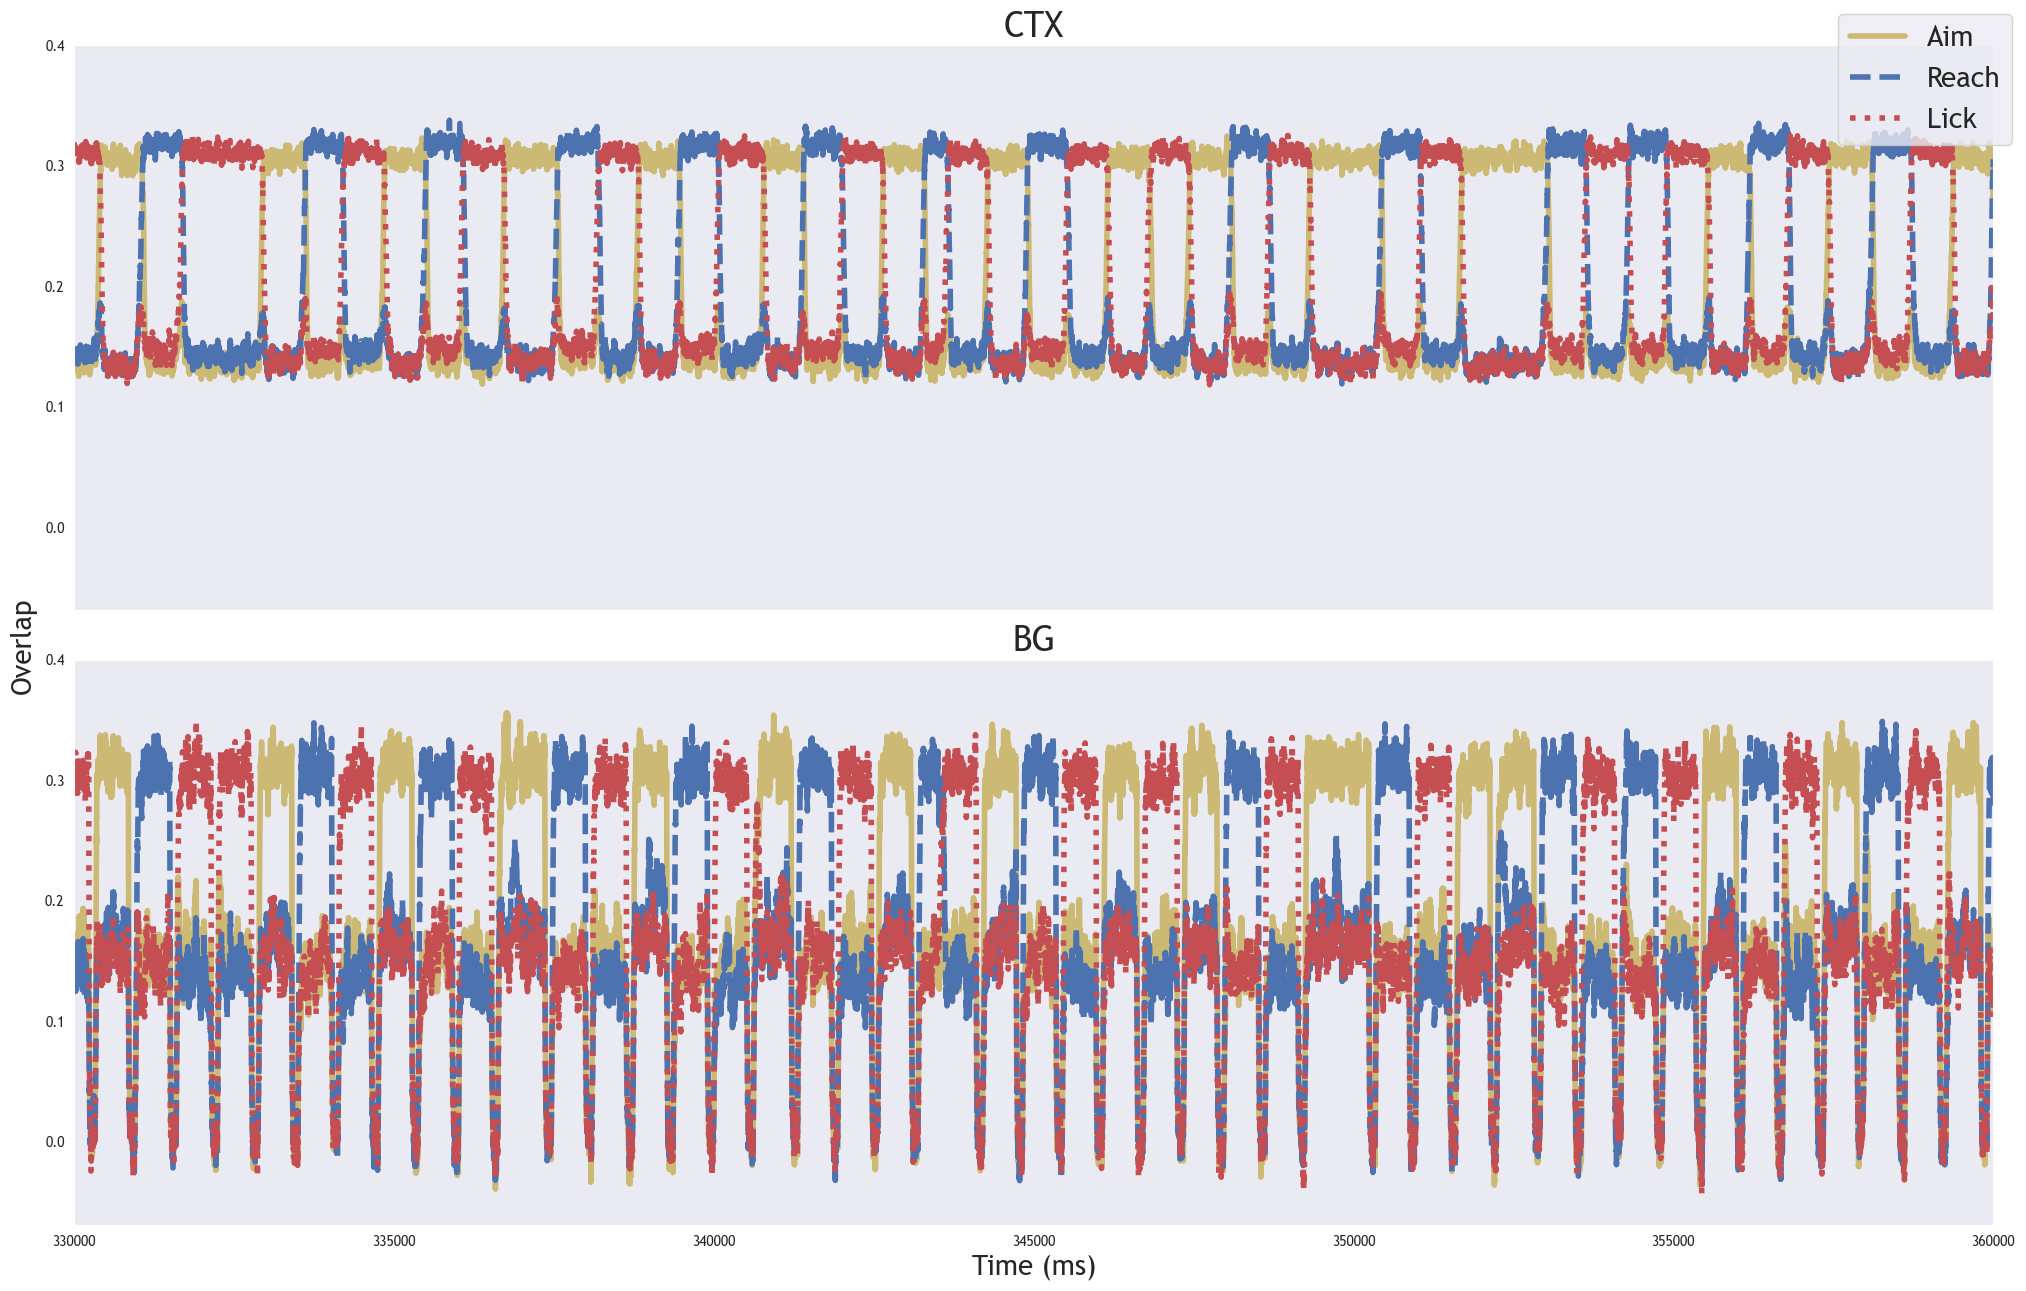

In [12]:
fig, axes = plt.subplots(2,1, sharex=True, sharey=True, tight_layout=True, figsize=(20,13))
axes[0].plot(overlaps_ctx[0], linestyle='solid', linewidth=4, color=colors[8])
axes[0].plot(overlaps_ctx[1], linestyle='dashed', linewidth=4, color=colors[0])
axes[0].plot(overlaps_ctx[2], linestyle='dotted', linewidth=4, color=colors[3])
axes[0].set_yticks([0.0, 0.1, 0.2, 0.3, 0.4])
axes[0].set_title("CTX", fontsize=25)
axes[1].plot(overlaps_bg[0], linestyle='solid', linewidth=4, color=colors[8])
axes[1].plot(overlaps_bg[1], linestyle='dashed', linewidth=4, color=colors[0])
axes[1].plot(overlaps_bg[2], linestyle='dotted', linewidth=4, color=colors[3])
axes[1].set_yticks([0.0, 0.1, 0.2, 0.3, 0.4])
axes[1].set_title("BG", fontsize=25)
axes[1].set_xlabel('Time (ms)', fontsize=20)
fig.text(-0.01, 0.5, 'Overlap', va='center', rotation='vertical', fontsize=20)
plt.setp(axes, xlim=(330000, 360000))
plt.figlegend(labels=['Aim', 'Reach', 'Lick'], fontsize=20)
plt.show()



In [20]:
np.savez('./learning-0005-1600-600-5-v1.npz', 
         overlaps_ctx=overlaps_ctx, overlaps_bg=overlaps_bg, 
         correlations_ctx=correlations_ctx, correlations_bg=correlations_bg, 
         state_ctx=net_ctx.exc.state, state_bg=net_bg.exc.state)